# 5) GENERACION DEL MODELO PREDICTIVO

> Balanceo del dataset y modelado de los resultados en función de las variables desarrolladas

- author: Iván Fernández Aguirre
- toc: true
- image: images/N5.png
- sticky_rank: 5

In [1]:
#hide
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:70% !important; }</style>"))

import numpy as np

import pandas as pd
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_colwidth', 50)

import warnings
warnings.filterwarnings('ignore')

In [2]:
#hide
#!pip install nbimporter
#!pip install tensorflow-addons

In [3]:
#hide
import nbimporter
import importlib

La mayoria de las funciones utilizadas en este projecto están en el modulo:

In [91]:
import Functions_for_FMP as fffmp

In [92]:
#hide
importlib.reload(fffmp)
import Functions_for_FMP as fffmp

## CARGA DE DATOS

Empezamos, como siempre, cargando los datos. En este caso el *dataset* generado en el bloque 2).

In [6]:
data='FMP_final'
FMP = pd.read_pickle(data)

In [38]:
#collapse-output
display(FMP)

id target  is_cup  home_team_history_is_play_home_1  \
0       11906497   away       0                               0.0   
1       11984383   home       0                               1.0   
2       11983301   draw       0                               0.0   
3       11983471   away       0                               0.0   
4       11883005   home       0                               0.0   
...          ...    ...     ...                               ...   
110933  18030016   draw       0                               0.0   
110934  18030096   away       0                               0.0   
110935  17715497   draw       0                               0.0   
110936  17944153   away       0                               0.0   
110937  17786297   home       0                               0.0   

        home_team_history_is_play_home_2  home_team_history_is_play_home_3  \
0                                    1.0                               0.0   
1                                    0.0                               1.0   
2                                    1.0                               0.0   
3                                    0.0                               1.0   
4                                    1.0                               0.0   
...                                  ...                               ...   
110933                               1.0                               0.0   
110934                               1.0                               0.0   
110935                               0.0                               1.0   
110936                               1.0                               0.0   
110937                               1.0                               0.0   

        home_team_history_is_play_home_4  home_team_history_is_play_home_5  \
0                                    1.0                               0.0   
1                                    0.0                               1.0   
2                                    1.0                               0.0   
3                                    1.0                               0.0   
4                                    1.0                               0.0   
...                                  ...                               ...   
110933                               1.0                               0.0   
110934                               1.0                               0.0   
110935                               0.0                               1.0   
110936                               0.0                               1.0   
110937                               1.0                               0.0   

        home_team_history_is_play_home_6  home_team_history_is_play_home_7  \
0                                    1.0                               0.0   
1                                    1.0                               0.0   
2                                    1.0                               0.0   
3                                    1.0                               0.0   
4                                    1.0                               0.0   
...                                  ...                               ...   
110933                               1.0                               0.0   
110934                               0.0                               1.0   
110935                               0.0                               1.0   
110936                               1.0                               0.0   
110937                               1.0                               1.0   

        home_team_history_is_play_home_8  home_team_history_is_play_home_9  \
0                                    1.0                               0.0   
1                                    1.0                               0.0   
2                                    1.0                               0.0   
3                                    1.0                      

## BALANCE DE CLASES

Un aspecto importante a la hora de trabjar con clasificadores es tener clases de *targets* (nuestros tipos de resultados) balanceadas. Como ya sabemos esto es algo que no ocurre en nuestro *dataset*:

In [7]:
#collapse-hide
fffmp.Classes_counts(FMP)

CLASES

away :  32530   31.61 %
draw :  25859   25.13 %
home :  44523   43.26 %


Como podemos ver, el *dataset* presenta un desbalance entre las distintas categorías a predecir (esto es: *home, draw* y *away*). Esto puede ser un reflejo de la realidad, o simplemente un sesgo del dataset (yo creo, y lo usaré de esa manera, que en este caso la razón es la primera). De cualquiera de las dos maneras, dejarlo así podría producir (y de hecho pude comprobar que lo hace) un sesgo en el modelo. Al una categoria ser más "frequente", el modelo puede adquirir un bías en el proceso de apendizaje. Esto lo vamos a corregir con dos estrategias distintas.

### 1) Balance de derrotas y victorias

En primer lugar, es interesante notar que, de cierta forma, en realidad hay dos tipos fundamentales de resultados en un partido de futbol: un equipo gana, o hay un empate. Dicho esto, a priori uno no esperararía un desbalance entre dos categorías que son "Victoria Equipo A" y "Victoria Equipo B"; sin más información, los equipos A y B son indistinguibles. Pero, ¿por qué si hay diferencia entre "away" y "home"? ¿Es un *artifact* o estamos escondiendo un parámetro en la denominación de los equipos? Tiene sentido en este caso ir por la segunda suposición: **estamos codificando la localía en el orden del dataset**. Una forma de borrar ese sesgo es generar una variable que sea "localía". Luego podemos reconvertir nuestras variables de forma que refieran a "Equipo A" y "Equipo B", y enviar (aleatoriamente) mitad de los locales y visitantes a cada una. Esto automáticamente nos da un balance de las victorias y las derrotas. Veamos como queda:

In [8]:
#collapse-output
FMP2=fffmp.data_balancing_Victorias_y_Derrotas(FMP)

id        target  is_cup  Equipo_A_play_home_1  \
0       16839679    EqA_Empate       0                   1.0   
1       12021423    EqA_Empate       0                   0.0   
2       11940784  EqA_Victoria       0                   0.0   
3       11927019   EqA_Derrota       0                   0.0   
4       12070651   EqA_Derrota       0                   0.0   
...          ...           ...     ...                   ...   
102907  17680446   EqA_Derrota       0                   1.0   
102908  13973450   EqA_Derrota       0                   0.0   
102909  17639407    EqA_Empate       0                   1.0   
102910  11987098   EqA_Derrota       0                   0.0   
102911  17012205   EqA_Derrota       0                   0.0   

        Equipo_A_play_home_2  Equipo_A_play_home_3  Equipo_A_play_home_4  \
0                        1.0                   1.0                   0.0   
1                        0.0                   1.0                   1.0   
2                        0.0                   1.0                   1.0   
3                        1.0                   0.0                   1.0   
4                        0.0                   1.0                   1.0   
...                      ...                   ...                   ...   
102907                   0.0                   1.0                   0.0   
102908                   1.0                   0.0                   1.0   
102909                   1.0                   0.0                   1.0   
102910                   1.0                   1.0                   1.0   
102911                   1.0                   0.0                   1.0   

        Equipo_A_play_home_5  Equipo_A_play_home_6  Equipo_A_play_home_7  \
0                        1.0                   0.0                   1.0   
1                        0.0                   1.0                   1.0   
2                        1.0                   0.0                   0.0   
3                        0.0                   1.0                   0.0   
4                        0.0                   1.0                   0.0   
...                      ...                   ...                   ...   
102907                   1.0                   0.0                   1.0   
102908                   1.0                   1.0                   1.0   
102909                   0.0                   1.0                   0.0   
102910                   1.0                   1.0                   0.0   
102911                   1.0                   0.0                   1.0   

        Equipo_A_play_home_8  Equipo_A_play_home_9  Equipo_A_play_home_10  \
0                        0.0                   1.0                    0.0   
1                        1.0                   0.0                    1.0   
2                        1.0                   0.0                    1.0   
3                        1.0                   1.0                    1.0   
4                        1.0                   1.0                    0.0   
...                      ...                   ...                    ...   
102907                   0.0                   1.0                    0.0   
102908                   0.0                   0.0                    1.0   
102909                   0.0                   0.0                    1.0   
102910                   1.0                   0.0                    0.0   
102911                   0.0                   1.0                    0.0   

        Equipo_A_is_cup_1  Equipo_A_is_cup_2  Equipo_A_is_cup_3  \
0                     0.0                0.0                0.0   
1                     0.0                0.0                0.0   
2                     0.0                0.0                0.0   
3                     0.0                0.0                0.0   
4                     0.0                0.0                0.0   
...                   ...                ...                ...   
102907                0.0

Podemos ver como ahora tenemos nuevos targets y las *features* han cambiado su nombre. El resultado, como se ve abajo, muestra un balance entre "EqA_Derrota" (equivalente a "EqB_Victoria") y "EqA_Victoria".

In [9]:
fffmp.Classes_counts(FMP2)

CLASES

EqA_Derrota :  38460   37.37 %
EqA_Empate :  25859   25.13 %
EqA_Victoria :  38593   37.5 %


Guardaremos este dataset para hacer un pequeño análisis en un bloque posterior.

In [10]:
data_clean='FMP_Balance_V_vs_D'
FMP2.to_pickle(data_clean)

### 2) Balance de los empates

En segundo lugar tenemos el problema de los empates, y aquí ya no nos quedrá otra opción que hacer un *re-sampling*. Dado que las derrotas y las victorias son clases con $1.5$ veces la cantidad de ocurrrencias que los empates, lo que haremos será hacer un poco de *oversampling* de los empates, y un poco de *undersampling* de las otras dos clases. En este sentido, creo que antes de realizar estos procesos lo mejor es separar el *dataset* en *Train* y *Test*. Porque, sí, quiero que aprenda con un conjunto balanceado; sin embargo, la realidad probablemente no lo es, asique a la hora de testear quiero un conjunto que refleje ello. Por otro lado, utilizar *oversampling* va a generar casos duplicados que podrían acabar uno en el *trainset* y otro en el *testset*, incrementando de forma artificial el *test accuracy*.

#### Separación de los datos en *Train* y *Test*

Separaremos entonces el *dataset*, de forma de mantener la proporcion de clases para ambos grupos (*test* y *training*)

In [11]:
FMP_train,FMP_test=fffmp.Training_Test_separation(FMP2,True,0.1)

TRAIN: 92620 TEST: 10292


train   train %  test    test %
EqA_Derrota   34614  0.373721  3846  0.373688
EqA_Empate    23273  0.251274  2586  0.251263
EqA_Victoria  34733  0.375005  3860  0.375049

Y ahora si, procederemos a hacer el balance de los datos en el *dataset* de entrenamiento. Para ello modificaremos en la misma proporcion los datos de las tres clases:
* Incrementamos los empates en $\approx 20\%$.
* Redcimos las victorias y las derrotas en $\approx 20\%$.

Nota: Ambas estrategias tienen sus problemas. El *oversampling* puede generar un mayor *overfitting*, una reducción en la performance del modelo, y un aumento de los costos computacionales. Por su lado, el *underfitting* nos genera pérdida de información. 
Cuando hice este paso pensé que lo mejor era hacer ambos procesos en igual proporción, pero ahora creo que quizas debería haber apostado a un mayor *overfitting* dadas las resultados obtenidos para los modelos.

In [12]:
#collapse-hide
fffmp.Classes_counts(FMP_train)

CLASES

EqA_Derrota :  34614   37.37 %
EqA_Empate :  23273   25.13 %
EqA_Victoria :  34733   37.5 %


In [13]:
FMP_train_2=fffmp.Balance_de_empates_por_under_and_over_sampling(FMP_train)

Ratio Victorias(Derrotas)/Empates=  1.49
Proporcion a cambiar clases=  19.67 %


In [14]:
#collapse-hide
fffmp.Classes_counts(FMP_train_2)

CLASES

EqA_Derrota :  27784   33.31 %
EqA_Empate :  27886   33.44 %
EqA_Victoria :  27729   33.25 %


Efectivamente conseguimos lo que estabamos buscando, terminando con aproximadamente $33\%$ de cada clase!

Guardaremos este dataset para hacer un pequeño análisis en un bloque posterior.

In [15]:
data_clean='FMP_training_bal_tot'
FMP_train_2.to_pickle(data_clean)

**NOTA:** Para ganar un mayor entendimiento de los procesos realizados en el *dataset* se agregó un bloque adicional al proyecto (el número 6) donde se comparan el *dataset* generado con el original.

Como ultima cosa recordemos las *features* con las que contamos luego de las transformaciones realizadas:

In [16]:
#collapse-output
fffmp.Print_features_data_set_modelos(FMP_train_2)

Today Features

id
target
is_cup
Rating_diff
Equipo_A_coach_continuity
Equipo_B_coach_continuity
Equipo_A_partidos_tres_semanas
Equipo_A_partidos_diez_dias
Equipo_A_partidos_cuatro_dias
Equipo_B_partidos_tres_semanas
Equipo_B_partidos_diez_dias
Equipo_B_partidos_cuatro_dias
diff_num_partidos_tres_semanas
diff_num_partidos_diez_dias
diff_num_partidos_cuatro_dias
is_friendly
EqA_Local


Historic Features

Equipo_(A/B)_play_home_i
Equipo_(A/B)_is_cup_i
Equipo_(A/B)_rating_diff_i
Equipo_(A/B)_goal_diff_i
Equipo_(A/B)_coach_continuity_i
Equipo_(A/B)_relevance_i
Equipo_(A/B)_outcome_V_i
Equipo_(A/B)_outcome_D_i
Equipo_(A/B)_is_friendly_i
Equipo_(A/B)_result_ponderado_i


## MODELADO

Finalmente llegamos a la última etapa de este proyecto: la generación de un modelo predictivo que pueda aprender a modelar los resultados de los partidos en función de las variables generadas, permitiendonos inferir información sobre futuro partidos. En particular, el objetivo que nos habíamos propuesto (que es el que figuraba en eñ desafío de Kaggle de "[Football Match Probability Prediction](https://www.kaggle.com/c/football-match-probability-prediction)") era poder predecir la probabilidad de cada uno de los tres posibles resultados. Esto la haremos hacia el final de este *notebook*, sin embargo, empezaremos por un modelo más sencillo que simplemente buscará predecir el resultado sin darnos la probabilidad.

### 1) Random Forest

Empezaremos considerando un *Random Forest*. Si bien hay clasificadores más simples (como una regresión logística o SVM), dado que tenemos un modelo multiclases preferí comenzar con este clasificador para el cual la implementación era fácil y estaba familiarizado de trabajos anteriores.

In [17]:
#hide
from sklearn.ensemble import RandomForestClassifier

Para llevar un registro de la performance del modelo, generamos un diccionario (Report_RF) para ir guardando el resultado de los distinto modelos de *Random Forest*. En el mismo registraremos las métricas "*Accuracy*" y "*F1_macro*" tanto en el *train dataset* como en el *Test dataset*. 

In [137]:
Report1_RF={'Nombre':[],'Accuracy':[],'F1_macro':[]}

#### A) RF con todas las variables

En una primera instancia trabajaré con todas las *features* exceptuando el "resultado ponderado" (el cual terminé por ver que no aportaba ningún valor) y "diff_num_partidos_cuatro_dias" (el cual no aportaba informacion adicional a las variables calculadas a 10 y 21 días). Es verdad que, como vimos en el bloque 4, muchas de las variables (sobetodo las correspondientes a un mismo aspectos para cada partido historial) estan quizás bastante correlacionadas. Esto es algo que trataré de forma más cuidadosa en modelos posteriores, pero por el momento veremos que tal funciona directamente así.

Comenzamos por separar ambos *datasets* en su *input* y *output*. Aprovechamos al mismo tiempo para normalizar todas la variables (si bien para las *One-Hot Encoded* no es fundamental, tampoco afecta). Verificaremos al acabar que no tenemos valores extraños, como puede pasar cuando la desviación estandar es $0$.

In [138]:
#collapse-hide
F_h=['play_home','is_cup','rating_diff','goal_diff','coach_continuity','relevance','is_friendly']
F_m=['Rating_diff','EqA_Local','is_cup','Equipo_A_coach_continuity','Equipo_B_coach_continuity','diff_num_partidos_diez_dias','diff_num_partidos_tres_semanas','is_friendly']
F_h_to_std=F_h
F_m_to_std=F_m
X,y,X_t,y_t=fffmp.Prepara_DF_para_Random_Forest(FMP_train_2,FMP_test,F_h,F_m,F_h_to_std,F_m_to_std)

train
No hay missing values en el dataset :)
test
No hay missing values en el dataset :)


**Selección de los hiperparámetros**

Para hacer la selección de los hiperparámetros, utilizamos una *K-fold cross validation*. Esto nos ayuda a evitar *overfitting*, lo que sucede bastante facilmente con los modelos de Random Forest en mi (breve) experiencia. Aquí abajo solo mantengo el último *grid* de parámetros utilizados.

Nota: El número de estimadores (es decir el número de árboles) lo dejo bajo para estas pruebas para reducir los tiempo de computo. Para el training final siempre lo subo ya que no puede hacer más que mejorar el resultado.

In [139]:
#collapse-output
param_grid = [
    {'n_estimators': [10], 'max_features': [None], 'max_depth':[10],'min_samples_leaf' : [1], 'class_weight':[None],'bootstrap': [True]},
  ]
fffmp.Cross_Validation_RandomForest(param_grid,X,y)

Fitting 7 folds for each of 1 candidates, totalling 7 fits
[CV 1/7] END bootstrap=True, class_weight=None, max_depth=10, max_features=None, min_samples_leaf=1, n_estimators=10; total time=  20.1s
[CV 2/7] END bootstrap=True, class_weight=None, max_depth=10, max_features=None, min_samples_leaf=1, n_estimators=10; total time=  13.9s
[CV 3/7] END bootstrap=True, class_weight=None, max_depth=10, max_features=None, min_samples_leaf=1, n_estimators=10; total time=  14.6s
[CV 4/7] END bootstrap=True, class_weight=None, max_depth=10, max_features=None, min_samples_leaf=1, n_estimators=10; total time=  14.3s
[CV 5/7] END bootstrap=True, class_weight=None, max_depth=10, max_features=None, min_samples_leaf=1, n_estimators=10; total time=  14.4s
[CV 6/7] END bootstrap=True, class_weight=None, max_depth=10, max_features=None, min_samples_leaf=1, n_estimators=10; total time=  14.0s
[CV 7/7] END bootstrap=True, class_weight=None, max_depth=10, max_features=None, min_samples_leaf=1, n_estimators=10; t

RandomForestClassifier(max_depth=10, max_features=None, n_estimators=10,
                       n_jobs=4, random_state=42)

**Entrenamiento del modelo**

Una vez seleccionados los hiperparámetros procedemos a entrenar el modelo.

In [140]:
#collapse-output
forest_reg = RandomForestClassifier(bootstrap=True, class_weight= None, max_depth= 10, max_features=None, min_samples_leaf= 1, n_estimators= 50,n_jobs=4)
forest_reg.fit(X, y)

RandomForestClassifier(max_depth=10, max_features=None, n_estimators=50,
                       n_jobs=4)

**Resultado**

Miremos entonces que tal funciona este modelo:

In [141]:
#collapse-hide
model_name='RF completo'
Report1_RF=fffmp.Report_RF_results(forest_reg,model_name,X,y,X_t,y_t,Report1_RF)

Nombre  Accuracy  F1_macro
0  RF completo Train  0.564323  0.563954
1   RF completo Test  0.467256  0.454680

A la hora de analizar la performance del modelo es siempre útil tener en mente una referencia. Dado que hemos balanceado nuestros *targets*, sabemos que tenemos $\approx33\%$ de cada categoría, luego un clasificador aleatorio nos daría esa precision (0.33). Este deberá ser nuestro piso, un modelo que tenga una performance mejor ya podremos decir que esta aprendiendo algo. Es un objetivo bastante poco ambicioso, pero veremos que no es tán facil el problema.

Dicho esto, efectivamente podemos decir que nuestro modelo tiene cierto poder predictivo, sin embargo es claro (o al menos esa era mi expectativa) que deberíamos poder mejorar nuestro poder predictivo.

#### B) PCA y RF

Una forma de mejorar el resultado obtenido pasa por hacer una selección de variables o *features*. Para hacer esto, en lugar de ir probando distintas combinaciones, decidí intentar aplicar el metodo de *Principal Component Analysis* (PCA). Esta técnica permite transformar nuestro dataset a una base vectorial nueva base vectorial con variables no correlacionadas, lo que nos soluciona un primer problema. Pero lo mejor aun es que estas variables quedan ordenadas por la cantidad de varianza que decriben, lo que está codificado en los autovalores. De esta forma, mirando a los autovalores podemos seleccionar las variables que deberían tener una mayor importancia.

Decidí entonces considerar en este caso todas las variables del *dataset* ya que la multicolinearidad original no debería ser un problema al utilizar PCA. Luego, nuevamente preparamos y normalizamos los datos:

In [142]:
#collapse-hide
F_h=['play_home','is_cup','rating_diff','goal_diff','coach_continuity','relevance','is_friendly','result_ponderado']
F_m=['Rating_diff','EqA_Local','is_cup','Equipo_A_coach_continuity','Equipo_B_coach_continuity','diff_num_partidos_diez_dias','diff_num_partidos_tres_semanas','diff_num_partidos_cuatro_dias','is_friendly']
F_h_to_std=F_h
F_m_to_std=F_m
X,y,X_t,y_t=fffmp.Prepara_DF_para_Random_Forest(FMP_train_2,FMP_test,F_h,F_m,F_h_to_std,F_m_to_std)

train
No hay missing values en el dataset :)
test
No hay missing values en el dataset :)


**PCA**

Aplicamos entonces PCA para ver los autovalores de la transformación:

In [143]:
#collapse-output
fffmp.PCA_analisis(X,X_t,Action='Fit')

[1056.1739394   807.96171312  753.66794049  628.42023238  591.27775932
  515.02889343  490.04746795  482.52275821  454.1742522   453.64978963
  452.82754626  432.83850214  418.16116484  416.31818982  404.57505498
  401.18584814  400.33061564  398.12251238  392.39832499  387.09088544
  386.56925738  385.27216034  383.01572586  380.89921633  378.94618226
  376.9887087   375.87541731  369.39209423  345.57649742  344.49797834
  338.87460261  337.75459298  332.53610435  325.18162231  320.15963613
  318.2957323   313.00213268  308.94519621  306.30238777  303.76183913
  302.91205679  302.33023283  299.47071691  298.79971346  295.4341473
  294.3680493   291.3710512   288.0788367   287.39477909  285.79443611
  284.84864226  284.08018509  282.79943749  282.32693659  281.48563651
  281.35338659  280.19507932  277.34008654  277.07918728  276.32109161
  274.99544928  274.3810467   273.07276934  270.9509744   270.49776048
  268.85894847  268.68314006  264.49816597  262.8302743   262.21643616
  261.6

Desgraciadamente no había una clara línea para trazar que permitiera separar los relevantes de los que no lo son. Por esa razón, optamos por probar con distintos umbrales arbitrarios: $0$, $100$, $200$, $300$, y $400$.  

Transformamos entonces nuestro *dataset*:

In [161]:
X_2,X_t_2=fffmp.PCA_analisis(X,X_t,Action='Fit_Transform',umbral=400)

**Selección de los hiperparámetros**

Nuevamente, para hacer la selección de los hiperparámetros utilizamos una *K-fold cross validation*. 

Nota: El número de estimadores (es decir el número de árboles) lo dejo bajo para estas pruebas para reducir los tiempo de computo. Para el training final siempre lo subo ya que no puede hacer más que mejorar el resultado.

In [163]:
#collapse-output
param_grid = [
    {'n_estimators': [10], 'max_features': [None], 'max_depth':[6,7],'min_samples_leaf' : [1], 'class_weight':[None],'bootstrap': [True]},
  ]
fffmp.Cross_Validation_RandomForest(param_grid,X_2,y)

Fitting 7 folds for each of 2 candidates, totalling 14 fits
[CV 1/7] END bootstrap=True, class_weight=None, max_depth=6, max_features=None, min_samples_leaf=1, n_estimators=10; total time=   3.7s
[CV 2/7] END bootstrap=True, class_weight=None, max_depth=6, max_features=None, min_samples_leaf=1, n_estimators=10; total time=   3.7s
[CV 3/7] END bootstrap=True, class_weight=None, max_depth=6, max_features=None, min_samples_leaf=1, n_estimators=10; total time=   3.6s
[CV 4/7] END bootstrap=True, class_weight=None, max_depth=6, max_features=None, min_samples_leaf=1, n_estimators=10; total time=   3.8s
[CV 5/7] END bootstrap=True, class_weight=None, max_depth=6, max_features=None, min_samples_leaf=1, n_estimators=10; total time=   3.7s
[CV 6/7] END bootstrap=True, class_weight=None, max_depth=6, max_features=None, min_samples_leaf=1, n_estimators=10; total time=   3.7s
[CV 7/7] END bootstrap=True, class_weight=None, max_depth=6, max_features=None, min_samples_leaf=1, n_estimators=10; total t

RandomForestClassifier(max_depth=6, max_features=None, n_estimators=10,
                       n_jobs=4, random_state=42)

**Entrenamiento del modelo**

Una vez seleccionados los hiperparámetros procedemos a entrenar el modelo.

In [164]:
#collapse-output
forest_reg = RandomForestClassifier(bootstrap=True, class_weight= None, max_depth= 6, max_features=None, min_samples_leaf= 1, n_estimators= 50,n_jobs=4)
forest_reg.fit(X_2, y)

RandomForestClassifier(max_depth=6, max_features=None, n_estimators=50,
                       n_jobs=4)

**Resultado**

Miremos entonces que tal funciona este segundo modelo:

In [165]:
#collapse-hide
model_name='RF PCA all th=400'
Report1_RF=fffmp.Report_RF_results(forest_reg,model_name,X_2,y,X_t_2,y_t,Report1_RF)

Nombre  Accuracy  F1_macro
0           RF completo Train  0.564323  0.563954
1            RF completo Test  0.467256  0.454680
2   RF PCA all features Train  0.454214  0.454808
3    RF PCA all features Test  0.445103  0.439398
4     RF PCA all th=100 Train  0.453243  0.453759
5      RF PCA all th=100 Test  0.447143  0.440709
6     RF PCA all th=200 Train  0.453830  0.454605
7      RF PCA all th=200 Test  0.447435  0.442002
8     RF PCA all th=300 Train  0.442104  0.443010
9      RF PCA all th=300 Test  0.443937  0.438920
10    RF PCA all th=400 Train  0.448806  0.449645
11     RF PCA all th=400 Test  0.449281  0.444494

Lo primero que salta a la vista es que para todos los umbrales probados la performance fue ligeramente peor que para el primer modelo sin PCA. Donde sí se vió una mejora fue en la varianza del modelo (es decir, un el *overfitting*) que en todos los casos se redujo sensiblemente. Esto era algo esperado para umbrales mayores a cero, dado que estamos reduciendo el numero de *features*. Sin embargo, lo interesante es que lo pudimos hacer sin una mayor perdida de precisión.

Hasta este punto llegaremos con los modelos de *Random Forest*. Si bien creo que todavía habría lugar para seguir optimizando este modelo, decidí invertir mi tiempo en un tipo de modelo distinto donde podía optar por una predicción probabilística.

### 2) Red Neuronal

Como vimos en la sección anterior, los resultados obtenidos con modelos de *Random Forest* no fueron los mejores. Por otro lado, este tipo de modelos tampoco nos permitía obtener las probabilidades de cada output, que era uno de nuestros objetios. Por esta razón, decidimos probar con un tipo de modelo distinto: una red neuronal. Dado que el objetivo del problema es predecir probabilidades de un problema multiclase, la idea fue utilizar una red con:

* Función de costo: Categorical crossentropy
* Funcion de activación de ultima layer: Softmax

tal como se recomienda para este tipo de problemas.

Lo primer que probé en algunos test preliminares era utilizar simplemente una red densa. Sin embargo los resultados no fueron mejores a los obtenidos con los modelos de *Random Forest*. Por otro lado, había algo que me hacía ruido de este tipo de modelo: ¿por qué *inputs* como la localía o el tipo de competencia de un partido podrían influir en el peso de las variables de otro partido? Aún peor, ¿por qué mezclar directamente los datos de lo ocurrido para el equipo local y visitante 9 partidos atrás? Esto no me convencía, sin embargo una red densa permitía esas interconexiones (claro esta que los pesos podrían ir a cero durante el entrenamiento de la red). 

Además de ello, había otro aspecto a tener en cuenta para mí. Como sabemos, nuestro dataset contiene información de una serie de partidos. Estos partidos tienen un orden temporal. ¿Sería lo mismo ganar 7 partidos y perder los tres inmediatamente anteriores al partido a modelar que el caso inverso? Más aún, ¿el resultado de los partidos presentaría correlaciones temporales que afectarían en un orden deteriminado? Si bien no tengo claro hasta que punto puede "aprender" una red densa (quizás puede llegar a "descubrir" ese orden), me parecía que cambiar a una arquitectura que contemplara todas estas cuestiones podría ayudar.

La solución que encontré pasó por armar una red mixta, combinando redes recurrentes (para tratar la información con orden temporal) con redes densas (donde mezclar el output de las redes recurrentes con las variables referentes al partido que se busca modelar). El esquema es el que se presenta en la figura siguiente:

<img src="imges/red.png">

Tendríamos una red recurrente (RNN) para tratar los datos históricos de cada equipo. Cada RNN sacaría un *output* de $n$ componentes, donde $n$ es el número de partidos considerados. Dentro de ella los partidos estarían interconectados del más antíguo ($i=10$) al más reciente ($i=1$). Los $2n$ outputs se combinarían con el *input* referente al partido que se desea modelar con dimension $m$. En total un vector con $2n+m$ componentes se usaría como input de la una capa densa. El *output* de esta última sería un vector de tres componentes con las probabilidades de cada uno de los posibles resultados: Victoria Equipo A, Derrota Equipo A y Empate Equipo A. 

Esta nueva arquitectura permitiría que los partidos históricos de cada equipo se procesarían de forma independiente y teniendo en cuenta correlaciones temporales. Lo único que me quedaba pensar son la profundidad de la red y el numero de nodos en cada capa. Dado que no encontré una receta para decidir estos hiperparámetros, lo único que me quedó fue ir probando. Esto es algo que podría haber hecho de una forma más sistemática con un grid de forma similar a un *k-fold cross validation*, realmente no se me ocurrió en su momento. Terminé por ir probando algunos valores, quedándome con los que funcionaban masomenos mejor:

* Para la RNN use 100 unidades, con *drop out* de 0.1 y *recurrent drop out* de 0 (manteniendo los partidos siempre conectados).
* Para la capa densa 5 capas con 500, 200, 80, 20 y 10 nodos, con *drop out* de 0.1.

Adicionalmente a ello, se consideraron dos tipos de RNN: Simple y de las llamadas *long short-term memory* (LSTM). Esta segunda opción está pensada para evitar un problema llamado *gradient vanishing problem*. En la práctica esto ocurre cuando, durante el proceso de *backpropagation*, el gradiente se va haciendo cada vez más pequeño, impidiendo cambiar eficazmente los parámetros de la red (el caso opuesto también existe y es llamado *gradient exploding*. En los casos más patológicos, este fenómeno puede impedir directamente que la red neuronal continúe su entrenamiento. Esto es un fenómeno más comun cuando se consideran un mayor número de *inputs* temporales (los partidos en nuestro caso), sin embargo valía la pena probarlo. Como contrapartida, estos modelos tienen un número mayor de parámetros por unidad, lo que incrementa el tiempo de entrenamiento.

Veamos como nos fue con este acercamiento.

**Separación de los datos en *input* y *target***

Como primer paso, empezamos por separar nuestros *dataset* de *train* y *test* en sus respectivos *inputs* y *targets*. Dado que queríamos modelar el resultado como un vector de tres componentes, adicionalmente es necesario hacer un *One-Hot Encoding* OHE del *target*. Esto lo hacemos todo junto en un solo paso:

In [30]:
X_train,y_train,X_test,y_test=fffmp.Split_input_and_OHE_output(FMP_train_2,FMP_test)

train   train %  test    test %
EqA_Derrota   27784  0.333145  3846  0.373688
EqA_Empate    27886  0.334369  2586  0.251263
EqA_Victoria  27729  0.332486  3860  0.375049

**Selección de metricas**

In [31]:
#hide
import tensorflow_addons as tfa
from tensorflow.keras.callbacks import EarlyStopping

El siguiente paso es decidir las métricas que utilizaremos para ir evaluando el rendimiento de nuestras redes. En particular, yo elegí las siguintes:

* Accuracy: Para ver la precisión general.
* F1 (macro): Para ver el rendimiento medio por clases.
* Area under the ROC Curve (AUC): Para ver cuan bien separa la clases.

In [32]:
F1=tfa.metrics.F1Score(num_classes=3, threshold=None,average='macro')
metrics=['accuracy','AUC',F1]

El resultado obtenido por cada modelo para cada una de ellas lo iremos guardando en un *dataframe*:

In [62]:
Report=pd.DataFrame()

**Entrenamiento de los modelos**

Queda entonces por definir una serie de cosas:
* Las *features* a utilizar.
* El tipo de red recurrente
* El número de partidos a considerar

Determinaremos estas características a traves de evaluar distintos modelos. Para ello utilizamos una serie de *for loops* anidados. Para las features consideramos tres conjuntos distintos tanto para las históricas como para las del partido a modelar. Traté de partir de las *features* que yo consideraba más fundamentales, para ir luego agregando otras adicionales. Se podría ir agregando de a una, pero ya el esquema propuesto tomó bastanate tiempo (9hs aproximadamente) por lo que no quería hacerlo más largo. 

En total se entrenaron 180 redes neuronales:

In [63]:
#collapse-output
F_h_1=['outcome_V','outcome_D','play_home']
F_h_2=['play_home','goal_diff']
F_h_3=['play_home','is_cup','rating_diff','goal_diff','coach_continuity','relevance','is_friendly']


N_Features_1=['EqA_Local','is_cup']
N_Features_2=['Rating_diff','EqA_Local','is_cup','diff_num_partidos_diez_dias','is_friendly']
N_Features_3=['Rating_diff','EqA_Local','is_cup','Equipo_A_coach_continuity','Equipo_B_coach_continuity','diff_num_partidos_diez_dias','diff_num_partidos_tres_semanas','is_friendly']
            
index=0
for F_h in [F_h_1,F_h_2,F_h_3]:
    for N_Features in [N_Features_1,N_Features_2,N_Features_3]:
        for tipo_de_RNN in ['LSTM','Simple']:
            for n_partidos in range(1,11):
                
                M_A,M_A_test=fffmp.generate_input_for_RNN(X_train,X_test,F_h,['Equipo_A'],n_partidos,standarize=True)
                M_B,M_B_test=fffmp.generate_input_for_RNN(X_train,X_test,F_h,['Equipo_B'],n_partidos,standarize=True)

                H_Features=[]
                A_train,A_test=fffmp.generate_input_for_NN(X_train,X_test,H_Features,N_Features,standarize=True) 

                fffmp.clean_all_models()
                time_steps=n_partidos
                predictors=len(F_h)
                tipo_RNN=tipo_de_RNN
                recurrent_units=100
                dense_units=[500,200,80,20,10]
                dense_drop_out=0.1
                out_shape=3
                input_shape_history=(time_steps,predictors)
                input_shape_now=A_train.shape[1]
                metrics=['accuracy','AUC',F1]
                IFA=fffmp.Create_Mix_Model(tipo_RNN ,recurrent_units, dense_units,dense_drop_out, out_shape, input_shape_history,input_shape_now,metrics)

                batch_size = 400
                epochs = 50
                validation_split=0.1
                y_train_pred,y_test_pred,Results=fffmp.Full_train_and_Report(IFA,[M_A,M_B,A_train],y_train,[M_A_test,M_B_test,A_test],y_test,batch_size,epochs,validation_split,num_classes=3,history_plot=False,confusion_matrix=False,Report_print=False)

                index=index+1
                name=str(index)
                Report=fffmp.Append_line_to_report_table(Report,Results,name,tipo_de_RNN,n_partidos,len(F_h),len(N_Features))

Train shape: (83399, 1, 3)
Test shape: (10292, 1, 3)
Train shape: (83399, 1, 3)
Test shape: (10292, 1, 3)
Train shape: (83399, 2)
Test shape: (10292, 2)
Model: "Modelo_IFA"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 1, 3)]       0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 1, 3)]       0           []                               
                                                                                                  
 lstm (LSTM)                    (None, 1, 100)       41200       ['input_1[0][0]']                
                                                                                                  
 lstm_1 (LSTM)                  (No

loss train  loss test  accuracy train  accuracy test  auc train  auc test  \
1    0.409215   0.402452        0.390826       0.394498   0.569866  0.570228   

   f1_score train  f1_score test  Partidos Considerados   RNN  N_Features_m  \
1        0.354709       0.356641                      1  LSTM             2   

   N_Features_h  
1             3

Train shape: (83399, 2, 3)
Test shape: (10292, 2, 3)
Train shape: (83399, 2, 3)
Test shape: (10292, 2, 3)
Train shape: (83399, 2)
Test shape: (10292, 2)
Model: "Modelo_IFA"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 2, 3)]       0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 2, 3)]       0           []                               
                                                                                                  
 lstm (LSTM)                    (None, 2, 100)       41200       ['input_1[0][0]']                
                                                                                                  
 lstm_1 (LSTM)                  (No

loss train  loss test  accuracy train  accuracy test  auc train  auc test  \
1    0.409215   0.402452        0.390826       0.394498   0.569866  0.570228   
2    0.412872   0.406182        0.401225       0.404161   0.582815  0.582820   

   f1_score train  f1_score test  Partidos Considerados   RNN  N_Features_m  \
1        0.354709       0.356641                      1  LSTM             2   
2        0.366837       0.368093                      2  LSTM             2   

   N_Features_h  
1             3  
2             3

Train shape: (83399, 3, 3)
Test shape: (10292, 3, 3)
Train shape: (83399, 3, 3)
Test shape: (10292, 3, 3)
Train shape: (83399, 2)
Test shape: (10292, 2)
Model: "Modelo_IFA"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 3, 3)]       0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 3, 3)]       0           []                               
                                                                                                  
 lstm (LSTM)                    (None, 3, 100)       41200       ['input_1[0][0]']                
                                                                                                  
 lstm_1 (LSTM)                  (No

loss train  loss test  accuracy train  accuracy test  auc train  auc test  \
1    0.409215   0.402452        0.390826       0.394498   0.569866  0.570228   
2    0.412872   0.406182        0.401225       0.404161   0.582815  0.582820   
3    0.414844   0.408316        0.408670       0.411257   0.591682  0.592314   

   f1_score train  f1_score test  Partidos Considerados   RNN  N_Features_m  \
1        0.354709       0.356641                      1  LSTM             2   
2        0.366837       0.368093                      2  LSTM             2   
3        0.384350       0.385402                      3  LSTM             2   

   N_Features_h  
1             3  
2             3  
3             3

Train shape: (83399, 4, 3)
Test shape: (10292, 4, 3)
Train shape: (83399, 4, 3)
Test shape: (10292, 4, 3)
Train shape: (83399, 2)
Test shape: (10292, 2)
Model: "Modelo_IFA"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 4, 3)]       0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 4, 3)]       0           []                               
                                                                                                  
 lstm (LSTM)                    (None, 4, 100)       41200       ['input_1[0][0]']                
                                                                                                  
 lstm_1 (LSTM)                  (No

loss train  loss test  accuracy train  accuracy test  auc train  auc test  \
1    0.409215   0.402452        0.390826       0.394498   0.569866  0.570228   
2    0.412872   0.406182        0.401225       0.404161   0.582815  0.582820   
3    0.414844   0.408316        0.408670       0.411257   0.591682  0.592314   
4    0.417667   0.411080        0.419287       0.420617   0.602573  0.602214   

   f1_score train  f1_score test  Partidos Considerados   RNN  N_Features_m  \
1        0.354709       0.356641                      1  LSTM             2   
2        0.366837       0.368093                      2  LSTM             2   
3        0.384350       0.385402                      3  LSTM             2   
4        0.407251       0.407376                      4  LSTM             2   

   N_Features_h  
1             3  
2             3  
3             3  
4             3

Train shape: (83399, 5, 3)
Test shape: (10292, 5, 3)
Train shape: (83399, 5, 3)
Test shape: (10292, 5, 3)
Train shape: (83399, 2)
Test shape: (10292, 2)
Model: "Modelo_IFA"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 5, 3)]       0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 5, 3)]       0           []                               
                                                                                                  
 lstm (LSTM)                    (None, 5, 100)       41200       ['input_1[0][0]']                
                                                                                                  
 lstm_1 (LSTM)                  (No

loss train  loss test  accuracy train  accuracy test  auc train  auc test  \
1    0.409215   0.402452        0.390826       0.394498   0.569866  0.570228   
2    0.412872   0.406182        0.401225       0.404161   0.582815  0.582820   
3    0.414844   0.408316        0.408670       0.411257   0.591682  0.592314   
4    0.417667   0.411080        0.419287       0.420617   0.602573  0.602214   
5    0.419681   0.413222        0.421249       0.423352   0.605344  0.605543   

   f1_score train  f1_score test  Partidos Considerados   RNN  N_Features_m  \
1        0.354709       0.356641                      1  LSTM             2   
2        0.366837       0.368093                      2  LSTM             2   
3        0.384350       0.385402                      3  LSTM             2   
4        0.407251       0.407376                      4  LSTM             2   
5        0.404745       0.405495                      5  LSTM             2   

   N_Features_h  
1             3  
2             3  
3             3  
4             3  
5             3

Train shape: (83399, 6, 3)
Test shape: (10292, 6, 3)
Train shape: (83399, 6, 3)
Test shape: (10292, 6, 3)
Train shape: (83399, 2)
Test shape: (10292, 2)
Model: "Modelo_IFA"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 6, 3)]       0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 6, 3)]       0           []                               
                                                                                                  
 lstm (LSTM)                    (None, 6, 100)       41200       ['input_1[0][0]']                
                                                                                                  
 lstm_1 (LSTM)                  (No

loss train  loss test  accuracy train  accuracy test  auc train  auc test  \
1    0.409215   0.402452        0.390826       0.394498   0.569866  0.570228   
2    0.412872   0.406182        0.401225       0.404161   0.582815  0.582820   
3    0.414844   0.408316        0.408670       0.411257   0.591682  0.592314   
4    0.417667   0.411080        0.419287       0.420617   0.602573  0.602214   
5    0.419681   0.413222        0.421249       0.423352   0.605344  0.605543   
6    0.420874   0.414307        0.425969       0.428311   0.612525  0.612039   

   f1_score train  f1_score test  Partidos Considerados   RNN  N_Features_m  \
1        0.354709       0.356641                      1  LSTM             2   
2        0.366837       0.368093                      2  LSTM             2   
3        0.384350       0.385402                      3  LSTM             2   
4        0.407251       0.407376                      4  LSTM             2   
5        0.404745       0.405495                      5  LSTM             2   
6        0.401707       0.402642                      6  LSTM             2   

   N_Features_h  
1             3  
2             3  
3             3  
4             3  
5             3  
6             3

Train shape: (83399, 7, 3)
Test shape: (10292, 7, 3)
Train shape: (83399, 7, 3)
Test shape: (10292, 7, 3)
Train shape: (83399, 2)
Test shape: (10292, 2)
Model: "Modelo_IFA"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 7, 3)]       0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 7, 3)]       0           []                               
                                                                                                  
 lstm (LSTM)                    (None, 7, 100)       41200       ['input_1[0][0]']                
                                                                                                  
 lstm_1 (LSTM)                  (No

loss train  loss test  accuracy train  accuracy test  auc train  auc test  \
1    0.409215   0.402452        0.390826       0.394498   0.569866  0.570228   
2    0.412872   0.406182        0.401225       0.404161   0.582815  0.582820   
3    0.414844   0.408316        0.408670       0.411257   0.591682  0.592314   
4    0.417667   0.411080        0.419287       0.420617   0.602573  0.602214   
5    0.419681   0.413222        0.421249       0.423352   0.605344  0.605543   
6    0.420874   0.414307        0.425969       0.428311   0.612525  0.612039   
7    0.423529   0.417128        0.431899       0.433721   0.615959  0.615889   

   f1_score train  f1_score test  Partidos Considerados   RNN  N_Features_m  \
1        0.354709       0.356641                      1  LSTM             2   
2        0.366837       0.368093                      2  LSTM             2   
3        0.384350       0.385402                      3  LSTM             2   
4        0.407251       0.407376                      4  LSTM             2   
5        0.404745       0.405495                      5  LSTM             2   
6        0.401707       0.402642                      6  LSTM             2   
7        0.416635       0.417222                      7  LSTM             2   

   N_Features_h  
1             3  
2             3  
3             3  
4             3  
5             3  
6             3  
7             3

Train shape: (83399, 8, 3)
Test shape: (10292, 8, 3)
Train shape: (83399, 8, 3)
Test shape: (10292, 8, 3)
Train shape: (83399, 2)
Test shape: (10292, 2)
Model: "Modelo_IFA"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 8, 3)]       0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 8, 3)]       0           []                               
                                                                                                  
 lstm (LSTM)                    (None, 8, 100)       41200       ['input_1[0][0]']                
                                                                                                  
 lstm_1 (LSTM)                  (No

loss train  loss test  accuracy train  accuracy test  auc train  auc test  \
1    0.409215   0.402452        0.390826       0.394498   0.569866  0.570228   
2    0.412872   0.406182        0.401225       0.404161   0.582815  0.582820   
3    0.414844   0.408316        0.408670       0.411257   0.591682  0.592314   
4    0.417667   0.411080        0.419287       0.420617   0.602573  0.602214   
5    0.419681   0.413222        0.421249       0.423352   0.605344  0.605543   
6    0.420874   0.414307        0.425969       0.428311   0.612525  0.612039   
7    0.423529   0.417128        0.431899       0.433721   0.615959  0.615889   
8    0.422975   0.416422        0.433534       0.435172   0.618341  0.617855   

   f1_score train  f1_score test  Partidos Considerados   RNN  N_Features_m  \
1        0.354709       0.356641                      1  LSTM             2   
2        0.366837       0.368093                      2  LSTM             2   
3        0.384350       0.385402                      3  LSTM             2   
4        0.407251       0.407376                      4  LSTM             2   
5        0.404745       0.405495                      5  LSTM             2   
6        0.401707       0.402642                      6  LSTM             2   
7        0.416635       0.417222                      7  LSTM             2   
8        0.415715       0.415966                      8  LSTM             2   

   N_Features_h  
1             3  
2             3  
3             3  
4             3  
5             3  
6             3  
7             3  
8             3

Train shape: (83399, 9, 3)
Test shape: (10292, 9, 3)
Train shape: (83399, 9, 3)
Test shape: (10292, 9, 3)
Train shape: (83399, 2)
Test shape: (10292, 2)
Model: "Modelo_IFA"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 9, 3)]       0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 9, 3)]       0           []                               
                                                                                                  
 lstm (LSTM)                    (None, 9, 100)       41200       ['input_1[0][0]']                
                                                                                                  
 lstm_1 (LSTM)                  (No

loss train  loss test  accuracy train  accuracy test  auc train  auc test  \
1    0.409215   0.402452        0.390826       0.394498   0.569866  0.570228   
2    0.412872   0.406182        0.401225       0.404161   0.582815  0.582820   
3    0.414844   0.408316        0.408670       0.411257   0.591682  0.592314   
4    0.417667   0.411080        0.419287       0.420617   0.602573  0.602214   
5    0.419681   0.413222        0.421249       0.423352   0.605344  0.605543   
6    0.420874   0.414307        0.425969       0.428311   0.612525  0.612039   
7    0.423529   0.417128        0.431899       0.433721   0.615959  0.615889   
8    0.422975   0.416422        0.433534       0.435172   0.618341  0.617855   
9    0.425592   0.419126        0.435594       0.436612   0.621961  0.621458   

   f1_score train  f1_score test  Partidos Considerados   RNN  N_Features_m  \
1        0.354709       0.356641                      1  LSTM             2   
2        0.366837       0.368093                      2  LSTM             2   
3        0.384350       0.385402                      3  LSTM             2   
4        0.407251       0.407376                      4  LSTM             2   
5        0.404745       0.405495                      5  LSTM             2   
6        0.401707       0.402642                      6  LSTM             2   
7        0.416635       0.417222                      7  LSTM             2   
8        0.415715       0.415966                      8  LSTM             2   
9        0.423059       0.422832                      9  LSTM             2   

   N_Features_h  
1             3  
2             3  
3             3  
4             3  
5             3  
6             3  
7             3  
8             3  
9             3

Train shape: (83399, 10, 3)
Test shape: (10292, 10, 3)
Train shape: (83399, 10, 3)
Test shape: (10292, 10, 3)
Train shape: (83399, 2)
Test shape: (10292, 2)
Model: "Modelo_IFA"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 10, 3)]      0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 10, 3)]      0           []                               
                                                                                                  
 lstm (LSTM)                    (None, 10, 100)      41200       ['input_1[0][0]']                
                                                                                                  
 lstm_1 (LSTM)                 

loss train  loss test  accuracy train  accuracy test  auc train  auc test  \
1     0.409215   0.402452        0.390826       0.394498   0.569866  0.570228   
2     0.412872   0.406182        0.401225       0.404161   0.582815  0.582820   
3     0.414844   0.408316        0.408670       0.411257   0.591682  0.592314   
4     0.417667   0.411080        0.419287       0.420617   0.602573  0.602214   
5     0.419681   0.413222        0.421249       0.423352   0.605344  0.605543   
6     0.420874   0.414307        0.425969       0.428311   0.612525  0.612039   
7     0.423529   0.417128        0.431899       0.433721   0.615959  0.615889   
8     0.422975   0.416422        0.433534       0.435172   0.618341  0.617855   
9     0.425592   0.419126        0.435594       0.436612   0.621961  0.621458   
10    0.423286   0.416875        0.434853       0.436573   0.622327  0.622197   

    f1_score train  f1_score test  Partidos Considerados   RNN  N_Features_m  \
1         0.354709       0.356641                      1  LSTM             2   
2         0.366837       0.368093                      2  LSTM             2   
3         0.384350       0.385402                      3  LSTM             2   
4         0.407251       0.407376                      4  LSTM             2   
5         0.404745       0.405495                      5  LSTM             2   
6         0.401707       0.402642                      6  LSTM             2   
7         0.416635       0.417222                      7  LSTM             2   
8         0.415715       0.415966                      8  LSTM             2   
9         0.423059       0.422832                      9  LSTM             2   
10        0.421499       0.422001                     10  LSTM             2   

    N_Features_h  
1              3  
2              3  
3              3  
4              3  
5              3  
6              3  
7              3  
8              3  
9              3  
10             3

Train shape: (83399, 1, 3)
Test shape: (10292, 1, 3)
Train shape: (83399, 1, 3)
Test shape: (10292, 1, 3)
Train shape: (83399, 2)
Test shape: (10292, 2)
Model: "Modelo_IFA"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 1, 3)]       0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 1, 3)]       0           []                               
                                                                                                  
 simple_rnn (SimpleRNN)         (None, 1, 100)       10300       ['input_1[0][0]']                
                                                                                                  
 simple_rnn_1 (SimpleRNN)       (No

loss train  loss test  accuracy train  accuracy test  auc train  auc test  \
1     0.409215   0.402452        0.390826       0.394498   0.569866  0.570228   
2     0.412872   0.406182        0.401225       0.404161   0.582815  0.582820   
3     0.414844   0.408316        0.408670       0.411257   0.591682  0.592314   
4     0.417667   0.411080        0.419287       0.420617   0.602573  0.602214   
5     0.419681   0.413222        0.421249       0.423352   0.605344  0.605543   
6     0.420874   0.414307        0.425969       0.428311   0.612525  0.612039   
7     0.423529   0.417128        0.431899       0.433721   0.615959  0.615889   
8     0.422975   0.416422        0.433534       0.435172   0.618341  0.617855   
9     0.425592   0.419126        0.435594       0.436612   0.621961  0.621458   
10    0.423286   0.416875        0.434853       0.436573   0.622327  0.622197   
11    0.409566   0.402786        0.391360       0.394488   0.571308  0.571356   

    f1_score train  f1_score test  Partidos Considerados     RNN  \
1         0.354709       0.356641                      1    LSTM   
2         0.366837       0.368093                      2    LSTM   
3         0.384350       0.385402                      3    LSTM   
4         0.407251       0.407376                      4    LSTM   
5         0.404745       0.405495                      5    LSTM   
6         0.401707       0.402642                      6    LSTM   
7         0.416635       0.417222                      7    LSTM   
8         0.415715       0.415966                      8    LSTM   
9         0.423059       0.422832                      9    LSTM   
10        0.421499       0.422001                     10    LSTM   
11        0.361291       0.362827                      1  Simple   

    N_Features_m  N_Features_h  
1              2             3  
2              2             3  
3              2             3  
4              2             3  
5              2             3  
6              2             3  
7              2             3  
8              2             3  
9              2             3  
10             2             3  
11             2             3

Train shape: (83399, 2, 3)
Test shape: (10292, 2, 3)
Train shape: (83399, 2, 3)
Test shape: (10292, 2, 3)
Train shape: (83399, 2)
Test shape: (10292, 2)
Model: "Modelo_IFA"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 2, 3)]       0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 2, 3)]       0           []                               
                                                                                                  
 simple_rnn (SimpleRNN)         (None, 2, 100)       10300       ['input_1[0][0]']                
                                                                                                  
 simple_rnn_1 (SimpleRNN)       (No

loss train  loss test  accuracy train  accuracy test  auc train  auc test  \
1     0.409215   0.402452        0.390826       0.394498   0.569866  0.570228   
2     0.412872   0.406182        0.401225       0.404161   0.582815  0.582820   
3     0.414844   0.408316        0.408670       0.411257   0.591682  0.592314   
4     0.417667   0.411080        0.419287       0.420617   0.602573  0.602214   
5     0.419681   0.413222        0.421249       0.423352   0.605344  0.605543   
6     0.420874   0.414307        0.425969       0.428311   0.612525  0.612039   
7     0.423529   0.417128        0.431899       0.433721   0.615959  0.615889   
8     0.422975   0.416422        0.433534       0.435172   0.618341  0.617855   
9     0.425592   0.419126        0.435594       0.436612   0.621961  0.621458   
10    0.423286   0.416875        0.434853       0.436573   0.622327  0.622197   
11    0.409566   0.402786        0.391360       0.394488   0.571308  0.571356   
12    0.412860   0.406185        0.401803       0.404848   0.585563  0.585721   

    f1_score train  f1_score test  Partidos Considerados     RNN  \
1         0.354709       0.356641                      1    LSTM   
2         0.366837       0.368093                      2    LSTM   
3         0.384350       0.385402                      3    LSTM   
4         0.407251       0.407376                      4    LSTM   
5         0.404745       0.405495                      5    LSTM   
6         0.401707       0.402642                      6    LSTM   
7         0.416635       0.417222                      7    LSTM   
8         0.415715       0.415966                      8    LSTM   
9         0.423059       0.422832                      9    LSTM   
10        0.421499       0.422001                     10    LSTM   
11        0.361291       0.362827                      1  Simple   
12        0.349418       0.350517                      2  Simple   

    N_Features_m  N_Features_h  
1              2             3  
2              2             3  
3              2             3  
4              2             3  
5              2             3  
6              2             3  
7              2             3  
8              2             3  
9              2             3  
10             2             3  
11             2             3  
12             2             3

Train shape: (83399, 3, 3)
Test shape: (10292, 3, 3)
Train shape: (83399, 3, 3)
Test shape: (10292, 3, 3)
Train shape: (83399, 2)
Test shape: (10292, 2)
Model: "Modelo_IFA"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 3, 3)]       0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 3, 3)]       0           []                               
                                                                                                  
 simple_rnn (SimpleRNN)         (None, 3, 100)       10300       ['input_1[0][0]']                
                                                                                                  
 simple_rnn_1 (SimpleRNN)       (No

loss train  loss test  accuracy train  accuracy test  auc train  auc test  \
1     0.409215   0.402452        0.390826       0.394498   0.569866  0.570228   
2     0.412872   0.406182        0.401225       0.404161   0.582815  0.582820   
3     0.414844   0.408316        0.408670       0.411257   0.591682  0.592314   
4     0.417667   0.411080        0.419287       0.420617   0.602573  0.602214   
5     0.419681   0.413222        0.421249       0.423352   0.605344  0.605543   
6     0.420874   0.414307        0.425969       0.428311   0.612525  0.612039   
7     0.423529   0.417128        0.431899       0.433721   0.615959  0.615889   
8     0.422975   0.416422        0.433534       0.435172   0.618341  0.617855   
9     0.425592   0.419126        0.435594       0.436612   0.621961  0.621458   
10    0.423286   0.416875        0.434853       0.436573   0.622327  0.622197   
11    0.409566   0.402786        0.391360       0.394488   0.571308  0.571356   
12    0.412860   0.406185        0.401803       0.404848   0.585563  0.585721   
13    0.414680   0.407978        0.412649       0.413874   0.595432  0.594923   

    f1_score train  f1_score test  Partidos Considerados     RNN  \
1         0.354709       0.356641                      1    LSTM   
2         0.366837       0.368093                      2    LSTM   
3         0.384350       0.385402                      3    LSTM   
4         0.407251       0.407376                      4    LSTM   
5         0.404745       0.405495                      5    LSTM   
6         0.401707       0.402642                      6    LSTM   
7         0.416635       0.417222                      7    LSTM   
8         0.415715       0.415966                      8    LSTM   
9         0.423059       0.422832                      9    LSTM   
10        0.421499       0.422001                     10    LSTM   
11        0.361291       0.362827                      1  Simple   
12        0.349418       0.350517                      2  Simple   
13        0.404750       0.404876                      3  Simple   

    N_Features_m  N_Features_h  
1              2             3  
2              2             3  
3              2             3  
4              2             3  
5              2             3  
6              2             3  
7              2             3  
8              2             3  
9              2             3  
10             2             3  
11             2             3  
12             2             3  
13             2             3

Train shape: (83399, 4, 3)
Test shape: (10292, 4, 3)
Train shape: (83399, 4, 3)
Test shape: (10292, 4, 3)
Train shape: (83399, 2)
Test shape: (10292, 2)
Model: "Modelo_IFA"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 4, 3)]       0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 4, 3)]       0           []                               
                                                                                                  
 simple_rnn (SimpleRNN)         (None, 4, 100)       10300       ['input_1[0][0]']                
                                                                                                  
 simple_rnn_1 (SimpleRNN)       (No

loss train  loss test  accuracy train  accuracy test  auc train  auc test  \
1     0.409215   0.402452        0.390826       0.394498   0.569866  0.570228   
2     0.412872   0.406182        0.401225       0.404161   0.582815  0.582820   
3     0.414844   0.408316        0.408670       0.411257   0.591682  0.592314   
4     0.417667   0.411080        0.419287       0.420617   0.602573  0.602214   
5     0.419681   0.413222        0.421249       0.423352   0.605344  0.605543   
6     0.420874   0.414307        0.425969       0.428311   0.612525  0.612039   
7     0.423529   0.417128        0.431899       0.433721   0.615959  0.615889   
8     0.422975   0.416422        0.433534       0.435172   0.618341  0.617855   
9     0.425592   0.419126        0.435594       0.436612   0.621961  0.621458   
10    0.423286   0.416875        0.434853       0.436573   0.622327  0.622197   
11    0.409566   0.402786        0.391360       0.394488   0.571308  0.571356   
12    0.412860   0.406185        0.401803       0.404848   0.585563  0.585721   
13    0.414680   0.407978        0.412649       0.413874   0.595432  0.594923   
14    0.419501   0.412791        0.424476       0.425577   0.607537  0.606712   

    f1_score train  f1_score test  Partidos Considerados     RNN  \
1         0.354709       0.356641                      1    LSTM   
2         0.366837       0.368093                      2    LSTM   
3         0.384350       0.385402                      3    LSTM   
4         0.407251       0.407376                      4    LSTM   
5         0.404745       0.405495                      5    LSTM   
6         0.401707       0.402642                      6    LSTM   
7         0.416635       0.417222                      7    LSTM   
8         0.415715       0.415966                      8    LSTM   
9         0.423059       0.422832                      9    LSTM   
10        0.421499       0.422001                     10    LSTM   
11        0.361291       0.362827                      1  Simple   
12        0.349418       0.350517                      2  Simple   
13        0.404750       0.404876                      3  Simple   
14        0.412870       0.412646                      4  Simple   

    N_Features_m  N_Features_h  
1              2             3  
2              2             3  
3              2             3  
4              2             3  
5              2             3  
6              2             3  
7              2             3  
8              2             3  
9              2             3  
10             2             3  
11             2             3  
12             2             3  
13             2             3  
14             2             3

Train shape: (83399, 5, 3)
Test shape: (10292, 5, 3)
Train shape: (83399, 5, 3)
Test shape: (10292, 5, 3)
Train shape: (83399, 2)
Test shape: (10292, 2)
Model: "Modelo_IFA"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 5, 3)]       0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 5, 3)]       0           []                               
                                                                                                  
 simple_rnn (SimpleRNN)         (None, 5, 100)       10300       ['input_1[0][0]']                
                                                                                                  
 simple_rnn_1 (SimpleRNN)       (No

loss train  loss test  accuracy train  accuracy test  auc train  auc test  \
1     0.409215   0.402452        0.390826       0.394498   0.569866  0.570228   
2     0.412872   0.406182        0.401225       0.404161   0.582815  0.582820   
3     0.414844   0.408316        0.408670       0.411257   0.591682  0.592314   
4     0.417667   0.411080        0.419287       0.420617   0.602573  0.602214   
5     0.419681   0.413222        0.421249       0.423352   0.605344  0.605543   
6     0.420874   0.414307        0.425969       0.428311   0.612525  0.612039   
7     0.423529   0.417128        0.431899       0.433721   0.615959  0.615889   
8     0.422975   0.416422        0.433534       0.435172   0.618341  0.617855   
9     0.425592   0.419126        0.435594       0.436612   0.621961  0.621458   
10    0.423286   0.416875        0.434853       0.436573   0.622327  0.622197   
11    0.409566   0.402786        0.391360       0.394488   0.571308  0.571356   
12    0.412860   0.406185        0.401803       0.404848   0.585563  0.585721   
13    0.414680   0.407978        0.412649       0.413874   0.595432  0.594923   
14    0.419501   0.412791        0.424476       0.425577   0.607537  0.606712   
15    0.423384   0.416488        0.437110       0.436828   0.622865  0.620647   

    f1_score train  f1_score test  Partidos Considerados     RNN  \
1         0.354709       0.356641                      1    LSTM   
2         0.366837       0.368093                      2    LSTM   
3         0.384350       0.385402                      3    LSTM   
4         0.407251       0.407376                      4    LSTM   
5         0.404745       0.405495                      5    LSTM   
6         0.401707       0.402642                      6    LSTM   
7         0.416635       0.417222                      7    LSTM   
8         0.415715       0.415966                      8    LSTM   
9         0.423059       0.422832                      9    LSTM   
10        0.421499       0.422001                     10    LSTM   
11        0.361291       0.362827                      1  Simple   
12        0.349418       0.350517                      2  Simple   
13        0.404750       0.404876                      3  Simple   
14        0.412870       0.412646                      4  Simple   
15        0.422771       0.421295                      5  Simple   

    N_Features_m  N_Features_h  
1              2             3  
2              2             3  
3              2             3  
4              2             3  
5              2             3  
6              2             3  
7              2             3  
8              2             3  
9              2             3  
10             2             3  
11             2             3  
12             2             3  
13             2             3  
14             2             3  
15             2             3

Train shape: (83399, 6, 3)
Test shape: (10292, 6, 3)
Train shape: (83399, 6, 3)
Test shape: (10292, 6, 3)
Train shape: (83399, 2)
Test shape: (10292, 2)
Model: "Modelo_IFA"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 6, 3)]       0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 6, 3)]       0           []                               
                                                                                                  
 simple_rnn (SimpleRNN)         (None, 6, 100)       10300       ['input_1[0][0]']                
                                                                                                  
 simple_rnn_1 (SimpleRNN)       (No

loss train  loss test  accuracy train  accuracy test  auc train  auc test  \
1     0.409215   0.402452        0.390826       0.394498   0.569866  0.570228   
2     0.412872   0.406182        0.401225       0.404161   0.582815  0.582820   
3     0.414844   0.408316        0.408670       0.411257   0.591682  0.592314   
4     0.417667   0.411080        0.419287       0.420617   0.602573  0.602214   
5     0.419681   0.413222        0.421249       0.423352   0.605344  0.605543   
6     0.420874   0.414307        0.425969       0.428311   0.612525  0.612039   
7     0.423529   0.417128        0.431899       0.433721   0.615959  0.615889   
8     0.422975   0.416422        0.433534       0.435172   0.618341  0.617855   
9     0.425592   0.419126        0.435594       0.436612   0.621961  0.621458   
10    0.423286   0.416875        0.434853       0.436573   0.622327  0.622197   
11    0.409566   0.402786        0.391360       0.394488   0.571308  0.571356   
12    0.412860   0.406185        0.401803       0.404848   0.585563  0.585721   
13    0.414680   0.407978        0.412649       0.413874   0.595432  0.594923   
14    0.419501   0.412791        0.424476       0.425577   0.607537  0.606712   
15    0.423384   0.416488        0.437110       0.436828   0.622865  0.620647   
16    0.422466   0.415599        0.435093       0.434103   0.621498  0.619183   

    f1_score train  f1_score test  Partidos Considerados     RNN  \
1         0.354709       0.356641                      1    LSTM   
2         0.366837       0.368093                      2    LSTM   
3         0.384350       0.385402                      3    LSTM   
4         0.407251       0.407376                      4    LSTM   
5         0.404745       0.405495                      5    LSTM   
6         0.401707       0.402642                      6    LSTM   
7         0.416635       0.417222                      7    LSTM   
8         0.415715       0.415966                      8    LSTM   
9         0.423059       0.422832                      9    LSTM   
10        0.421499       0.422001                     10    LSTM   
11        0.361291       0.362827                      1  Simple   
12        0.349418       0.350517                      2  Simple   
13        0.404750       0.404876                      3  Simple   
14        0.412870       0.412646                      4  Simple   
15        0.422771       0.421295                      5  Simple   
16        0.430489       0.428656                      6  Simple   

    N_Features_m  N_Features_h  
1              2             3  
2              2             3  
3              2             3  
4              2             3  
5              2             3  
6              2             3  
7              2             3  
8              2             3  
9              2             3  
10             2             3  
11             2             3  
12             2             3  
13             2             3  
14             2             3  
15             2             3  
16             2             3

Train shape: (83399, 7, 3)
Test shape: (10292, 7, 3)
Train shape: (83399, 7, 3)
Test shape: (10292, 7, 3)
Train shape: (83399, 2)
Test shape: (10292, 2)
Model: "Modelo_IFA"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 7, 3)]       0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 7, 3)]       0           []                               
                                                                                                  
 simple_rnn (SimpleRNN)         (None, 7, 100)       10300       ['input_1[0][0]']                
                                                                                                  
 simple_rnn_1 (SimpleRNN)       (No

loss train  loss test  accuracy train  accuracy test  auc train  auc test  \
1     0.409215   0.402452        0.390826       0.394498   0.569866  0.570228   
2     0.412872   0.406182        0.401225       0.404161   0.582815  0.582820   
3     0.414844   0.408316        0.408670       0.411257   0.591682  0.592314   
4     0.417667   0.411080        0.419287       0.420617   0.602573  0.602214   
5     0.419681   0.413222        0.421249       0.423352   0.605344  0.605543   
6     0.420874   0.414307        0.425969       0.428311   0.612525  0.612039   
7     0.423529   0.417128        0.431899       0.433721   0.615959  0.615889   
8     0.422975   0.416422        0.433534       0.435172   0.618341  0.617855   
9     0.425592   0.419126        0.435594       0.436612   0.621961  0.621458   
10    0.423286   0.416875        0.434853       0.436573   0.622327  0.622197   
11    0.409566   0.402786        0.391360       0.394488   0.571308  0.571356   
12    0.412860   0.406185        0.401803       0.404848   0.585563  0.585721   
13    0.414680   0.407978        0.412649       0.413874   0.595432  0.594923   
14    0.419501   0.412791        0.424476       0.425577   0.607537  0.606712   
15    0.423384   0.416488        0.437110       0.436828   0.622865  0.620647   
16    0.422466   0.415599        0.435093       0.434103   0.621498  0.619183   
17    0.425979   0.419065        0.443933       0.442601   0.629456  0.626906   

    f1_score train  f1_score test  Partidos Considerados     RNN  \
1         0.354709       0.356641                      1    LSTM   
2         0.366837       0.368093                      2    LSTM   
3         0.384350       0.385402                      3    LSTM   
4         0.407251       0.407376                      4    LSTM   
5         0.404745       0.405495                      5    LSTM   
6         0.401707       0.402642                      6    LSTM   
7         0.416635       0.417222                      7    LSTM   
8         0.415715       0.415966                      8    LSTM   
9         0.423059       0.422832                      9    LSTM   
10        0.421499       0.422001                     10    LSTM   
11        0.361291       0.362827                      1  Simple   
12        0.349418       0.350517                      2  Simple   
13        0.404750       0.404876                      3  Simple   
14        0.412870       0.412646                      4  Simple   
15        0.422771       0.421295                      5  Simple   
16        0.430489       0.428656                      6  Simple   
17        0.434556       0.432162                      7  Simple   

    N_Features_m  N_Features_h  
1              2             3  
2              2             3  
3              2             3  
4              2             3  
5              2             3  
6              2             3  
7              2             3  
8              2             3  
9              2             3  
10             2             3  
11             2             3  
12             2             3  
13             2             3  
14             2             3  
15             2             3  
16             2             3  
17             2             3

Train shape: (83399, 8, 3)
Test shape: (10292, 8, 3)
Train shape: (83399, 8, 3)
Test shape: (10292, 8, 3)
Train shape: (83399, 2)
Test shape: (10292, 2)
Model: "Modelo_IFA"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 8, 3)]       0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 8, 3)]       0           []                               
                                                                                                  
 simple_rnn (SimpleRNN)         (None, 8, 100)       10300       ['input_1[0][0]']                
                                                                                                  
 simple_rnn_1 (SimpleRNN)       (No

loss train  loss test  accuracy train  accuracy test  auc train  auc test  \
1     0.409215   0.402452        0.390826       0.394498   0.569866  0.570228   
2     0.412872   0.406182        0.401225       0.404161   0.582815  0.582820   
3     0.414844   0.408316        0.408670       0.411257   0.591682  0.592314   
4     0.417667   0.411080        0.419287       0.420617   0.602573  0.602214   
5     0.419681   0.413222        0.421249       0.423352   0.605344  0.605543   
6     0.420874   0.414307        0.425969       0.428311   0.612525  0.612039   
7     0.423529   0.417128        0.431899       0.433721   0.615959  0.615889   
8     0.422975   0.416422        0.433534       0.435172   0.618341  0.617855   
9     0.425592   0.419126        0.435594       0.436612   0.621961  0.621458   
10    0.423286   0.416875        0.434853       0.436573   0.622327  0.622197   
11    0.409566   0.402786        0.391360       0.394488   0.571308  0.571356   
12    0.412860   0.406185        0.401803       0.404848   0.585563  0.585721   
13    0.414680   0.407978        0.412649       0.413874   0.595432  0.594923   
14    0.419501   0.412791        0.424476       0.425577   0.607537  0.606712   
15    0.423384   0.416488        0.437110       0.436828   0.622865  0.620647   
16    0.422466   0.415599        0.435093       0.434103   0.621498  0.619183   
17    0.425979   0.419065        0.443933       0.442601   0.629456  0.626906   
18    0.426935   0.419987        0.443704       0.443581   0.631292  0.628751   

    f1_score train  f1_score test  Partidos Considerados     RNN  \
1         0.354709       0.356641                      1    LSTM   
2         0.366837       0.368093                      2    LSTM   
3         0.384350       0.385402                      3    LSTM   
4         0.407251       0.407376                      4    LSTM   
5         0.404745       0.405495                      5    LSTM   
6         0.401707       0.402642                      6    LSTM   
7         0.416635       0.417222                      7    LSTM   
8         0.415715       0.415966                      8    LSTM   
9         0.423059       0.422832                      9    LSTM   
10        0.421499       0.422001                     10    LSTM   
11        0.361291       0.362827                      1  Simple   
12        0.349418       0.350517                      2  Simple   
13        0.404750       0.404876                      3  Simple   
14        0.412870       0.412646                      4  Simple   
15        0.422771       0.421295                      5  Simple   
16        0.430489       0.428656                      6  Simple   
17        0.434556       0.432162                      7  Simple   
18        0.427411       0.426077                      8  Simple   

    N_Features_m  N_Features_h  
1              2             3  
2              2             3  
3              2             3  
4              2             3  
5              2             3  
6              2             3  
7              2             3  
8              2             3  
9              2             3  
10             2             3  
11             2             3  
12             2             3  
13             2             3  
14             2             3  
15             2             3  
16             2             3  
17             2             3  
18             2             3

Train shape: (83399, 9, 3)
Test shape: (10292, 9, 3)
Train shape: (83399, 9, 3)
Test shape: (10292, 9, 3)
Train shape: (83399, 2)
Test shape: (10292, 2)
Model: "Modelo_IFA"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 9, 3)]       0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 9, 3)]       0           []                               
                                                                                                  
 simple_rnn (SimpleRNN)         (None, 9, 100)       10300       ['input_1[0][0]']                
                                                                                                  
 simple_rnn_1 (SimpleRNN)       (No

loss train  loss test  accuracy train  accuracy test  auc train  auc test  \
1     0.409215   0.402452        0.390826       0.394498   0.569866  0.570228   
2     0.412872   0.406182        0.401225       0.404161   0.582815  0.582820   
3     0.414844   0.408316        0.408670       0.411257   0.591682  0.592314   
4     0.417667   0.411080        0.419287       0.420617   0.602573  0.602214   
5     0.419681   0.413222        0.421249       0.423352   0.605344  0.605543   
6     0.420874   0.414307        0.425969       0.428311   0.612525  0.612039   
7     0.423529   0.417128        0.431899       0.433721   0.615959  0.615889   
8     0.422975   0.416422        0.433534       0.435172   0.618341  0.617855   
9     0.425592   0.419126        0.435594       0.436612   0.621961  0.621458   
10    0.423286   0.416875        0.434853       0.436573   0.622327  0.622197   
11    0.409566   0.402786        0.391360       0.394488   0.571308  0.571356   
12    0.412860   0.406185        0.401803       0.404848   0.585563  0.585721   
13    0.414680   0.407978        0.412649       0.413874   0.595432  0.594923   
14    0.419501   0.412791        0.424476       0.425577   0.607537  0.606712   
15    0.423384   0.416488        0.437110       0.436828   0.622865  0.620647   
16    0.422466   0.415599        0.435093       0.434103   0.621498  0.619183   
17    0.425979   0.419065        0.443933       0.442601   0.629456  0.626906   
18    0.426935   0.419987        0.443704       0.443581   0.631292  0.628751   
19    0.432568   0.425299        0.457014       0.454431   0.643305  0.639364   

    f1_score train  f1_score test  Partidos Considerados     RNN  \
1         0.354709       0.356641                      1    LSTM   
2         0.366837       0.368093                      2    LSTM   
3         0.384350       0.385402                      3    LSTM   
4         0.407251       0.407376                      4    LSTM   
5         0.404745       0.405495                      5    LSTM   
6         0.401707       0.402642                      6    LSTM   
7         0.416635       0.417222                      7    LSTM   
8         0.415715       0.415966                      8    LSTM   
9         0.423059       0.422832                      9    LSTM   
10        0.421499       0.422001                     10    LSTM   
11        0.361291       0.362827                      1  Simple   
12        0.349418       0.350517                      2  Simple   
13        0.404750       0.404876                      3  Simple   
14        0.412870       0.412646                      4  Simple   
15        0.422771       0.421295                      5  Simple   
16        0.430489       0.428656                      6  Simple   
17        0.434556       0.432162                      7  Simple   
18        0.427411       0.426077                      8  Simple   
19        0.450090       0.446546                      9  Simple   

    N_Features_m  N_Features_h  
1              2             3  
2              2             3  
3              2             3  
4              2             3  
5              2             3  
6              2             3  
7              2             3  
8              2             3  
9              2             3  
10             2             3  
11             2             3  
12             2             3  
13             2             3  
14             2             3  
15             2             3  
16             2             3  
17             2             3  
18             2             3  
19             2             3

Train shape: (83399, 10, 3)
Test shape: (10292, 10, 3)
Train shape: (83399, 10, 3)
Test shape: (10292, 10, 3)
Train shape: (83399, 2)
Test shape: (10292, 2)
Model: "Modelo_IFA"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 10, 3)]      0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 10, 3)]      0           []                               
                                                                                                  
 simple_rnn (SimpleRNN)         (None, 10, 100)      10300       ['input_1[0][0]']                
                                                                                                  
 simple_rnn_1 (SimpleRNN)      

loss train  loss test  accuracy train  accuracy test  auc train  auc test  \
1     0.409215   0.402452        0.390826       0.394498   0.569866  0.570228   
2     0.412872   0.406182        0.401225       0.404161   0.582815  0.582820   
3     0.414844   0.408316        0.408670       0.411257   0.591682  0.592314   
4     0.417667   0.411080        0.419287       0.420617   0.602573  0.602214   
5     0.419681   0.413222        0.421249       0.423352   0.605344  0.605543   
6     0.420874   0.414307        0.425969       0.428311   0.612525  0.612039   
7     0.423529   0.417128        0.431899       0.433721   0.615959  0.615889   
8     0.422975   0.416422        0.433534       0.435172   0.618341  0.617855   
9     0.425592   0.419126        0.435594       0.436612   0.621961  0.621458   
10    0.423286   0.416875        0.434853       0.436573   0.622327  0.622197   
11    0.409566   0.402786        0.391360       0.394488   0.571308  0.571356   
12    0.412860   0.406185        0.401803       0.404848   0.585563  0.585721   
13    0.414680   0.407978        0.412649       0.413874   0.595432  0.594923   
14    0.419501   0.412791        0.424476       0.425577   0.607537  0.606712   
15    0.423384   0.416488        0.437110       0.436828   0.622865  0.620647   
16    0.422466   0.415599        0.435093       0.434103   0.621498  0.619183   
17    0.425979   0.419065        0.443933       0.442601   0.629456  0.626906   
18    0.426935   0.419987        0.443704       0.443581   0.631292  0.628751   
19    0.432568   0.425299        0.457014       0.454431   0.643305  0.639364   
20    0.430086   0.423145        0.449296       0.449638   0.637246  0.634833   

    f1_score train  f1_score test  Partidos Considerados     RNN  \
1         0.354709       0.356641                      1    LSTM   
2         0.366837       0.368093                      2    LSTM   
3         0.384350       0.385402                      3    LSTM   
4         0.407251       0.407376                      4    LSTM   
5         0.404745       0.405495                      5    LSTM   
6         0.401707       0.402642                      6    LSTM   
7         0.416635       0.417222                      7    LSTM   
8         0.415715       0.415966                      8    LSTM   
9         0.423059       0.422832                      9    LSTM   
10        0.421499       0.422001                     10    LSTM   
11        0.361291       0.362827                      1  Simple   
12        0.349418       0.350517                      2  Simple   
13        0.404750       0.404876                      3  Simple   
14        0.412870       0.412646                      4  Simple   
15        0.422771       0.421295                      5  Simple   
16        0.430489       0.428656                      6  Simple   
17        0.434556       0.432162                      7  Simple   
18        0.427411       0.426077                      8  Simple   
19        0.450090       0.446546                      9  Simple   
20        0.427514       0.426469                     10  Simple   

    N_Features_m  N_Features_h  
1              2             3  
2              2             3  
3              2             3  
4              2             3  
5              2             3  
6              2             3  
7              2             3  
8              2             3  
9              2             3  
10             2             3  
11             2             3  
12             2             3  
13             2             3  
14             2             3  
15             2             3  
16             2             3  
17             2             3  
18             2             3  
19             2             3  
20             2             3

Train shape: (83399, 1, 3)
Test shape: (10292, 1, 3)
Train shape: (83399, 1, 3)
Test shape: (10292, 1, 3)
Train shape: (83399, 5)
Test shape: (10292, 5)
Model: "Modelo_IFA"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 1, 3)]       0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 1, 3)]       0           []                               
                                                                                                  
 lstm (LSTM)                    (None, 1, 100)       41200       ['input_1[0][0]']                
                                                                                                  
 lstm_1 (LSTM)                  (No

loss train  loss test  accuracy train  accuracy test  auc train  auc test  \
1     0.409215   0.402452        0.390826       0.394498   0.569866  0.570228   
2     0.412872   0.406182        0.401225       0.404161   0.582815  0.582820   
3     0.414844   0.408316        0.408670       0.411257   0.591682  0.592314   
4     0.417667   0.411080        0.419287       0.420617   0.602573  0.602214   
5     0.419681   0.413222        0.421249       0.423352   0.605344  0.605543   
6     0.420874   0.414307        0.425969       0.428311   0.612525  0.612039   
7     0.423529   0.417128        0.431899       0.433721   0.615959  0.615889   
8     0.422975   0.416422        0.433534       0.435172   0.618341  0.617855   
9     0.425592   0.419126        0.435594       0.436612   0.621961  0.621458   
10    0.423286   0.416875        0.434853       0.436573   0.622327  0.622197   
11    0.409566   0.402786        0.391360       0.394488   0.571308  0.571356   
12    0.412860   0.406185        0.401803       0.404848   0.585563  0.585721   
13    0.414680   0.407978        0.412649       0.413874   0.595432  0.594923   
14    0.419501   0.412791        0.424476       0.425577   0.607537  0.606712   
15    0.423384   0.416488        0.437110       0.436828   0.622865  0.620647   
16    0.422466   0.415599        0.435093       0.434103   0.621498  0.619183   
17    0.425979   0.419065        0.443933       0.442601   0.629456  0.626906   
18    0.426935   0.419987        0.443704       0.443581   0.631292  0.628751   
19    0.432568   0.425299        0.457014       0.454431   0.643305  0.639364   
20    0.430086   0.423145        0.449296       0.449638   0.637246  0.634833   
21    0.428211   0.422287        0.435954       0.437828   0.625655  0.626347   

    f1_score train  f1_score test  Partidos Considerados     RNN  \
1         0.354709       0.356641                      1    LSTM   
2         0.366837       0.368093                      2    LSTM   
3         0.384350       0.385402                      3    LSTM   
4         0.407251       0.407376                      4    LSTM   
5         0.404745       0.405495                      5    LSTM   
6         0.401707       0.402642                      6    LSTM   
7         0.416635       0.417222                      7    LSTM   
8         0.415715       0.415966                      8    LSTM   
9         0.423059       0.422832                      9    LSTM   
10        0.421499       0.422001                     10    LSTM   
11        0.361291       0.362827                      1  Simple   
12        0.349418       0.350517                      2  Simple   
13        0.404750       0.404876                      3  Simple   
14        0.412870       0.412646                      4  Simple   
15        0.422771       0.421295                      5  Simple   
16        0.430489       0.428656                      6  Simple   
17        0.434556       0.432162                      7  Simple   
18        0.427411       0.426077                      8  Simple   
19        0.450090       0.446546                      9  Simple   
20        0.427514       0.426469                     10  Simple   
21        0.423762       0.424380                      1    LSTM   

    N_Features_m  N_Features_h  
1              2             3  
2              2             3  
3              2             3  
4              2             3  
5              2             3  
6              2             3  
7              2             3  
8              2             3  
9              2             3  
10             2             3  
11             2             3  
12             2             3  
13             2             3  
14             2             3  
15             2             3  
16             2             3  
17             2             3  
18             2             3  
19             2             3  
20             2             3  
21             5             3

Train shape: (83399, 2, 3)
Test shape: (10292, 2, 3)
Train shape: (83399, 2, 3)
Test shape: (10292, 2, 3)
Train shape: (83399, 5)
Test shape: (10292, 5)
Model: "Modelo_IFA"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 2, 3)]       0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 2, 3)]       0           []                               
                                                                                                  
 lstm (LSTM)                    (None, 2, 100)       41200       ['input_1[0][0]']                
                                                                                                  
 lstm_1 (LSTM)                  (No

loss train  loss test  accuracy train  accuracy test  auc train  auc test  \
1     0.409215   0.402452        0.390826       0.394498   0.569866  0.570228   
2     0.412872   0.406182        0.401225       0.404161   0.582815  0.582820   
3     0.414844   0.408316        0.408670       0.411257   0.591682  0.592314   
4     0.417667   0.411080        0.419287       0.420617   0.602573  0.602214   
5     0.419681   0.413222        0.421249       0.423352   0.605344  0.605543   
6     0.420874   0.414307        0.425969       0.428311   0.612525  0.612039   
7     0.423529   0.417128        0.431899       0.433721   0.615959  0.615889   
8     0.422975   0.416422        0.433534       0.435172   0.618341  0.617855   
9     0.425592   0.419126        0.435594       0.436612   0.621961  0.621458   
10    0.423286   0.416875        0.434853       0.436573   0.622327  0.622197   
11    0.409566   0.402786        0.391360       0.394488   0.571308  0.571356   
12    0.412860   0.406185        0.401803       0.404848   0.585563  0.585721   
13    0.414680   0.407978        0.412649       0.413874   0.595432  0.594923   
14    0.419501   0.412791        0.424476       0.425577   0.607537  0.606712   
15    0.423384   0.416488        0.437110       0.436828   0.622865  0.620647   
16    0.422466   0.415599        0.435093       0.434103   0.621498  0.619183   
17    0.425979   0.419065        0.443933       0.442601   0.629456  0.626906   
18    0.426935   0.419987        0.443704       0.443581   0.631292  0.628751   
19    0.432568   0.425299        0.457014       0.454431   0.643305  0.639364   
20    0.430086   0.423145        0.449296       0.449638   0.637246  0.634833   
21    0.428211   0.422287        0.435954       0.437828   0.625655  0.626347   
22    0.429134   0.423162        0.440249       0.441866   0.629152  0.629532   

    f1_score train  f1_score test  Partidos Considerados     RNN  \
1         0.354709       0.356641                      1    LSTM   
2         0.366837       0.368093                      2    LSTM   
3         0.384350       0.385402                      3    LSTM   
4         0.407251       0.407376                      4    LSTM   
5         0.404745       0.405495                      5    LSTM   
6         0.401707       0.402642                      6    LSTM   
7         0.416635       0.417222                      7    LSTM   
8         0.415715       0.415966                      8    LSTM   
9         0.423059       0.422832                      9    LSTM   
10        0.421499       0.422001                     10    LSTM   
11        0.361291       0.362827                      1  Simple   
12        0.349418       0.350517                      2  Simple   
13        0.404750       0.404876                      3  Simple   
14        0.412870       0.412646                      4  Simple   
15        0.422771       0.421295                      5  Simple   
16        0.430489       0.428656                      6  Simple   
17        0.434556       0.432162                      7  Simple   
18        0.427411       0.426077                      8  Simple   
19        0.450090       0.446546                      9  Simple   
20        0.427514       0.426469                     10  Simple   
21        0.423762       0.424380                      1    LSTM   
22        0.432957       0.433552                      2    LSTM   

    N_Features_m  N_Features_h  
1              2             3  
2              2             3  
3              2             3  
4              2             3  
5              2             3  
6              2             3  
7              2             3  
8              2             3  
9              2             3  
10             2             3  
11             2             3  
12             2             3  
13             2             3  
14             2             3  
15             2             3  
16             2             3  
17            

Train shape: (83399, 3, 3)
Test shape: (10292, 3, 3)
Train shape: (83399, 3, 3)
Test shape: (10292, 3, 3)
Train shape: (83399, 5)
Test shape: (10292, 5)
Model: "Modelo_IFA"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 3, 3)]       0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 3, 3)]       0           []                               
                                                                                                  
 lstm (LSTM)                    (None, 3, 100)       41200       ['input_1[0][0]']                
                                                                                                  
 lstm_1 (LSTM)                  (No

loss train  loss test  accuracy train  accuracy test  auc train  auc test  \
1     0.409215   0.402452        0.390826       0.394498   0.569866  0.570228   
2     0.412872   0.406182        0.401225       0.404161   0.582815  0.582820   
3     0.414844   0.408316        0.408670       0.411257   0.591682  0.592314   
4     0.417667   0.411080        0.419287       0.420617   0.602573  0.602214   
5     0.419681   0.413222        0.421249       0.423352   0.605344  0.605543   
6     0.420874   0.414307        0.425969       0.428311   0.612525  0.612039   
7     0.423529   0.417128        0.431899       0.433721   0.615959  0.615889   
8     0.422975   0.416422        0.433534       0.435172   0.618341  0.617855   
9     0.425592   0.419126        0.435594       0.436612   0.621961  0.621458   
10    0.423286   0.416875        0.434853       0.436573   0.622327  0.622197   
11    0.409566   0.402786        0.391360       0.394488   0.571308  0.571356   
12    0.412860   0.406185        0.401803       0.404848   0.585563  0.585721   
13    0.414680   0.407978        0.412649       0.413874   0.595432  0.594923   
14    0.419501   0.412791        0.424476       0.425577   0.607537  0.606712   
15    0.423384   0.416488        0.437110       0.436828   0.622865  0.620647   
16    0.422466   0.415599        0.435093       0.434103   0.621498  0.619183   
17    0.425979   0.419065        0.443933       0.442601   0.629456  0.626906   
18    0.426935   0.419987        0.443704       0.443581   0.631292  0.628751   
19    0.432568   0.425299        0.457014       0.454431   0.643305  0.639364   
20    0.430086   0.423145        0.449296       0.449638   0.637246  0.634833   
21    0.428211   0.422287        0.435954       0.437828   0.625655  0.626347   
22    0.429134   0.423162        0.440249       0.441866   0.629152  0.629532   
23    0.431161   0.425275        0.443585       0.446159   0.632552  0.633345   

    f1_score train  f1_score test  Partidos Considerados     RNN  \
1         0.354709       0.356641                      1    LSTM   
2         0.366837       0.368093                      2    LSTM   
3         0.384350       0.385402                      3    LSTM   
4         0.407251       0.407376                      4    LSTM   
5         0.404745       0.405495                      5    LSTM   
6         0.401707       0.402642                      6    LSTM   
7         0.416635       0.417222                      7    LSTM   
8         0.415715       0.415966                      8    LSTM   
9         0.423059       0.422832                      9    LSTM   
10        0.421499       0.422001                     10    LSTM   
11        0.361291       0.362827                      1  Simple   
12        0.349418       0.350517                      2  Simple   
13        0.404750       0.404876                      3  Simple   
14        0.412870       0.412646                      4  Simple   
15        0.422771       0.421295                      5  Simple   
16        0.430489       0.428656                      6  Simple   
17        0.434556       0.432162                      7  Simple   
18        0.427411       0.426077                      8  Simple   
19        0.450090       0.446546                      9  Simple   
20        0.427514       0.426469                     10  Simple   
21        0.423762       0.424380                      1    LSTM   
22        0.432957       0.433552                      2    LSTM   
23        0.429800       0.431007                      3    LSTM   

    N_Features_m  N_Features_h  
1              2             3  
2              2             3  
3              2             3  
4              2             3  
5              2             3  
6              2             3  
7              2             3  
8              2             3  
9              2             3  
10             2             3  
11             2             3  
12             2             3

Train shape: (83399, 4, 3)
Test shape: (10292, 4, 3)
Train shape: (83399, 4, 3)
Test shape: (10292, 4, 3)
Train shape: (83399, 5)
Test shape: (10292, 5)
Model: "Modelo_IFA"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 4, 3)]       0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 4, 3)]       0           []                               
                                                                                                  
 lstm (LSTM)                    (None, 4, 100)       41200       ['input_1[0][0]']                
                                                                                                  
 lstm_1 (LSTM)                  (No

loss train  loss test  accuracy train  accuracy test  auc train  auc test  \
1     0.409215   0.402452        0.390826       0.394498   0.569866  0.570228   
2     0.412872   0.406182        0.401225       0.404161   0.582815  0.582820   
3     0.414844   0.408316        0.408670       0.411257   0.591682  0.592314   
4     0.417667   0.411080        0.419287       0.420617   0.602573  0.602214   
5     0.419681   0.413222        0.421249       0.423352   0.605344  0.605543   
6     0.420874   0.414307        0.425969       0.428311   0.612525  0.612039   
7     0.423529   0.417128        0.431899       0.433721   0.615959  0.615889   
8     0.422975   0.416422        0.433534       0.435172   0.618341  0.617855   
9     0.425592   0.419126        0.435594       0.436612   0.621961  0.621458   
10    0.423286   0.416875        0.434853       0.436573   0.622327  0.622197   
11    0.409566   0.402786        0.391360       0.394488   0.571308  0.571356   
12    0.412860   0.406185        0.401803       0.404848   0.585563  0.585721   
13    0.414680   0.407978        0.412649       0.413874   0.595432  0.594923   
14    0.419501   0.412791        0.424476       0.425577   0.607537  0.606712   
15    0.423384   0.416488        0.437110       0.436828   0.622865  0.620647   
16    0.422466   0.415599        0.435093       0.434103   0.621498  0.619183   
17    0.425979   0.419065        0.443933       0.442601   0.629456  0.626906   
18    0.426935   0.419987        0.443704       0.443581   0.631292  0.628751   
19    0.432568   0.425299        0.457014       0.454431   0.643305  0.639364   
20    0.430086   0.423145        0.449296       0.449638   0.637246  0.634833   
21    0.428211   0.422287        0.435954       0.437828   0.625655  0.626347   
22    0.429134   0.423162        0.440249       0.441866   0.629152  0.629532   
23    0.431161   0.425275        0.443585       0.446159   0.632552  0.633345   
24    0.430215   0.424288        0.444860       0.446600   0.633238  0.633691   

    f1_score train  f1_score test  Partidos Considerados     RNN  \
1         0.354709       0.356641                      1    LSTM   
2         0.366837       0.368093                      2    LSTM   
3         0.384350       0.385402                      3    LSTM   
4         0.407251       0.407376                      4    LSTM   
5         0.404745       0.405495                      5    LSTM   
6         0.401707       0.402642                      6    LSTM   
7         0.416635       0.417222                      7    LSTM   
8         0.415715       0.415966                      8    LSTM   
9         0.423059       0.422832                      9    LSTM   
10        0.421499       0.422001                     10    LSTM   
11        0.361291       0.362827                      1  Simple   
12        0.349418       0.350517                      2  Simple   
13        0.404750       0.404876                      3  Simple   
14        0.412870       0.412646                      4  Simple   
15        0.422771       0.421295                      5  Simple   
16        0.430489       0.428656                      6  Simple   
17        0.434556       0.432162                      7  Simple   
18        0.427411       0.426077                      8  Simple   
19        0.450090       0.446546                      9  Simple   
20        0.427514       0.426469                     10  Simple   
21        0.423762       0.424380                      1    LSTM   
22        0.432957       0.433552                      2    LSTM   
23        0.429800       0.431007                      3    LSTM   
24        0.439542       0.440396                      4    LSTM   

    N_Features_m  N_Features_h  
1              2             3  
2              2             3  
3              2             3  
4              2             3  
5              2             3  
6              2             3  
7              2             3  
8            

Train shape: (83399, 5, 3)
Test shape: (10292, 5, 3)
Train shape: (83399, 5, 3)
Test shape: (10292, 5, 3)
Train shape: (83399, 5)
Test shape: (10292, 5)
Model: "Modelo_IFA"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 5, 3)]       0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 5, 3)]       0           []                               
                                                                                                  
 lstm (LSTM)                    (None, 5, 100)       41200       ['input_1[0][0]']                
                                                                                                  
 lstm_1 (LSTM)                  (No

loss train  loss test  accuracy train  accuracy test  auc train  auc test  \
1     0.409215   0.402452        0.390826       0.394498   0.569866  0.570228   
2     0.412872   0.406182        0.401225       0.404161   0.582815  0.582820   
3     0.414844   0.408316        0.408670       0.411257   0.591682  0.592314   
4     0.417667   0.411080        0.419287       0.420617   0.602573  0.602214   
5     0.419681   0.413222        0.421249       0.423352   0.605344  0.605543   
6     0.420874   0.414307        0.425969       0.428311   0.612525  0.612039   
7     0.423529   0.417128        0.431899       0.433721   0.615959  0.615889   
8     0.422975   0.416422        0.433534       0.435172   0.618341  0.617855   
9     0.425592   0.419126        0.435594       0.436612   0.621961  0.621458   
10    0.423286   0.416875        0.434853       0.436573   0.622327  0.622197   
11    0.409566   0.402786        0.391360       0.394488   0.571308  0.571356   
12    0.412860   0.406185        0.401803       0.404848   0.585563  0.585721   
13    0.414680   0.407978        0.412649       0.413874   0.595432  0.594923   
14    0.419501   0.412791        0.424476       0.425577   0.607537  0.606712   
15    0.423384   0.416488        0.437110       0.436828   0.622865  0.620647   
16    0.422466   0.415599        0.435093       0.434103   0.621498  0.619183   
17    0.425979   0.419065        0.443933       0.442601   0.629456  0.626906   
18    0.426935   0.419987        0.443704       0.443581   0.631292  0.628751   
19    0.432568   0.425299        0.457014       0.454431   0.643305  0.639364   
20    0.430086   0.423145        0.449296       0.449638   0.637246  0.634833   
21    0.428211   0.422287        0.435954       0.437828   0.625655  0.626347   
22    0.429134   0.423162        0.440249       0.441866   0.629152  0.629532   
23    0.431161   0.425275        0.443585       0.446159   0.632552  0.633345   
24    0.430215   0.424288        0.444860       0.446600   0.633238  0.633691   
25    0.431511   0.425465        0.447759       0.449687   0.637270  0.637300   

    f1_score train  f1_score test  Partidos Considerados     RNN  \
1         0.354709       0.356641                      1    LSTM   
2         0.366837       0.368093                      2    LSTM   
3         0.384350       0.385402                      3    LSTM   
4         0.407251       0.407376                      4    LSTM   
5         0.404745       0.405495                      5    LSTM   
6         0.401707       0.402642                      6    LSTM   
7         0.416635       0.417222                      7    LSTM   
8         0.415715       0.415966                      8    LSTM   
9         0.423059       0.422832                      9    LSTM   
10        0.421499       0.422001                     10    LSTM   
11        0.361291       0.362827                      1  Simple   
12        0.349418       0.350517                      2  Simple   
13        0.404750       0.404876                      3  Simple   
14        0.412870       0.412646                      4  Simple   
15        0.422771       0.421295                      5  Simple   
16        0.430489       0.428656                      6  Simple   
17        0.434556       0.432162                      7  Simple   
18        0.427411       0.426077                      8  Simple   
19        0.450090       0.446546                      9  Simple   
20        0.427514       0.426469                     10  Simple   
21        0.423762       0.424380                      1    LSTM   
22        0.432957       0.433552                      2    LSTM   
23        0.429800       0.431007                      3    LSTM   
24        0.439542       0.440396                      4    LSTM   
25        0.438268       0.439050                      5    LSTM   

    N_Features_m  N_Features_h  
1              2             3  
2              2             3  
3              2             

Train shape: (83399, 6, 3)
Test shape: (10292, 6, 3)
Train shape: (83399, 6, 3)
Test shape: (10292, 6, 3)
Train shape: (83399, 5)
Test shape: (10292, 5)
Model: "Modelo_IFA"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 6, 3)]       0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 6, 3)]       0           []                               
                                                                                                  
 lstm (LSTM)                    (None, 6, 100)       41200       ['input_1[0][0]']                
                                                                                                  
 lstm_1 (LSTM)                  (No

loss train  loss test  accuracy train  accuracy test  auc train  auc test  \
1     0.409215   0.402452        0.390826       0.394498   0.569866  0.570228   
2     0.412872   0.406182        0.401225       0.404161   0.582815  0.582820   
3     0.414844   0.408316        0.408670       0.411257   0.591682  0.592314   
4     0.417667   0.411080        0.419287       0.420617   0.602573  0.602214   
5     0.419681   0.413222        0.421249       0.423352   0.605344  0.605543   
6     0.420874   0.414307        0.425969       0.428311   0.612525  0.612039   
7     0.423529   0.417128        0.431899       0.433721   0.615959  0.615889   
8     0.422975   0.416422        0.433534       0.435172   0.618341  0.617855   
9     0.425592   0.419126        0.435594       0.436612   0.621961  0.621458   
10    0.423286   0.416875        0.434853       0.436573   0.622327  0.622197   
11    0.409566   0.402786        0.391360       0.394488   0.571308  0.571356   
12    0.412860   0.406185        0.401803       0.404848   0.585563  0.585721   
13    0.414680   0.407978        0.412649       0.413874   0.595432  0.594923   
14    0.419501   0.412791        0.424476       0.425577   0.607537  0.606712   
15    0.423384   0.416488        0.437110       0.436828   0.622865  0.620647   
16    0.422466   0.415599        0.435093       0.434103   0.621498  0.619183   
17    0.425979   0.419065        0.443933       0.442601   0.629456  0.626906   
18    0.426935   0.419987        0.443704       0.443581   0.631292  0.628751   
19    0.432568   0.425299        0.457014       0.454431   0.643305  0.639364   
20    0.430086   0.423145        0.449296       0.449638   0.637246  0.634833   
21    0.428211   0.422287        0.435954       0.437828   0.625655  0.626347   
22    0.429134   0.423162        0.440249       0.441866   0.629152  0.629532   
23    0.431161   0.425275        0.443585       0.446159   0.632552  0.633345   
24    0.430215   0.424288        0.444860       0.446600   0.633238  0.633691   
25    0.431511   0.425465        0.447759       0.449687   0.637270  0.637300   
26    0.431356   0.425425        0.445732       0.447746   0.636244  0.636658   

    f1_score train  f1_score test  Partidos Considerados     RNN  \
1         0.354709       0.356641                      1    LSTM   
2         0.366837       0.368093                      2    LSTM   
3         0.384350       0.385402                      3    LSTM   
4         0.407251       0.407376                      4    LSTM   
5         0.404745       0.405495                      5    LSTM   
6         0.401707       0.402642                      6    LSTM   
7         0.416635       0.417222                      7    LSTM   
8         0.415715       0.415966                      8    LSTM   
9         0.423059       0.422832                      9    LSTM   
10        0.421499       0.422001                     10    LSTM   
11        0.361291       0.362827                      1  Simple   
12        0.349418       0.350517                      2  Simple   
13        0.404750       0.404876                      3  Simple   
14        0.412870       0.412646                      4  Simple   
15        0.422771       0.421295                      5  Simple   
16        0.430489       0.428656                      6  Simple   
17        0.434556       0.432162                      7  Simple   
18        0.427411       0.426077                      8  Simple   
19        0.450090       0.446546                      9  Simple   
20        0.427514       0.426469                     10  Simple   
21        0.423762       0.424380                      1    LSTM   
22        0.432957       0.433552                      2    LSTM   
23        0.429800       0.431007                      3    LSTM   
24        0.439542       0.440396                      4    LSTM   
25        0.438268       0.439050                      5    LSTM   
26        0.438326       0.439369               

Train shape: (83399, 7, 3)
Test shape: (10292, 7, 3)
Train shape: (83399, 7, 3)
Test shape: (10292, 7, 3)
Train shape: (83399, 5)
Test shape: (10292, 5)
Model: "Modelo_IFA"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 7, 3)]       0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 7, 3)]       0           []                               
                                                                                                  
 lstm (LSTM)                    (None, 7, 100)       41200       ['input_1[0][0]']                
                                                                                                  
 lstm_1 (LSTM)                  (No

loss train  loss test  accuracy train  accuracy test  auc train  auc test  \
1     0.409215   0.402452        0.390826       0.394498   0.569866  0.570228   
2     0.412872   0.406182        0.401225       0.404161   0.582815  0.582820   
3     0.414844   0.408316        0.408670       0.411257   0.591682  0.592314   
4     0.417667   0.411080        0.419287       0.420617   0.602573  0.602214   
5     0.419681   0.413222        0.421249       0.423352   0.605344  0.605543   
6     0.420874   0.414307        0.425969       0.428311   0.612525  0.612039   
7     0.423529   0.417128        0.431899       0.433721   0.615959  0.615889   
8     0.422975   0.416422        0.433534       0.435172   0.618341  0.617855   
9     0.425592   0.419126        0.435594       0.436612   0.621961  0.621458   
10    0.423286   0.416875        0.434853       0.436573   0.622327  0.622197   
11    0.409566   0.402786        0.391360       0.394488   0.571308  0.571356   
12    0.412860   0.406185        0.401803       0.404848   0.585563  0.585721   
13    0.414680   0.407978        0.412649       0.413874   0.595432  0.594923   
14    0.419501   0.412791        0.424476       0.425577   0.607537  0.606712   
15    0.423384   0.416488        0.437110       0.436828   0.622865  0.620647   
16    0.422466   0.415599        0.435093       0.434103   0.621498  0.619183   
17    0.425979   0.419065        0.443933       0.442601   0.629456  0.626906   
18    0.426935   0.419987        0.443704       0.443581   0.631292  0.628751   
19    0.432568   0.425299        0.457014       0.454431   0.643305  0.639364   
20    0.430086   0.423145        0.449296       0.449638   0.637246  0.634833   
21    0.428211   0.422287        0.435954       0.437828   0.625655  0.626347   
22    0.429134   0.423162        0.440249       0.441866   0.629152  0.629532   
23    0.431161   0.425275        0.443585       0.446159   0.632552  0.633345   
24    0.430215   0.424288        0.444860       0.446600   0.633238  0.633691   
25    0.431511   0.425465        0.447759       0.449687   0.637270  0.637300   
26    0.431356   0.425425        0.445732       0.447746   0.636244  0.636658   
27    0.434613   0.428611        0.451324       0.452921   0.639785  0.639764   

    f1_score train  f1_score test  Partidos Considerados     RNN  \
1         0.354709       0.356641                      1    LSTM   
2         0.366837       0.368093                      2    LSTM   
3         0.384350       0.385402                      3    LSTM   
4         0.407251       0.407376                      4    LSTM   
5         0.404745       0.405495                      5    LSTM   
6         0.401707       0.402642                      6    LSTM   
7         0.416635       0.417222                      7    LSTM   
8         0.415715       0.415966                      8    LSTM   
9         0.423059       0.422832                      9    LSTM   
10        0.421499       0.422001                     10    LSTM   
11        0.361291       0.362827                      1  Simple   
12        0.349418       0.350517                      2  Simple   
13        0.404750       0.404876                      3  Simple   
14        0.412870       0.412646                      4  Simple   
15        0.422771       0.421295                      5  Simple   
16        0.430489       0.428656                      6  Simple   
17        0.434556       0.432162                      7  Simple   
18        0.427411       0.426077                      8  Simple   
19        0.450090       0.446546                      9  Simple   
20        0.427514       0.426469                     10  Simple   
21        0.423762       0.424380                      1    LSTM   
22        0.432957       0.433552                      2    LSTM   
23        0.429800       0.431007                      3    LSTM   
24        0.439542       0.440396                      4    LSTM   
25        0.438268       0.439050  

Train shape: (83399, 8, 3)
Test shape: (10292, 8, 3)
Train shape: (83399, 8, 3)
Test shape: (10292, 8, 3)
Train shape: (83399, 5)
Test shape: (10292, 5)
Model: "Modelo_IFA"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 8, 3)]       0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 8, 3)]       0           []                               
                                                                                                  
 lstm (LSTM)                    (None, 8, 100)       41200       ['input_1[0][0]']                
                                                                                                  
 lstm_1 (LSTM)                  (No

loss train  loss test  accuracy train  accuracy test  auc train  auc test  \
1     0.409215   0.402452        0.390826       0.394498   0.569866  0.570228   
2     0.412872   0.406182        0.401225       0.404161   0.582815  0.582820   
3     0.414844   0.408316        0.408670       0.411257   0.591682  0.592314   
4     0.417667   0.411080        0.419287       0.420617   0.602573  0.602214   
5     0.419681   0.413222        0.421249       0.423352   0.605344  0.605543   
6     0.420874   0.414307        0.425969       0.428311   0.612525  0.612039   
7     0.423529   0.417128        0.431899       0.433721   0.615959  0.615889   
8     0.422975   0.416422        0.433534       0.435172   0.618341  0.617855   
9     0.425592   0.419126        0.435594       0.436612   0.621961  0.621458   
10    0.423286   0.416875        0.434853       0.436573   0.622327  0.622197   
11    0.409566   0.402786        0.391360       0.394488   0.571308  0.571356   
12    0.412860   0.406185        0.401803       0.404848   0.585563  0.585721   
13    0.414680   0.407978        0.412649       0.413874   0.595432  0.594923   
14    0.419501   0.412791        0.424476       0.425577   0.607537  0.606712   
15    0.423384   0.416488        0.437110       0.436828   0.622865  0.620647   
16    0.422466   0.415599        0.435093       0.434103   0.621498  0.619183   
17    0.425979   0.419065        0.443933       0.442601   0.629456  0.626906   
18    0.426935   0.419987        0.443704       0.443581   0.631292  0.628751   
19    0.432568   0.425299        0.457014       0.454431   0.643305  0.639364   
20    0.430086   0.423145        0.449296       0.449638   0.637246  0.634833   
21    0.428211   0.422287        0.435954       0.437828   0.625655  0.626347   
22    0.429134   0.423162        0.440249       0.441866   0.629152  0.629532   
23    0.431161   0.425275        0.443585       0.446159   0.632552  0.633345   
24    0.430215   0.424288        0.444860       0.446600   0.633238  0.633691   
25    0.431511   0.425465        0.447759       0.449687   0.637270  0.637300   
26    0.431356   0.425425        0.445732       0.447746   0.636244  0.636658   
27    0.434613   0.428611        0.451324       0.452921   0.639785  0.639764   
28    0.434162   0.428099        0.452436       0.453568   0.641190  0.640821   

    f1_score train  f1_score test  Partidos Considerados     RNN  \
1         0.354709       0.356641                      1    LSTM   
2         0.366837       0.368093                      2    LSTM   
3         0.384350       0.385402                      3    LSTM   
4         0.407251       0.407376                      4    LSTM   
5         0.404745       0.405495                      5    LSTM   
6         0.401707       0.402642                      6    LSTM   
7         0.416635       0.417222                      7    LSTM   
8         0.415715       0.415966                      8    LSTM   
9         0.423059       0.422832                      9    LSTM   
10        0.421499       0.422001                     10    LSTM   
11        0.361291       0.362827                      1  Simple   
12        0.349418       0.350517                      2  Simple   
13        0.404750       0.404876                      3  Simple   
14        0.412870       0.412646                      4  Simple   
15        0.422771       0.421295                      5  Simple   
16        0.430489       0.428656                      6  Simple   
17        0.434556       0.432162                      7  Simple   
18        0.427411       0.426077                      8  Simple   
19        0.450090       0.446546                      9  Simple   
20        0.427514       0.426469                     10  Simple   
21        0.423762       0.424380                      1    LSTM   
22        0.432957       0.433552                      2    LSTM   
23        0.429800       0.431007                      3    LSTM   
24        0.439542    

Train shape: (83399, 9, 3)
Test shape: (10292, 9, 3)
Train shape: (83399, 9, 3)
Test shape: (10292, 9, 3)
Train shape: (83399, 5)
Test shape: (10292, 5)
Model: "Modelo_IFA"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 9, 3)]       0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 9, 3)]       0           []                               
                                                                                                  
 lstm (LSTM)                    (None, 9, 100)       41200       ['input_1[0][0]']                
                                                                                                  
 lstm_1 (LSTM)                  (No

loss train  loss test  accuracy train  accuracy test  auc train  auc test  \
1     0.409215   0.402452        0.390826       0.394498   0.569866  0.570228   
2     0.412872   0.406182        0.401225       0.404161   0.582815  0.582820   
3     0.414844   0.408316        0.408670       0.411257   0.591682  0.592314   
4     0.417667   0.411080        0.419287       0.420617   0.602573  0.602214   
5     0.419681   0.413222        0.421249       0.423352   0.605344  0.605543   
6     0.420874   0.414307        0.425969       0.428311   0.612525  0.612039   
7     0.423529   0.417128        0.431899       0.433721   0.615959  0.615889   
8     0.422975   0.416422        0.433534       0.435172   0.618341  0.617855   
9     0.425592   0.419126        0.435594       0.436612   0.621961  0.621458   
10    0.423286   0.416875        0.434853       0.436573   0.622327  0.622197   
11    0.409566   0.402786        0.391360       0.394488   0.571308  0.571356   
12    0.412860   0.406185        0.401803       0.404848   0.585563  0.585721   
13    0.414680   0.407978        0.412649       0.413874   0.595432  0.594923   
14    0.419501   0.412791        0.424476       0.425577   0.607537  0.606712   
15    0.423384   0.416488        0.437110       0.436828   0.622865  0.620647   
16    0.422466   0.415599        0.435093       0.434103   0.621498  0.619183   
17    0.425979   0.419065        0.443933       0.442601   0.629456  0.626906   
18    0.426935   0.419987        0.443704       0.443581   0.631292  0.628751   
19    0.432568   0.425299        0.457014       0.454431   0.643305  0.639364   
20    0.430086   0.423145        0.449296       0.449638   0.637246  0.634833   
21    0.428211   0.422287        0.435954       0.437828   0.625655  0.626347   
22    0.429134   0.423162        0.440249       0.441866   0.629152  0.629532   
23    0.431161   0.425275        0.443585       0.446159   0.632552  0.633345   
24    0.430215   0.424288        0.444860       0.446600   0.633238  0.633691   
25    0.431511   0.425465        0.447759       0.449687   0.637270  0.637300   
26    0.431356   0.425425        0.445732       0.447746   0.636244  0.636658   
27    0.434613   0.428611        0.451324       0.452921   0.639785  0.639764   
28    0.434162   0.428099        0.452436       0.453568   0.641190  0.640821   
29    0.434577   0.428493        0.453809       0.455117   0.643228  0.642921   

    f1_score train  f1_score test  Partidos Considerados     RNN  \
1         0.354709       0.356641                      1    LSTM   
2         0.366837       0.368093                      2    LSTM   
3         0.384350       0.385402                      3    LSTM   
4         0.407251       0.407376                      4    LSTM   
5         0.404745       0.405495                      5    LSTM   
6         0.401707       0.402642                      6    LSTM   
7         0.416635       0.417222                      7    LSTM   
8         0.415715       0.415966                      8    LSTM   
9         0.423059       0.422832                      9    LSTM   
10        0.421499       0.422001                     10    LSTM   
11        0.361291       0.362827                      1  Simple   
12        0.349418       0.350517                      2  Simple   
13        0.404750       0.404876                      3  Simple   
14        0.412870       0.412646                      4  Simple   
15        0.422771       0.421295                      5  Simple   
16        0.430489       0.428656                      6  Simple   
17        0.434556       0.432162                      7  Simple   
18        0.427411       0.426077                      8  Simple   
19        0.450090       0.446546                      9  Simple   
20        0.427514       0.426469                     10  Simple   
21        0.423762       0.424380                      1    LSTM   
22        0.432957       0.433552                      2    LSTM   
23       

Train shape: (83399, 10, 3)
Test shape: (10292, 10, 3)
Train shape: (83399, 10, 3)
Test shape: (10292, 10, 3)
Train shape: (83399, 5)
Test shape: (10292, 5)
Model: "Modelo_IFA"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 10, 3)]      0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 10, 3)]      0           []                               
                                                                                                  
 lstm (LSTM)                    (None, 10, 100)      41200       ['input_1[0][0]']                
                                                                                                  
 lstm_1 (LSTM)                 

loss train  loss test  accuracy train  accuracy test  auc train  auc test  \
1     0.409215   0.402452        0.390826       0.394498   0.569866  0.570228   
2     0.412872   0.406182        0.401225       0.404161   0.582815  0.582820   
3     0.414844   0.408316        0.408670       0.411257   0.591682  0.592314   
4     0.417667   0.411080        0.419287       0.420617   0.602573  0.602214   
5     0.419681   0.413222        0.421249       0.423352   0.605344  0.605543   
6     0.420874   0.414307        0.425969       0.428311   0.612525  0.612039   
7     0.423529   0.417128        0.431899       0.433721   0.615959  0.615889   
8     0.422975   0.416422        0.433534       0.435172   0.618341  0.617855   
9     0.425592   0.419126        0.435594       0.436612   0.621961  0.621458   
10    0.423286   0.416875        0.434853       0.436573   0.622327  0.622197   
11    0.409566   0.402786        0.391360       0.394488   0.571308  0.571356   
12    0.412860   0.406185        0.401803       0.404848   0.585563  0.585721   
13    0.414680   0.407978        0.412649       0.413874   0.595432  0.594923   
14    0.419501   0.412791        0.424476       0.425577   0.607537  0.606712   
15    0.423384   0.416488        0.437110       0.436828   0.622865  0.620647   
16    0.422466   0.415599        0.435093       0.434103   0.621498  0.619183   
17    0.425979   0.419065        0.443933       0.442601   0.629456  0.626906   
18    0.426935   0.419987        0.443704       0.443581   0.631292  0.628751   
19    0.432568   0.425299        0.457014       0.454431   0.643305  0.639364   
20    0.430086   0.423145        0.449296       0.449638   0.637246  0.634833   
21    0.428211   0.422287        0.435954       0.437828   0.625655  0.626347   
22    0.429134   0.423162        0.440249       0.441866   0.629152  0.629532   
23    0.431161   0.425275        0.443585       0.446159   0.632552  0.633345   
24    0.430215   0.424288        0.444860       0.446600   0.633238  0.633691   
25    0.431511   0.425465        0.447759       0.449687   0.637270  0.637300   
26    0.431356   0.425425        0.445732       0.447746   0.636244  0.636658   
27    0.434613   0.428611        0.451324       0.452921   0.639785  0.639764   
28    0.434162   0.428099        0.452436       0.453568   0.641190  0.640821   
29    0.434577   0.428493        0.453809       0.455117   0.643228  0.642921   
30    0.435557   0.429423        0.457134       0.458292   0.646171  0.645533   

    f1_score train  f1_score test  Partidos Considerados     RNN  \
1         0.354709       0.356641                      1    LSTM   
2         0.366837       0.368093                      2    LSTM   
3         0.384350       0.385402                      3    LSTM   
4         0.407251       0.407376                      4    LSTM   
5         0.404745       0.405495                      5    LSTM   
6         0.401707       0.402642                      6    LSTM   
7         0.416635       0.417222                      7    LSTM   
8         0.415715       0.415966                      8    LSTM   
9         0.423059       0.422832                      9    LSTM   
10        0.421499       0.422001                     10    LSTM   
11        0.361291       0.362827                      1  Simple   
12        0.349418       0.350517                      2  Simple   
13        0.404750       0.404876                      3  Simple   
14        0.412870       0.412646                      4  Simple   
15        0.422771       0.421295                      5  Simple   
16        0.430489       0.428656                      6  Simple   
17        0.434556       0.432162                      7  Simple   
18        0.427411       0.426077                      8  Simple   
19        0.450090       0.446546                      9  Simple   
20        0.427514       0.426469                     10  Simple   
21        0.423762       0.424380                      1    LSTM

Train shape: (83399, 1, 3)
Test shape: (10292, 1, 3)
Train shape: (83399, 1, 3)
Test shape: (10292, 1, 3)
Train shape: (83399, 5)
Test shape: (10292, 5)
Model: "Modelo_IFA"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 1, 3)]       0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 1, 3)]       0           []                               
                                                                                                  
 simple_rnn (SimpleRNN)         (None, 1, 100)       10300       ['input_1[0][0]']                
                                                                                                  
 simple_rnn_1 (SimpleRNN)       (No

loss train  loss test  accuracy train  accuracy test  auc train  auc test  \
1     0.409215   0.402452        0.390826       0.394498   0.569866  0.570228   
2     0.412872   0.406182        0.401225       0.404161   0.582815  0.582820   
3     0.414844   0.408316        0.408670       0.411257   0.591682  0.592314   
4     0.417667   0.411080        0.419287       0.420617   0.602573  0.602214   
5     0.419681   0.413222        0.421249       0.423352   0.605344  0.605543   
6     0.420874   0.414307        0.425969       0.428311   0.612525  0.612039   
7     0.423529   0.417128        0.431899       0.433721   0.615959  0.615889   
8     0.422975   0.416422        0.433534       0.435172   0.618341  0.617855   
9     0.425592   0.419126        0.435594       0.436612   0.621961  0.621458   
10    0.423286   0.416875        0.434853       0.436573   0.622327  0.622197   
11    0.409566   0.402786        0.391360       0.394488   0.571308  0.571356   
12    0.412860   0.406185        0.401803       0.404848   0.585563  0.585721   
13    0.414680   0.407978        0.412649       0.413874   0.595432  0.594923   
14    0.419501   0.412791        0.424476       0.425577   0.607537  0.606712   
15    0.423384   0.416488        0.437110       0.436828   0.622865  0.620647   
16    0.422466   0.415599        0.435093       0.434103   0.621498  0.619183   
17    0.425979   0.419065        0.443933       0.442601   0.629456  0.626906   
18    0.426935   0.419987        0.443704       0.443581   0.631292  0.628751   
19    0.432568   0.425299        0.457014       0.454431   0.643305  0.639364   
20    0.430086   0.423145        0.449296       0.449638   0.637246  0.634833   
21    0.428211   0.422287        0.435954       0.437828   0.625655  0.626347   
22    0.429134   0.423162        0.440249       0.441866   0.629152  0.629532   
23    0.431161   0.425275        0.443585       0.446159   0.632552  0.633345   
24    0.430215   0.424288        0.444860       0.446600   0.633238  0.633691   
25    0.431511   0.425465        0.447759       0.449687   0.637270  0.637300   
26    0.431356   0.425425        0.445732       0.447746   0.636244  0.636658   
27    0.434613   0.428611        0.451324       0.452921   0.639785  0.639764   
28    0.434162   0.428099        0.452436       0.453568   0.641190  0.640821   
29    0.434577   0.428493        0.453809       0.455117   0.643228  0.642921   
30    0.435557   0.429423        0.457134       0.458292   0.646171  0.645533   
31    0.428895   0.422991        0.436248       0.439141   0.626643  0.627428   

    f1_score train  f1_score test  Partidos Considerados     RNN  \
1         0.354709       0.356641                      1    LSTM   
2         0.366837       0.368093                      2    LSTM   
3         0.384350       0.385402                      3    LSTM   
4         0.407251       0.407376                      4    LSTM   
5         0.404745       0.405495                      5    LSTM   
6         0.401707       0.402642                      6    LSTM   
7         0.416635       0.417222                      7    LSTM   
8         0.415715       0.415966                      8    LSTM   
9         0.423059       0.422832                      9    LSTM   
10        0.421499       0.422001                     10    LSTM   
11        0.361291       0.362827                      1  Simple   
12        0.349418       0.350517                      2  Simple   
13        0.404750       0.404876                      3  Simple   
14        0.412870       0.412646                      4  Simple   
15        0.422771       0.421295                      5  Simple   
16        0.430489       0.428656                      6  Simple   
17        0.434556       0.432162                      7  Simple   
18        0.427411       0.426077                      8  Simple   
19        0.450090       0.446546                      9  Simple   
20        0.427514       0.426469                  

Train shape: (83399, 2, 3)
Test shape: (10292, 2, 3)
Train shape: (83399, 2, 3)
Test shape: (10292, 2, 3)
Train shape: (83399, 5)
Test shape: (10292, 5)
Model: "Modelo_IFA"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 2, 3)]       0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 2, 3)]       0           []                               
                                                                                                  
 simple_rnn (SimpleRNN)         (None, 2, 100)       10300       ['input_1[0][0]']                
                                                                                                  
 simple_rnn_1 (SimpleRNN)       (No

loss train  loss test  accuracy train  accuracy test  auc train  auc test  \
1     0.409215   0.402452        0.390826       0.394498   0.569866  0.570228   
2     0.412872   0.406182        0.401225       0.404161   0.582815  0.582820   
3     0.414844   0.408316        0.408670       0.411257   0.591682  0.592314   
4     0.417667   0.411080        0.419287       0.420617   0.602573  0.602214   
5     0.419681   0.413222        0.421249       0.423352   0.605344  0.605543   
6     0.420874   0.414307        0.425969       0.428311   0.612525  0.612039   
7     0.423529   0.417128        0.431899       0.433721   0.615959  0.615889   
8     0.422975   0.416422        0.433534       0.435172   0.618341  0.617855   
9     0.425592   0.419126        0.435594       0.436612   0.621961  0.621458   
10    0.423286   0.416875        0.434853       0.436573   0.622327  0.622197   
11    0.409566   0.402786        0.391360       0.394488   0.571308  0.571356   
12    0.412860   0.406185        0.401803       0.404848   0.585563  0.585721   
13    0.414680   0.407978        0.412649       0.413874   0.595432  0.594923   
14    0.419501   0.412791        0.424476       0.425577   0.607537  0.606712   
15    0.423384   0.416488        0.437110       0.436828   0.622865  0.620647   
16    0.422466   0.415599        0.435093       0.434103   0.621498  0.619183   
17    0.425979   0.419065        0.443933       0.442601   0.629456  0.626906   
18    0.426935   0.419987        0.443704       0.443581   0.631292  0.628751   
19    0.432568   0.425299        0.457014       0.454431   0.643305  0.639364   
20    0.430086   0.423145        0.449296       0.449638   0.637246  0.634833   
21    0.428211   0.422287        0.435954       0.437828   0.625655  0.626347   
22    0.429134   0.423162        0.440249       0.441866   0.629152  0.629532   
23    0.431161   0.425275        0.443585       0.446159   0.632552  0.633345   
24    0.430215   0.424288        0.444860       0.446600   0.633238  0.633691   
25    0.431511   0.425465        0.447759       0.449687   0.637270  0.637300   
26    0.431356   0.425425        0.445732       0.447746   0.636244  0.636658   
27    0.434613   0.428611        0.451324       0.452921   0.639785  0.639764   
28    0.434162   0.428099        0.452436       0.453568   0.641190  0.640821   
29    0.434577   0.428493        0.453809       0.455117   0.643228  0.642921   
30    0.435557   0.429423        0.457134       0.458292   0.646171  0.645533   
31    0.428895   0.422991        0.436248       0.439141   0.626643  0.627428   
32    0.428810   0.422773        0.440609       0.441787   0.630732  0.630879   

    f1_score train  f1_score test  Partidos Considerados     RNN  \
1         0.354709       0.356641                      1    LSTM   
2         0.366837       0.368093                      2    LSTM   
3         0.384350       0.385402                      3    LSTM   
4         0.407251       0.407376                      4    LSTM   
5         0.404745       0.405495                      5    LSTM   
6         0.401707       0.402642                      6    LSTM   
7         0.416635       0.417222                      7    LSTM   
8         0.415715       0.415966                      8    LSTM   
9         0.423059       0.422832                      9    LSTM   
10        0.421499       0.422001                     10    LSTM   
11        0.361291       0.362827                      1  Simple   
12        0.349418       0.350517                      2  Simple   
13        0.404750       0.404876                      3  Simple   
14        0.412870       0.412646                      4  Simple   
15        0.422771       0.421295                      5  Simple   
16        0.430489       0.428656                      6  Simple   
17        0.434556       0.432162                      7  Simple   
18        0.427411       0.426077                      8  Simple   
19        0.450090       0.446546     

Train shape: (83399, 3, 3)
Test shape: (10292, 3, 3)
Train shape: (83399, 3, 3)
Test shape: (10292, 3, 3)
Train shape: (83399, 5)
Test shape: (10292, 5)
Model: "Modelo_IFA"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 3, 3)]       0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 3, 3)]       0           []                               
                                                                                                  
 simple_rnn (SimpleRNN)         (None, 3, 100)       10300       ['input_1[0][0]']                
                                                                                                  
 simple_rnn_1 (SimpleRNN)       (No

loss train  loss test  accuracy train  accuracy test  auc train  auc test  \
1     0.409215   0.402452        0.390826       0.394498   0.569866  0.570228   
2     0.412872   0.406182        0.401225       0.404161   0.582815  0.582820   
3     0.414844   0.408316        0.408670       0.411257   0.591682  0.592314   
4     0.417667   0.411080        0.419287       0.420617   0.602573  0.602214   
5     0.419681   0.413222        0.421249       0.423352   0.605344  0.605543   
6     0.420874   0.414307        0.425969       0.428311   0.612525  0.612039   
7     0.423529   0.417128        0.431899       0.433721   0.615959  0.615889   
8     0.422975   0.416422        0.433534       0.435172   0.618341  0.617855   
9     0.425592   0.419126        0.435594       0.436612   0.621961  0.621458   
10    0.423286   0.416875        0.434853       0.436573   0.622327  0.622197   
11    0.409566   0.402786        0.391360       0.394488   0.571308  0.571356   
12    0.412860   0.406185        0.401803       0.404848   0.585563  0.585721   
13    0.414680   0.407978        0.412649       0.413874   0.595432  0.594923   
14    0.419501   0.412791        0.424476       0.425577   0.607537  0.606712   
15    0.423384   0.416488        0.437110       0.436828   0.622865  0.620647   
16    0.422466   0.415599        0.435093       0.434103   0.621498  0.619183   
17    0.425979   0.419065        0.443933       0.442601   0.629456  0.626906   
18    0.426935   0.419987        0.443704       0.443581   0.631292  0.628751   
19    0.432568   0.425299        0.457014       0.454431   0.643305  0.639364   
20    0.430086   0.423145        0.449296       0.449638   0.637246  0.634833   
21    0.428211   0.422287        0.435954       0.437828   0.625655  0.626347   
22    0.429134   0.423162        0.440249       0.441866   0.629152  0.629532   
23    0.431161   0.425275        0.443585       0.446159   0.632552  0.633345   
24    0.430215   0.424288        0.444860       0.446600   0.633238  0.633691   
25    0.431511   0.425465        0.447759       0.449687   0.637270  0.637300   
26    0.431356   0.425425        0.445732       0.447746   0.636244  0.636658   
27    0.434613   0.428611        0.451324       0.452921   0.639785  0.639764   
28    0.434162   0.428099        0.452436       0.453568   0.641190  0.640821   
29    0.434577   0.428493        0.453809       0.455117   0.643228  0.642921   
30    0.435557   0.429423        0.457134       0.458292   0.646171  0.645533   
31    0.428895   0.422991        0.436248       0.439141   0.626643  0.627428   
32    0.428810   0.422773        0.440609       0.441787   0.630732  0.630879   
33    0.431324   0.425110        0.450724       0.450951   0.639010  0.638336   

    f1_score train  f1_score test  Partidos Considerados     RNN  \
1         0.354709       0.356641                      1    LSTM   
2         0.366837       0.368093                      2    LSTM   
3         0.384350       0.385402                      3    LSTM   
4         0.407251       0.407376                      4    LSTM   
5         0.404745       0.405495                      5    LSTM   
6         0.401707       0.402642                      6    LSTM   
7         0.416635       0.417222                      7    LSTM   
8         0.415715       0.415966                      8    LSTM   
9         0.423059       0.422832                      9    LSTM   
10        0.421499       0.422001                     10    LSTM   
11        0.361291       0.362827                      1  Simple   
12        0.349418       0.350517                      2  Simple   
13        0.404750       0.404876                      3  Simple   
14        0.412870       0.412646                      4  Simple   
15        0.422771       0.421295                      5  Simple   
16        0.430489       0.428656                      6  Simple   
17        0.434556       0.432162                      7  Simple   
18        0.427411       

Train shape: (83399, 4, 3)
Test shape: (10292, 4, 3)
Train shape: (83399, 4, 3)
Test shape: (10292, 4, 3)
Train shape: (83399, 5)
Test shape: (10292, 5)
Model: "Modelo_IFA"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 4, 3)]       0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 4, 3)]       0           []                               
                                                                                                  
 simple_rnn (SimpleRNN)         (None, 4, 100)       10300       ['input_1[0][0]']                
                                                                                                  
 simple_rnn_1 (SimpleRNN)       (No

loss train  loss test  accuracy train  accuracy test  auc train  auc test  \
1     0.409215   0.402452        0.390826       0.394498   0.569866  0.570228   
2     0.412872   0.406182        0.401225       0.404161   0.582815  0.582820   
3     0.414844   0.408316        0.408670       0.411257   0.591682  0.592314   
4     0.417667   0.411080        0.419287       0.420617   0.602573  0.602214   
5     0.419681   0.413222        0.421249       0.423352   0.605344  0.605543   
6     0.420874   0.414307        0.425969       0.428311   0.612525  0.612039   
7     0.423529   0.417128        0.431899       0.433721   0.615959  0.615889   
8     0.422975   0.416422        0.433534       0.435172   0.618341  0.617855   
9     0.425592   0.419126        0.435594       0.436612   0.621961  0.621458   
10    0.423286   0.416875        0.434853       0.436573   0.622327  0.622197   
11    0.409566   0.402786        0.391360       0.394488   0.571308  0.571356   
12    0.412860   0.406185        0.401803       0.404848   0.585563  0.585721   
13    0.414680   0.407978        0.412649       0.413874   0.595432  0.594923   
14    0.419501   0.412791        0.424476       0.425577   0.607537  0.606712   
15    0.423384   0.416488        0.437110       0.436828   0.622865  0.620647   
16    0.422466   0.415599        0.435093       0.434103   0.621498  0.619183   
17    0.425979   0.419065        0.443933       0.442601   0.629456  0.626906   
18    0.426935   0.419987        0.443704       0.443581   0.631292  0.628751   
19    0.432568   0.425299        0.457014       0.454431   0.643305  0.639364   
20    0.430086   0.423145        0.449296       0.449638   0.637246  0.634833   
21    0.428211   0.422287        0.435954       0.437828   0.625655  0.626347   
22    0.429134   0.423162        0.440249       0.441866   0.629152  0.629532   
23    0.431161   0.425275        0.443585       0.446159   0.632552  0.633345   
24    0.430215   0.424288        0.444860       0.446600   0.633238  0.633691   
25    0.431511   0.425465        0.447759       0.449687   0.637270  0.637300   
26    0.431356   0.425425        0.445732       0.447746   0.636244  0.636658   
27    0.434613   0.428611        0.451324       0.452921   0.639785  0.639764   
28    0.434162   0.428099        0.452436       0.453568   0.641190  0.640821   
29    0.434577   0.428493        0.453809       0.455117   0.643228  0.642921   
30    0.435557   0.429423        0.457134       0.458292   0.646171  0.645533   
31    0.428895   0.422991        0.436248       0.439141   0.626643  0.627428   
32    0.428810   0.422773        0.440609       0.441787   0.630732  0.630879   
33    0.431324   0.425110        0.450724       0.450951   0.639010  0.638336   
34    0.434422   0.428246        0.448642       0.450481   0.639347  0.638959   

    f1_score train  f1_score test  Partidos Considerados     RNN  \
1         0.354709       0.356641                      1    LSTM   
2         0.366837       0.368093                      2    LSTM   
3         0.384350       0.385402                      3    LSTM   
4         0.407251       0.407376                      4    LSTM   
5         0.404745       0.405495                      5    LSTM   
6         0.401707       0.402642                      6    LSTM   
7         0.416635       0.417222                      7    LSTM   
8         0.415715       0.415966                      8    LSTM   
9         0.423059       0.422832                      9    LSTM   
10        0.421499       0.422001                     10    LSTM   
11        0.361291       0.362827                      1  Simple   
12        0.349418       0.350517                      2  Simple   
13        0.404750       0.404876                      3  Simple   
14        0.412870       0.412646                      4  Simple   
15        0.422771       0.421295                      5  Simple   
16        0.430489       0.428656                      6  Simple   
17        0.

Train shape: (83399, 5, 3)
Test shape: (10292, 5, 3)
Train shape: (83399, 5, 3)
Test shape: (10292, 5, 3)
Train shape: (83399, 5)
Test shape: (10292, 5)
Model: "Modelo_IFA"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 5, 3)]       0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 5, 3)]       0           []                               
                                                                                                  
 simple_rnn (SimpleRNN)         (None, 5, 100)       10300       ['input_1[0][0]']                
                                                                                                  
 simple_rnn_1 (SimpleRNN)       (No

loss train  loss test  accuracy train  accuracy test  auc train  auc test  \
1     0.409215   0.402452        0.390826       0.394498   0.569866  0.570228   
2     0.412872   0.406182        0.401225       0.404161   0.582815  0.582820   
3     0.414844   0.408316        0.408670       0.411257   0.591682  0.592314   
4     0.417667   0.411080        0.419287       0.420617   0.602573  0.602214   
5     0.419681   0.413222        0.421249       0.423352   0.605344  0.605543   
6     0.420874   0.414307        0.425969       0.428311   0.612525  0.612039   
7     0.423529   0.417128        0.431899       0.433721   0.615959  0.615889   
8     0.422975   0.416422        0.433534       0.435172   0.618341  0.617855   
9     0.425592   0.419126        0.435594       0.436612   0.621961  0.621458   
10    0.423286   0.416875        0.434853       0.436573   0.622327  0.622197   
11    0.409566   0.402786        0.391360       0.394488   0.571308  0.571356   
12    0.412860   0.406185        0.401803       0.404848   0.585563  0.585721   
13    0.414680   0.407978        0.412649       0.413874   0.595432  0.594923   
14    0.419501   0.412791        0.424476       0.425577   0.607537  0.606712   
15    0.423384   0.416488        0.437110       0.436828   0.622865  0.620647   
16    0.422466   0.415599        0.435093       0.434103   0.621498  0.619183   
17    0.425979   0.419065        0.443933       0.442601   0.629456  0.626906   
18    0.426935   0.419987        0.443704       0.443581   0.631292  0.628751   
19    0.432568   0.425299        0.457014       0.454431   0.643305  0.639364   
20    0.430086   0.423145        0.449296       0.449638   0.637246  0.634833   
21    0.428211   0.422287        0.435954       0.437828   0.625655  0.626347   
22    0.429134   0.423162        0.440249       0.441866   0.629152  0.629532   
23    0.431161   0.425275        0.443585       0.446159   0.632552  0.633345   
24    0.430215   0.424288        0.444860       0.446600   0.633238  0.633691   
25    0.431511   0.425465        0.447759       0.449687   0.637270  0.637300   
26    0.431356   0.425425        0.445732       0.447746   0.636244  0.636658   
27    0.434613   0.428611        0.451324       0.452921   0.639785  0.639764   
28    0.434162   0.428099        0.452436       0.453568   0.641190  0.640821   
29    0.434577   0.428493        0.453809       0.455117   0.643228  0.642921   
30    0.435557   0.429423        0.457134       0.458292   0.646171  0.645533   
31    0.428895   0.422991        0.436248       0.439141   0.626643  0.627428   
32    0.428810   0.422773        0.440609       0.441787   0.630732  0.630879   
33    0.431324   0.425110        0.450724       0.450951   0.639010  0.638336   
34    0.434422   0.428246        0.448642       0.450481   0.639347  0.638959   
35    0.432307   0.425841        0.457646       0.457155   0.645373  0.643587   

    f1_score train  f1_score test  Partidos Considerados     RNN  \
1         0.354709       0.356641                      1    LSTM   
2         0.366837       0.368093                      2    LSTM   
3         0.384350       0.385402                      3    LSTM   
4         0.407251       0.407376                      4    LSTM   
5         0.404745       0.405495                      5    LSTM   
6         0.401707       0.402642                      6    LSTM   
7         0.416635       0.417222                      7    LSTM   
8         0.415715       0.415966                      8    LSTM   
9         0.423059       0.422832                      9    LSTM   
10        0.421499       0.422001                     10    LSTM   
11        0.361291       0.362827                      1  Simple   
12        0.349418       0.350517                      2  Simple   
13        0.404750       0.404876                      3  Simple   
14        0.412870       0.412646                      4  Simple   
15        0.422771       0.421295                      5  Simple   

Train shape: (83399, 6, 3)
Test shape: (10292, 6, 3)
Train shape: (83399, 6, 3)
Test shape: (10292, 6, 3)
Train shape: (83399, 5)
Test shape: (10292, 5)
Model: "Modelo_IFA"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 6, 3)]       0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 6, 3)]       0           []                               
                                                                                                  
 simple_rnn (SimpleRNN)         (None, 6, 100)       10300       ['input_1[0][0]']                
                                                                                                  
 simple_rnn_1 (SimpleRNN)       (No

loss train  loss test  accuracy train  accuracy test  auc train  auc test  \
1     0.409215   0.402452        0.390826       0.394498   0.569866  0.570228   
2     0.412872   0.406182        0.401225       0.404161   0.582815  0.582820   
3     0.414844   0.408316        0.408670       0.411257   0.591682  0.592314   
4     0.417667   0.411080        0.419287       0.420617   0.602573  0.602214   
5     0.419681   0.413222        0.421249       0.423352   0.605344  0.605543   
6     0.420874   0.414307        0.425969       0.428311   0.612525  0.612039   
7     0.423529   0.417128        0.431899       0.433721   0.615959  0.615889   
8     0.422975   0.416422        0.433534       0.435172   0.618341  0.617855   
9     0.425592   0.419126        0.435594       0.436612   0.621961  0.621458   
10    0.423286   0.416875        0.434853       0.436573   0.622327  0.622197   
11    0.409566   0.402786        0.391360       0.394488   0.571308  0.571356   
12    0.412860   0.406185        0.401803       0.404848   0.585563  0.585721   
13    0.414680   0.407978        0.412649       0.413874   0.595432  0.594923   
14    0.419501   0.412791        0.424476       0.425577   0.607537  0.606712   
15    0.423384   0.416488        0.437110       0.436828   0.622865  0.620647   
16    0.422466   0.415599        0.435093       0.434103   0.621498  0.619183   
17    0.425979   0.419065        0.443933       0.442601   0.629456  0.626906   
18    0.426935   0.419987        0.443704       0.443581   0.631292  0.628751   
19    0.432568   0.425299        0.457014       0.454431   0.643305  0.639364   
20    0.430086   0.423145        0.449296       0.449638   0.637246  0.634833   
21    0.428211   0.422287        0.435954       0.437828   0.625655  0.626347   
22    0.429134   0.423162        0.440249       0.441866   0.629152  0.629532   
23    0.431161   0.425275        0.443585       0.446159   0.632552  0.633345   
24    0.430215   0.424288        0.444860       0.446600   0.633238  0.633691   
25    0.431511   0.425465        0.447759       0.449687   0.637270  0.637300   
26    0.431356   0.425425        0.445732       0.447746   0.636244  0.636658   
27    0.434613   0.428611        0.451324       0.452921   0.639785  0.639764   
28    0.434162   0.428099        0.452436       0.453568   0.641190  0.640821   
29    0.434577   0.428493        0.453809       0.455117   0.643228  0.642921   
30    0.435557   0.429423        0.457134       0.458292   0.646171  0.645533   
31    0.428895   0.422991        0.436248       0.439141   0.626643  0.627428   
32    0.428810   0.422773        0.440609       0.441787   0.630732  0.630879   
33    0.431324   0.425110        0.450724       0.450951   0.639010  0.638336   
34    0.434422   0.428246        0.448642       0.450481   0.639347  0.638959   
35    0.432307   0.425841        0.457646       0.457155   0.645373  0.643587   
36    0.434807   0.428338        0.453591       0.452833   0.644805  0.642787   

    f1_score train  f1_score test  Partidos Considerados     RNN  \
1         0.354709       0.356641                      1    LSTM   
2         0.366837       0.368093                      2    LSTM   
3         0.384350       0.385402                      3    LSTM   
4         0.407251       0.407376                      4    LSTM   
5         0.404745       0.405495                      5    LSTM   
6         0.401707       0.402642                      6    LSTM   
7         0.416635       0.417222                      7    LSTM   
8         0.415715       0.415966                      8    LSTM   
9         0.423059       0.422832                      9    LSTM   
10        0.421499       0.422001                     10    LSTM   
11        0.361291       0.362827                      1  Simple   
12        0.349418       0.350517                      2  Simple   
13        0.404750       0.404876                      3  Simple   
14        0.412870       0.412646                     

Train shape: (83399, 7, 3)
Test shape: (10292, 7, 3)
Train shape: (83399, 7, 3)
Test shape: (10292, 7, 3)
Train shape: (83399, 5)
Test shape: (10292, 5)
Model: "Modelo_IFA"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 7, 3)]       0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 7, 3)]       0           []                               
                                                                                                  
 simple_rnn (SimpleRNN)         (None, 7, 100)       10300       ['input_1[0][0]']                
                                                                                                  
 simple_rnn_1 (SimpleRNN)       (No

loss train  loss test  accuracy train  accuracy test  auc train  auc test  \
1     0.409215   0.402452        0.390826       0.394498   0.569866  0.570228   
2     0.412872   0.406182        0.401225       0.404161   0.582815  0.582820   
3     0.414844   0.408316        0.408670       0.411257   0.591682  0.592314   
4     0.417667   0.411080        0.419287       0.420617   0.602573  0.602214   
5     0.419681   0.413222        0.421249       0.423352   0.605344  0.605543   
6     0.420874   0.414307        0.425969       0.428311   0.612525  0.612039   
7     0.423529   0.417128        0.431899       0.433721   0.615959  0.615889   
8     0.422975   0.416422        0.433534       0.435172   0.618341  0.617855   
9     0.425592   0.419126        0.435594       0.436612   0.621961  0.621458   
10    0.423286   0.416875        0.434853       0.436573   0.622327  0.622197   
11    0.409566   0.402786        0.391360       0.394488   0.571308  0.571356   
12    0.412860   0.406185        0.401803       0.404848   0.585563  0.585721   
13    0.414680   0.407978        0.412649       0.413874   0.595432  0.594923   
14    0.419501   0.412791        0.424476       0.425577   0.607537  0.606712   
15    0.423384   0.416488        0.437110       0.436828   0.622865  0.620647   
16    0.422466   0.415599        0.435093       0.434103   0.621498  0.619183   
17    0.425979   0.419065        0.443933       0.442601   0.629456  0.626906   
18    0.426935   0.419987        0.443704       0.443581   0.631292  0.628751   
19    0.432568   0.425299        0.457014       0.454431   0.643305  0.639364   
20    0.430086   0.423145        0.449296       0.449638   0.637246  0.634833   
21    0.428211   0.422287        0.435954       0.437828   0.625655  0.626347   
22    0.429134   0.423162        0.440249       0.441866   0.629152  0.629532   
23    0.431161   0.425275        0.443585       0.446159   0.632552  0.633345   
24    0.430215   0.424288        0.444860       0.446600   0.633238  0.633691   
25    0.431511   0.425465        0.447759       0.449687   0.637270  0.637300   
26    0.431356   0.425425        0.445732       0.447746   0.636244  0.636658   
27    0.434613   0.428611        0.451324       0.452921   0.639785  0.639764   
28    0.434162   0.428099        0.452436       0.453568   0.641190  0.640821   
29    0.434577   0.428493        0.453809       0.455117   0.643228  0.642921   
30    0.435557   0.429423        0.457134       0.458292   0.646171  0.645533   
31    0.428895   0.422991        0.436248       0.439141   0.626643  0.627428   
32    0.428810   0.422773        0.440609       0.441787   0.630732  0.630879   
33    0.431324   0.425110        0.450724       0.450951   0.639010  0.638336   
34    0.434422   0.428246        0.448642       0.450481   0.639347  0.638959   
35    0.432307   0.425841        0.457646       0.457155   0.645373  0.643587   
36    0.434807   0.428338        0.453591       0.452833   0.644805  0.642787   
37    0.438852   0.432030        0.470541       0.468397   0.659058  0.655686   

    f1_score train  f1_score test  Partidos Considerados     RNN  \
1         0.354709       0.356641                      1    LSTM   
2         0.366837       0.368093                      2    LSTM   
3         0.384350       0.385402                      3    LSTM   
4         0.407251       0.407376                      4    LSTM   
5         0.404745       0.405495                      5    LSTM   
6         0.401707       0.402642                      6    LSTM   
7         0.416635       0.417222                      7    LSTM   
8         0.415715       0.415966                      8    LSTM   
9         0.423059       0.422832                      9    LSTM   
10        0.421499       0.422001                     10    LSTM   
11        0.361291       0.362827                      1  Simple   
12        0.349418       0.350517                      2  Simple   
13        0.404750       0.404876        

Train shape: (83399, 8, 3)
Test shape: (10292, 8, 3)
Train shape: (83399, 8, 3)
Test shape: (10292, 8, 3)
Train shape: (83399, 5)
Test shape: (10292, 5)
Model: "Modelo_IFA"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 8, 3)]       0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 8, 3)]       0           []                               
                                                                                                  
 simple_rnn (SimpleRNN)         (None, 8, 100)       10300       ['input_1[0][0]']                
                                                                                                  
 simple_rnn_1 (SimpleRNN)       (No

loss train  loss test  accuracy train  accuracy test  auc train  auc test  \
1     0.409215   0.402452        0.390826       0.394498   0.569866  0.570228   
2     0.412872   0.406182        0.401225       0.404161   0.582815  0.582820   
3     0.414844   0.408316        0.408670       0.411257   0.591682  0.592314   
4     0.417667   0.411080        0.419287       0.420617   0.602573  0.602214   
5     0.419681   0.413222        0.421249       0.423352   0.605344  0.605543   
6     0.420874   0.414307        0.425969       0.428311   0.612525  0.612039   
7     0.423529   0.417128        0.431899       0.433721   0.615959  0.615889   
8     0.422975   0.416422        0.433534       0.435172   0.618341  0.617855   
9     0.425592   0.419126        0.435594       0.436612   0.621961  0.621458   
10    0.423286   0.416875        0.434853       0.436573   0.622327  0.622197   
11    0.409566   0.402786        0.391360       0.394488   0.571308  0.571356   
12    0.412860   0.406185        0.401803       0.404848   0.585563  0.585721   
13    0.414680   0.407978        0.412649       0.413874   0.595432  0.594923   
14    0.419501   0.412791        0.424476       0.425577   0.607537  0.606712   
15    0.423384   0.416488        0.437110       0.436828   0.622865  0.620647   
16    0.422466   0.415599        0.435093       0.434103   0.621498  0.619183   
17    0.425979   0.419065        0.443933       0.442601   0.629456  0.626906   
18    0.426935   0.419987        0.443704       0.443581   0.631292  0.628751   
19    0.432568   0.425299        0.457014       0.454431   0.643305  0.639364   
20    0.430086   0.423145        0.449296       0.449638   0.637246  0.634833   
21    0.428211   0.422287        0.435954       0.437828   0.625655  0.626347   
22    0.429134   0.423162        0.440249       0.441866   0.629152  0.629532   
23    0.431161   0.425275        0.443585       0.446159   0.632552  0.633345   
24    0.430215   0.424288        0.444860       0.446600   0.633238  0.633691   
25    0.431511   0.425465        0.447759       0.449687   0.637270  0.637300   
26    0.431356   0.425425        0.445732       0.447746   0.636244  0.636658   
27    0.434613   0.428611        0.451324       0.452921   0.639785  0.639764   
28    0.434162   0.428099        0.452436       0.453568   0.641190  0.640821   
29    0.434577   0.428493        0.453809       0.455117   0.643228  0.642921   
30    0.435557   0.429423        0.457134       0.458292   0.646171  0.645533   
31    0.428895   0.422991        0.436248       0.439141   0.626643  0.627428   
32    0.428810   0.422773        0.440609       0.441787   0.630732  0.630879   
33    0.431324   0.425110        0.450724       0.450951   0.639010  0.638336   
34    0.434422   0.428246        0.448642       0.450481   0.639347  0.638959   
35    0.432307   0.425841        0.457646       0.457155   0.645373  0.643587   
36    0.434807   0.428338        0.453591       0.452833   0.644805  0.642787   
37    0.438852   0.432030        0.470541       0.468397   0.659058  0.655686   
38    0.438236   0.431633        0.464394       0.463712   0.654992  0.652658   

    f1_score train  f1_score test  Partidos Considerados     RNN  \
1         0.354709       0.356641                      1    LSTM   
2         0.366837       0.368093                      2    LSTM   
3         0.384350       0.385402                      3    LSTM   
4         0.407251       0.407376                      4    LSTM   
5         0.404745       0.405495                      5    LSTM   
6         0.401707       0.402642                      6    LSTM   
7         0.416635       0.417222                      7    LSTM   
8         0.415715       0.415966                      8    LSTM   
9         0.423059       0.422832                      9    LSTM   
10        0.421499       0.422001                     10    LSTM   
11        0.361291       0.362827                      1  Simple   
12        0.349418       0.3

Train shape: (83399, 9, 3)
Test shape: (10292, 9, 3)
Train shape: (83399, 9, 3)
Test shape: (10292, 9, 3)
Train shape: (83399, 5)
Test shape: (10292, 5)
Model: "Modelo_IFA"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 9, 3)]       0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 9, 3)]       0           []                               
                                                                                                  
 simple_rnn (SimpleRNN)         (None, 9, 100)       10300       ['input_1[0][0]']                
                                                                                                  
 simple_rnn_1 (SimpleRNN)       (No

loss train  loss test  accuracy train  accuracy test  auc train  auc test  \
1     0.409215   0.402452        0.390826       0.394498   0.569866  0.570228   
2     0.412872   0.406182        0.401225       0.404161   0.582815  0.582820   
3     0.414844   0.408316        0.408670       0.411257   0.591682  0.592314   
4     0.417667   0.411080        0.419287       0.420617   0.602573  0.602214   
5     0.419681   0.413222        0.421249       0.423352   0.605344  0.605543   
6     0.420874   0.414307        0.425969       0.428311   0.612525  0.612039   
7     0.423529   0.417128        0.431899       0.433721   0.615959  0.615889   
8     0.422975   0.416422        0.433534       0.435172   0.618341  0.617855   
9     0.425592   0.419126        0.435594       0.436612   0.621961  0.621458   
10    0.423286   0.416875        0.434853       0.436573   0.622327  0.622197   
11    0.409566   0.402786        0.391360       0.394488   0.571308  0.571356   
12    0.412860   0.406185        0.401803       0.404848   0.585563  0.585721   
13    0.414680   0.407978        0.412649       0.413874   0.595432  0.594923   
14    0.419501   0.412791        0.424476       0.425577   0.607537  0.606712   
15    0.423384   0.416488        0.437110       0.436828   0.622865  0.620647   
16    0.422466   0.415599        0.435093       0.434103   0.621498  0.619183   
17    0.425979   0.419065        0.443933       0.442601   0.629456  0.626906   
18    0.426935   0.419987        0.443704       0.443581   0.631292  0.628751   
19    0.432568   0.425299        0.457014       0.454431   0.643305  0.639364   
20    0.430086   0.423145        0.449296       0.449638   0.637246  0.634833   
21    0.428211   0.422287        0.435954       0.437828   0.625655  0.626347   
22    0.429134   0.423162        0.440249       0.441866   0.629152  0.629532   
23    0.431161   0.425275        0.443585       0.446159   0.632552  0.633345   
24    0.430215   0.424288        0.444860       0.446600   0.633238  0.633691   
25    0.431511   0.425465        0.447759       0.449687   0.637270  0.637300   
26    0.431356   0.425425        0.445732       0.447746   0.636244  0.636658   
27    0.434613   0.428611        0.451324       0.452921   0.639785  0.639764   
28    0.434162   0.428099        0.452436       0.453568   0.641190  0.640821   
29    0.434577   0.428493        0.453809       0.455117   0.643228  0.642921   
30    0.435557   0.429423        0.457134       0.458292   0.646171  0.645533   
31    0.428895   0.422991        0.436248       0.439141   0.626643  0.627428   
32    0.428810   0.422773        0.440609       0.441787   0.630732  0.630879   
33    0.431324   0.425110        0.450724       0.450951   0.639010  0.638336   
34    0.434422   0.428246        0.448642       0.450481   0.639347  0.638959   
35    0.432307   0.425841        0.457646       0.457155   0.645373  0.643587   
36    0.434807   0.428338        0.453591       0.452833   0.644805  0.642787   
37    0.438852   0.432030        0.470541       0.468397   0.659058  0.655686   
38    0.438236   0.431633        0.464394       0.463712   0.654992  0.652658   
39    0.440875   0.434093        0.468340       0.467103   0.658120  0.655249   

    f1_score train  f1_score test  Partidos Considerados     RNN  \
1         0.354709       0.356641                      1    LSTM   
2         0.366837       0.368093                      2    LSTM   
3         0.384350       0.385402                      3    LSTM   
4         0.407251       0.407376                      4    LSTM   
5         0.404745       0.405495                      5    LSTM   
6         0.401707       0.402642                      6    LSTM   
7         0.416635       0.417222                      7    LSTM   
8         0.415715       0.415966                      8    LSTM   
9         0.423059       0.422832                      9    LSTM   
10        0.421499       0.422001                     10    LSTM   
11        0.361

Train shape: (83399, 10, 3)
Test shape: (10292, 10, 3)
Train shape: (83399, 10, 3)
Test shape: (10292, 10, 3)
Train shape: (83399, 5)
Test shape: (10292, 5)
Model: "Modelo_IFA"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 10, 3)]      0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 10, 3)]      0           []                               
                                                                                                  
 simple_rnn (SimpleRNN)         (None, 10, 100)      10300       ['input_1[0][0]']                
                                                                                                  
 simple_rnn_1 (SimpleRNN)      

loss train  loss test  accuracy train  accuracy test  auc train  auc test  \
1     0.409215   0.402452        0.390826       0.394498   0.569866  0.570228   
2     0.412872   0.406182        0.401225       0.404161   0.582815  0.582820   
3     0.414844   0.408316        0.408670       0.411257   0.591682  0.592314   
4     0.417667   0.411080        0.419287       0.420617   0.602573  0.602214   
5     0.419681   0.413222        0.421249       0.423352   0.605344  0.605543   
6     0.420874   0.414307        0.425969       0.428311   0.612525  0.612039   
7     0.423529   0.417128        0.431899       0.433721   0.615959  0.615889   
8     0.422975   0.416422        0.433534       0.435172   0.618341  0.617855   
9     0.425592   0.419126        0.435594       0.436612   0.621961  0.621458   
10    0.423286   0.416875        0.434853       0.436573   0.622327  0.622197   
11    0.409566   0.402786        0.391360       0.394488   0.571308  0.571356   
12    0.412860   0.406185        0.401803       0.404848   0.585563  0.585721   
13    0.414680   0.407978        0.412649       0.413874   0.595432  0.594923   
14    0.419501   0.412791        0.424476       0.425577   0.607537  0.606712   
15    0.423384   0.416488        0.437110       0.436828   0.622865  0.620647   
16    0.422466   0.415599        0.435093       0.434103   0.621498  0.619183   
17    0.425979   0.419065        0.443933       0.442601   0.629456  0.626906   
18    0.426935   0.419987        0.443704       0.443581   0.631292  0.628751   
19    0.432568   0.425299        0.457014       0.454431   0.643305  0.639364   
20    0.430086   0.423145        0.449296       0.449638   0.637246  0.634833   
21    0.428211   0.422287        0.435954       0.437828   0.625655  0.626347   
22    0.429134   0.423162        0.440249       0.441866   0.629152  0.629532   
23    0.431161   0.425275        0.443585       0.446159   0.632552  0.633345   
24    0.430215   0.424288        0.444860       0.446600   0.633238  0.633691   
25    0.431511   0.425465        0.447759       0.449687   0.637270  0.637300   
26    0.431356   0.425425        0.445732       0.447746   0.636244  0.636658   
27    0.434613   0.428611        0.451324       0.452921   0.639785  0.639764   
28    0.434162   0.428099        0.452436       0.453568   0.641190  0.640821   
29    0.434577   0.428493        0.453809       0.455117   0.643228  0.642921   
30    0.435557   0.429423        0.457134       0.458292   0.646171  0.645533   
31    0.428895   0.422991        0.436248       0.439141   0.626643  0.627428   
32    0.428810   0.422773        0.440609       0.441787   0.630732  0.630879   
33    0.431324   0.425110        0.450724       0.450951   0.639010  0.638336   
34    0.434422   0.428246        0.448642       0.450481   0.639347  0.638959   
35    0.432307   0.425841        0.457646       0.457155   0.645373  0.643587   
36    0.434807   0.428338        0.453591       0.452833   0.644805  0.642787   
37    0.438852   0.432030        0.470541       0.468397   0.659058  0.655686   
38    0.438236   0.431633        0.464394       0.463712   0.654992  0.652658   
39    0.440875   0.434093        0.468340       0.467103   0.658120  0.655249   
40    0.441212   0.434257        0.476319       0.473885   0.664433  0.660911   

    f1_score train  f1_score test  Partidos Considerados     RNN  \
1         0.354709       0.356641                      1    LSTM   
2         0.366837       0.368093                      2    LSTM   
3         0.384350       0.385402                      3    LSTM   
4         0.407251       0.407376                      4    LSTM   
5         0.404745       0.405495                      5    LSTM   
6         0.401707       0.402642                      6    LSTM   
7         0.416635       0.417222                      7    LSTM   
8         0.415715       0.415966                      8    LSTM   
9         0.423059       0.422832                      9    LSTM   
10

Train shape: (83399, 1, 3)
Test shape: (10292, 1, 3)
Train shape: (83399, 1, 3)
Test shape: (10292, 1, 3)
Train shape: (83399, 8)
Test shape: (10292, 8)
Model: "Modelo_IFA"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 1, 3)]       0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 1, 3)]       0           []                               
                                                                                                  
 lstm (LSTM)                    (None, 1, 100)       41200       ['input_1[0][0]']                
                                                                                                  
 lstm_1 (LSTM)                  (No

loss train  loss test  accuracy train  accuracy test  auc train  auc test  \
1     0.409215   0.402452        0.390826       0.394498   0.569866  0.570228   
2     0.412872   0.406182        0.401225       0.404161   0.582815  0.582820   
3     0.414844   0.408316        0.408670       0.411257   0.591682  0.592314   
4     0.417667   0.411080        0.419287       0.420617   0.602573  0.602214   
5     0.419681   0.413222        0.421249       0.423352   0.605344  0.605543   
6     0.420874   0.414307        0.425969       0.428311   0.612525  0.612039   
7     0.423529   0.417128        0.431899       0.433721   0.615959  0.615889   
8     0.422975   0.416422        0.433534       0.435172   0.618341  0.617855   
9     0.425592   0.419126        0.435594       0.436612   0.621961  0.621458   
10    0.423286   0.416875        0.434853       0.436573   0.622327  0.622197   
11    0.409566   0.402786        0.391360       0.394488   0.571308  0.571356   
12    0.412860   0.406185        0.401803       0.404848   0.585563  0.585721   
13    0.414680   0.407978        0.412649       0.413874   0.595432  0.594923   
14    0.419501   0.412791        0.424476       0.425577   0.607537  0.606712   
15    0.423384   0.416488        0.437110       0.436828   0.622865  0.620647   
16    0.422466   0.415599        0.435093       0.434103   0.621498  0.619183   
17    0.425979   0.419065        0.443933       0.442601   0.629456  0.626906   
18    0.426935   0.419987        0.443704       0.443581   0.631292  0.628751   
19    0.432568   0.425299        0.457014       0.454431   0.643305  0.639364   
20    0.430086   0.423145        0.449296       0.449638   0.637246  0.634833   
21    0.428211   0.422287        0.435954       0.437828   0.625655  0.626347   
22    0.429134   0.423162        0.440249       0.441866   0.629152  0.629532   
23    0.431161   0.425275        0.443585       0.446159   0.632552  0.633345   
24    0.430215   0.424288        0.444860       0.446600   0.633238  0.633691   
25    0.431511   0.425465        0.447759       0.449687   0.637270  0.637300   
26    0.431356   0.425425        0.445732       0.447746   0.636244  0.636658   
27    0.434613   0.428611        0.451324       0.452921   0.639785  0.639764   
28    0.434162   0.428099        0.452436       0.453568   0.641190  0.640821   
29    0.434577   0.428493        0.453809       0.455117   0.643228  0.642921   
30    0.435557   0.429423        0.457134       0.458292   0.646171  0.645533   
31    0.428895   0.422991        0.436248       0.439141   0.626643  0.627428   
32    0.428810   0.422773        0.440609       0.441787   0.630732  0.630879   
33    0.431324   0.425110        0.450724       0.450951   0.639010  0.638336   
34    0.434422   0.428246        0.448642       0.450481   0.639347  0.638959   
35    0.432307   0.425841        0.457646       0.457155   0.645373  0.643587   
36    0.434807   0.428338        0.453591       0.452833   0.644805  0.642787   
37    0.438852   0.432030        0.470541       0.468397   0.659058  0.655686   
38    0.438236   0.431633        0.464394       0.463712   0.654992  0.652658   
39    0.440875   0.434093        0.468340       0.467103   0.658120  0.655249   
40    0.441212   0.434257        0.476319       0.473885   0.664433  0.660911   
41    0.427431   0.421428        0.437273       0.439268   0.626936  0.627383   

    f1_score train  f1_score test  Partidos Considerados     RNN  \
1         0.354709       0.356641                      1    LSTM   
2         0.366837       0.368093                      2    LSTM   
3         0.384350       0.385402                      3    LSTM   
4         0.407251       0.407376                      4    LSTM   
5         0.404745       0.405495                      5    LSTM   
6         0.401707       0.402642                      6    LSTM   
7         0.416635       0.417222                      7    LSTM   
8         0.415715       0.415966                      8 

Train shape: (83399, 2, 3)
Test shape: (10292, 2, 3)
Train shape: (83399, 2, 3)
Test shape: (10292, 2, 3)
Train shape: (83399, 8)
Test shape: (10292, 8)
Model: "Modelo_IFA"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 2, 3)]       0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 2, 3)]       0           []                               
                                                                                                  
 lstm (LSTM)                    (None, 2, 100)       41200       ['input_1[0][0]']                
                                                                                                  
 lstm_1 (LSTM)                  (No

loss train  loss test  accuracy train  accuracy test  auc train  auc test  \
1     0.409215   0.402452        0.390826       0.394498   0.569866  0.570228   
2     0.412872   0.406182        0.401225       0.404161   0.582815  0.582820   
3     0.414844   0.408316        0.408670       0.411257   0.591682  0.592314   
4     0.417667   0.411080        0.419287       0.420617   0.602573  0.602214   
5     0.419681   0.413222        0.421249       0.423352   0.605344  0.605543   
6     0.420874   0.414307        0.425969       0.428311   0.612525  0.612039   
7     0.423529   0.417128        0.431899       0.433721   0.615959  0.615889   
8     0.422975   0.416422        0.433534       0.435172   0.618341  0.617855   
9     0.425592   0.419126        0.435594       0.436612   0.621961  0.621458   
10    0.423286   0.416875        0.434853       0.436573   0.622327  0.622197   
11    0.409566   0.402786        0.391360       0.394488   0.571308  0.571356   
12    0.412860   0.406185        0.401803       0.404848   0.585563  0.585721   
13    0.414680   0.407978        0.412649       0.413874   0.595432  0.594923   
14    0.419501   0.412791        0.424476       0.425577   0.607537  0.606712   
15    0.423384   0.416488        0.437110       0.436828   0.622865  0.620647   
16    0.422466   0.415599        0.435093       0.434103   0.621498  0.619183   
17    0.425979   0.419065        0.443933       0.442601   0.629456  0.626906   
18    0.426935   0.419987        0.443704       0.443581   0.631292  0.628751   
19    0.432568   0.425299        0.457014       0.454431   0.643305  0.639364   
20    0.430086   0.423145        0.449296       0.449638   0.637246  0.634833   
21    0.428211   0.422287        0.435954       0.437828   0.625655  0.626347   
22    0.429134   0.423162        0.440249       0.441866   0.629152  0.629532   
23    0.431161   0.425275        0.443585       0.446159   0.632552  0.633345   
24    0.430215   0.424288        0.444860       0.446600   0.633238  0.633691   
25    0.431511   0.425465        0.447759       0.449687   0.637270  0.637300   
26    0.431356   0.425425        0.445732       0.447746   0.636244  0.636658   
27    0.434613   0.428611        0.451324       0.452921   0.639785  0.639764   
28    0.434162   0.428099        0.452436       0.453568   0.641190  0.640821   
29    0.434577   0.428493        0.453809       0.455117   0.643228  0.642921   
30    0.435557   0.429423        0.457134       0.458292   0.646171  0.645533   
31    0.428895   0.422991        0.436248       0.439141   0.626643  0.627428   
32    0.428810   0.422773        0.440609       0.441787   0.630732  0.630879   
33    0.431324   0.425110        0.450724       0.450951   0.639010  0.638336   
34    0.434422   0.428246        0.448642       0.450481   0.639347  0.638959   
35    0.432307   0.425841        0.457646       0.457155   0.645373  0.643587   
36    0.434807   0.428338        0.453591       0.452833   0.644805  0.642787   
37    0.438852   0.432030        0.470541       0.468397   0.659058  0.655686   
38    0.438236   0.431633        0.464394       0.463712   0.654992  0.652658   
39    0.440875   0.434093        0.468340       0.467103   0.658120  0.655249   
40    0.441212   0.434257        0.476319       0.473885   0.664433  0.660911   
41    0.427431   0.421428        0.437273       0.439268   0.626936  0.627383   
42    0.428426   0.422414        0.441274       0.442826   0.630513  0.630709   

    f1_score train  f1_score test  Partidos Considerados     RNN  \
1         0.354709       0.356641                      1    LSTM   
2         0.366837       0.368093                      2    LSTM   
3         0.384350       0.385402                      3    LSTM   
4         0.407251       0.407376                      4    LSTM   
5         0.404745       0.405495                      5    LSTM   
6         0.401707       0.402642                      6    LSTM   
7         0.416635       0.417222           

Train shape: (83399, 3, 3)
Test shape: (10292, 3, 3)
Train shape: (83399, 3, 3)
Test shape: (10292, 3, 3)
Train shape: (83399, 8)
Test shape: (10292, 8)
Model: "Modelo_IFA"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 3, 3)]       0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 3, 3)]       0           []                               
                                                                                                  
 lstm (LSTM)                    (None, 3, 100)       41200       ['input_1[0][0]']                
                                                                                                  
 lstm_1 (LSTM)                  (No

loss train  loss test  accuracy train  accuracy test  auc train  auc test  \
1     0.409215   0.402452        0.390826       0.394498   0.569866  0.570228   
2     0.412872   0.406182        0.401225       0.404161   0.582815  0.582820   
3     0.414844   0.408316        0.408670       0.411257   0.591682  0.592314   
4     0.417667   0.411080        0.419287       0.420617   0.602573  0.602214   
5     0.419681   0.413222        0.421249       0.423352   0.605344  0.605543   
6     0.420874   0.414307        0.425969       0.428311   0.612525  0.612039   
7     0.423529   0.417128        0.431899       0.433721   0.615959  0.615889   
8     0.422975   0.416422        0.433534       0.435172   0.618341  0.617855   
9     0.425592   0.419126        0.435594       0.436612   0.621961  0.621458   
10    0.423286   0.416875        0.434853       0.436573   0.622327  0.622197   
11    0.409566   0.402786        0.391360       0.394488   0.571308  0.571356   
12    0.412860   0.406185        0.401803       0.404848   0.585563  0.585721   
13    0.414680   0.407978        0.412649       0.413874   0.595432  0.594923   
14    0.419501   0.412791        0.424476       0.425577   0.607537  0.606712   
15    0.423384   0.416488        0.437110       0.436828   0.622865  0.620647   
16    0.422466   0.415599        0.435093       0.434103   0.621498  0.619183   
17    0.425979   0.419065        0.443933       0.442601   0.629456  0.626906   
18    0.426935   0.419987        0.443704       0.443581   0.631292  0.628751   
19    0.432568   0.425299        0.457014       0.454431   0.643305  0.639364   
20    0.430086   0.423145        0.449296       0.449638   0.637246  0.634833   
21    0.428211   0.422287        0.435954       0.437828   0.625655  0.626347   
22    0.429134   0.423162        0.440249       0.441866   0.629152  0.629532   
23    0.431161   0.425275        0.443585       0.446159   0.632552  0.633345   
24    0.430215   0.424288        0.444860       0.446600   0.633238  0.633691   
25    0.431511   0.425465        0.447759       0.449687   0.637270  0.637300   
26    0.431356   0.425425        0.445732       0.447746   0.636244  0.636658   
27    0.434613   0.428611        0.451324       0.452921   0.639785  0.639764   
28    0.434162   0.428099        0.452436       0.453568   0.641190  0.640821   
29    0.434577   0.428493        0.453809       0.455117   0.643228  0.642921   
30    0.435557   0.429423        0.457134       0.458292   0.646171  0.645533   
31    0.428895   0.422991        0.436248       0.439141   0.626643  0.627428   
32    0.428810   0.422773        0.440609       0.441787   0.630732  0.630879   
33    0.431324   0.425110        0.450724       0.450951   0.639010  0.638336   
34    0.434422   0.428246        0.448642       0.450481   0.639347  0.638959   
35    0.432307   0.425841        0.457646       0.457155   0.645373  0.643587   
36    0.434807   0.428338        0.453591       0.452833   0.644805  0.642787   
37    0.438852   0.432030        0.470541       0.468397   0.659058  0.655686   
38    0.438236   0.431633        0.464394       0.463712   0.654992  0.652658   
39    0.440875   0.434093        0.468340       0.467103   0.658120  0.655249   
40    0.441212   0.434257        0.476319       0.473885   0.664433  0.660911   
41    0.427431   0.421428        0.437273       0.439268   0.626936  0.627383   
42    0.428426   0.422414        0.441274       0.442826   0.630513  0.630709   
43    0.431404   0.425487        0.444315       0.446443   0.635047  0.635598   

    f1_score train  f1_score test  Partidos Considerados     RNN  \
1         0.354709       0.356641                      1    LSTM   
2         0.366837       0.368093                      2    LSTM   
3         0.384350       0.385402                      3    LSTM   
4         0.407251       0.407376                      4    LSTM   
5         0.404745       0.405495                      5    LSTM   
6         0.401707       0.4026

Train shape: (83399, 4, 3)
Test shape: (10292, 4, 3)
Train shape: (83399, 4, 3)
Test shape: (10292, 4, 3)
Train shape: (83399, 8)
Test shape: (10292, 8)
Model: "Modelo_IFA"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 4, 3)]       0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 4, 3)]       0           []                               
                                                                                                  
 lstm (LSTM)                    (None, 4, 100)       41200       ['input_1[0][0]']                
                                                                                                  
 lstm_1 (LSTM)                  (No

loss train  loss test  accuracy train  accuracy test  auc train  auc test  \
1     0.409215   0.402452        0.390826       0.394498   0.569866  0.570228   
2     0.412872   0.406182        0.401225       0.404161   0.582815  0.582820   
3     0.414844   0.408316        0.408670       0.411257   0.591682  0.592314   
4     0.417667   0.411080        0.419287       0.420617   0.602573  0.602214   
5     0.419681   0.413222        0.421249       0.423352   0.605344  0.605543   
6     0.420874   0.414307        0.425969       0.428311   0.612525  0.612039   
7     0.423529   0.417128        0.431899       0.433721   0.615959  0.615889   
8     0.422975   0.416422        0.433534       0.435172   0.618341  0.617855   
9     0.425592   0.419126        0.435594       0.436612   0.621961  0.621458   
10    0.423286   0.416875        0.434853       0.436573   0.622327  0.622197   
11    0.409566   0.402786        0.391360       0.394488   0.571308  0.571356   
12    0.412860   0.406185        0.401803       0.404848   0.585563  0.585721   
13    0.414680   0.407978        0.412649       0.413874   0.595432  0.594923   
14    0.419501   0.412791        0.424476       0.425577   0.607537  0.606712   
15    0.423384   0.416488        0.437110       0.436828   0.622865  0.620647   
16    0.422466   0.415599        0.435093       0.434103   0.621498  0.619183   
17    0.425979   0.419065        0.443933       0.442601   0.629456  0.626906   
18    0.426935   0.419987        0.443704       0.443581   0.631292  0.628751   
19    0.432568   0.425299        0.457014       0.454431   0.643305  0.639364   
20    0.430086   0.423145        0.449296       0.449638   0.637246  0.634833   
21    0.428211   0.422287        0.435954       0.437828   0.625655  0.626347   
22    0.429134   0.423162        0.440249       0.441866   0.629152  0.629532   
23    0.431161   0.425275        0.443585       0.446159   0.632552  0.633345   
24    0.430215   0.424288        0.444860       0.446600   0.633238  0.633691   
25    0.431511   0.425465        0.447759       0.449687   0.637270  0.637300   
26    0.431356   0.425425        0.445732       0.447746   0.636244  0.636658   
27    0.434613   0.428611        0.451324       0.452921   0.639785  0.639764   
28    0.434162   0.428099        0.452436       0.453568   0.641190  0.640821   
29    0.434577   0.428493        0.453809       0.455117   0.643228  0.642921   
30    0.435557   0.429423        0.457134       0.458292   0.646171  0.645533   
31    0.428895   0.422991        0.436248       0.439141   0.626643  0.627428   
32    0.428810   0.422773        0.440609       0.441787   0.630732  0.630879   
33    0.431324   0.425110        0.450724       0.450951   0.639010  0.638336   
34    0.434422   0.428246        0.448642       0.450481   0.639347  0.638959   
35    0.432307   0.425841        0.457646       0.457155   0.645373  0.643587   
36    0.434807   0.428338        0.453591       0.452833   0.644805  0.642787   
37    0.438852   0.432030        0.470541       0.468397   0.659058  0.655686   
38    0.438236   0.431633        0.464394       0.463712   0.654992  0.652658   
39    0.440875   0.434093        0.468340       0.467103   0.658120  0.655249   
40    0.441212   0.434257        0.476319       0.473885   0.664433  0.660911   
41    0.427431   0.421428        0.437273       0.439268   0.626936  0.627383   
42    0.428426   0.422414        0.441274       0.442826   0.630513  0.630709   
43    0.431404   0.425487        0.444315       0.446443   0.635047  0.635598   
44    0.430015   0.423959        0.446179       0.447668   0.635884  0.635908   

    f1_score train  f1_score test  Partidos Considerados     RNN  \
1         0.354709       0.356641                      1    LSTM   
2         0.366837       0.368093                      2    LSTM   
3         0.384350       0.385402                      3    LSTM   
4         0.407251       0.407376                      4    LSTM   
5         0.404745

Train shape: (83399, 5, 3)
Test shape: (10292, 5, 3)
Train shape: (83399, 5, 3)
Test shape: (10292, 5, 3)
Train shape: (83399, 8)
Test shape: (10292, 8)
Model: "Modelo_IFA"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 5, 3)]       0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 5, 3)]       0           []                               
                                                                                                  
 lstm (LSTM)                    (None, 5, 100)       41200       ['input_1[0][0]']                
                                                                                                  
 lstm_1 (LSTM)                  (No

loss train  loss test  accuracy train  accuracy test  auc train  auc test  \
1     0.409215   0.402452        0.390826       0.394498   0.569866  0.570228   
2     0.412872   0.406182        0.401225       0.404161   0.582815  0.582820   
3     0.414844   0.408316        0.408670       0.411257   0.591682  0.592314   
4     0.417667   0.411080        0.419287       0.420617   0.602573  0.602214   
5     0.419681   0.413222        0.421249       0.423352   0.605344  0.605543   
6     0.420874   0.414307        0.425969       0.428311   0.612525  0.612039   
7     0.423529   0.417128        0.431899       0.433721   0.615959  0.615889   
8     0.422975   0.416422        0.433534       0.435172   0.618341  0.617855   
9     0.425592   0.419126        0.435594       0.436612   0.621961  0.621458   
10    0.423286   0.416875        0.434853       0.436573   0.622327  0.622197   
11    0.409566   0.402786        0.391360       0.394488   0.571308  0.571356   
12    0.412860   0.406185        0.401803       0.404848   0.585563  0.585721   
13    0.414680   0.407978        0.412649       0.413874   0.595432  0.594923   
14    0.419501   0.412791        0.424476       0.425577   0.607537  0.606712   
15    0.423384   0.416488        0.437110       0.436828   0.622865  0.620647   
16    0.422466   0.415599        0.435093       0.434103   0.621498  0.619183   
17    0.425979   0.419065        0.443933       0.442601   0.629456  0.626906   
18    0.426935   0.419987        0.443704       0.443581   0.631292  0.628751   
19    0.432568   0.425299        0.457014       0.454431   0.643305  0.639364   
20    0.430086   0.423145        0.449296       0.449638   0.637246  0.634833   
21    0.428211   0.422287        0.435954       0.437828   0.625655  0.626347   
22    0.429134   0.423162        0.440249       0.441866   0.629152  0.629532   
23    0.431161   0.425275        0.443585       0.446159   0.632552  0.633345   
24    0.430215   0.424288        0.444860       0.446600   0.633238  0.633691   
25    0.431511   0.425465        0.447759       0.449687   0.637270  0.637300   
26    0.431356   0.425425        0.445732       0.447746   0.636244  0.636658   
27    0.434613   0.428611        0.451324       0.452921   0.639785  0.639764   
28    0.434162   0.428099        0.452436       0.453568   0.641190  0.640821   
29    0.434577   0.428493        0.453809       0.455117   0.643228  0.642921   
30    0.435557   0.429423        0.457134       0.458292   0.646171  0.645533   
31    0.428895   0.422991        0.436248       0.439141   0.626643  0.627428   
32    0.428810   0.422773        0.440609       0.441787   0.630732  0.630879   
33    0.431324   0.425110        0.450724       0.450951   0.639010  0.638336   
34    0.434422   0.428246        0.448642       0.450481   0.639347  0.638959   
35    0.432307   0.425841        0.457646       0.457155   0.645373  0.643587   
36    0.434807   0.428338        0.453591       0.452833   0.644805  0.642787   
37    0.438852   0.432030        0.470541       0.468397   0.659058  0.655686   
38    0.438236   0.431633        0.464394       0.463712   0.654992  0.652658   
39    0.440875   0.434093        0.468340       0.467103   0.658120  0.655249   
40    0.441212   0.434257        0.476319       0.473885   0.664433  0.660911   
41    0.427431   0.421428        0.437273       0.439268   0.626936  0.627383   
42    0.428426   0.422414        0.441274       0.442826   0.630513  0.630709   
43    0.431404   0.425487        0.444315       0.446443   0.635047  0.635598   
44    0.430015   0.423959        0.446179       0.447668   0.635884  0.635908   
45    0.432404   0.426394        0.446887       0.448648   0.637872  0.637953   

    f1_score train  f1_score test  Partidos Considerados     RNN  \
1         0.354709       0.356641                      1    LSTM   
2         0.366837       0.368093                      2    LSTM   
3         0.384350       0.385402                      3    LSTM   
4    

Train shape: (83399, 6, 3)
Test shape: (10292, 6, 3)
Train shape: (83399, 6, 3)
Test shape: (10292, 6, 3)
Train shape: (83399, 8)
Test shape: (10292, 8)
Model: "Modelo_IFA"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 6, 3)]       0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 6, 3)]       0           []                               
                                                                                                  
 lstm (LSTM)                    (None, 6, 100)       41200       ['input_1[0][0]']                
                                                                                                  
 lstm_1 (LSTM)                  (No

loss train  loss test  accuracy train  accuracy test  auc train  auc test  \
1     0.409215   0.402452        0.390826       0.394498   0.569866  0.570228   
2     0.412872   0.406182        0.401225       0.404161   0.582815  0.582820   
3     0.414844   0.408316        0.408670       0.411257   0.591682  0.592314   
4     0.417667   0.411080        0.419287       0.420617   0.602573  0.602214   
5     0.419681   0.413222        0.421249       0.423352   0.605344  0.605543   
6     0.420874   0.414307        0.425969       0.428311   0.612525  0.612039   
7     0.423529   0.417128        0.431899       0.433721   0.615959  0.615889   
8     0.422975   0.416422        0.433534       0.435172   0.618341  0.617855   
9     0.425592   0.419126        0.435594       0.436612   0.621961  0.621458   
10    0.423286   0.416875        0.434853       0.436573   0.622327  0.622197   
11    0.409566   0.402786        0.391360       0.394488   0.571308  0.571356   
12    0.412860   0.406185        0.401803       0.404848   0.585563  0.585721   
13    0.414680   0.407978        0.412649       0.413874   0.595432  0.594923   
14    0.419501   0.412791        0.424476       0.425577   0.607537  0.606712   
15    0.423384   0.416488        0.437110       0.436828   0.622865  0.620647   
16    0.422466   0.415599        0.435093       0.434103   0.621498  0.619183   
17    0.425979   0.419065        0.443933       0.442601   0.629456  0.626906   
18    0.426935   0.419987        0.443704       0.443581   0.631292  0.628751   
19    0.432568   0.425299        0.457014       0.454431   0.643305  0.639364   
20    0.430086   0.423145        0.449296       0.449638   0.637246  0.634833   
21    0.428211   0.422287        0.435954       0.437828   0.625655  0.626347   
22    0.429134   0.423162        0.440249       0.441866   0.629152  0.629532   
23    0.431161   0.425275        0.443585       0.446159   0.632552  0.633345   
24    0.430215   0.424288        0.444860       0.446600   0.633238  0.633691   
25    0.431511   0.425465        0.447759       0.449687   0.637270  0.637300   
26    0.431356   0.425425        0.445732       0.447746   0.636244  0.636658   
27    0.434613   0.428611        0.451324       0.452921   0.639785  0.639764   
28    0.434162   0.428099        0.452436       0.453568   0.641190  0.640821   
29    0.434577   0.428493        0.453809       0.455117   0.643228  0.642921   
30    0.435557   0.429423        0.457134       0.458292   0.646171  0.645533   
31    0.428895   0.422991        0.436248       0.439141   0.626643  0.627428   
32    0.428810   0.422773        0.440609       0.441787   0.630732  0.630879   
33    0.431324   0.425110        0.450724       0.450951   0.639010  0.638336   
34    0.434422   0.428246        0.448642       0.450481   0.639347  0.638959   
35    0.432307   0.425841        0.457646       0.457155   0.645373  0.643587   
36    0.434807   0.428338        0.453591       0.452833   0.644805  0.642787   
37    0.438852   0.432030        0.470541       0.468397   0.659058  0.655686   
38    0.438236   0.431633        0.464394       0.463712   0.654992  0.652658   
39    0.440875   0.434093        0.468340       0.467103   0.658120  0.655249   
40    0.441212   0.434257        0.476319       0.473885   0.664433  0.660911   
41    0.427431   0.421428        0.437273       0.439268   0.626936  0.627383   
42    0.428426   0.422414        0.441274       0.442826   0.630513  0.630709   
43    0.431404   0.425487        0.444315       0.446443   0.635047  0.635598   
44    0.430015   0.423959        0.446179       0.447668   0.635884  0.635908   
45    0.432404   0.426394        0.446887       0.448648   0.637872  0.637953   
46    0.432681   0.426723        0.453308       0.454646   0.640547  0.640675   

    f1_score train  f1_score test  Partidos Considerados     RNN  \
1         0.354709       0.356641                      1    LSTM   
2         0.366837       0.368093                      2    

Train shape: (83399, 7, 3)
Test shape: (10292, 7, 3)
Train shape: (83399, 7, 3)
Test shape: (10292, 7, 3)
Train shape: (83399, 8)
Test shape: (10292, 8)
Model: "Modelo_IFA"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 7, 3)]       0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 7, 3)]       0           []                               
                                                                                                  
 lstm (LSTM)                    (None, 7, 100)       41200       ['input_1[0][0]']                
                                                                                                  
 lstm_1 (LSTM)                  (No

loss train  loss test  accuracy train  accuracy test  auc train  auc test  \
1     0.409215   0.402452        0.390826       0.394498   0.569866  0.570228   
2     0.412872   0.406182        0.401225       0.404161   0.582815  0.582820   
3     0.414844   0.408316        0.408670       0.411257   0.591682  0.592314   
4     0.417667   0.411080        0.419287       0.420617   0.602573  0.602214   
5     0.419681   0.413222        0.421249       0.423352   0.605344  0.605543   
6     0.420874   0.414307        0.425969       0.428311   0.612525  0.612039   
7     0.423529   0.417128        0.431899       0.433721   0.615959  0.615889   
8     0.422975   0.416422        0.433534       0.435172   0.618341  0.617855   
9     0.425592   0.419126        0.435594       0.436612   0.621961  0.621458   
10    0.423286   0.416875        0.434853       0.436573   0.622327  0.622197   
11    0.409566   0.402786        0.391360       0.394488   0.571308  0.571356   
12    0.412860   0.406185        0.401803       0.404848   0.585563  0.585721   
13    0.414680   0.407978        0.412649       0.413874   0.595432  0.594923   
14    0.419501   0.412791        0.424476       0.425577   0.607537  0.606712   
15    0.423384   0.416488        0.437110       0.436828   0.622865  0.620647   
16    0.422466   0.415599        0.435093       0.434103   0.621498  0.619183   
17    0.425979   0.419065        0.443933       0.442601   0.629456  0.626906   
18    0.426935   0.419987        0.443704       0.443581   0.631292  0.628751   
19    0.432568   0.425299        0.457014       0.454431   0.643305  0.639364   
20    0.430086   0.423145        0.449296       0.449638   0.637246  0.634833   
21    0.428211   0.422287        0.435954       0.437828   0.625655  0.626347   
22    0.429134   0.423162        0.440249       0.441866   0.629152  0.629532   
23    0.431161   0.425275        0.443585       0.446159   0.632552  0.633345   
24    0.430215   0.424288        0.444860       0.446600   0.633238  0.633691   
25    0.431511   0.425465        0.447759       0.449687   0.637270  0.637300   
26    0.431356   0.425425        0.445732       0.447746   0.636244  0.636658   
27    0.434613   0.428611        0.451324       0.452921   0.639785  0.639764   
28    0.434162   0.428099        0.452436       0.453568   0.641190  0.640821   
29    0.434577   0.428493        0.453809       0.455117   0.643228  0.642921   
30    0.435557   0.429423        0.457134       0.458292   0.646171  0.645533   
31    0.428895   0.422991        0.436248       0.439141   0.626643  0.627428   
32    0.428810   0.422773        0.440609       0.441787   0.630732  0.630879   
33    0.431324   0.425110        0.450724       0.450951   0.639010  0.638336   
34    0.434422   0.428246        0.448642       0.450481   0.639347  0.638959   
35    0.432307   0.425841        0.457646       0.457155   0.645373  0.643587   
36    0.434807   0.428338        0.453591       0.452833   0.644805  0.642787   
37    0.438852   0.432030        0.470541       0.468397   0.659058  0.655686   
38    0.438236   0.431633        0.464394       0.463712   0.654992  0.652658   
39    0.440875   0.434093        0.468340       0.467103   0.658120  0.655249   
40    0.441212   0.434257        0.476319       0.473885   0.664433  0.660911   
41    0.427431   0.421428        0.437273       0.439268   0.626936  0.627383   
42    0.428426   0.422414        0.441274       0.442826   0.630513  0.630709   
43    0.431404   0.425487        0.444315       0.446443   0.635047  0.635598   
44    0.430015   0.423959        0.446179       0.447668   0.635884  0.635908   
45    0.432404   0.426394        0.446887       0.448648   0.637872  0.637953   
46    0.432681   0.426723        0.453308       0.454646   0.640547  0.640675   
47    0.433996   0.428014        0.451814       0.453754   0.642006  0.642063   

    f1_score train  f1_score test  Partidos Considerados     RNN  \
1         0.354709       0.356641              

Train shape: (83399, 8, 3)
Test shape: (10292, 8, 3)
Train shape: (83399, 8, 3)
Test shape: (10292, 8, 3)
Train shape: (83399, 8)
Test shape: (10292, 8)
Model: "Modelo_IFA"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 8, 3)]       0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 8, 3)]       0           []                               
                                                                                                  
 lstm (LSTM)                    (None, 8, 100)       41200       ['input_1[0][0]']                
                                                                                                  
 lstm_1 (LSTM)                  (No

loss train  loss test  accuracy train  accuracy test  auc train  auc test  \
1     0.409215   0.402452        0.390826       0.394498   0.569866  0.570228   
2     0.412872   0.406182        0.401225       0.404161   0.582815  0.582820   
3     0.414844   0.408316        0.408670       0.411257   0.591682  0.592314   
4     0.417667   0.411080        0.419287       0.420617   0.602573  0.602214   
5     0.419681   0.413222        0.421249       0.423352   0.605344  0.605543   
6     0.420874   0.414307        0.425969       0.428311   0.612525  0.612039   
7     0.423529   0.417128        0.431899       0.433721   0.615959  0.615889   
8     0.422975   0.416422        0.433534       0.435172   0.618341  0.617855   
9     0.425592   0.419126        0.435594       0.436612   0.621961  0.621458   
10    0.423286   0.416875        0.434853       0.436573   0.622327  0.622197   
11    0.409566   0.402786        0.391360       0.394488   0.571308  0.571356   
12    0.412860   0.406185        0.401803       0.404848   0.585563  0.585721   
13    0.414680   0.407978        0.412649       0.413874   0.595432  0.594923   
14    0.419501   0.412791        0.424476       0.425577   0.607537  0.606712   
15    0.423384   0.416488        0.437110       0.436828   0.622865  0.620647   
16    0.422466   0.415599        0.435093       0.434103   0.621498  0.619183   
17    0.425979   0.419065        0.443933       0.442601   0.629456  0.626906   
18    0.426935   0.419987        0.443704       0.443581   0.631292  0.628751   
19    0.432568   0.425299        0.457014       0.454431   0.643305  0.639364   
20    0.430086   0.423145        0.449296       0.449638   0.637246  0.634833   
21    0.428211   0.422287        0.435954       0.437828   0.625655  0.626347   
22    0.429134   0.423162        0.440249       0.441866   0.629152  0.629532   
23    0.431161   0.425275        0.443585       0.446159   0.632552  0.633345   
24    0.430215   0.424288        0.444860       0.446600   0.633238  0.633691   
25    0.431511   0.425465        0.447759       0.449687   0.637270  0.637300   
26    0.431356   0.425425        0.445732       0.447746   0.636244  0.636658   
27    0.434613   0.428611        0.451324       0.452921   0.639785  0.639764   
28    0.434162   0.428099        0.452436       0.453568   0.641190  0.640821   
29    0.434577   0.428493        0.453809       0.455117   0.643228  0.642921   
30    0.435557   0.429423        0.457134       0.458292   0.646171  0.645533   
31    0.428895   0.422991        0.436248       0.439141   0.626643  0.627428   
32    0.428810   0.422773        0.440609       0.441787   0.630732  0.630879   
33    0.431324   0.425110        0.450724       0.450951   0.639010  0.638336   
34    0.434422   0.428246        0.448642       0.450481   0.639347  0.638959   
35    0.432307   0.425841        0.457646       0.457155   0.645373  0.643587   
36    0.434807   0.428338        0.453591       0.452833   0.644805  0.642787   
37    0.438852   0.432030        0.470541       0.468397   0.659058  0.655686   
38    0.438236   0.431633        0.464394       0.463712   0.654992  0.652658   
39    0.440875   0.434093        0.468340       0.467103   0.658120  0.655249   
40    0.441212   0.434257        0.476319       0.473885   0.664433  0.660911   
41    0.427431   0.421428        0.437273       0.439268   0.626936  0.627383   
42    0.428426   0.422414        0.441274       0.442826   0.630513  0.630709   
43    0.431404   0.425487        0.444315       0.446443   0.635047  0.635598   
44    0.430015   0.423959        0.446179       0.447668   0.635884  0.635908   
45    0.432404   0.426394        0.446887       0.448648   0.637872  0.637953   
46    0.432681   0.426723        0.453308       0.454646   0.640547  0.640675   
47    0.433996   0.428014        0.451814       0.453754   0.642006  0.642063   
48    0.433360   0.427190        0.454387       0.454970   0.643039  0.642296   

    f1_score train  f1_score test 

Train shape: (83399, 9, 3)
Test shape: (10292, 9, 3)
Train shape: (83399, 9, 3)
Test shape: (10292, 9, 3)
Train shape: (83399, 8)
Test shape: (10292, 8)
Model: "Modelo_IFA"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 9, 3)]       0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 9, 3)]       0           []                               
                                                                                                  
 lstm (LSTM)                    (None, 9, 100)       41200       ['input_1[0][0]']                
                                                                                                  
 lstm_1 (LSTM)                  (No

loss train  loss test  accuracy train  accuracy test  auc train  auc test  \
1     0.409215   0.402452        0.390826       0.394498   0.569866  0.570228   
2     0.412872   0.406182        0.401225       0.404161   0.582815  0.582820   
3     0.414844   0.408316        0.408670       0.411257   0.591682  0.592314   
4     0.417667   0.411080        0.419287       0.420617   0.602573  0.602214   
5     0.419681   0.413222        0.421249       0.423352   0.605344  0.605543   
6     0.420874   0.414307        0.425969       0.428311   0.612525  0.612039   
7     0.423529   0.417128        0.431899       0.433721   0.615959  0.615889   
8     0.422975   0.416422        0.433534       0.435172   0.618341  0.617855   
9     0.425592   0.419126        0.435594       0.436612   0.621961  0.621458   
10    0.423286   0.416875        0.434853       0.436573   0.622327  0.622197   
11    0.409566   0.402786        0.391360       0.394488   0.571308  0.571356   
12    0.412860   0.406185        0.401803       0.404848   0.585563  0.585721   
13    0.414680   0.407978        0.412649       0.413874   0.595432  0.594923   
14    0.419501   0.412791        0.424476       0.425577   0.607537  0.606712   
15    0.423384   0.416488        0.437110       0.436828   0.622865  0.620647   
16    0.422466   0.415599        0.435093       0.434103   0.621498  0.619183   
17    0.425979   0.419065        0.443933       0.442601   0.629456  0.626906   
18    0.426935   0.419987        0.443704       0.443581   0.631292  0.628751   
19    0.432568   0.425299        0.457014       0.454431   0.643305  0.639364   
20    0.430086   0.423145        0.449296       0.449638   0.637246  0.634833   
21    0.428211   0.422287        0.435954       0.437828   0.625655  0.626347   
22    0.429134   0.423162        0.440249       0.441866   0.629152  0.629532   
23    0.431161   0.425275        0.443585       0.446159   0.632552  0.633345   
24    0.430215   0.424288        0.444860       0.446600   0.633238  0.633691   
25    0.431511   0.425465        0.447759       0.449687   0.637270  0.637300   
26    0.431356   0.425425        0.445732       0.447746   0.636244  0.636658   
27    0.434613   0.428611        0.451324       0.452921   0.639785  0.639764   
28    0.434162   0.428099        0.452436       0.453568   0.641190  0.640821   
29    0.434577   0.428493        0.453809       0.455117   0.643228  0.642921   
30    0.435557   0.429423        0.457134       0.458292   0.646171  0.645533   
31    0.428895   0.422991        0.436248       0.439141   0.626643  0.627428   
32    0.428810   0.422773        0.440609       0.441787   0.630732  0.630879   
33    0.431324   0.425110        0.450724       0.450951   0.639010  0.638336   
34    0.434422   0.428246        0.448642       0.450481   0.639347  0.638959   
35    0.432307   0.425841        0.457646       0.457155   0.645373  0.643587   
36    0.434807   0.428338        0.453591       0.452833   0.644805  0.642787   
37    0.438852   0.432030        0.470541       0.468397   0.659058  0.655686   
38    0.438236   0.431633        0.464394       0.463712   0.654992  0.652658   
39    0.440875   0.434093        0.468340       0.467103   0.658120  0.655249   
40    0.441212   0.434257        0.476319       0.473885   0.664433  0.660911   
41    0.427431   0.421428        0.437273       0.439268   0.626936  0.627383   
42    0.428426   0.422414        0.441274       0.442826   0.630513  0.630709   
43    0.431404   0.425487        0.444315       0.446443   0.635047  0.635598   
44    0.430015   0.423959        0.446179       0.447668   0.635884  0.635908   
45    0.432404   0.426394        0.446887       0.448648   0.637872  0.637953   
46    0.432681   0.426723        0.453308       0.454646   0.640547  0.640675   
47    0.433996   0.428014        0.451814       0.453754   0.642006  0.642063   
48    0.433360   0.427190        0.454387       0.454970   0.643039  0.642296   
49    0.436816   0.430666        0.

Train shape: (83399, 10, 3)
Test shape: (10292, 10, 3)
Train shape: (83399, 10, 3)
Test shape: (10292, 10, 3)
Train shape: (83399, 8)
Test shape: (10292, 8)
Model: "Modelo_IFA"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 10, 3)]      0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 10, 3)]      0           []                               
                                                                                                  
 lstm (LSTM)                    (None, 10, 100)      41200       ['input_1[0][0]']                
                                                                                                  
 lstm_1 (LSTM)                 

loss train  loss test  accuracy train  accuracy test  auc train  auc test  \
1     0.409215   0.402452        0.390826       0.394498   0.569866  0.570228   
2     0.412872   0.406182        0.401225       0.404161   0.582815  0.582820   
3     0.414844   0.408316        0.408670       0.411257   0.591682  0.592314   
4     0.417667   0.411080        0.419287       0.420617   0.602573  0.602214   
5     0.419681   0.413222        0.421249       0.423352   0.605344  0.605543   
6     0.420874   0.414307        0.425969       0.428311   0.612525  0.612039   
7     0.423529   0.417128        0.431899       0.433721   0.615959  0.615889   
8     0.422975   0.416422        0.433534       0.435172   0.618341  0.617855   
9     0.425592   0.419126        0.435594       0.436612   0.621961  0.621458   
10    0.423286   0.416875        0.434853       0.436573   0.622327  0.622197   
11    0.409566   0.402786        0.391360       0.394488   0.571308  0.571356   
12    0.412860   0.406185        0.401803       0.404848   0.585563  0.585721   
13    0.414680   0.407978        0.412649       0.413874   0.595432  0.594923   
14    0.419501   0.412791        0.424476       0.425577   0.607537  0.606712   
15    0.423384   0.416488        0.437110       0.436828   0.622865  0.620647   
16    0.422466   0.415599        0.435093       0.434103   0.621498  0.619183   
17    0.425979   0.419065        0.443933       0.442601   0.629456  0.626906   
18    0.426935   0.419987        0.443704       0.443581   0.631292  0.628751   
19    0.432568   0.425299        0.457014       0.454431   0.643305  0.639364   
20    0.430086   0.423145        0.449296       0.449638   0.637246  0.634833   
21    0.428211   0.422287        0.435954       0.437828   0.625655  0.626347   
22    0.429134   0.423162        0.440249       0.441866   0.629152  0.629532   
23    0.431161   0.425275        0.443585       0.446159   0.632552  0.633345   
24    0.430215   0.424288        0.444860       0.446600   0.633238  0.633691   
25    0.431511   0.425465        0.447759       0.449687   0.637270  0.637300   
26    0.431356   0.425425        0.445732       0.447746   0.636244  0.636658   
27    0.434613   0.428611        0.451324       0.452921   0.639785  0.639764   
28    0.434162   0.428099        0.452436       0.453568   0.641190  0.640821   
29    0.434577   0.428493        0.453809       0.455117   0.643228  0.642921   
30    0.435557   0.429423        0.457134       0.458292   0.646171  0.645533   
31    0.428895   0.422991        0.436248       0.439141   0.626643  0.627428   
32    0.428810   0.422773        0.440609       0.441787   0.630732  0.630879   
33    0.431324   0.425110        0.450724       0.450951   0.639010  0.638336   
34    0.434422   0.428246        0.448642       0.450481   0.639347  0.638959   
35    0.432307   0.425841        0.457646       0.457155   0.645373  0.643587   
36    0.434807   0.428338        0.453591       0.452833   0.644805  0.642787   
37    0.438852   0.432030        0.470541       0.468397   0.659058  0.655686   
38    0.438236   0.431633        0.464394       0.463712   0.654992  0.652658   
39    0.440875   0.434093        0.468340       0.467103   0.658120  0.655249   
40    0.441212   0.434257        0.476319       0.473885   0.664433  0.660911   
41    0.427431   0.421428        0.437273       0.439268   0.626936  0.627383   
42    0.428426   0.422414        0.441274       0.442826   0.630513  0.630709   
43    0.431404   0.425487        0.444315       0.446443   0.635047  0.635598   
44    0.430015   0.423959        0.446179       0.447668   0.635884  0.635908   
45    0.432404   0.426394        0.446887       0.448648   0.637872  0.637953   
46    0.432681   0.426723        0.453308       0.454646   0.640547  0.640675   
47    0.433996   0.428014        0.451814       0.453754   0.642006  0.642063   
48    0.433360   0.427190        0.454387       0.454970   0.643039  0.642296   
49    0.436816   0.430666        0.

Train shape: (83399, 1, 3)
Test shape: (10292, 1, 3)
Train shape: (83399, 1, 3)
Test shape: (10292, 1, 3)
Train shape: (83399, 8)
Test shape: (10292, 8)
Model: "Modelo_IFA"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 1, 3)]       0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 1, 3)]       0           []                               
                                                                                                  
 simple_rnn (SimpleRNN)         (None, 1, 100)       10300       ['input_1[0][0]']                
                                                                                                  
 simple_rnn_1 (SimpleRNN)       (No

loss train  loss test  accuracy train  accuracy test  auc train  auc test  \
1     0.409215   0.402452        0.390826       0.394498   0.569866  0.570228   
2     0.412872   0.406182        0.401225       0.404161   0.582815  0.582820   
3     0.414844   0.408316        0.408670       0.411257   0.591682  0.592314   
4     0.417667   0.411080        0.419287       0.420617   0.602573  0.602214   
5     0.419681   0.413222        0.421249       0.423352   0.605344  0.605543   
..         ...        ...             ...            ...        ...       ...   
47    0.433996   0.428014        0.451814       0.453754   0.642006  0.642063   
48    0.433360   0.427190        0.454387       0.454970   0.643039  0.642296   
49    0.436816   0.430666        0.460371       0.461428   0.648606  0.647873   
50    0.433134   0.427003        0.453428       0.454529   0.643891  0.643565   
51    0.429799   0.423908        0.437546       0.439925   0.626992  0.627791   

    f1_score train  f1_score test  Partidos Considerados     RNN  \
1         0.354709       0.356641                      1    LSTM   
2         0.366837       0.368093                      2    LSTM   
3         0.384350       0.385402                      3    LSTM   
4         0.407251       0.407376                      4    LSTM   
5         0.404745       0.405495                      5    LSTM   
..             ...            ...                    ...     ...   
47        0.440296       0.441086                      7    LSTM   
48        0.450757       0.450540                      8    LSTM   
49        0.442060       0.441691                      9    LSTM   
50        0.442517       0.442524                     10    LSTM   
51        0.418663       0.419517                      1  Simple   

    N_Features_m  N_Features_h  
1              2             3  
2              2             3  
3              2             3  
4              2             3  
5              2             3  
..           ...           ...  
47             8             3  
48             8             3  
49             8             3  
50             8             3  
51             8             3  

[51 rows x 12 columns]

Train shape: (83399, 2, 3)
Test shape: (10292, 2, 3)
Train shape: (83399, 2, 3)
Test shape: (10292, 2, 3)
Train shape: (83399, 8)
Test shape: (10292, 8)
Model: "Modelo_IFA"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 2, 3)]       0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 2, 3)]       0           []                               
                                                                                                  
 simple_rnn (SimpleRNN)         (None, 2, 100)       10300       ['input_1[0][0]']                
                                                                                                  
 simple_rnn_1 (SimpleRNN)       (No

loss train  loss test  accuracy train  accuracy test  auc train  auc test  \
1     0.409215   0.402452        0.390826       0.394498   0.569866  0.570228   
2     0.412872   0.406182        0.401225       0.404161   0.582815  0.582820   
3     0.414844   0.408316        0.408670       0.411257   0.591682  0.592314   
4     0.417667   0.411080        0.419287       0.420617   0.602573  0.602214   
5     0.419681   0.413222        0.421249       0.423352   0.605344  0.605543   
..         ...        ...             ...            ...        ...       ...   
48    0.433360   0.427190        0.454387       0.454970   0.643039  0.642296   
49    0.436816   0.430666        0.460371       0.461428   0.648606  0.647873   
50    0.433134   0.427003        0.453428       0.454529   0.643891  0.643565   
51    0.429799   0.423908        0.437546       0.439925   0.626992  0.627791   
52    0.431442   0.425406        0.443366       0.444610   0.633184  0.633280   

    f1_score train  f1_score test  Partidos Considerados     RNN  \
1         0.354709       0.356641                      1    LSTM   
2         0.366837       0.368093                      2    LSTM   
3         0.384350       0.385402                      3    LSTM   
4         0.407251       0.407376                      4    LSTM   
5         0.404745       0.405495                      5    LSTM   
..             ...            ...                    ...     ...   
48        0.450757       0.450540                      8    LSTM   
49        0.442060       0.441691                      9    LSTM   
50        0.442517       0.442524                     10    LSTM   
51        0.418663       0.419517                      1  Simple   
52        0.434007       0.434173                      2  Simple   

    N_Features_m  N_Features_h  
1              2             3  
2              2             3  
3              2             3  
4              2             3  
5              2             3  
..           ...           ...  
48             8             3  
49             8             3  
50             8             3  
51             8             3  
52             8             3  

[52 rows x 12 columns]

Train shape: (83399, 3, 3)
Test shape: (10292, 3, 3)
Train shape: (83399, 3, 3)
Test shape: (10292, 3, 3)
Train shape: (83399, 8)
Test shape: (10292, 8)
Model: "Modelo_IFA"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 3, 3)]       0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 3, 3)]       0           []                               
                                                                                                  
 simple_rnn (SimpleRNN)         (None, 3, 100)       10300       ['input_1[0][0]']                
                                                                                                  
 simple_rnn_1 (SimpleRNN)       (No

loss train  loss test  accuracy train  accuracy test  auc train  auc test  \
1     0.409215   0.402452        0.390826       0.394498   0.569866  0.570228   
2     0.412872   0.406182        0.401225       0.404161   0.582815  0.582820   
3     0.414844   0.408316        0.408670       0.411257   0.591682  0.592314   
4     0.417667   0.411080        0.419287       0.420617   0.602573  0.602214   
5     0.419681   0.413222        0.421249       0.423352   0.605344  0.605543   
..         ...        ...             ...            ...        ...       ...   
49    0.436816   0.430666        0.460371       0.461428   0.648606  0.647873   
50    0.433134   0.427003        0.453428       0.454529   0.643891  0.643565   
51    0.429799   0.423908        0.437546       0.439925   0.626992  0.627791   
52    0.431442   0.425406        0.443366       0.444610   0.633184  0.633280   
53    0.431460   0.425422        0.445394       0.447158   0.637919  0.637933   

    f1_score train  f1_score test  Partidos Considerados     RNN  \
1         0.354709       0.356641                      1    LSTM   
2         0.366837       0.368093                      2    LSTM   
3         0.384350       0.385402                      3    LSTM   
4         0.407251       0.407376                      4    LSTM   
5         0.404745       0.405495                      5    LSTM   
..             ...            ...                    ...     ...   
49        0.442060       0.441691                      9    LSTM   
50        0.442517       0.442524                     10    LSTM   
51        0.418663       0.419517                      1  Simple   
52        0.434007       0.434173                      2  Simple   
53        0.431140       0.431641                      3  Simple   

    N_Features_m  N_Features_h  
1              2             3  
2              2             3  
3              2             3  
4              2             3  
5              2             3  
..           ...           ...  
49             8             3  
50             8             3  
51             8             3  
52             8             3  
53             8             3  

[53 rows x 12 columns]

Train shape: (83399, 4, 3)
Test shape: (10292, 4, 3)
Train shape: (83399, 4, 3)
Test shape: (10292, 4, 3)
Train shape: (83399, 8)
Test shape: (10292, 8)
Model: "Modelo_IFA"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 4, 3)]       0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 4, 3)]       0           []                               
                                                                                                  
 simple_rnn (SimpleRNN)         (None, 4, 100)       10300       ['input_1[0][0]']                
                                                                                                  
 simple_rnn_1 (SimpleRNN)       (No

loss train  loss test  accuracy train  accuracy test  auc train  auc test  \
1     0.409215   0.402452        0.390826       0.394498   0.569866  0.570228   
2     0.412872   0.406182        0.401225       0.404161   0.582815  0.582820   
3     0.414844   0.408316        0.408670       0.411257   0.591682  0.592314   
4     0.417667   0.411080        0.419287       0.420617   0.602573  0.602214   
5     0.419681   0.413222        0.421249       0.423352   0.605344  0.605543   
..         ...        ...             ...            ...        ...       ...   
50    0.433134   0.427003        0.453428       0.454529   0.643891  0.643565   
51    0.429799   0.423908        0.437546       0.439925   0.626992  0.627791   
52    0.431442   0.425406        0.443366       0.444610   0.633184  0.633280   
53    0.431460   0.425422        0.445394       0.447158   0.637919  0.637933   
54    0.432009   0.425618        0.455466       0.455244   0.644543  0.643218   

    f1_score train  f1_score test  Partidos Considerados     RNN  \
1         0.354709       0.356641                      1    LSTM   
2         0.366837       0.368093                      2    LSTM   
3         0.384350       0.385402                      3    LSTM   
4         0.407251       0.407376                      4    LSTM   
5         0.404745       0.405495                      5    LSTM   
..             ...            ...                    ...     ...   
50        0.442517       0.442524                     10    LSTM   
51        0.418663       0.419517                      1  Simple   
52        0.434007       0.434173                      2  Simple   
53        0.431140       0.431641                      3  Simple   
54        0.453959       0.453127                      4  Simple   

    N_Features_m  N_Features_h  
1              2             3  
2              2             3  
3              2             3  
4              2             3  
5              2             3  
..           ...           ...  
50             8             3  
51             8             3  
52             8             3  
53             8             3  
54             8             3  

[54 rows x 12 columns]

Train shape: (83399, 5, 3)
Test shape: (10292, 5, 3)
Train shape: (83399, 5, 3)
Test shape: (10292, 5, 3)
Train shape: (83399, 8)
Test shape: (10292, 8)
Model: "Modelo_IFA"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 5, 3)]       0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 5, 3)]       0           []                               
                                                                                                  
 simple_rnn (SimpleRNN)         (None, 5, 100)       10300       ['input_1[0][0]']                
                                                                                                  
 simple_rnn_1 (SimpleRNN)       (No

loss train  loss test  accuracy train  accuracy test  auc train  auc test  \
1     0.409215   0.402452        0.390826       0.394498   0.569866  0.570228   
2     0.412872   0.406182        0.401225       0.404161   0.582815  0.582820   
3     0.414844   0.408316        0.408670       0.411257   0.591682  0.592314   
4     0.417667   0.411080        0.419287       0.420617   0.602573  0.602214   
5     0.419681   0.413222        0.421249       0.423352   0.605344  0.605543   
..         ...        ...             ...            ...        ...       ...   
51    0.429799   0.423908        0.437546       0.439925   0.626992  0.627791   
52    0.431442   0.425406        0.443366       0.444610   0.633184  0.633280   
53    0.431460   0.425422        0.445394       0.447158   0.637919  0.637933   
54    0.432009   0.425618        0.455466       0.455244   0.644543  0.643218   
55    0.433546   0.427289        0.449503       0.451235   0.642273  0.641356   

    f1_score train  f1_score test  Partidos Considerados     RNN  \
1         0.354709       0.356641                      1    LSTM   
2         0.366837       0.368093                      2    LSTM   
3         0.384350       0.385402                      3    LSTM   
4         0.407251       0.407376                      4    LSTM   
5         0.404745       0.405495                      5    LSTM   
..             ...            ...                    ...     ...   
51        0.418663       0.419517                      1  Simple   
52        0.434007       0.434173                      2  Simple   
53        0.431140       0.431641                      3  Simple   
54        0.453959       0.453127                      4  Simple   
55        0.431301       0.431733                      5  Simple   

    N_Features_m  N_Features_h  
1              2             3  
2              2             3  
3              2             3  
4              2             3  
5              2             3  
..           ...           ...  
51             8             3  
52             8             3  
53             8             3  
54             8             3  
55             8             3  

[55 rows x 12 columns]

Train shape: (83399, 6, 3)
Test shape: (10292, 6, 3)
Train shape: (83399, 6, 3)
Test shape: (10292, 6, 3)
Train shape: (83399, 8)
Test shape: (10292, 8)
Model: "Modelo_IFA"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 6, 3)]       0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 6, 3)]       0           []                               
                                                                                                  
 simple_rnn (SimpleRNN)         (None, 6, 100)       10300       ['input_1[0][0]']                
                                                                                                  
 simple_rnn_1 (SimpleRNN)       (No

loss train  loss test  accuracy train  accuracy test  auc train  auc test  \
1     0.409215   0.402452        0.390826       0.394498   0.569866  0.570228   
2     0.412872   0.406182        0.401225       0.404161   0.582815  0.582820   
3     0.414844   0.408316        0.408670       0.411257   0.591682  0.592314   
4     0.417667   0.411080        0.419287       0.420617   0.602573  0.602214   
5     0.419681   0.413222        0.421249       0.423352   0.605344  0.605543   
..         ...        ...             ...            ...        ...       ...   
52    0.431442   0.425406        0.443366       0.444610   0.633184  0.633280   
53    0.431460   0.425422        0.445394       0.447158   0.637919  0.637933   
54    0.432009   0.425618        0.455466       0.455244   0.644543  0.643218   
55    0.433546   0.427289        0.449503       0.451235   0.642273  0.641356   
56    0.435751   0.429486        0.457395       0.458204   0.648364  0.647179   

    f1_score train  f1_score test  Partidos Considerados     RNN  \
1         0.354709       0.356641                      1    LSTM   
2         0.366837       0.368093                      2    LSTM   
3         0.384350       0.385402                      3    LSTM   
4         0.407251       0.407376                      4    LSTM   
5         0.404745       0.405495                      5    LSTM   
..             ...            ...                    ...     ...   
52        0.434007       0.434173                      2  Simple   
53        0.431140       0.431641                      3  Simple   
54        0.453959       0.453127                      4  Simple   
55        0.431301       0.431733                      5  Simple   
56        0.446376       0.446102                      6  Simple   

    N_Features_m  N_Features_h  
1              2             3  
2              2             3  
3              2             3  
4              2             3  
5              2             3  
..           ...           ...  
52             8             3  
53             8             3  
54             8             3  
55             8             3  
56             8             3  

[56 rows x 12 columns]

Train shape: (83399, 7, 3)
Test shape: (10292, 7, 3)
Train shape: (83399, 7, 3)
Test shape: (10292, 7, 3)
Train shape: (83399, 8)
Test shape: (10292, 8)
Model: "Modelo_IFA"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 7, 3)]       0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 7, 3)]       0           []                               
                                                                                                  
 simple_rnn (SimpleRNN)         (None, 7, 100)       10300       ['input_1[0][0]']                
                                                                                                  
 simple_rnn_1 (SimpleRNN)       (No

loss train  loss test  accuracy train  accuracy test  auc train  auc test  \
1     0.409215   0.402452        0.390826       0.394498   0.569866  0.570228   
2     0.412872   0.406182        0.401225       0.404161   0.582815  0.582820   
3     0.414844   0.408316        0.408670       0.411257   0.591682  0.592314   
4     0.417667   0.411080        0.419287       0.420617   0.602573  0.602214   
5     0.419681   0.413222        0.421249       0.423352   0.605344  0.605543   
..         ...        ...             ...            ...        ...       ...   
53    0.431460   0.425422        0.445394       0.447158   0.637919  0.637933   
54    0.432009   0.425618        0.455466       0.455244   0.644543  0.643218   
55    0.433546   0.427289        0.449503       0.451235   0.642273  0.641356   
56    0.435751   0.429486        0.457395       0.458204   0.648364  0.647179   
57    0.438593   0.432070        0.462431       0.462212   0.652948  0.650993   

    f1_score train  f1_score test  Partidos Considerados     RNN  \
1         0.354709       0.356641                      1    LSTM   
2         0.366837       0.368093                      2    LSTM   
3         0.384350       0.385402                      3    LSTM   
4         0.407251       0.407376                      4    LSTM   
5         0.404745       0.405495                      5    LSTM   
..             ...            ...                    ...     ...   
53        0.431140       0.431641                      3  Simple   
54        0.453959       0.453127                      4  Simple   
55        0.431301       0.431733                      5  Simple   
56        0.446376       0.446102                      6  Simple   
57        0.447286       0.445852                      7  Simple   

    N_Features_m  N_Features_h  
1              2             3  
2              2             3  
3              2             3  
4              2             3  
5              2             3  
..           ...           ...  
53             8             3  
54             8             3  
55             8             3  
56             8             3  
57             8             3  

[57 rows x 12 columns]

Train shape: (83399, 8, 3)
Test shape: (10292, 8, 3)
Train shape: (83399, 8, 3)
Test shape: (10292, 8, 3)
Train shape: (83399, 8)
Test shape: (10292, 8)
Model: "Modelo_IFA"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 8, 3)]       0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 8, 3)]       0           []                               
                                                                                                  
 simple_rnn (SimpleRNN)         (None, 8, 100)       10300       ['input_1[0][0]']                
                                                                                                  
 simple_rnn_1 (SimpleRNN)       (No

loss train  loss test  accuracy train  accuracy test  auc train  auc test  \
1     0.409215   0.402452        0.390826       0.394498   0.569866  0.570228   
2     0.412872   0.406182        0.401225       0.404161   0.582815  0.582820   
3     0.414844   0.408316        0.408670       0.411257   0.591682  0.592314   
4     0.417667   0.411080        0.419287       0.420617   0.602573  0.602214   
5     0.419681   0.413222        0.421249       0.423352   0.605344  0.605543   
..         ...        ...             ...            ...        ...       ...   
54    0.432009   0.425618        0.455466       0.455244   0.644543  0.643218   
55    0.433546   0.427289        0.449503       0.451235   0.642273  0.641356   
56    0.435751   0.429486        0.457395       0.458204   0.648364  0.647179   
57    0.438593   0.432070        0.462431       0.462212   0.652948  0.650993   
58    0.436751   0.430123        0.459150       0.458802   0.650716  0.648437   

    f1_score train  f1_score test  Partidos Considerados     RNN  \
1         0.354709       0.356641                      1    LSTM   
2         0.366837       0.368093                      2    LSTM   
3         0.384350       0.385402                      3    LSTM   
4         0.407251       0.407376                      4    LSTM   
5         0.404745       0.405495                      5    LSTM   
..             ...            ...                    ...     ...   
54        0.453959       0.453127                      4  Simple   
55        0.431301       0.431733                      5  Simple   
56        0.446376       0.446102                      6  Simple   
57        0.447286       0.445852                      7  Simple   
58        0.452011       0.450682                      8  Simple   

    N_Features_m  N_Features_h  
1              2             3  
2              2             3  
3              2             3  
4              2             3  
5              2             3  
..           ...           ...  
54             8             3  
55             8             3  
56             8             3  
57             8             3  
58             8             3  

[58 rows x 12 columns]

Train shape: (83399, 9, 3)
Test shape: (10292, 9, 3)
Train shape: (83399, 9, 3)
Test shape: (10292, 9, 3)
Train shape: (83399, 8)
Test shape: (10292, 8)
Model: "Modelo_IFA"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 9, 3)]       0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 9, 3)]       0           []                               
                                                                                                  
 simple_rnn (SimpleRNN)         (None, 9, 100)       10300       ['input_1[0][0]']                
                                                                                                  
 simple_rnn_1 (SimpleRNN)       (No

loss train  loss test  accuracy train  accuracy test  auc train  auc test  \
1     0.409215   0.402452        0.390826       0.394498   0.569866  0.570228   
2     0.412872   0.406182        0.401225       0.404161   0.582815  0.582820   
3     0.414844   0.408316        0.408670       0.411257   0.591682  0.592314   
4     0.417667   0.411080        0.419287       0.420617   0.602573  0.602214   
5     0.419681   0.413222        0.421249       0.423352   0.605344  0.605543   
..         ...        ...             ...            ...        ...       ...   
55    0.433546   0.427289        0.449503       0.451235   0.642273  0.641356   
56    0.435751   0.429486        0.457395       0.458204   0.648364  0.647179   
57    0.438593   0.432070        0.462431       0.462212   0.652948  0.650993   
58    0.436751   0.430123        0.459150       0.458802   0.650716  0.648437   
59    0.434331   0.427698        0.458671       0.458018   0.651064  0.648594   

    f1_score train  f1_score test  Partidos Considerados     RNN  \
1         0.354709       0.356641                      1    LSTM   
2         0.366837       0.368093                      2    LSTM   
3         0.384350       0.385402                      3    LSTM   
4         0.407251       0.407376                      4    LSTM   
5         0.404745       0.405495                      5    LSTM   
..             ...            ...                    ...     ...   
55        0.431301       0.431733                      5  Simple   
56        0.446376       0.446102                      6  Simple   
57        0.447286       0.445852                      7  Simple   
58        0.452011       0.450682                      8  Simple   
59        0.454947       0.453487                      9  Simple   

    N_Features_m  N_Features_h  
1              2             3  
2              2             3  
3              2             3  
4              2             3  
5              2             3  
..           ...           ...  
55             8             3  
56             8             3  
57             8             3  
58             8             3  
59             8             3  

[59 rows x 12 columns]

Train shape: (83399, 10, 3)
Test shape: (10292, 10, 3)
Train shape: (83399, 10, 3)
Test shape: (10292, 10, 3)
Train shape: (83399, 8)
Test shape: (10292, 8)
Model: "Modelo_IFA"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 10, 3)]      0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 10, 3)]      0           []                               
                                                                                                  
 simple_rnn (SimpleRNN)         (None, 10, 100)      10300       ['input_1[0][0]']                
                                                                                                  
 simple_rnn_1 (SimpleRNN)      

loss train  loss test  accuracy train  accuracy test  auc train  auc test  \
1     0.409215   0.402452        0.390826       0.394498   0.569866  0.570228   
2     0.412872   0.406182        0.401225       0.404161   0.582815  0.582820   
3     0.414844   0.408316        0.408670       0.411257   0.591682  0.592314   
4     0.417667   0.411080        0.419287       0.420617   0.602573  0.602214   
5     0.419681   0.413222        0.421249       0.423352   0.605344  0.605543   
..         ...        ...             ...            ...        ...       ...   
56    0.435751   0.429486        0.457395       0.458204   0.648364  0.647179   
57    0.438593   0.432070        0.462431       0.462212   0.652948  0.650993   
58    0.436751   0.430123        0.459150       0.458802   0.650716  0.648437   
59    0.434331   0.427698        0.458671       0.458018   0.651064  0.648594   
60    0.441610   0.434677        0.471751       0.470249   0.663292  0.659855   

    f1_score train  f1_score test  Partidos Considerados     RNN  \
1         0.354709       0.356641                      1    LSTM   
2         0.366837       0.368093                      2    LSTM   
3         0.384350       0.385402                      3    LSTM   
4         0.407251       0.407376                      4    LSTM   
5         0.404745       0.405495                      5    LSTM   
..             ...            ...                    ...     ...   
56        0.446376       0.446102                      6  Simple   
57        0.447286       0.445852                      7  Simple   
58        0.452011       0.450682                      8  Simple   
59        0.454947       0.453487                      9  Simple   
60        0.461930       0.459346                     10  Simple   

    N_Features_m  N_Features_h  
1              2             3  
2              2             3  
3              2             3  
4              2             3  
5              2             3  
..           ...           ...  
56             8             3  
57             8             3  
58             8             3  
59             8             3  
60             8             3  

[60 rows x 12 columns]

Train shape: (83399, 1, 2)
Test shape: (10292, 1, 2)
Train shape: (83399, 1, 2)
Test shape: (10292, 1, 2)
Train shape: (83399, 2)
Test shape: (10292, 2)
Model: "Modelo_IFA"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 1, 2)]       0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 1, 2)]       0           []                               
                                                                                                  
 lstm (LSTM)                    (None, 1, 100)       40800       ['input_1[0][0]']                
                                                                                                  
 lstm_1 (LSTM)                  (No

loss train  loss test  accuracy train  accuracy test  auc train  auc test  \
1     0.409215   0.402452        0.390826       0.394498   0.569866  0.570228   
2     0.412872   0.406182        0.401225       0.404161   0.582815  0.582820   
3     0.414844   0.408316        0.408670       0.411257   0.591682  0.592314   
4     0.417667   0.411080        0.419287       0.420617   0.602573  0.602214   
5     0.419681   0.413222        0.421249       0.423352   0.605344  0.605543   
..         ...        ...             ...            ...        ...       ...   
57    0.438593   0.432070        0.462431       0.462212   0.652948  0.650993   
58    0.436751   0.430123        0.459150       0.458802   0.650716  0.648437   
59    0.434331   0.427698        0.458671       0.458018   0.651064  0.648594   
60    0.441610   0.434677        0.471751       0.470249   0.663292  0.659855   
61    0.410930   0.404286        0.393693       0.397595   0.576263  0.576945   

    f1_score train  f1_score test  Partidos Considerados     RNN  \
1         0.354709       0.356641                      1    LSTM   
2         0.366837       0.368093                      2    LSTM   
3         0.384350       0.385402                      3    LSTM   
4         0.407251       0.407376                      4    LSTM   
5         0.404745       0.405495                      5    LSTM   
..             ...            ...                    ...     ...   
57        0.447286       0.445852                      7  Simple   
58        0.452011       0.450682                      8  Simple   
59        0.454947       0.453487                      9  Simple   
60        0.461930       0.459346                     10  Simple   
61        0.347596       0.349436                      1    LSTM   

    N_Features_m  N_Features_h  
1              2             3  
2              2             3  
3              2             3  
4              2             3  
5              2             3  
..           ...           ...  
57             8             3  
58             8             3  
59             8             3  
60             8             3  
61             2             2  

[61 rows x 12 columns]

Train shape: (83399, 2, 2)
Test shape: (10292, 2, 2)
Train shape: (83399, 2, 2)
Test shape: (10292, 2, 2)
Train shape: (83399, 2)
Test shape: (10292, 2)
Model: "Modelo_IFA"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 2, 2)]       0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 2, 2)]       0           []                               
                                                                                                  
 lstm (LSTM)                    (None, 2, 100)       40800       ['input_1[0][0]']                
                                                                                                  
 lstm_1 (LSTM)                  (No

loss train  loss test  accuracy train  accuracy test  auc train  auc test  \
1     0.409215   0.402452        0.390826       0.394498   0.569866  0.570228   
2     0.412872   0.406182        0.401225       0.404161   0.582815  0.582820   
3     0.414844   0.408316        0.408670       0.411257   0.591682  0.592314   
4     0.417667   0.411080        0.419287       0.420617   0.602573  0.602214   
5     0.419681   0.413222        0.421249       0.423352   0.605344  0.605543   
..         ...        ...             ...            ...        ...       ...   
58    0.436751   0.430123        0.459150       0.458802   0.650716  0.648437   
59    0.434331   0.427698        0.458671       0.458018   0.651064  0.648594   
60    0.441610   0.434677        0.471751       0.470249   0.663292  0.659855   
61    0.410930   0.404286        0.393693       0.397595   0.576263  0.576945   
62    0.413318   0.406691        0.408496       0.409454   0.590161  0.589968   

    f1_score train  f1_score test  Partidos Considerados     RNN  \
1         0.354709       0.356641                      1    LSTM   
2         0.366837       0.368093                      2    LSTM   
3         0.384350       0.385402                      3    LSTM   
4         0.407251       0.407376                      4    LSTM   
5         0.404745       0.405495                      5    LSTM   
..             ...            ...                    ...     ...   
58        0.452011       0.450682                      8  Simple   
59        0.454947       0.453487                      9  Simple   
60        0.461930       0.459346                     10  Simple   
61        0.347596       0.349436                      1    LSTM   
62        0.404763       0.405096                      2    LSTM   

    N_Features_m  N_Features_h  
1              2             3  
2              2             3  
3              2             3  
4              2             3  
5              2             3  
..           ...           ...  
58             8             3  
59             8             3  
60             8             3  
61             2             2  
62             2             2  

[62 rows x 12 columns]

Train shape: (83399, 3, 2)
Test shape: (10292, 3, 2)
Train shape: (83399, 3, 2)
Test shape: (10292, 3, 2)
Train shape: (83399, 2)
Test shape: (10292, 2)
Model: "Modelo_IFA"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 3, 2)]       0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 3, 2)]       0           []                               
                                                                                                  
 lstm (LSTM)                    (None, 3, 100)       40800       ['input_1[0][0]']                
                                                                                                  
 lstm_1 (LSTM)                  (No

loss train  loss test  accuracy train  accuracy test  auc train  auc test  \
1     0.409215   0.402452        0.390826       0.394498   0.569866  0.570228   
2     0.412872   0.406182        0.401225       0.404161   0.582815  0.582820   
3     0.414844   0.408316        0.408670       0.411257   0.591682  0.592314   
4     0.417667   0.411080        0.419287       0.420617   0.602573  0.602214   
5     0.419681   0.413222        0.421249       0.423352   0.605344  0.605543   
..         ...        ...             ...            ...        ...       ...   
59    0.434331   0.427698        0.458671       0.458018   0.651064  0.648594   
60    0.441610   0.434677        0.471751       0.470249   0.663292  0.659855   
61    0.410930   0.404286        0.393693       0.397595   0.576263  0.576945   
62    0.413318   0.406691        0.408496       0.409454   0.590161  0.589968   
63    0.417086   0.410738        0.413859       0.416638   0.600008  0.601063   

    f1_score train  f1_score test  Partidos Considerados     RNN  \
1         0.354709       0.356641                      1    LSTM   
2         0.366837       0.368093                      2    LSTM   
3         0.384350       0.385402                      3    LSTM   
4         0.407251       0.407376                      4    LSTM   
5         0.404745       0.405495                      5    LSTM   
..             ...            ...                    ...     ...   
59        0.454947       0.453487                      9  Simple   
60        0.461930       0.459346                     10  Simple   
61        0.347596       0.349436                      1    LSTM   
62        0.404763       0.405096                      2    LSTM   
63        0.397879       0.399353                      3    LSTM   

    N_Features_m  N_Features_h  
1              2             3  
2              2             3  
3              2             3  
4              2             3  
5              2             3  
..           ...           ...  
59             8             3  
60             8             3  
61             2             2  
62             2             2  
63             2             2  

[63 rows x 12 columns]

Train shape: (83399, 4, 2)
Test shape: (10292, 4, 2)
Train shape: (83399, 4, 2)
Test shape: (10292, 4, 2)
Train shape: (83399, 2)
Test shape: (10292, 2)
Model: "Modelo_IFA"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 4, 2)]       0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 4, 2)]       0           []                               
                                                                                                  
 lstm (LSTM)                    (None, 4, 100)       40800       ['input_1[0][0]']                
                                                                                                  
 lstm_1 (LSTM)                  (No

loss train  loss test  accuracy train  accuracy test  auc train  auc test  \
1     0.409215   0.402452        0.390826       0.394498   0.569866  0.570228   
2     0.412872   0.406182        0.401225       0.404161   0.582815  0.582820   
3     0.414844   0.408316        0.408670       0.411257   0.591682  0.592314   
4     0.417667   0.411080        0.419287       0.420617   0.602573  0.602214   
5     0.419681   0.413222        0.421249       0.423352   0.605344  0.605543   
..         ...        ...             ...            ...        ...       ...   
60    0.441610   0.434677        0.471751       0.470249   0.663292  0.659855   
61    0.410930   0.404286        0.393693       0.397595   0.576263  0.576945   
62    0.413318   0.406691        0.408496       0.409454   0.590161  0.589968   
63    0.417086   0.410738        0.413859       0.416638   0.600008  0.601063   
64    0.419841   0.413588        0.420715       0.423881   0.608033  0.609166   

    f1_score train  f1_score test  Partidos Considerados     RNN  \
1         0.354709       0.356641                      1    LSTM   
2         0.366837       0.368093                      2    LSTM   
3         0.384350       0.385402                      3    LSTM   
4         0.407251       0.407376                      4    LSTM   
5         0.404745       0.405495                      5    LSTM   
..             ...            ...                    ...     ...   
60        0.461930       0.459346                     10  Simple   
61        0.347596       0.349436                      1    LSTM   
62        0.404763       0.405096                      2    LSTM   
63        0.397879       0.399353                      3    LSTM   
64        0.395096       0.396718                      4    LSTM   

    N_Features_m  N_Features_h  
1              2             3  
2              2             3  
3              2             3  
4              2             3  
5              2             3  
..           ...           ...  
60             8             3  
61             2             2  
62             2             2  
63             2             2  
64             2             2  

[64 rows x 12 columns]

Train shape: (83399, 5, 2)
Test shape: (10292, 5, 2)
Train shape: (83399, 5, 2)
Test shape: (10292, 5, 2)
Train shape: (83399, 2)
Test shape: (10292, 2)
Model: "Modelo_IFA"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 5, 2)]       0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 5, 2)]       0           []                               
                                                                                                  
 lstm (LSTM)                    (None, 5, 100)       40800       ['input_1[0][0]']                
                                                                                                  
 lstm_1 (LSTM)                  (No

loss train  loss test  accuracy train  accuracy test  auc train  auc test  \
1     0.409215   0.402452        0.390826       0.394498   0.569866  0.570228   
2     0.412872   0.406182        0.401225       0.404161   0.582815  0.582820   
3     0.414844   0.408316        0.408670       0.411257   0.591682  0.592314   
4     0.417667   0.411080        0.419287       0.420617   0.602573  0.602214   
5     0.419681   0.413222        0.421249       0.423352   0.605344  0.605543   
..         ...        ...             ...            ...        ...       ...   
61    0.410930   0.404286        0.393693       0.397595   0.576263  0.576945   
62    0.413318   0.406691        0.408496       0.409454   0.590161  0.589968   
63    0.417086   0.410738        0.413859       0.416638   0.600008  0.601063   
64    0.419841   0.413588        0.420715       0.423881   0.608033  0.609166   
65    0.422192   0.415801        0.429109       0.430761   0.615495  0.615413   

    f1_score train  f1_score test  Partidos Considerados   RNN  N_Features_m  \
1         0.354709       0.356641                      1  LSTM             2   
2         0.366837       0.368093                      2  LSTM             2   
3         0.384350       0.385402                      3  LSTM             2   
4         0.407251       0.407376                      4  LSTM             2   
5         0.404745       0.405495                      5  LSTM             2   
..             ...            ...                    ...   ...           ...   
61        0.347596       0.349436                      1  LSTM             2   
62        0.404763       0.405096                      2  LSTM             2   
63        0.397879       0.399353                      3  LSTM             2   
64        0.395096       0.396718                      4  LSTM             2   
65        0.422091       0.422747                      5  LSTM             2   

    N_Features_h  
1              3  
2              3  
3              3  
4              3  
5              3  
..           ...  
61             2  
62             2  
63             2  
64             2  
65             2  

[65 rows x 12 columns]

Train shape: (83399, 6, 2)
Test shape: (10292, 6, 2)
Train shape: (83399, 6, 2)
Test shape: (10292, 6, 2)
Train shape: (83399, 2)
Test shape: (10292, 2)
Model: "Modelo_IFA"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 6, 2)]       0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 6, 2)]       0           []                               
                                                                                                  
 lstm (LSTM)                    (None, 6, 100)       40800       ['input_1[0][0]']                
                                                                                                  
 lstm_1 (LSTM)                  (No

loss train  loss test  accuracy train  accuracy test  auc train  auc test  \
1     0.409215   0.402452        0.390826       0.394498   0.569866  0.570228   
2     0.412872   0.406182        0.401225       0.404161   0.582815  0.582820   
3     0.414844   0.408316        0.408670       0.411257   0.591682  0.592314   
4     0.417667   0.411080        0.419287       0.420617   0.602573  0.602214   
5     0.419681   0.413222        0.421249       0.423352   0.605344  0.605543   
..         ...        ...             ...            ...        ...       ...   
62    0.413318   0.406691        0.408496       0.409454   0.590161  0.589968   
63    0.417086   0.410738        0.413859       0.416638   0.600008  0.601063   
64    0.419841   0.413588        0.420715       0.423881   0.608033  0.609166   
65    0.422192   0.415801        0.429109       0.430761   0.615495  0.615413   
66    0.421293   0.414861        0.432106       0.432653   0.618415  0.617832   

    f1_score train  f1_score test  Partidos Considerados   RNN  N_Features_m  \
1         0.354709       0.356641                      1  LSTM             2   
2         0.366837       0.368093                      2  LSTM             2   
3         0.384350       0.385402                      3  LSTM             2   
4         0.407251       0.407376                      4  LSTM             2   
5         0.404745       0.405495                      5  LSTM             2   
..             ...            ...                    ...   ...           ...   
62        0.404763       0.405096                      2  LSTM             2   
63        0.397879       0.399353                      3  LSTM             2   
64        0.395096       0.396718                      4  LSTM             2   
65        0.422091       0.422747                      5  LSTM             2   
66        0.430306       0.430218                      6  LSTM             2   

    N_Features_h  
1              3  
2              3  
3              3  
4              3  
5              3  
..           ...  
62             2  
63             2  
64             2  
65             2  
66             2  

[66 rows x 12 columns]

Train shape: (83399, 7, 2)
Test shape: (10292, 7, 2)
Train shape: (83399, 7, 2)
Test shape: (10292, 7, 2)
Train shape: (83399, 2)
Test shape: (10292, 2)
Model: "Modelo_IFA"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 7, 2)]       0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 7, 2)]       0           []                               
                                                                                                  
 lstm (LSTM)                    (None, 7, 100)       40800       ['input_1[0][0]']                
                                                                                                  
 lstm_1 (LSTM)                  (No

loss train  loss test  accuracy train  accuracy test  auc train  auc test  \
1     0.409215   0.402452        0.390826       0.394498   0.569866  0.570228   
2     0.412872   0.406182        0.401225       0.404161   0.582815  0.582820   
3     0.414844   0.408316        0.408670       0.411257   0.591682  0.592314   
4     0.417667   0.411080        0.419287       0.420617   0.602573  0.602214   
5     0.419681   0.413222        0.421249       0.423352   0.605344  0.605543   
..         ...        ...             ...            ...        ...       ...   
63    0.417086   0.410738        0.413859       0.416638   0.600008  0.601063   
64    0.419841   0.413588        0.420715       0.423881   0.608033  0.609166   
65    0.422192   0.415801        0.429109       0.430761   0.615495  0.615413   
66    0.421293   0.414861        0.432106       0.432653   0.618415  0.617832   
67    0.423153   0.416833        0.434657       0.436367   0.622302  0.622161   

    f1_score train  f1_score test  Partidos Considerados   RNN  N_Features_m  \
1         0.354709       0.356641                      1  LSTM             2   
2         0.366837       0.368093                      2  LSTM             2   
3         0.384350       0.385402                      3  LSTM             2   
4         0.407251       0.407376                      4  LSTM             2   
5         0.404745       0.405495                      5  LSTM             2   
..             ...            ...                    ...   ...           ...   
63        0.397879       0.399353                      3  LSTM             2   
64        0.395096       0.396718                      4  LSTM             2   
65        0.422091       0.422747                      5  LSTM             2   
66        0.430306       0.430218                      6  LSTM             2   
67        0.427952       0.428796                      7  LSTM             2   

    N_Features_h  
1              3  
2              3  
3              3  
4              3  
5              3  
..           ...  
63             2  
64             2  
65             2  
66             2  
67             2  

[67 rows x 12 columns]

Train shape: (83399, 8, 2)
Test shape: (10292, 8, 2)
Train shape: (83399, 8, 2)
Test shape: (10292, 8, 2)
Train shape: (83399, 2)
Test shape: (10292, 2)
Model: "Modelo_IFA"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 8, 2)]       0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 8, 2)]       0           []                               
                                                                                                  
 lstm (LSTM)                    (None, 8, 100)       40800       ['input_1[0][0]']                
                                                                                                  
 lstm_1 (LSTM)                  (No

loss train  loss test  accuracy train  accuracy test  auc train  auc test  \
1     0.409215   0.402452        0.390826       0.394498   0.569866  0.570228   
2     0.412872   0.406182        0.401225       0.404161   0.582815  0.582820   
3     0.414844   0.408316        0.408670       0.411257   0.591682  0.592314   
4     0.417667   0.411080        0.419287       0.420617   0.602573  0.602214   
5     0.419681   0.413222        0.421249       0.423352   0.605344  0.605543   
..         ...        ...             ...            ...        ...       ...   
64    0.419841   0.413588        0.420715       0.423881   0.608033  0.609166   
65    0.422192   0.415801        0.429109       0.430761   0.615495  0.615413   
66    0.421293   0.414861        0.432106       0.432653   0.618415  0.617832   
67    0.423153   0.416833        0.434657       0.436367   0.622302  0.622161   
68    0.425347   0.419001        0.441132       0.442856   0.628616  0.628440   

    f1_score train  f1_score test  Partidos Considerados   RNN  N_Features_m  \
1         0.354709       0.356641                      1  LSTM             2   
2         0.366837       0.368093                      2  LSTM             2   
3         0.384350       0.385402                      3  LSTM             2   
4         0.407251       0.407376                      4  LSTM             2   
5         0.404745       0.405495                      5  LSTM             2   
..             ...            ...                    ...   ...           ...   
64        0.395096       0.396718                      4  LSTM             2   
65        0.422091       0.422747                      5  LSTM             2   
66        0.430306       0.430218                      6  LSTM             2   
67        0.427952       0.428796                      7  LSTM             2   
68        0.431302       0.432004                      8  LSTM             2   

    N_Features_h  
1              3  
2              3  
3              3  
4              3  
5              3  
..           ...  
64             2  
65             2  
66             2  
67             2  
68             2  

[68 rows x 12 columns]

Train shape: (83399, 9, 2)
Test shape: (10292, 9, 2)
Train shape: (83399, 9, 2)
Test shape: (10292, 9, 2)
Train shape: (83399, 2)
Test shape: (10292, 2)
Model: "Modelo_IFA"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 9, 2)]       0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 9, 2)]       0           []                               
                                                                                                  
 lstm (LSTM)                    (None, 9, 100)       40800       ['input_1[0][0]']                
                                                                                                  
 lstm_1 (LSTM)                  (No

loss train  loss test  accuracy train  accuracy test  auc train  auc test  \
1     0.409215   0.402452        0.390826       0.394498   0.569866  0.570228   
2     0.412872   0.406182        0.401225       0.404161   0.582815  0.582820   
3     0.414844   0.408316        0.408670       0.411257   0.591682  0.592314   
4     0.417667   0.411080        0.419287       0.420617   0.602573  0.602214   
5     0.419681   0.413222        0.421249       0.423352   0.605344  0.605543   
..         ...        ...             ...            ...        ...       ...   
65    0.422192   0.415801        0.429109       0.430761   0.615495  0.615413   
66    0.421293   0.414861        0.432106       0.432653   0.618415  0.617832   
67    0.423153   0.416833        0.434657       0.436367   0.622302  0.622161   
68    0.425347   0.419001        0.441132       0.442856   0.628616  0.628440   
69    0.426285   0.419939        0.444707       0.445365   0.630568  0.629962   

    f1_score train  f1_score test  Partidos Considerados   RNN  N_Features_m  \
1         0.354709       0.356641                      1  LSTM             2   
2         0.366837       0.368093                      2  LSTM             2   
3         0.384350       0.385402                      3  LSTM             2   
4         0.407251       0.407376                      4  LSTM             2   
5         0.404745       0.405495                      5  LSTM             2   
..             ...            ...                    ...   ...           ...   
65        0.422091       0.422747                      5  LSTM             2   
66        0.430306       0.430218                      6  LSTM             2   
67        0.427952       0.428796                      7  LSTM             2   
68        0.431302       0.432004                      8  LSTM             2   
69        0.438532       0.438226                      9  LSTM             2   

    N_Features_h  
1              3  
2              3  
3              3  
4              3  
5              3  
..           ...  
65             2  
66             2  
67             2  
68             2  
69             2  

[69 rows x 12 columns]

Train shape: (83399, 10, 2)
Test shape: (10292, 10, 2)
Train shape: (83399, 10, 2)
Test shape: (10292, 10, 2)
Train shape: (83399, 2)
Test shape: (10292, 2)
Model: "Modelo_IFA"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 10, 2)]      0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 10, 2)]      0           []                               
                                                                                                  
 lstm (LSTM)                    (None, 10, 100)      40800       ['input_1[0][0]']                
                                                                                                  
 lstm_1 (LSTM)                 

loss train  loss test  accuracy train  accuracy test  auc train  auc test  \
1     0.409215   0.402452        0.390826       0.394498   0.569866  0.570228   
2     0.412872   0.406182        0.401225       0.404161   0.582815  0.582820   
3     0.414844   0.408316        0.408670       0.411257   0.591682  0.592314   
4     0.417667   0.411080        0.419287       0.420617   0.602573  0.602214   
5     0.419681   0.413222        0.421249       0.423352   0.605344  0.605543   
..         ...        ...             ...            ...        ...       ...   
66    0.421293   0.414861        0.432106       0.432653   0.618415  0.617832   
67    0.423153   0.416833        0.434657       0.436367   0.622302  0.622161   
68    0.425347   0.419001        0.441132       0.442856   0.628616  0.628440   
69    0.426285   0.419939        0.444707       0.445365   0.630568  0.629962   
70    0.427374   0.421171        0.443661       0.444747   0.630587  0.630568   

    f1_score train  f1_score test  Partidos Considerados   RNN  N_Features_m  \
1         0.354709       0.356641                      1  LSTM             2   
2         0.366837       0.368093                      2  LSTM             2   
3         0.384350       0.385402                      3  LSTM             2   
4         0.407251       0.407376                      4  LSTM             2   
5         0.404745       0.405495                      5  LSTM             2   
..             ...            ...                    ...   ...           ...   
66        0.430306       0.430218                      6  LSTM             2   
67        0.427952       0.428796                      7  LSTM             2   
68        0.431302       0.432004                      8  LSTM             2   
69        0.438532       0.438226                      9  LSTM             2   
70        0.436326       0.436371                     10  LSTM             2   

    N_Features_h  
1              3  
2              3  
3              3  
4              3  
5              3  
..           ...  
66             2  
67             2  
68             2  
69             2  
70             2  

[70 rows x 12 columns]

Train shape: (83399, 1, 2)
Test shape: (10292, 1, 2)
Train shape: (83399, 1, 2)
Test shape: (10292, 1, 2)
Train shape: (83399, 2)
Test shape: (10292, 2)
Model: "Modelo_IFA"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 1, 2)]       0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 1, 2)]       0           []                               
                                                                                                  
 simple_rnn (SimpleRNN)         (None, 1, 100)       10200       ['input_1[0][0]']                
                                                                                                  
 simple_rnn_1 (SimpleRNN)       (No

loss train  loss test  accuracy train  accuracy test  auc train  auc test  \
1     0.409215   0.402452        0.390826       0.394498   0.569866  0.570228   
2     0.412872   0.406182        0.401225       0.404161   0.582815  0.582820   
3     0.414844   0.408316        0.408670       0.411257   0.591682  0.592314   
4     0.417667   0.411080        0.419287       0.420617   0.602573  0.602214   
5     0.419681   0.413222        0.421249       0.423352   0.605344  0.605543   
..         ...        ...             ...            ...        ...       ...   
67    0.423153   0.416833        0.434657       0.436367   0.622302  0.622161   
68    0.425347   0.419001        0.441132       0.442856   0.628616  0.628440   
69    0.426285   0.419939        0.444707       0.445365   0.630568  0.629962   
70    0.427374   0.421171        0.443661       0.444747   0.630587  0.630568   
71    0.410917   0.404180        0.394925       0.398624   0.577812  0.578069   

    f1_score train  f1_score test  Partidos Considerados     RNN  \
1         0.354709       0.356641                      1    LSTM   
2         0.366837       0.368093                      2    LSTM   
3         0.384350       0.385402                      3    LSTM   
4         0.407251       0.407376                      4    LSTM   
5         0.404745       0.405495                      5    LSTM   
..             ...            ...                    ...     ...   
67        0.427952       0.428796                      7    LSTM   
68        0.431302       0.432004                      8    LSTM   
69        0.438532       0.438226                      9    LSTM   
70        0.436326       0.436371                     10    LSTM   
71        0.352692       0.354411                      1  Simple   

    N_Features_m  N_Features_h  
1              2             3  
2              2             3  
3              2             3  
4              2             3  
5              2             3  
..           ...           ...  
67             2             2  
68             2             2  
69             2             2  
70             2             2  
71             2             2  

[71 rows x 12 columns]

Train shape: (83399, 2, 2)
Test shape: (10292, 2, 2)
Train shape: (83399, 2, 2)
Test shape: (10292, 2, 2)
Train shape: (83399, 2)
Test shape: (10292, 2)
Model: "Modelo_IFA"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 2, 2)]       0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 2, 2)]       0           []                               
                                                                                                  
 simple_rnn (SimpleRNN)         (None, 2, 100)       10200       ['input_1[0][0]']                
                                                                                                  
 simple_rnn_1 (SimpleRNN)       (No

loss train  loss test  accuracy train  accuracy test  auc train  auc test  \
1     0.409215   0.402452        0.390826       0.394498   0.569866  0.570228   
2     0.412872   0.406182        0.401225       0.404161   0.582815  0.582820   
3     0.414844   0.408316        0.408670       0.411257   0.591682  0.592314   
4     0.417667   0.411080        0.419287       0.420617   0.602573  0.602214   
5     0.419681   0.413222        0.421249       0.423352   0.605344  0.605543   
..         ...        ...             ...            ...        ...       ...   
68    0.425347   0.419001        0.441132       0.442856   0.628616  0.628440   
69    0.426285   0.419939        0.444707       0.445365   0.630568  0.629962   
70    0.427374   0.421171        0.443661       0.444747   0.630587  0.630568   
71    0.410917   0.404180        0.394925       0.398624   0.577812  0.578069   
72    0.414599   0.407993        0.410305       0.412649   0.594682  0.594554   

    f1_score train  f1_score test  Partidos Considerados     RNN  \
1         0.354709       0.356641                      1    LSTM   
2         0.366837       0.368093                      2    LSTM   
3         0.384350       0.385402                      3    LSTM   
4         0.407251       0.407376                      4    LSTM   
5         0.404745       0.405495                      5    LSTM   
..             ...            ...                    ...     ...   
68        0.431302       0.432004                      8    LSTM   
69        0.438532       0.438226                      9    LSTM   
70        0.436326       0.436371                     10    LSTM   
71        0.352692       0.354411                      1  Simple   
72        0.393465       0.394592                      2  Simple   

    N_Features_m  N_Features_h  
1              2             3  
2              2             3  
3              2             3  
4              2             3  
5              2             3  
..           ...           ...  
68             2             2  
69             2             2  
70             2             2  
71             2             2  
72             2             2  

[72 rows x 12 columns]

Train shape: (83399, 3, 2)
Test shape: (10292, 3, 2)
Train shape: (83399, 3, 2)
Test shape: (10292, 3, 2)
Train shape: (83399, 2)
Test shape: (10292, 2)
Model: "Modelo_IFA"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 3, 2)]       0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 3, 2)]       0           []                               
                                                                                                  
 simple_rnn (SimpleRNN)         (None, 3, 100)       10200       ['input_1[0][0]']                
                                                                                                  
 simple_rnn_1 (SimpleRNN)       (No

loss train  loss test  accuracy train  accuracy test  auc train  auc test  \
1     0.409215   0.402452        0.390826       0.394498   0.569866  0.570228   
2     0.412872   0.406182        0.401225       0.404161   0.582815  0.582820   
3     0.414844   0.408316        0.408670       0.411257   0.591682  0.592314   
4     0.417667   0.411080        0.419287       0.420617   0.602573  0.602214   
5     0.419681   0.413222        0.421249       0.423352   0.605344  0.605543   
..         ...        ...             ...            ...        ...       ...   
69    0.426285   0.419939        0.444707       0.445365   0.630568  0.629962   
70    0.427374   0.421171        0.443661       0.444747   0.630587  0.630568   
71    0.410917   0.404180        0.394925       0.398624   0.577812  0.578069   
72    0.414599   0.407993        0.410305       0.412649   0.594682  0.594554   
73    0.418077   0.411569        0.419266       0.421490   0.603743  0.603930   

    f1_score train  f1_score test  Partidos Considerados     RNN  \
1         0.354709       0.356641                      1    LSTM   
2         0.366837       0.368093                      2    LSTM   
3         0.384350       0.385402                      3    LSTM   
4         0.407251       0.407376                      4    LSTM   
5         0.404745       0.405495                      5    LSTM   
..             ...            ...                    ...     ...   
69        0.438532       0.438226                      9    LSTM   
70        0.436326       0.436371                     10    LSTM   
71        0.352692       0.354411                      1  Simple   
72        0.393465       0.394592                      2  Simple   
73        0.405959       0.406901                      3  Simple   

    N_Features_m  N_Features_h  
1              2             3  
2              2             3  
3              2             3  
4              2             3  
5              2             3  
..           ...           ...  
69             2             2  
70             2             2  
71             2             2  
72             2             2  
73             2             2  

[73 rows x 12 columns]

Train shape: (83399, 4, 2)
Test shape: (10292, 4, 2)
Train shape: (83399, 4, 2)
Test shape: (10292, 4, 2)
Train shape: (83399, 2)
Test shape: (10292, 2)
Model: "Modelo_IFA"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 4, 2)]       0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 4, 2)]       0           []                               
                                                                                                  
 simple_rnn (SimpleRNN)         (None, 4, 100)       10200       ['input_1[0][0]']                
                                                                                                  
 simple_rnn_1 (SimpleRNN)       (No

loss train  loss test  accuracy train  accuracy test  auc train  auc test  \
1     0.409215   0.402452        0.390826       0.394498   0.569866  0.570228   
2     0.412872   0.406182        0.401225       0.404161   0.582815  0.582820   
3     0.414844   0.408316        0.408670       0.411257   0.591682  0.592314   
4     0.417667   0.411080        0.419287       0.420617   0.602573  0.602214   
5     0.419681   0.413222        0.421249       0.423352   0.605344  0.605543   
..         ...        ...             ...            ...        ...       ...   
70    0.427374   0.421171        0.443661       0.444747   0.630587  0.630568   
71    0.410917   0.404180        0.394925       0.398624   0.577812  0.578069   
72    0.414599   0.407993        0.410305       0.412649   0.594682  0.594554   
73    0.418077   0.411569        0.419266       0.421490   0.603743  0.603930   
74    0.421872   0.415397        0.427670       0.429654   0.614013  0.613847   

    f1_score train  f1_score test  Partidos Considerados     RNN  \
1         0.354709       0.356641                      1    LSTM   
2         0.366837       0.368093                      2    LSTM   
3         0.384350       0.385402                      3    LSTM   
4         0.407251       0.407376                      4    LSTM   
5         0.404745       0.405495                      5    LSTM   
..             ...            ...                    ...     ...   
70        0.436326       0.436371                     10    LSTM   
71        0.352692       0.354411                      1  Simple   
72        0.393465       0.394592                      2  Simple   
73        0.405959       0.406901                      3  Simple   
74        0.413532       0.414293                      4  Simple   

    N_Features_m  N_Features_h  
1              2             3  
2              2             3  
3              2             3  
4              2             3  
5              2             3  
..           ...           ...  
70             2             2  
71             2             2  
72             2             2  
73             2             2  
74             2             2  

[74 rows x 12 columns]

Train shape: (83399, 5, 2)
Test shape: (10292, 5, 2)
Train shape: (83399, 5, 2)
Test shape: (10292, 5, 2)
Train shape: (83399, 2)
Test shape: (10292, 2)
Model: "Modelo_IFA"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 5, 2)]       0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 5, 2)]       0           []                               
                                                                                                  
 simple_rnn (SimpleRNN)         (None, 5, 100)       10200       ['input_1[0][0]']                
                                                                                                  
 simple_rnn_1 (SimpleRNN)       (No

Epoch 18/50
188/188 [==============================] - 12s 64ms/step - loss: 1.0601 - accuracy: 0.4264 - auc: 0.6128 - f1_score: 0.4192 - val_loss: 1.0683 - val_accuracy: 0.4179 - val_auc: 0.5983 - val_f1_score: 0.4107
Epoch 19/50
188/188 [==============================] - 12s 62ms/step - loss: 1.0602 - accuracy: 0.4269 - auc: 0.6135 - f1_score: 0.4200 - val_loss: 1.0665 - val_accuracy: 0.4173 - val_auc: 0.6020 - val_f1_score: 0.4028
Epoch 20/50
188/188 [==============================] - 11s 59ms/step - loss: 1.0594 - accuracy: 0.4286 - auc: 0.6142 - f1_score: 0.4208 - val_loss: 1.0669 - val_accuracy: 0.4216 - val_auc: 0.6010 - val_f1_score: 0.4104


loss train  loss test  accuracy train  accuracy test  auc train  auc test  \
1     0.409215   0.402452        0.390826       0.394498   0.569866  0.570228   
2     0.412872   0.406182        0.401225       0.404161   0.582815  0.582820   
3     0.414844   0.408316        0.408670       0.411257   0.591682  0.592314   
4     0.417667   0.411080        0.419287       0.420617   0.602573  0.602214   
5     0.419681   0.413222        0.421249       0.423352   0.605344  0.605543   
..         ...        ...             ...            ...        ...       ...   
71    0.410917   0.404180        0.394925       0.398624   0.577812  0.578069   
72    0.414599   0.407993        0.410305       0.412649   0.594682  0.594554   
73    0.418077   0.411569        0.419266       0.421490   0.603743  0.603930   
74    0.421872   0.415397        0.427670       0.429654   0.614013  0.613847   
75    0.425240   0.418601        0.440968       0.441454   0.627441  0.626246   

    f1_score train  f1_score test  Partidos Considerados     RNN  \
1         0.354709       0.356641                      1    LSTM   
2         0.366837       0.368093                      2    LSTM   
3         0.384350       0.385402                      3    LSTM   
4         0.407251       0.407376                      4    LSTM   
5         0.404745       0.405495                      5    LSTM   
..             ...            ...                    ...     ...   
71        0.352692       0.354411                      1  Simple   
72        0.393465       0.394592                      2  Simple   
73        0.405959       0.406901                      3  Simple   
74        0.413532       0.414293                      4  Simple   
75        0.429513       0.428766                      5  Simple   

    N_Features_m  N_Features_h  
1              2             3  
2              2             3  
3              2             3  
4              2             3  
5              2             3  
..           ...           ...  
71             2             2  
72             2             2  
73             2             2  
74             2             2  
75             2             2  

[75 rows x 12 columns]

Train shape: (83399, 6, 2)
Test shape: (10292, 6, 2)
Train shape: (83399, 6, 2)
Test shape: (10292, 6, 2)
Train shape: (83399, 2)
Test shape: (10292, 2)
Model: "Modelo_IFA"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 6, 2)]       0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 6, 2)]       0           []                               
                                                                                                  
 simple_rnn (SimpleRNN)         (None, 6, 100)       10200       ['input_1[0][0]']                
                                                                                                  
 simple_rnn_1 (SimpleRNN)       (No

loss train  loss test  accuracy train  accuracy test  auc train  auc test  \
1     0.409215   0.402452        0.390826       0.394498   0.569866  0.570228   
2     0.412872   0.406182        0.401225       0.404161   0.582815  0.582820   
3     0.414844   0.408316        0.408670       0.411257   0.591682  0.592314   
4     0.417667   0.411080        0.419287       0.420617   0.602573  0.602214   
5     0.419681   0.413222        0.421249       0.423352   0.605344  0.605543   
..         ...        ...             ...            ...        ...       ...   
72    0.414599   0.407993        0.410305       0.412649   0.594682  0.594554   
73    0.418077   0.411569        0.419266       0.421490   0.603743  0.603930   
74    0.421872   0.415397        0.427670       0.429654   0.614013  0.613847   
75    0.425240   0.418601        0.440968       0.441454   0.627441  0.626246   
76    0.424918   0.418472        0.434712       0.436691   0.624399  0.623855   

    f1_score train  f1_score test  Partidos Considerados     RNN  \
1         0.354709       0.356641                      1    LSTM   
2         0.366837       0.368093                      2    LSTM   
3         0.384350       0.385402                      3    LSTM   
4         0.407251       0.407376                      4    LSTM   
5         0.404745       0.405495                      5    LSTM   
..             ...            ...                    ...     ...   
72        0.393465       0.394592                      2  Simple   
73        0.405959       0.406901                      3  Simple   
74        0.413532       0.414293                      4  Simple   
75        0.429513       0.428766                      5  Simple   
76        0.414225       0.414793                      6  Simple   

    N_Features_m  N_Features_h  
1              2             3  
2              2             3  
3              2             3  
4              2             3  
5              2             3  
..           ...           ...  
72             2             2  
73             2             2  
74             2             2  
75             2             2  
76             2             2  

[76 rows x 12 columns]

Train shape: (83399, 7, 2)
Test shape: (10292, 7, 2)
Train shape: (83399, 7, 2)
Test shape: (10292, 7, 2)
Train shape: (83399, 2)
Test shape: (10292, 2)
Model: "Modelo_IFA"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 7, 2)]       0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 7, 2)]       0           []                               
                                                                                                  
 simple_rnn (SimpleRNN)         (None, 7, 100)       10200       ['input_1[0][0]']                
                                                                                                  
 simple_rnn_1 (SimpleRNN)       (No

loss train  loss test  accuracy train  accuracy test  auc train  auc test  \
1     0.409215   0.402452        0.390826       0.394498   0.569866  0.570228   
2     0.412872   0.406182        0.401225       0.404161   0.582815  0.582820   
3     0.414844   0.408316        0.408670       0.411257   0.591682  0.592314   
4     0.417667   0.411080        0.419287       0.420617   0.602573  0.602214   
5     0.419681   0.413222        0.421249       0.423352   0.605344  0.605543   
..         ...        ...             ...            ...        ...       ...   
73    0.418077   0.411569        0.419266       0.421490   0.603743  0.603930   
74    0.421872   0.415397        0.427670       0.429654   0.614013  0.613847   
75    0.425240   0.418601        0.440968       0.441454   0.627441  0.626246   
76    0.424918   0.418472        0.434712       0.436691   0.624399  0.623855   
77    0.427357   0.420931        0.436521       0.438406   0.627299  0.626764   

    f1_score train  f1_score test  Partidos Considerados     RNN  \
1         0.354709       0.356641                      1    LSTM   
2         0.366837       0.368093                      2    LSTM   
3         0.384350       0.385402                      3    LSTM   
4         0.407251       0.407376                      4    LSTM   
5         0.404745       0.405495                      5    LSTM   
..             ...            ...                    ...     ...   
73        0.405959       0.406901                      3  Simple   
74        0.413532       0.414293                      4  Simple   
75        0.429513       0.428766                      5  Simple   
76        0.414225       0.414793                      6  Simple   
77        0.415720       0.416135                      7  Simple   

    N_Features_m  N_Features_h  
1              2             3  
2              2             3  
3              2             3  
4              2             3  
5              2             3  
..           ...           ...  
73             2             2  
74             2             2  
75             2             2  
76             2             2  
77             2             2  

[77 rows x 12 columns]

Train shape: (83399, 8, 2)
Test shape: (10292, 8, 2)
Train shape: (83399, 8, 2)
Test shape: (10292, 8, 2)
Train shape: (83399, 2)
Test shape: (10292, 2)
Model: "Modelo_IFA"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 8, 2)]       0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 8, 2)]       0           []                               
                                                                                                  
 simple_rnn (SimpleRNN)         (None, 8, 100)       10200       ['input_1[0][0]']                
                                                                                                  
 simple_rnn_1 (SimpleRNN)       (No

loss train  loss test  accuracy train  accuracy test  auc train  auc test  \
1     0.409215   0.402452        0.390826       0.394498   0.569866  0.570228   
2     0.412872   0.406182        0.401225       0.404161   0.582815  0.582820   
3     0.414844   0.408316        0.408670       0.411257   0.591682  0.592314   
4     0.417667   0.411080        0.419287       0.420617   0.602573  0.602214   
5     0.419681   0.413222        0.421249       0.423352   0.605344  0.605543   
..         ...        ...             ...            ...        ...       ...   
74    0.421872   0.415397        0.427670       0.429654   0.614013  0.613847   
75    0.425240   0.418601        0.440968       0.441454   0.627441  0.626246   
76    0.424918   0.418472        0.434712       0.436691   0.624399  0.623855   
77    0.427357   0.420931        0.436521       0.438406   0.627299  0.626764   
78    0.427606   0.421062        0.439987       0.440474   0.629281  0.628125   

    f1_score train  f1_score test  Partidos Considerados     RNN  \
1         0.354709       0.356641                      1    LSTM   
2         0.366837       0.368093                      2    LSTM   
3         0.384350       0.385402                      3    LSTM   
4         0.407251       0.407376                      4    LSTM   
5         0.404745       0.405495                      5    LSTM   
..             ...            ...                    ...     ...   
74        0.413532       0.414293                      4  Simple   
75        0.429513       0.428766                      5  Simple   
76        0.414225       0.414793                      6  Simple   
77        0.415720       0.416135                      7  Simple   
78        0.432923       0.432532                      8  Simple   

    N_Features_m  N_Features_h  
1              2             3  
2              2             3  
3              2             3  
4              2             3  
5              2             3  
..           ...           ...  
74             2             2  
75             2             2  
76             2             2  
77             2             2  
78             2             2  

[78 rows x 12 columns]

Train shape: (83399, 9, 2)
Test shape: (10292, 9, 2)
Train shape: (83399, 9, 2)
Test shape: (10292, 9, 2)
Train shape: (83399, 2)
Test shape: (10292, 2)
Model: "Modelo_IFA"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 9, 2)]       0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 9, 2)]       0           []                               
                                                                                                  
 simple_rnn (SimpleRNN)         (None, 9, 100)       10200       ['input_1[0][0]']                
                                                                                                  
 simple_rnn_1 (SimpleRNN)       (No

loss train  loss test  accuracy train  accuracy test  auc train  auc test  \
1     0.409215   0.402452        0.390826       0.394498   0.569866  0.570228   
2     0.412872   0.406182        0.401225       0.404161   0.582815  0.582820   
3     0.414844   0.408316        0.408670       0.411257   0.591682  0.592314   
4     0.417667   0.411080        0.419287       0.420617   0.602573  0.602214   
5     0.419681   0.413222        0.421249       0.423352   0.605344  0.605543   
..         ...        ...             ...            ...        ...       ...   
75    0.425240   0.418601        0.440968       0.441454   0.627441  0.626246   
76    0.424918   0.418472        0.434712       0.436691   0.624399  0.623855   
77    0.427357   0.420931        0.436521       0.438406   0.627299  0.626764   
78    0.427606   0.421062        0.439987       0.440474   0.629281  0.628125   
79    0.431254   0.424516        0.446757       0.446649   0.636787  0.634955   

    f1_score train  f1_score test  Partidos Considerados     RNN  \
1         0.354709       0.356641                      1    LSTM   
2         0.366837       0.368093                      2    LSTM   
3         0.384350       0.385402                      3    LSTM   
4         0.407251       0.407376                      4    LSTM   
5         0.404745       0.405495                      5    LSTM   
..             ...            ...                    ...     ...   
75        0.429513       0.428766                      5  Simple   
76        0.414225       0.414793                      6  Simple   
77        0.415720       0.416135                      7  Simple   
78        0.432923       0.432532                      8  Simple   
79        0.441967       0.441049                      9  Simple   

    N_Features_m  N_Features_h  
1              2             3  
2              2             3  
3              2             3  
4              2             3  
5              2             3  
..           ...           ...  
75             2             2  
76             2             2  
77             2             2  
78             2             2  
79             2             2  

[79 rows x 12 columns]

Train shape: (83399, 10, 2)
Test shape: (10292, 10, 2)
Train shape: (83399, 10, 2)
Test shape: (10292, 10, 2)
Train shape: (83399, 2)
Test shape: (10292, 2)
Model: "Modelo_IFA"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 10, 2)]      0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 10, 2)]      0           []                               
                                                                                                  
 simple_rnn (SimpleRNN)         (None, 10, 100)      10200       ['input_1[0][0]']                
                                                                                                  
 simple_rnn_1 (SimpleRNN)      

loss train  loss test  accuracy train  accuracy test  auc train  auc test  \
1     0.409215   0.402452        0.390826       0.394498   0.569866  0.570228   
2     0.412872   0.406182        0.401225       0.404161   0.582815  0.582820   
3     0.414844   0.408316        0.408670       0.411257   0.591682  0.592314   
4     0.417667   0.411080        0.419287       0.420617   0.602573  0.602214   
5     0.419681   0.413222        0.421249       0.423352   0.605344  0.605543   
..         ...        ...             ...            ...        ...       ...   
76    0.424918   0.418472        0.434712       0.436691   0.624399  0.623855   
77    0.427357   0.420931        0.436521       0.438406   0.627299  0.626764   
78    0.427606   0.421062        0.439987       0.440474   0.629281  0.628125   
79    0.431254   0.424516        0.446757       0.446649   0.636787  0.634955   
80    0.430037   0.423400        0.453646       0.453460   0.641572  0.639772   

    f1_score train  f1_score test  Partidos Considerados     RNN  \
1         0.354709       0.356641                      1    LSTM   
2         0.366837       0.368093                      2    LSTM   
3         0.384350       0.385402                      3    LSTM   
4         0.407251       0.407376                      4    LSTM   
5         0.404745       0.405495                      5    LSTM   
..             ...            ...                    ...     ...   
76        0.414225       0.414793                      6  Simple   
77        0.415720       0.416135                      7  Simple   
78        0.432923       0.432532                      8  Simple   
79        0.441967       0.441049                      9  Simple   
80        0.450515       0.449607                     10  Simple   

    N_Features_m  N_Features_h  
1              2             3  
2              2             3  
3              2             3  
4              2             3  
5              2             3  
..           ...           ...  
76             2             2  
77             2             2  
78             2             2  
79             2             2  
80             2             2  

[80 rows x 12 columns]

Train shape: (83399, 1, 2)
Test shape: (10292, 1, 2)
Train shape: (83399, 1, 2)
Test shape: (10292, 1, 2)
Train shape: (83399, 5)
Test shape: (10292, 5)
Model: "Modelo_IFA"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 1, 2)]       0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 1, 2)]       0           []                               
                                                                                                  
 lstm (LSTM)                    (None, 1, 100)       40800       ['input_1[0][0]']                
                                                                                                  
 lstm_1 (LSTM)                  (No

loss train  loss test  accuracy train  accuracy test  auc train  auc test  \
1     0.409215   0.402452        0.390826       0.394498   0.569866  0.570228   
2     0.412872   0.406182        0.401225       0.404161   0.582815  0.582820   
3     0.414844   0.408316        0.408670       0.411257   0.591682  0.592314   
4     0.417667   0.411080        0.419287       0.420617   0.602573  0.602214   
5     0.419681   0.413222        0.421249       0.423352   0.605344  0.605543   
..         ...        ...             ...            ...        ...       ...   
77    0.427357   0.420931        0.436521       0.438406   0.627299  0.626764   
78    0.427606   0.421062        0.439987       0.440474   0.629281  0.628125   
79    0.431254   0.424516        0.446757       0.446649   0.636787  0.634955   
80    0.430037   0.423400        0.453646       0.453460   0.641572  0.639772   
81    0.427529   0.421569        0.436303       0.437534   0.626557  0.627034   

    f1_score train  f1_score test  Partidos Considerados     RNN  \
1         0.354709       0.356641                      1    LSTM   
2         0.366837       0.368093                      2    LSTM   
3         0.384350       0.385402                      3    LSTM   
4         0.407251       0.407376                      4    LSTM   
5         0.404745       0.405495                      5    LSTM   
..             ...            ...                    ...     ...   
77        0.415720       0.416135                      7  Simple   
78        0.432923       0.432532                      8  Simple   
79        0.441967       0.441049                      9  Simple   
80        0.450515       0.449607                     10  Simple   
81        0.430298       0.430585                      1    LSTM   

    N_Features_m  N_Features_h  
1              2             3  
2              2             3  
3              2             3  
4              2             3  
5              2             3  
..           ...           ...  
77             2             2  
78             2             2  
79             2             2  
80             2             2  
81             5             2  

[81 rows x 12 columns]

Train shape: (83399, 2, 2)
Test shape: (10292, 2, 2)
Train shape: (83399, 2, 2)
Test shape: (10292, 2, 2)
Train shape: (83399, 5)
Test shape: (10292, 5)
Model: "Modelo_IFA"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 2, 2)]       0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 2, 2)]       0           []                               
                                                                                                  
 lstm (LSTM)                    (None, 2, 100)       40800       ['input_1[0][0]']                
                                                                                                  
 lstm_1 (LSTM)                  (No

loss train  loss test  accuracy train  accuracy test  auc train  auc test  \
1     0.409215   0.402452        0.390826       0.394498   0.569866  0.570228   
2     0.412872   0.406182        0.401225       0.404161   0.582815  0.582820   
3     0.414844   0.408316        0.408670       0.411257   0.591682  0.592314   
4     0.417667   0.411080        0.419287       0.420617   0.602573  0.602214   
5     0.419681   0.413222        0.421249       0.423352   0.605344  0.605543   
..         ...        ...             ...            ...        ...       ...   
78    0.427606   0.421062        0.439987       0.440474   0.629281  0.628125   
79    0.431254   0.424516        0.446757       0.446649   0.636787  0.634955   
80    0.430037   0.423400        0.453646       0.453460   0.641572  0.639772   
81    0.427529   0.421569        0.436303       0.437534   0.626557  0.627034   
82    0.429649   0.423740        0.441633       0.443346   0.630471  0.631014   

    f1_score train  f1_score test  Partidos Considerados     RNN  \
1         0.354709       0.356641                      1    LSTM   
2         0.366837       0.368093                      2    LSTM   
3         0.384350       0.385402                      3    LSTM   
4         0.407251       0.407376                      4    LSTM   
5         0.404745       0.405495                      5    LSTM   
..             ...            ...                    ...     ...   
78        0.432923       0.432532                      8  Simple   
79        0.441967       0.441049                      9  Simple   
80        0.450515       0.449607                     10  Simple   
81        0.430298       0.430585                      1    LSTM   
82        0.429898       0.430345                      2    LSTM   

    N_Features_m  N_Features_h  
1              2             3  
2              2             3  
3              2             3  
4              2             3  
5              2             3  
..           ...           ...  
78             2             2  
79             2             2  
80             2             2  
81             5             2  
82             5             2  

[82 rows x 12 columns]

Train shape: (83399, 3, 2)
Test shape: (10292, 3, 2)
Train shape: (83399, 3, 2)
Test shape: (10292, 3, 2)
Train shape: (83399, 5)
Test shape: (10292, 5)
Model: "Modelo_IFA"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 3, 2)]       0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 3, 2)]       0           []                               
                                                                                                  
 lstm (LSTM)                    (None, 3, 100)       40800       ['input_1[0][0]']                
                                                                                                  
 lstm_1 (LSTM)                  (No

loss train  loss test  accuracy train  accuracy test  auc train  auc test  \
1     0.409215   0.402452        0.390826       0.394498   0.569866  0.570228   
2     0.412872   0.406182        0.401225       0.404161   0.582815  0.582820   
3     0.414844   0.408316        0.408670       0.411257   0.591682  0.592314   
4     0.417667   0.411080        0.419287       0.420617   0.602573  0.602214   
5     0.419681   0.413222        0.421249       0.423352   0.605344  0.605543   
..         ...        ...             ...            ...        ...       ...   
79    0.431254   0.424516        0.446757       0.446649   0.636787  0.634955   
80    0.430037   0.423400        0.453646       0.453460   0.641572  0.639772   
81    0.427529   0.421569        0.436303       0.437534   0.626557  0.627034   
82    0.429649   0.423740        0.441633       0.443346   0.630471  0.631014   
83    0.430894   0.425086        0.441786       0.444061   0.633122  0.634155   

    f1_score train  f1_score test  Partidos Considerados     RNN  \
1         0.354709       0.356641                      1    LSTM   
2         0.366837       0.368093                      2    LSTM   
3         0.384350       0.385402                      3    LSTM   
4         0.407251       0.407376                      4    LSTM   
5         0.404745       0.405495                      5    LSTM   
..             ...            ...                    ...     ...   
79        0.441967       0.441049                      9  Simple   
80        0.450515       0.449607                     10  Simple   
81        0.430298       0.430585                      1    LSTM   
82        0.429898       0.430345                      2    LSTM   
83        0.428058       0.429072                      3    LSTM   

    N_Features_m  N_Features_h  
1              2             3  
2              2             3  
3              2             3  
4              2             3  
5              2             3  
..           ...           ...  
79             2             2  
80             2             2  
81             5             2  
82             5             2  
83             5             2  

[83 rows x 12 columns]

Train shape: (83399, 4, 2)
Test shape: (10292, 4, 2)
Train shape: (83399, 4, 2)
Test shape: (10292, 4, 2)
Train shape: (83399, 5)
Test shape: (10292, 5)
Model: "Modelo_IFA"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 4, 2)]       0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 4, 2)]       0           []                               
                                                                                                  
 lstm (LSTM)                    (None, 4, 100)       40800       ['input_1[0][0]']                
                                                                                                  
 lstm_1 (LSTM)                  (No

loss train  loss test  accuracy train  accuracy test  auc train  auc test  \
1     0.409215   0.402452        0.390826       0.394498   0.569866  0.570228   
2     0.412872   0.406182        0.401225       0.404161   0.582815  0.582820   
3     0.414844   0.408316        0.408670       0.411257   0.591682  0.592314   
4     0.417667   0.411080        0.419287       0.420617   0.602573  0.602214   
5     0.419681   0.413222        0.421249       0.423352   0.605344  0.605543   
..         ...        ...             ...            ...        ...       ...   
80    0.430037   0.423400        0.453646       0.453460   0.641572  0.639772   
81    0.427529   0.421569        0.436303       0.437534   0.626557  0.627034   
82    0.429649   0.423740        0.441633       0.443346   0.630471  0.631014   
83    0.430894   0.425086        0.441786       0.444061   0.633122  0.634155   
84    0.431652   0.425786        0.445318       0.447178   0.635669  0.636310   

    f1_score train  f1_score test  Partidos Considerados     RNN  \
1         0.354709       0.356641                      1    LSTM   
2         0.366837       0.368093                      2    LSTM   
3         0.384350       0.385402                      3    LSTM   
4         0.407251       0.407376                      4    LSTM   
5         0.404745       0.405495                      5    LSTM   
..             ...            ...                    ...     ...   
80        0.450515       0.449607                     10  Simple   
81        0.430298       0.430585                      1    LSTM   
82        0.429898       0.430345                      2    LSTM   
83        0.428058       0.429072                      3    LSTM   
84        0.434498       0.435192                      4    LSTM   

    N_Features_m  N_Features_h  
1              2             3  
2              2             3  
3              2             3  
4              2             3  
5              2             3  
..           ...           ...  
80             2             2  
81             5             2  
82             5             2  
83             5             2  
84             5             2  

[84 rows x 12 columns]

Train shape: (83399, 5, 2)
Test shape: (10292, 5, 2)
Train shape: (83399, 5, 2)
Test shape: (10292, 5, 2)
Train shape: (83399, 5)
Test shape: (10292, 5)
Model: "Modelo_IFA"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 5, 2)]       0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 5, 2)]       0           []                               
                                                                                                  
 lstm (LSTM)                    (None, 5, 100)       40800       ['input_1[0][0]']                
                                                                                                  
 lstm_1 (LSTM)                  (No

loss train  loss test  accuracy train  accuracy test  auc train  auc test  \
1     0.409215   0.402452        0.390826       0.394498   0.569866  0.570228   
2     0.412872   0.406182        0.401225       0.404161   0.582815  0.582820   
3     0.414844   0.408316        0.408670       0.411257   0.591682  0.592314   
4     0.417667   0.411080        0.419287       0.420617   0.602573  0.602214   
5     0.419681   0.413222        0.421249       0.423352   0.605344  0.605543   
..         ...        ...             ...            ...        ...       ...   
81    0.427529   0.421569        0.436303       0.437534   0.626557  0.627034   
82    0.429649   0.423740        0.441633       0.443346   0.630471  0.631014   
83    0.430894   0.425086        0.441786       0.444061   0.633122  0.634155   
84    0.431652   0.425786        0.445318       0.447178   0.635669  0.636310   
85    0.431731   0.425747        0.445394       0.447393   0.637063  0.637364   

    f1_score train  f1_score test  Partidos Considerados   RNN  N_Features_m  \
1         0.354709       0.356641                      1  LSTM             2   
2         0.366837       0.368093                      2  LSTM             2   
3         0.384350       0.385402                      3  LSTM             2   
4         0.407251       0.407376                      4  LSTM             2   
5         0.404745       0.405495                      5  LSTM             2   
..             ...            ...                    ...   ...           ...   
81        0.430298       0.430585                      1  LSTM             5   
82        0.429898       0.430345                      2  LSTM             5   
83        0.428058       0.429072                      3  LSTM             5   
84        0.434498       0.435192                      4  LSTM             5   
85        0.437174       0.438126                      5  LSTM             5   

    N_Features_h  
1              3  
2              3  
3              3  
4              3  
5              3  
..           ...  
81             2  
82             2  
83             2  
84             2  
85             2  

[85 rows x 12 columns]

Train shape: (83399, 6, 2)
Test shape: (10292, 6, 2)
Train shape: (83399, 6, 2)
Test shape: (10292, 6, 2)
Train shape: (83399, 5)
Test shape: (10292, 5)
Model: "Modelo_IFA"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 6, 2)]       0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 6, 2)]       0           []                               
                                                                                                  
 lstm (LSTM)                    (None, 6, 100)       40800       ['input_1[0][0]']                
                                                                                                  
 lstm_1 (LSTM)                  (No

loss train  loss test  accuracy train  accuracy test  auc train  auc test  \
1     0.409215   0.402452        0.390826       0.394498   0.569866  0.570228   
2     0.412872   0.406182        0.401225       0.404161   0.582815  0.582820   
3     0.414844   0.408316        0.408670       0.411257   0.591682  0.592314   
4     0.417667   0.411080        0.419287       0.420617   0.602573  0.602214   
5     0.419681   0.413222        0.421249       0.423352   0.605344  0.605543   
..         ...        ...             ...            ...        ...       ...   
82    0.429649   0.423740        0.441633       0.443346   0.630471  0.631014   
83    0.430894   0.425086        0.441786       0.444061   0.633122  0.634155   
84    0.431652   0.425786        0.445318       0.447178   0.635669  0.636310   
85    0.431731   0.425747        0.445394       0.447393   0.637063  0.637364   
86    0.433086   0.427046        0.450997       0.452529   0.641143  0.641012   

    f1_score train  f1_score test  Partidos Considerados   RNN  N_Features_m  \
1         0.354709       0.356641                      1  LSTM             2   
2         0.366837       0.368093                      2  LSTM             2   
3         0.384350       0.385402                      3  LSTM             2   
4         0.407251       0.407376                      4  LSTM             2   
5         0.404745       0.405495                      5  LSTM             2   
..             ...            ...                    ...   ...           ...   
82        0.429898       0.430345                      2  LSTM             5   
83        0.428058       0.429072                      3  LSTM             5   
84        0.434498       0.435192                      4  LSTM             5   
85        0.437174       0.438126                      5  LSTM             5   
86        0.444113       0.444625                      6  LSTM             5   

    N_Features_h  
1              3  
2              3  
3              3  
4              3  
5              3  
..           ...  
82             2  
83             2  
84             2  
85             2  
86             2  

[86 rows x 12 columns]

Train shape: (83399, 7, 2)
Test shape: (10292, 7, 2)
Train shape: (83399, 7, 2)
Test shape: (10292, 7, 2)
Train shape: (83399, 5)
Test shape: (10292, 5)
Model: "Modelo_IFA"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 7, 2)]       0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 7, 2)]       0           []                               
                                                                                                  
 lstm (LSTM)                    (None, 7, 100)       40800       ['input_1[0][0]']                
                                                                                                  
 lstm_1 (LSTM)                  (No

loss train  loss test  accuracy train  accuracy test  auc train  auc test  \
1     0.409215   0.402452        0.390826       0.394498   0.569866  0.570228   
2     0.412872   0.406182        0.401225       0.404161   0.582815  0.582820   
3     0.414844   0.408316        0.408670       0.411257   0.591682  0.592314   
4     0.417667   0.411080        0.419287       0.420617   0.602573  0.602214   
5     0.419681   0.413222        0.421249       0.423352   0.605344  0.605543   
..         ...        ...             ...            ...        ...       ...   
83    0.430894   0.425086        0.441786       0.444061   0.633122  0.634155   
84    0.431652   0.425786        0.445318       0.447178   0.635669  0.636310   
85    0.431731   0.425747        0.445394       0.447393   0.637063  0.637364   
86    0.433086   0.427046        0.450997       0.452529   0.641143  0.641012   
87    0.434065   0.428043        0.454245       0.455048   0.643693  0.643410   

    f1_score train  f1_score test  Partidos Considerados   RNN  N_Features_m  \
1         0.354709       0.356641                      1  LSTM             2   
2         0.366837       0.368093                      2  LSTM             2   
3         0.384350       0.385402                      3  LSTM             2   
4         0.407251       0.407376                      4  LSTM             2   
5         0.404745       0.405495                      5  LSTM             2   
..             ...            ...                    ...   ...           ...   
83        0.428058       0.429072                      3  LSTM             5   
84        0.434498       0.435192                      4  LSTM             5   
85        0.437174       0.438126                      5  LSTM             5   
86        0.444113       0.444625                      6  LSTM             5   
87        0.449494       0.449419                      7  LSTM             5   

    N_Features_h  
1              3  
2              3  
3              3  
4              3  
5              3  
..           ...  
83             2  
84             2  
85             2  
86             2  
87             2  

[87 rows x 12 columns]

Train shape: (83399, 8, 2)
Test shape: (10292, 8, 2)
Train shape: (83399, 8, 2)
Test shape: (10292, 8, 2)
Train shape: (83399, 5)
Test shape: (10292, 5)
Model: "Modelo_IFA"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 8, 2)]       0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 8, 2)]       0           []                               
                                                                                                  
 lstm (LSTM)                    (None, 8, 100)       40800       ['input_1[0][0]']                
                                                                                                  
 lstm_1 (LSTM)                  (No

loss train  loss test  accuracy train  accuracy test  auc train  auc test  \
1     0.409215   0.402452        0.390826       0.394498   0.569866  0.570228   
2     0.412872   0.406182        0.401225       0.404161   0.582815  0.582820   
3     0.414844   0.408316        0.408670       0.411257   0.591682  0.592314   
4     0.417667   0.411080        0.419287       0.420617   0.602573  0.602214   
5     0.419681   0.413222        0.421249       0.423352   0.605344  0.605543   
..         ...        ...             ...            ...        ...       ...   
84    0.431652   0.425786        0.445318       0.447178   0.635669  0.636310   
85    0.431731   0.425747        0.445394       0.447393   0.637063  0.637364   
86    0.433086   0.427046        0.450997       0.452529   0.641143  0.641012   
87    0.434065   0.428043        0.454245       0.455048   0.643693  0.643410   
88    0.435399   0.429340        0.455292       0.456175   0.644946  0.644598   

    f1_score train  f1_score test  Partidos Considerados   RNN  N_Features_m  \
1         0.354709       0.356641                      1  LSTM             2   
2         0.366837       0.368093                      2  LSTM             2   
3         0.384350       0.385402                      3  LSTM             2   
4         0.407251       0.407376                      4  LSTM             2   
5         0.404745       0.405495                      5  LSTM             2   
..             ...            ...                    ...   ...           ...   
84        0.434498       0.435192                      4  LSTM             5   
85        0.437174       0.438126                      5  LSTM             5   
86        0.444113       0.444625                      6  LSTM             5   
87        0.449494       0.449419                      7  LSTM             5   
88        0.449274       0.449184                      8  LSTM             5   

    N_Features_h  
1              3  
2              3  
3              3  
4              3  
5              3  
..           ...  
84             2  
85             2  
86             2  
87             2  
88             2  

[88 rows x 12 columns]

Train shape: (83399, 9, 2)
Test shape: (10292, 9, 2)
Train shape: (83399, 9, 2)
Test shape: (10292, 9, 2)
Train shape: (83399, 5)
Test shape: (10292, 5)
Model: "Modelo_IFA"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 9, 2)]       0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 9, 2)]       0           []                               
                                                                                                  
 lstm (LSTM)                    (None, 9, 100)       40800       ['input_1[0][0]']                
                                                                                                  
 lstm_1 (LSTM)                  (No

loss train  loss test  accuracy train  accuracy test  auc train  auc test  \
1     0.409215   0.402452        0.390826       0.394498   0.569866  0.570228   
2     0.412872   0.406182        0.401225       0.404161   0.582815  0.582820   
3     0.414844   0.408316        0.408670       0.411257   0.591682  0.592314   
4     0.417667   0.411080        0.419287       0.420617   0.602573  0.602214   
5     0.419681   0.413222        0.421249       0.423352   0.605344  0.605543   
..         ...        ...             ...            ...        ...       ...   
85    0.431731   0.425747        0.445394       0.447393   0.637063  0.637364   
86    0.433086   0.427046        0.450997       0.452529   0.641143  0.641012   
87    0.434065   0.428043        0.454245       0.455048   0.643693  0.643410   
88    0.435399   0.429340        0.455292       0.456175   0.644946  0.644598   
89    0.432650   0.426589        0.454082       0.455068   0.644391  0.644040   

    f1_score train  f1_score test  Partidos Considerados   RNN  N_Features_m  \
1         0.354709       0.356641                      1  LSTM             2   
2         0.366837       0.368093                      2  LSTM             2   
3         0.384350       0.385402                      3  LSTM             2   
4         0.407251       0.407376                      4  LSTM             2   
5         0.404745       0.405495                      5  LSTM             2   
..             ...            ...                    ...   ...           ...   
85        0.437174       0.438126                      5  LSTM             5   
86        0.444113       0.444625                      6  LSTM             5   
87        0.449494       0.449419                      7  LSTM             5   
88        0.449274       0.449184                      8  LSTM             5   
89        0.450565       0.450837                      9  LSTM             5   

    N_Features_h  
1              3  
2              3  
3              3  
4              3  
5              3  
..           ...  
85             2  
86             2  
87             2  
88             2  
89             2  

[89 rows x 12 columns]

Train shape: (83399, 10, 2)
Test shape: (10292, 10, 2)
Train shape: (83399, 10, 2)
Test shape: (10292, 10, 2)
Train shape: (83399, 5)
Test shape: (10292, 5)
Model: "Modelo_IFA"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 10, 2)]      0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 10, 2)]      0           []                               
                                                                                                  
 lstm (LSTM)                    (None, 10, 100)      40800       ['input_1[0][0]']                
                                                                                                  
 lstm_1 (LSTM)                 

loss train  loss test  accuracy train  accuracy test  auc train  auc test  \
1     0.409215   0.402452        0.390826       0.394498   0.569866  0.570228   
2     0.412872   0.406182        0.401225       0.404161   0.582815  0.582820   
3     0.414844   0.408316        0.408670       0.411257   0.591682  0.592314   
4     0.417667   0.411080        0.419287       0.420617   0.602573  0.602214   
5     0.419681   0.413222        0.421249       0.423352   0.605344  0.605543   
..         ...        ...             ...            ...        ...       ...   
86    0.433086   0.427046        0.450997       0.452529   0.641143  0.641012   
87    0.434065   0.428043        0.454245       0.455048   0.643693  0.643410   
88    0.435399   0.429340        0.455292       0.456175   0.644946  0.644598   
89    0.432650   0.426589        0.454082       0.455068   0.644391  0.644040   
90    0.435631   0.429580        0.455913       0.457498   0.646738  0.646341   

    f1_score train  f1_score test  Partidos Considerados   RNN  N_Features_m  \
1         0.354709       0.356641                      1  LSTM             2   
2         0.366837       0.368093                      2  LSTM             2   
3         0.384350       0.385402                      3  LSTM             2   
4         0.407251       0.407376                      4  LSTM             2   
5         0.404745       0.405495                      5  LSTM             2   
..             ...            ...                    ...   ...           ...   
86        0.444113       0.444625                      6  LSTM             5   
87        0.449494       0.449419                      7  LSTM             5   
88        0.449274       0.449184                      8  LSTM             5   
89        0.450565       0.450837                      9  LSTM             5   
90        0.447819       0.448335                     10  LSTM             5   

    N_Features_h  
1              3  
2              3  
3              3  
4              3  
5              3  
..           ...  
86             2  
87             2  
88             2  
89             2  
90             2  

[90 rows x 12 columns]

Train shape: (83399, 1, 2)
Test shape: (10292, 1, 2)
Train shape: (83399, 1, 2)
Test shape: (10292, 1, 2)
Train shape: (83399, 5)
Test shape: (10292, 5)
Model: "Modelo_IFA"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 1, 2)]       0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 1, 2)]       0           []                               
                                                                                                  
 simple_rnn (SimpleRNN)         (None, 1, 100)       10200       ['input_1[0][0]']                
                                                                                                  
 simple_rnn_1 (SimpleRNN)       (No

loss train  loss test  accuracy train  accuracy test  auc train  auc test  \
1     0.409215   0.402452        0.390826       0.394498   0.569866  0.570228   
2     0.412872   0.406182        0.401225       0.404161   0.582815  0.582820   
3     0.414844   0.408316        0.408670       0.411257   0.591682  0.592314   
4     0.417667   0.411080        0.419287       0.420617   0.602573  0.602214   
5     0.419681   0.413222        0.421249       0.423352   0.605344  0.605543   
..         ...        ...             ...            ...        ...       ...   
87    0.434065   0.428043        0.454245       0.455048   0.643693  0.643410   
88    0.435399   0.429340        0.455292       0.456175   0.644946  0.644598   
89    0.432650   0.426589        0.454082       0.455068   0.644391  0.644040   
90    0.435631   0.429580        0.455913       0.457498   0.646738  0.646341   
91    0.428045   0.422074        0.437600       0.439366   0.627957  0.628350   

    f1_score train  f1_score test  Partidos Considerados     RNN  \
1         0.354709       0.356641                      1    LSTM   
2         0.366837       0.368093                      2    LSTM   
3         0.384350       0.385402                      3    LSTM   
4         0.407251       0.407376                      4    LSTM   
5         0.404745       0.405495                      5    LSTM   
..             ...            ...                    ...     ...   
87        0.449494       0.449419                      7    LSTM   
88        0.449274       0.449184                      8    LSTM   
89        0.450565       0.450837                      9    LSTM   
90        0.447819       0.448335                     10    LSTM   
91        0.428202       0.428948                      1  Simple   

    N_Features_m  N_Features_h  
1              2             3  
2              2             3  
3              2             3  
4              2             3  
5              2             3  
..           ...           ...  
87             5             2  
88             5             2  
89             5             2  
90             5             2  
91             5             2  

[91 rows x 12 columns]

Train shape: (83399, 2, 2)
Test shape: (10292, 2, 2)
Train shape: (83399, 2, 2)
Test shape: (10292, 2, 2)
Train shape: (83399, 5)
Test shape: (10292, 5)
Model: "Modelo_IFA"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 2, 2)]       0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 2, 2)]       0           []                               
                                                                                                  
 simple_rnn (SimpleRNN)         (None, 2, 100)       10200       ['input_1[0][0]']                
                                                                                                  
 simple_rnn_1 (SimpleRNN)       (No

loss train  loss test  accuracy train  accuracy test  auc train  auc test  \
1     0.409215   0.402452        0.390826       0.394498   0.569866  0.570228   
2     0.412872   0.406182        0.401225       0.404161   0.582815  0.582820   
3     0.414844   0.408316        0.408670       0.411257   0.591682  0.592314   
4     0.417667   0.411080        0.419287       0.420617   0.602573  0.602214   
5     0.419681   0.413222        0.421249       0.423352   0.605344  0.605543   
..         ...        ...             ...            ...        ...       ...   
88    0.435399   0.429340        0.455292       0.456175   0.644946  0.644598   
89    0.432650   0.426589        0.454082       0.455068   0.644391  0.644040   
90    0.435631   0.429580        0.455913       0.457498   0.646738  0.646341   
91    0.428045   0.422074        0.437600       0.439366   0.627957  0.628350   
92    0.431451   0.425645        0.441993       0.444394   0.632440  0.633402   

    f1_score train  f1_score test  Partidos Considerados     RNN  \
1         0.354709       0.356641                      1    LSTM   
2         0.366837       0.368093                      2    LSTM   
3         0.384350       0.385402                      3    LSTM   
4         0.407251       0.407376                      4    LSTM   
5         0.404745       0.405495                      5    LSTM   
..             ...            ...                    ...     ...   
88        0.449274       0.449184                      8    LSTM   
89        0.450565       0.450837                      9    LSTM   
90        0.447819       0.448335                     10    LSTM   
91        0.428202       0.428948                      1  Simple   
92        0.416594       0.417331                      2  Simple   

    N_Features_m  N_Features_h  
1              2             3  
2              2             3  
3              2             3  
4              2             3  
5              2             3  
..           ...           ...  
88             5             2  
89             5             2  
90             5             2  
91             5             2  
92             5             2  

[92 rows x 12 columns]

Train shape: (83399, 3, 2)
Test shape: (10292, 3, 2)
Train shape: (83399, 3, 2)
Test shape: (10292, 3, 2)
Train shape: (83399, 5)
Test shape: (10292, 5)
Model: "Modelo_IFA"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 3, 2)]       0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 3, 2)]       0           []                               
                                                                                                  
 simple_rnn (SimpleRNN)         (None, 3, 100)       10200       ['input_1[0][0]']                
                                                                                                  
 simple_rnn_1 (SimpleRNN)       (No

loss train  loss test  accuracy train  accuracy test  auc train  auc test  \
1     0.409215   0.402452        0.390826       0.394498   0.569866  0.570228   
2     0.412872   0.406182        0.401225       0.404161   0.582815  0.582820   
3     0.414844   0.408316        0.408670       0.411257   0.591682  0.592314   
4     0.417667   0.411080        0.419287       0.420617   0.602573  0.602214   
5     0.419681   0.413222        0.421249       0.423352   0.605344  0.605543   
..         ...        ...             ...            ...        ...       ...   
89    0.432650   0.426589        0.454082       0.455068   0.644391  0.644040   
90    0.435631   0.429580        0.455913       0.457498   0.646738  0.646341   
91    0.428045   0.422074        0.437600       0.439366   0.627957  0.628350   
92    0.431451   0.425645        0.441993       0.444394   0.632440  0.633402   
93    0.430796   0.424767        0.444860       0.446051   0.637315  0.637345   

    f1_score train  f1_score test  Partidos Considerados     RNN  \
1         0.354709       0.356641                      1    LSTM   
2         0.366837       0.368093                      2    LSTM   
3         0.384350       0.385402                      3    LSTM   
4         0.407251       0.407376                      4    LSTM   
5         0.404745       0.405495                      5    LSTM   
..             ...            ...                    ...     ...   
89        0.450565       0.450837                      9    LSTM   
90        0.447819       0.448335                     10    LSTM   
91        0.428202       0.428948                      1  Simple   
92        0.416594       0.417331                      2  Simple   
93        0.436331       0.436428                      3  Simple   

    N_Features_m  N_Features_h  
1              2             3  
2              2             3  
3              2             3  
4              2             3  
5              2             3  
..           ...           ...  
89             5             2  
90             5             2  
91             5             2  
92             5             2  
93             5             2  

[93 rows x 12 columns]

Train shape: (83399, 4, 2)
Test shape: (10292, 4, 2)
Train shape: (83399, 4, 2)
Test shape: (10292, 4, 2)
Train shape: (83399, 5)
Test shape: (10292, 5)
Model: "Modelo_IFA"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 4, 2)]       0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 4, 2)]       0           []                               
                                                                                                  
 simple_rnn (SimpleRNN)         (None, 4, 100)       10200       ['input_1[0][0]']                
                                                                                                  
 simple_rnn_1 (SimpleRNN)       (No

loss train  loss test  accuracy train  accuracy test  auc train  auc test  \
1     0.409215   0.402452        0.390826       0.394498   0.569866  0.570228   
2     0.412872   0.406182        0.401225       0.404161   0.582815  0.582820   
3     0.414844   0.408316        0.408670       0.411257   0.591682  0.592314   
4     0.417667   0.411080        0.419287       0.420617   0.602573  0.602214   
5     0.419681   0.413222        0.421249       0.423352   0.605344  0.605543   
..         ...        ...             ...            ...        ...       ...   
90    0.435631   0.429580        0.455913       0.457498   0.646738  0.646341   
91    0.428045   0.422074        0.437600       0.439366   0.627957  0.628350   
92    0.431451   0.425645        0.441993       0.444394   0.632440  0.633402   
93    0.430796   0.424767        0.444860       0.446051   0.637315  0.637345   
94    0.430483   0.424461        0.446549       0.448432   0.636666  0.636886   

    f1_score train  f1_score test  Partidos Considerados     RNN  \
1         0.354709       0.356641                      1    LSTM   
2         0.366837       0.368093                      2    LSTM   
3         0.384350       0.385402                      3    LSTM   
4         0.407251       0.407376                      4    LSTM   
5         0.404745       0.405495                      5    LSTM   
..             ...            ...                    ...     ...   
90        0.447819       0.448335                     10    LSTM   
91        0.428202       0.428948                      1  Simple   
92        0.416594       0.417331                      2  Simple   
93        0.436331       0.436428                      3  Simple   
94        0.435103       0.435771                      4  Simple   

    N_Features_m  N_Features_h  
1              2             3  
2              2             3  
3              2             3  
4              2             3  
5              2             3  
..           ...           ...  
90             5             2  
91             5             2  
92             5             2  
93             5             2  
94             5             2  

[94 rows x 12 columns]

Train shape: (83399, 5, 2)
Test shape: (10292, 5, 2)
Train shape: (83399, 5, 2)
Test shape: (10292, 5, 2)
Train shape: (83399, 5)
Test shape: (10292, 5)
Model: "Modelo_IFA"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 5, 2)]       0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 5, 2)]       0           []                               
                                                                                                  
 simple_rnn (SimpleRNN)         (None, 5, 100)       10200       ['input_1[0][0]']                
                                                                                                  
 simple_rnn_1 (SimpleRNN)       (No

loss train  loss test  accuracy train  accuracy test  auc train  auc test  \
1     0.409215   0.402452        0.390826       0.394498   0.569866  0.570228   
2     0.412872   0.406182        0.401225       0.404161   0.582815  0.582820   
3     0.414844   0.408316        0.408670       0.411257   0.591682  0.592314   
4     0.417667   0.411080        0.419287       0.420617   0.602573  0.602214   
5     0.419681   0.413222        0.421249       0.423352   0.605344  0.605543   
..         ...        ...             ...            ...        ...       ...   
91    0.428045   0.422074        0.437600       0.439366   0.627957  0.628350   
92    0.431451   0.425645        0.441993       0.444394   0.632440  0.633402   
93    0.430796   0.424767        0.444860       0.446051   0.637315  0.637345   
94    0.430483   0.424461        0.446549       0.448432   0.636666  0.636886   
95    0.432867   0.426762        0.448130       0.449618   0.639364  0.639276   

    f1_score train  f1_score test  Partidos Considerados     RNN  \
1         0.354709       0.356641                      1    LSTM   
2         0.366837       0.368093                      2    LSTM   
3         0.384350       0.385402                      3    LSTM   
4         0.407251       0.407376                      4    LSTM   
5         0.404745       0.405495                      5    LSTM   
..             ...            ...                    ...     ...   
91        0.428202       0.428948                      1  Simple   
92        0.416594       0.417331                      2  Simple   
93        0.436331       0.436428                      3  Simple   
94        0.435103       0.435771                      4  Simple   
95        0.439364       0.439770                      5  Simple   

    N_Features_m  N_Features_h  
1              2             3  
2              2             3  
3              2             3  
4              2             3  
5              2             3  
..           ...           ...  
91             5             2  
92             5             2  
93             5             2  
94             5             2  
95             5             2  

[95 rows x 12 columns]

Train shape: (83399, 6, 2)
Test shape: (10292, 6, 2)
Train shape: (83399, 6, 2)
Test shape: (10292, 6, 2)
Train shape: (83399, 5)
Test shape: (10292, 5)
Model: "Modelo_IFA"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 6, 2)]       0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 6, 2)]       0           []                               
                                                                                                  
 simple_rnn (SimpleRNN)         (None, 6, 100)       10200       ['input_1[0][0]']                
                                                                                                  
 simple_rnn_1 (SimpleRNN)       (No

loss train  loss test  accuracy train  accuracy test  auc train  auc test  \
1     0.409215   0.402452        0.390826       0.394498   0.569866  0.570228   
2     0.412872   0.406182        0.401225       0.404161   0.582815  0.582820   
3     0.414844   0.408316        0.408670       0.411257   0.591682  0.592314   
4     0.417667   0.411080        0.419287       0.420617   0.602573  0.602214   
5     0.419681   0.413222        0.421249       0.423352   0.605344  0.605543   
..         ...        ...             ...            ...        ...       ...   
92    0.431451   0.425645        0.441993       0.444394   0.632440  0.633402   
93    0.430796   0.424767        0.444860       0.446051   0.637315  0.637345   
94    0.430483   0.424461        0.446549       0.448432   0.636666  0.636886   
95    0.432867   0.426762        0.448130       0.449618   0.639364  0.639276   
96    0.434021   0.427916        0.453035       0.454617   0.643664  0.643169   

    f1_score train  f1_score test  Partidos Considerados     RNN  \
1         0.354709       0.356641                      1    LSTM   
2         0.366837       0.368093                      2    LSTM   
3         0.384350       0.385402                      3    LSTM   
4         0.407251       0.407376                      4    LSTM   
5         0.404745       0.405495                      5    LSTM   
..             ...            ...                    ...     ...   
92        0.416594       0.417331                      2  Simple   
93        0.436331       0.436428                      3  Simple   
94        0.435103       0.435771                      4  Simple   
95        0.439364       0.439770                      5  Simple   
96        0.440652       0.441027                      6  Simple   

    N_Features_m  N_Features_h  
1              2             3  
2              2             3  
3              2             3  
4              2             3  
5              2             3  
..           ...           ...  
92             5             2  
93             5             2  
94             5             2  
95             5             2  
96             5             2  

[96 rows x 12 columns]

Train shape: (83399, 7, 2)
Test shape: (10292, 7, 2)
Train shape: (83399, 7, 2)
Test shape: (10292, 7, 2)
Train shape: (83399, 5)
Test shape: (10292, 5)
Model: "Modelo_IFA"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 7, 2)]       0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 7, 2)]       0           []                               
                                                                                                  
 simple_rnn (SimpleRNN)         (None, 7, 100)       10200       ['input_1[0][0]']                
                                                                                                  
 simple_rnn_1 (SimpleRNN)       (No

loss train  loss test  accuracy train  accuracy test  auc train  auc test  \
1     0.409215   0.402452        0.390826       0.394498   0.569866  0.570228   
2     0.412872   0.406182        0.401225       0.404161   0.582815  0.582820   
3     0.414844   0.408316        0.408670       0.411257   0.591682  0.592314   
4     0.417667   0.411080        0.419287       0.420617   0.602573  0.602214   
5     0.419681   0.413222        0.421249       0.423352   0.605344  0.605543   
..         ...        ...             ...            ...        ...       ...   
93    0.430796   0.424767        0.444860       0.446051   0.637315  0.637345   
94    0.430483   0.424461        0.446549       0.448432   0.636666  0.636886   
95    0.432867   0.426762        0.448130       0.449618   0.639364  0.639276   
96    0.434021   0.427916        0.453035       0.454617   0.643664  0.643169   
97    0.434346   0.428122        0.457788       0.458341   0.646887  0.645916   

    f1_score train  f1_score test  Partidos Considerados     RNN  \
1         0.354709       0.356641                      1    LSTM   
2         0.366837       0.368093                      2    LSTM   
3         0.384350       0.385402                      3    LSTM   
4         0.407251       0.407376                      4    LSTM   
5         0.404745       0.405495                      5    LSTM   
..             ...            ...                    ...     ...   
93        0.436331       0.436428                      3  Simple   
94        0.435103       0.435771                      4  Simple   
95        0.439364       0.439770                      5  Simple   
96        0.440652       0.441027                      6  Simple   
97        0.451154       0.450799                      7  Simple   

    N_Features_m  N_Features_h  
1              2             3  
2              2             3  
3              2             3  
4              2             3  
5              2             3  
..           ...           ...  
93             5             2  
94             5             2  
95             5             2  
96             5             2  
97             5             2  

[97 rows x 12 columns]

Train shape: (83399, 8, 2)
Test shape: (10292, 8, 2)
Train shape: (83399, 8, 2)
Test shape: (10292, 8, 2)
Train shape: (83399, 5)
Test shape: (10292, 5)
Model: "Modelo_IFA"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 8, 2)]       0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 8, 2)]       0           []                               
                                                                                                  
 simple_rnn (SimpleRNN)         (None, 8, 100)       10200       ['input_1[0][0]']                
                                                                                                  
 simple_rnn_1 (SimpleRNN)       (No

loss train  loss test  accuracy train  accuracy test  auc train  auc test  \
1     0.409215   0.402452        0.390826       0.394498   0.569866  0.570228   
2     0.412872   0.406182        0.401225       0.404161   0.582815  0.582820   
3     0.414844   0.408316        0.408670       0.411257   0.591682  0.592314   
4     0.417667   0.411080        0.419287       0.420617   0.602573  0.602214   
5     0.419681   0.413222        0.421249       0.423352   0.605344  0.605543   
..         ...        ...             ...            ...        ...       ...   
94    0.430483   0.424461        0.446549       0.448432   0.636666  0.636886   
95    0.432867   0.426762        0.448130       0.449618   0.639364  0.639276   
96    0.434021   0.427916        0.453035       0.454617   0.643664  0.643169   
97    0.434346   0.428122        0.457788       0.458341   0.646887  0.645916   
98    0.437370   0.431073        0.461843       0.461771   0.652634  0.651135   

    f1_score train  f1_score test  Partidos Considerados     RNN  \
1         0.354709       0.356641                      1    LSTM   
2         0.366837       0.368093                      2    LSTM   
3         0.384350       0.385402                      3    LSTM   
4         0.407251       0.407376                      4    LSTM   
5         0.404745       0.405495                      5    LSTM   
..             ...            ...                    ...     ...   
94        0.435103       0.435771                      4  Simple   
95        0.439364       0.439770                      5  Simple   
96        0.440652       0.441027                      6  Simple   
97        0.451154       0.450799                      7  Simple   
98        0.454193       0.453133                      8  Simple   

    N_Features_m  N_Features_h  
1              2             3  
2              2             3  
3              2             3  
4              2             3  
5              2             3  
..           ...           ...  
94             5             2  
95             5             2  
96             5             2  
97             5             2  
98             5             2  

[98 rows x 12 columns]

Train shape: (83399, 9, 2)
Test shape: (10292, 9, 2)
Train shape: (83399, 9, 2)
Test shape: (10292, 9, 2)
Train shape: (83399, 5)
Test shape: (10292, 5)
Model: "Modelo_IFA"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 9, 2)]       0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 9, 2)]       0           []                               
                                                                                                  
 simple_rnn (SimpleRNN)         (None, 9, 100)       10200       ['input_1[0][0]']                
                                                                                                  
 simple_rnn_1 (SimpleRNN)       (No

loss train  loss test  accuracy train  accuracy test  auc train  auc test  \
1     0.409215   0.402452        0.390826       0.394498   0.569866  0.570228   
2     0.412872   0.406182        0.401225       0.404161   0.582815  0.582820   
3     0.414844   0.408316        0.408670       0.411257   0.591682  0.592314   
4     0.417667   0.411080        0.419287       0.420617   0.602573  0.602214   
5     0.419681   0.413222        0.421249       0.423352   0.605344  0.605543   
..         ...        ...             ...            ...        ...       ...   
95    0.432867   0.426762        0.448130       0.449618   0.639364  0.639276   
96    0.434021   0.427916        0.453035       0.454617   0.643664  0.643169   
97    0.434346   0.428122        0.457788       0.458341   0.646887  0.645916   
98    0.437370   0.431073        0.461843       0.461771   0.652634  0.651135   
99    0.436894   0.430485        0.460175       0.460164   0.651650  0.649923   

    f1_score train  f1_score test  Partidos Considerados     RNN  \
1         0.354709       0.356641                      1    LSTM   
2         0.366837       0.368093                      2    LSTM   
3         0.384350       0.385402                      3    LSTM   
4         0.407251       0.407376                      4    LSTM   
5         0.404745       0.405495                      5    LSTM   
..             ...            ...                    ...     ...   
95        0.439364       0.439770                      5  Simple   
96        0.440652       0.441027                      6  Simple   
97        0.451154       0.450799                      7  Simple   
98        0.454193       0.453133                      8  Simple   
99        0.451448       0.450417                      9  Simple   

    N_Features_m  N_Features_h  
1              2             3  
2              2             3  
3              2             3  
4              2             3  
5              2             3  
..           ...           ...  
95             5             2  
96             5             2  
97             5             2  
98             5             2  
99             5             2  

[99 rows x 12 columns]

Train shape: (83399, 10, 2)
Test shape: (10292, 10, 2)
Train shape: (83399, 10, 2)
Test shape: (10292, 10, 2)
Train shape: (83399, 5)
Test shape: (10292, 5)
Model: "Modelo_IFA"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 10, 2)]      0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 10, 2)]      0           []                               
                                                                                                  
 simple_rnn (SimpleRNN)         (None, 10, 100)      10200       ['input_1[0][0]']                
                                                                                                  
 simple_rnn_1 (SimpleRNN)      

loss train  loss test  accuracy train  accuracy test  auc train  \
1      0.409215   0.402452        0.390826       0.394498   0.569866   
2      0.412872   0.406182        0.401225       0.404161   0.582815   
3      0.414844   0.408316        0.408670       0.411257   0.591682   
4      0.417667   0.411080        0.419287       0.420617   0.602573   
5      0.419681   0.413222        0.421249       0.423352   0.605344   
..          ...        ...             ...            ...        ...   
96     0.434021   0.427916        0.453035       0.454617   0.643664   
97     0.434346   0.428122        0.457788       0.458341   0.646887   
98     0.437370   0.431073        0.461843       0.461771   0.652634   
99     0.436894   0.430485        0.460175       0.460164   0.651650   
100    0.436845   0.430477        0.456327       0.457410   0.649124   

     auc test  f1_score train  f1_score test  Partidos Considerados     RNN  \
1    0.570228        0.354709       0.356641                      1    LSTM   
2    0.582820        0.366837       0.368093                      2    LSTM   
3    0.592314        0.384350       0.385402                      3    LSTM   
4    0.602214        0.407251       0.407376                      4    LSTM   
5    0.605543        0.404745       0.405495                      5    LSTM   
..        ...             ...            ...                    ...     ...   
96   0.643169        0.440652       0.441027                      6  Simple   
97   0.645916        0.451154       0.450799                      7  Simple   
98   0.651135        0.454193       0.453133                      8  Simple   
99   0.649923        0.451448       0.450417                      9  Simple   
100  0.647918        0.445791       0.445722                     10  Simple   

     N_Features_m  N_Features_h  
1               2             3  
2               2             3  
3               2             3  
4               2             3  
5               2             3  
..            ...           ...  
96              5             2  
97              5             2  
98              5             2  
99              5             2  
100             5             2  

[100 rows x 12 columns]

Train shape: (83399, 1, 2)
Test shape: (10292, 1, 2)
Train shape: (83399, 1, 2)
Test shape: (10292, 1, 2)
Train shape: (83399, 8)
Test shape: (10292, 8)
Model: "Modelo_IFA"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 1, 2)]       0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 1, 2)]       0           []                               
                                                                                                  
 lstm (LSTM)                    (None, 1, 100)       40800       ['input_1[0][0]']                
                                                                                                  
 lstm_1 (LSTM)                  (No

loss train  loss test  accuracy train  accuracy test  auc train  \
1      0.409215   0.402452        0.390826       0.394498   0.569866   
2      0.412872   0.406182        0.401225       0.404161   0.582815   
3      0.414844   0.408316        0.408670       0.411257   0.591682   
4      0.417667   0.411080        0.419287       0.420617   0.602573   
5      0.419681   0.413222        0.421249       0.423352   0.605344   
..          ...        ...             ...            ...        ...   
97     0.434346   0.428122        0.457788       0.458341   0.646887   
98     0.437370   0.431073        0.461843       0.461771   0.652634   
99     0.436894   0.430485        0.460175       0.460164   0.651650   
100    0.436845   0.430477        0.456327       0.457410   0.649124   
101    0.429614   0.423697        0.439301       0.441405   0.629300   

     auc test  f1_score train  f1_score test  Partidos Considerados     RNN  \
1    0.570228        0.354709       0.356641                      1    LSTM   
2    0.582820        0.366837       0.368093                      2    LSTM   
3    0.592314        0.384350       0.385402                      3    LSTM   
4    0.602214        0.407251       0.407376                      4    LSTM   
5    0.605543        0.404745       0.405495                      5    LSTM   
..        ...             ...            ...                    ...     ...   
97   0.645916        0.451154       0.450799                      7  Simple   
98   0.651135        0.454193       0.453133                      8  Simple   
99   0.649923        0.451448       0.450417                      9  Simple   
100  0.647918        0.445791       0.445722                     10  Simple   
101  0.629927        0.423532       0.424238                      1    LSTM   

     N_Features_m  N_Features_h  
1               2             3  
2               2             3  
3               2             3  
4               2             3  
5               2             3  
..            ...           ...  
97              5             2  
98              5             2  
99              5             2  
100             5             2  
101             8             2  

[101 rows x 12 columns]

Train shape: (83399, 2, 2)
Test shape: (10292, 2, 2)
Train shape: (83399, 2, 2)
Test shape: (10292, 2, 2)
Train shape: (83399, 8)
Test shape: (10292, 8)
Model: "Modelo_IFA"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 2, 2)]       0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 2, 2)]       0           []                               
                                                                                                  
 lstm (LSTM)                    (None, 2, 100)       40800       ['input_1[0][0]']                
                                                                                                  
 lstm_1 (LSTM)                  (No

loss train  loss test  accuracy train  accuracy test  auc train  \
1      0.409215   0.402452        0.390826       0.394498   0.569866   
2      0.412872   0.406182        0.401225       0.404161   0.582815   
3      0.414844   0.408316        0.408670       0.411257   0.591682   
4      0.417667   0.411080        0.419287       0.420617   0.602573   
5      0.419681   0.413222        0.421249       0.423352   0.605344   
..          ...        ...             ...            ...        ...   
98     0.437370   0.431073        0.461843       0.461771   0.652634   
99     0.436894   0.430485        0.460175       0.460164   0.651650   
100    0.436845   0.430477        0.456327       0.457410   0.649124   
101    0.429614   0.423697        0.439301       0.441405   0.629300   
102    0.430745   0.424774        0.443247       0.444561   0.633224   

     auc test  f1_score train  f1_score test  Partidos Considerados     RNN  \
1    0.570228        0.354709       0.356641                      1    LSTM   
2    0.582820        0.366837       0.368093                      2    LSTM   
3    0.592314        0.384350       0.385402                      3    LSTM   
4    0.602214        0.407251       0.407376                      4    LSTM   
5    0.605543        0.404745       0.405495                      5    LSTM   
..        ...             ...            ...                    ...     ...   
98   0.651135        0.454193       0.453133                      8  Simple   
99   0.649923        0.451448       0.450417                      9  Simple   
100  0.647918        0.445791       0.445722                     10  Simple   
101  0.629927        0.423532       0.424238                      1    LSTM   
102  0.633390        0.437358       0.437671                      2    LSTM   

     N_Features_m  N_Features_h  
1               2             3  
2               2             3  
3               2             3  
4               2             3  
5               2             3  
..            ...           ...  
98              5             2  
99              5             2  
100             5             2  
101             8             2  
102             8             2  

[102 rows x 12 columns]

Train shape: (83399, 3, 2)
Test shape: (10292, 3, 2)
Train shape: (83399, 3, 2)
Test shape: (10292, 3, 2)
Train shape: (83399, 8)
Test shape: (10292, 8)
Model: "Modelo_IFA"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 3, 2)]       0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 3, 2)]       0           []                               
                                                                                                  
 lstm (LSTM)                    (None, 3, 100)       40800       ['input_1[0][0]']                
                                                                                                  
 lstm_1 (LSTM)                  (No

loss train  loss test  accuracy train  accuracy test  auc train  \
1      0.409215   0.402452        0.390826       0.394498   0.569866   
2      0.412872   0.406182        0.401225       0.404161   0.582815   
3      0.414844   0.408316        0.408670       0.411257   0.591682   
4      0.417667   0.411080        0.419287       0.420617   0.602573   
5      0.419681   0.413222        0.421249       0.423352   0.605344   
..          ...        ...             ...            ...        ...   
99     0.436894   0.430485        0.460175       0.460164   0.651650   
100    0.436845   0.430477        0.456327       0.457410   0.649124   
101    0.429614   0.423697        0.439301       0.441405   0.629300   
102    0.430745   0.424774        0.443247       0.444561   0.633224   
103    0.431683   0.425778        0.443181       0.445463   0.636262   

     auc test  f1_score train  f1_score test  Partidos Considerados     RNN  \
1    0.570228        0.354709       0.356641                      1    LSTM   
2    0.582820        0.366837       0.368093                      2    LSTM   
3    0.592314        0.384350       0.385402                      3    LSTM   
4    0.602214        0.407251       0.407376                      4    LSTM   
5    0.605543        0.404745       0.405495                      5    LSTM   
..        ...             ...            ...                    ...     ...   
99   0.649923        0.451448       0.450417                      9  Simple   
100  0.647918        0.445791       0.445722                     10  Simple   
101  0.629927        0.423532       0.424238                      1    LSTM   
102  0.633390        0.437358       0.437671                      2    LSTM   
103  0.636863        0.433566       0.434699                      3    LSTM   

     N_Features_m  N_Features_h  
1               2             3  
2               2             3  
3               2             3  
4               2             3  
5               2             3  
..            ...           ...  
99              5             2  
100             5             2  
101             8             2  
102             8             2  
103             8             2  

[103 rows x 12 columns]

Train shape: (83399, 4, 2)
Test shape: (10292, 4, 2)
Train shape: (83399, 4, 2)
Test shape: (10292, 4, 2)
Train shape: (83399, 8)
Test shape: (10292, 8)
Model: "Modelo_IFA"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 4, 2)]       0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 4, 2)]       0           []                               
                                                                                                  
 lstm (LSTM)                    (None, 4, 100)       40800       ['input_1[0][0]']                
                                                                                                  
 lstm_1 (LSTM)                  (No

loss train  loss test  accuracy train  accuracy test  auc train  \
1      0.409215   0.402452        0.390826       0.394498   0.569866   
2      0.412872   0.406182        0.401225       0.404161   0.582815   
3      0.414844   0.408316        0.408670       0.411257   0.591682   
4      0.417667   0.411080        0.419287       0.420617   0.602573   
5      0.419681   0.413222        0.421249       0.423352   0.605344   
..          ...        ...             ...            ...        ...   
100    0.436845   0.430477        0.456327       0.457410   0.649124   
101    0.429614   0.423697        0.439301       0.441405   0.629300   
102    0.430745   0.424774        0.443247       0.444561   0.633224   
103    0.431683   0.425778        0.443181       0.445463   0.636262   
104    0.430435   0.424482        0.446103       0.447648   0.636771   

     auc test  f1_score train  f1_score test  Partidos Considerados     RNN  \
1    0.570228        0.354709       0.356641                      1    LSTM   
2    0.582820        0.366837       0.368093                      2    LSTM   
3    0.592314        0.384350       0.385402                      3    LSTM   
4    0.602214        0.407251       0.407376                      4    LSTM   
5    0.605543        0.404745       0.405495                      5    LSTM   
..        ...             ...            ...                    ...     ...   
100  0.647918        0.445791       0.445722                     10  Simple   
101  0.629927        0.423532       0.424238                      1    LSTM   
102  0.633390        0.437358       0.437671                      2    LSTM   
103  0.636863        0.433566       0.434699                      3    LSTM   
104  0.637175        0.439994       0.440575                      4    LSTM   

     N_Features_m  N_Features_h  
1               2             3  
2               2             3  
3               2             3  
4               2             3  
5               2             3  
..            ...           ...  
100             5             2  
101             8             2  
102             8             2  
103             8             2  
104             8             2  

[104 rows x 12 columns]

Train shape: (83399, 5, 2)
Test shape: (10292, 5, 2)
Train shape: (83399, 5, 2)
Test shape: (10292, 5, 2)
Train shape: (83399, 8)
Test shape: (10292, 8)
Model: "Modelo_IFA"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 5, 2)]       0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 5, 2)]       0           []                               
                                                                                                  
 lstm (LSTM)                    (None, 5, 100)       40800       ['input_1[0][0]']                
                                                                                                  
 lstm_1 (LSTM)                  (No

loss train  loss test  accuracy train  accuracy test  auc train  \
1      0.409215   0.402452        0.390826       0.394498   0.569866   
2      0.412872   0.406182        0.401225       0.404161   0.582815   
3      0.414844   0.408316        0.408670       0.411257   0.591682   
4      0.417667   0.411080        0.419287       0.420617   0.602573   
5      0.419681   0.413222        0.421249       0.423352   0.605344   
..          ...        ...             ...            ...        ...   
101    0.429614   0.423697        0.439301       0.441405   0.629300   
102    0.430745   0.424774        0.443247       0.444561   0.633224   
103    0.431683   0.425778        0.443181       0.445463   0.636262   
104    0.430435   0.424482        0.446103       0.447648   0.636771   
105    0.435130   0.429273        0.450528       0.452715   0.640019   

     auc test  f1_score train  f1_score test  Partidos Considerados   RNN  \
1    0.570228        0.354709       0.356641                      1  LSTM   
2    0.582820        0.366837       0.368093                      2  LSTM   
3    0.592314        0.384350       0.385402                      3  LSTM   
4    0.602214        0.407251       0.407376                      4  LSTM   
5    0.605543        0.404745       0.405495                      5  LSTM   
..        ...             ...            ...                    ...   ...   
101  0.629927        0.423532       0.424238                      1  LSTM   
102  0.633390        0.437358       0.437671                      2  LSTM   
103  0.636863        0.433566       0.434699                      3  LSTM   
104  0.637175        0.439994       0.440575                      4  LSTM   
105  0.640486        0.439367       0.440342                      5  LSTM   

     N_Features_m  N_Features_h  
1               2             3  
2               2             3  
3               2             3  
4               2             3  
5               2             3  
..            ...           ...  
101             8             2  
102             8             2  
103             8             2  
104             8             2  
105             8             2  

[105 rows x 12 columns]

Train shape: (83399, 6, 2)
Test shape: (10292, 6, 2)
Train shape: (83399, 6, 2)
Test shape: (10292, 6, 2)
Train shape: (83399, 8)
Test shape: (10292, 8)
Model: "Modelo_IFA"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 6, 2)]       0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 6, 2)]       0           []                               
                                                                                                  
 lstm (LSTM)                    (None, 6, 100)       40800       ['input_1[0][0]']                
                                                                                                  
 lstm_1 (LSTM)                  (No

loss train  loss test  accuracy train  accuracy test  auc train  \
1      0.409215   0.402452        0.390826       0.394498   0.569866   
2      0.412872   0.406182        0.401225       0.404161   0.582815   
3      0.414844   0.408316        0.408670       0.411257   0.591682   
4      0.417667   0.411080        0.419287       0.420617   0.602573   
5      0.419681   0.413222        0.421249       0.423352   0.605344   
..          ...        ...             ...            ...        ...   
102    0.430745   0.424774        0.443247       0.444561   0.633224   
103    0.431683   0.425778        0.443181       0.445463   0.636262   
104    0.430435   0.424482        0.446103       0.447648   0.636771   
105    0.435130   0.429273        0.450528       0.452715   0.640019   
106    0.432948   0.426958        0.453199       0.454342   0.643384   

     auc test  f1_score train  f1_score test  Partidos Considerados   RNN  \
1    0.570228        0.354709       0.356641                      1  LSTM   
2    0.582820        0.366837       0.368093                      2  LSTM   
3    0.592314        0.384350       0.385402                      3  LSTM   
4    0.602214        0.407251       0.407376                      4  LSTM   
5    0.605543        0.404745       0.405495                      5  LSTM   
..        ...             ...            ...                    ...   ...   
102  0.633390        0.437358       0.437671                      2  LSTM   
103  0.636863        0.433566       0.434699                      3  LSTM   
104  0.637175        0.439994       0.440575                      4  LSTM   
105  0.640486        0.439367       0.440342                      5  LSTM   
106  0.643264        0.447778       0.448015                      6  LSTM   

     N_Features_m  N_Features_h  
1               2             3  
2               2             3  
3               2             3  
4               2             3  
5               2             3  
..            ...           ...  
102             8             2  
103             8             2  
104             8             2  
105             8             2  
106             8             2  

[106 rows x 12 columns]

Train shape: (83399, 7, 2)
Test shape: (10292, 7, 2)
Train shape: (83399, 7, 2)
Test shape: (10292, 7, 2)
Train shape: (83399, 8)
Test shape: (10292, 8)
Model: "Modelo_IFA"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 7, 2)]       0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 7, 2)]       0           []                               
                                                                                                  
 lstm (LSTM)                    (None, 7, 100)       40800       ['input_1[0][0]']                
                                                                                                  
 lstm_1 (LSTM)                  (No

loss train  loss test  accuracy train  accuracy test  auc train  \
1      0.409215   0.402452        0.390826       0.394498   0.569866   
2      0.412872   0.406182        0.401225       0.404161   0.582815   
3      0.414844   0.408316        0.408670       0.411257   0.591682   
4      0.417667   0.411080        0.419287       0.420617   0.602573   
5      0.419681   0.413222        0.421249       0.423352   0.605344   
..          ...        ...             ...            ...        ...   
103    0.431683   0.425778        0.443181       0.445463   0.636262   
104    0.430435   0.424482        0.446103       0.447648   0.636771   
105    0.435130   0.429273        0.450528       0.452715   0.640019   
106    0.432948   0.426958        0.453199       0.454342   0.643384   
107    0.434152   0.428299        0.450092       0.452431   0.640481   

     auc test  f1_score train  f1_score test  Partidos Considerados   RNN  \
1    0.570228        0.354709       0.356641                      1  LSTM   
2    0.582820        0.366837       0.368093                      2  LSTM   
3    0.592314        0.384350       0.385402                      3  LSTM   
4    0.602214        0.407251       0.407376                      4  LSTM   
5    0.605543        0.404745       0.405495                      5  LSTM   
..        ...             ...            ...                    ...   ...   
103  0.636863        0.433566       0.434699                      3  LSTM   
104  0.637175        0.439994       0.440575                      4  LSTM   
105  0.640486        0.439367       0.440342                      5  LSTM   
106  0.643264        0.447778       0.448015                      6  LSTM   
107  0.641050        0.437035       0.438128                      7  LSTM   

     N_Features_m  N_Features_h  
1               2             3  
2               2             3  
3               2             3  
4               2             3  
5               2             3  
..            ...           ...  
103             8             2  
104             8             2  
105             8             2  
106             8             2  
107             8             2  

[107 rows x 12 columns]

Train shape: (83399, 8, 2)
Test shape: (10292, 8, 2)
Train shape: (83399, 8, 2)
Test shape: (10292, 8, 2)
Train shape: (83399, 8)
Test shape: (10292, 8)
Model: "Modelo_IFA"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 8, 2)]       0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 8, 2)]       0           []                               
                                                                                                  
 lstm (LSTM)                    (None, 8, 100)       40800       ['input_1[0][0]']                
                                                                                                  
 lstm_1 (LSTM)                  (No

loss train  loss test  accuracy train  accuracy test  auc train  \
1      0.409215   0.402452        0.390826       0.394498   0.569866   
2      0.412872   0.406182        0.401225       0.404161   0.582815   
3      0.414844   0.408316        0.408670       0.411257   0.591682   
4      0.417667   0.411080        0.419287       0.420617   0.602573   
5      0.419681   0.413222        0.421249       0.423352   0.605344   
..          ...        ...             ...            ...        ...   
104    0.430435   0.424482        0.446103       0.447648   0.636771   
105    0.435130   0.429273        0.450528       0.452715   0.640019   
106    0.432948   0.426958        0.453199       0.454342   0.643384   
107    0.434152   0.428299        0.450092       0.452431   0.640481   
108    0.434052   0.428132        0.455074       0.456459   0.643914   

     auc test  f1_score train  f1_score test  Partidos Considerados   RNN  \
1    0.570228        0.354709       0.356641                      1  LSTM   
2    0.582820        0.366837       0.368093                      2  LSTM   
3    0.592314        0.384350       0.385402                      3  LSTM   
4    0.602214        0.407251       0.407376                      4  LSTM   
5    0.605543        0.404745       0.405495                      5  LSTM   
..        ...             ...            ...                    ...   ...   
104  0.637175        0.439994       0.440575                      4  LSTM   
105  0.640486        0.439367       0.440342                      5  LSTM   
106  0.643264        0.447778       0.448015                      6  LSTM   
107  0.641050        0.437035       0.438128                      7  LSTM   
108  0.644040        0.447814       0.448161                      8  LSTM   

     N_Features_m  N_Features_h  
1               2             3  
2               2             3  
3               2             3  
4               2             3  
5               2             3  
..            ...           ...  
104             8             2  
105             8             2  
106             8             2  
107             8             2  
108             8             2  

[108 rows x 12 columns]

Train shape: (83399, 9, 2)
Test shape: (10292, 9, 2)
Train shape: (83399, 9, 2)
Test shape: (10292, 9, 2)
Train shape: (83399, 8)
Test shape: (10292, 8)
Model: "Modelo_IFA"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 9, 2)]       0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 9, 2)]       0           []                               
                                                                                                  
 lstm (LSTM)                    (None, 9, 100)       40800       ['input_1[0][0]']                
                                                                                                  
 lstm_1 (LSTM)                  (No

loss train  loss test  accuracy train  accuracy test  auc train  \
1      0.409215   0.402452        0.390826       0.394498   0.569866   
2      0.412872   0.406182        0.401225       0.404161   0.582815   
3      0.414844   0.408316        0.408670       0.411257   0.591682   
4      0.417667   0.411080        0.419287       0.420617   0.602573   
5      0.419681   0.413222        0.421249       0.423352   0.605344   
..          ...        ...             ...            ...        ...   
105    0.435130   0.429273        0.450528       0.452715   0.640019   
106    0.432948   0.426958        0.453199       0.454342   0.643384   
107    0.434152   0.428299        0.450092       0.452431   0.640481   
108    0.434052   0.428132        0.455074       0.456459   0.643914   
109    0.434399   0.428598        0.454616       0.456734   0.643582   

     auc test  f1_score train  f1_score test  Partidos Considerados   RNN  \
1    0.570228        0.354709       0.356641                      1  LSTM   
2    0.582820        0.366837       0.368093                      2  LSTM   
3    0.592314        0.384350       0.385402                      3  LSTM   
4    0.602214        0.407251       0.407376                      4  LSTM   
5    0.605543        0.404745       0.405495                      5  LSTM   
..        ...             ...            ...                    ...   ...   
105  0.640486        0.439367       0.440342                      5  LSTM   
106  0.643264        0.447778       0.448015                      6  LSTM   
107  0.641050        0.437035       0.438128                      7  LSTM   
108  0.644040        0.447814       0.448161                      8  LSTM   
109  0.644277        0.436821       0.437494                      9  LSTM   

     N_Features_m  N_Features_h  
1               2             3  
2               2             3  
3               2             3  
4               2             3  
5               2             3  
..            ...           ...  
105             8             2  
106             8             2  
107             8             2  
108             8             2  
109             8             2  

[109 rows x 12 columns]

Train shape: (83399, 10, 2)
Test shape: (10292, 10, 2)
Train shape: (83399, 10, 2)
Test shape: (10292, 10, 2)
Train shape: (83399, 8)
Test shape: (10292, 8)
Model: "Modelo_IFA"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 10, 2)]      0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 10, 2)]      0           []                               
                                                                                                  
 lstm (LSTM)                    (None, 10, 100)      40800       ['input_1[0][0]']                
                                                                                                  
 lstm_1 (LSTM)                 

loss train  loss test  accuracy train  accuracy test  auc train  \
1      0.409215   0.402452        0.390826       0.394498   0.569866   
2      0.412872   0.406182        0.401225       0.404161   0.582815   
3      0.414844   0.408316        0.408670       0.411257   0.591682   
4      0.417667   0.411080        0.419287       0.420617   0.602573   
5      0.419681   0.413222        0.421249       0.423352   0.605344   
..          ...        ...             ...            ...        ...   
106    0.432948   0.426958        0.453199       0.454342   0.643384   
107    0.434152   0.428299        0.450092       0.452431   0.640481   
108    0.434052   0.428132        0.455074       0.456459   0.643914   
109    0.434399   0.428598        0.454616       0.456734   0.643582   
110    0.435845   0.429846        0.455946       0.457214   0.645521   

     auc test  f1_score train  f1_score test  Partidos Considerados   RNN  \
1    0.570228        0.354709       0.356641                      1  LSTM   
2    0.582820        0.366837       0.368093                      2  LSTM   
3    0.592314        0.384350       0.385402                      3  LSTM   
4    0.602214        0.407251       0.407376                      4  LSTM   
5    0.605543        0.404745       0.405495                      5  LSTM   
..        ...             ...            ...                    ...   ...   
106  0.643264        0.447778       0.448015                      6  LSTM   
107  0.641050        0.437035       0.438128                      7  LSTM   
108  0.644040        0.447814       0.448161                      8  LSTM   
109  0.644277        0.436821       0.437494                      9  LSTM   
110  0.645328        0.449321       0.449602                     10  LSTM   

     N_Features_m  N_Features_h  
1               2             3  
2               2             3  
3               2             3  
4               2             3  
5               2             3  
..            ...           ...  
106             8             2  
107             8             2  
108             8             2  
109             8             2  
110             8             2  

[110 rows x 12 columns]

Train shape: (83399, 1, 2)
Test shape: (10292, 1, 2)
Train shape: (83399, 1, 2)
Test shape: (10292, 1, 2)
Train shape: (83399, 8)
Test shape: (10292, 8)
Model: "Modelo_IFA"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 1, 2)]       0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 1, 2)]       0           []                               
                                                                                                  
 simple_rnn (SimpleRNN)         (None, 1, 100)       10200       ['input_1[0][0]']                
                                                                                                  
 simple_rnn_1 (SimpleRNN)       (No

loss train  loss test  accuracy train  accuracy test  auc train  \
1      0.409215   0.402452        0.390826       0.394498   0.569866   
2      0.412872   0.406182        0.401225       0.404161   0.582815   
3      0.414844   0.408316        0.408670       0.411257   0.591682   
4      0.417667   0.411080        0.419287       0.420617   0.602573   
5      0.419681   0.413222        0.421249       0.423352   0.605344   
..          ...        ...             ...            ...        ...   
107    0.434152   0.428299        0.450092       0.452431   0.640481   
108    0.434052   0.428132        0.455074       0.456459   0.643914   
109    0.434399   0.428598        0.454616       0.456734   0.643582   
110    0.435845   0.429846        0.455946       0.457214   0.645521   
111    0.430151   0.424279        0.440423       0.442522   0.629295   

     auc test  f1_score train  f1_score test  Partidos Considerados     RNN  \
1    0.570228        0.354709       0.356641                      1    LSTM   
2    0.582820        0.366837       0.368093                      2    LSTM   
3    0.592314        0.384350       0.385402                      3    LSTM   
4    0.602214        0.407251       0.407376                      4    LSTM   
5    0.605543        0.404745       0.405495                      5    LSTM   
..        ...             ...            ...                    ...     ...   
107  0.641050        0.437035       0.438128                      7    LSTM   
108  0.644040        0.447814       0.448161                      8    LSTM   
109  0.644277        0.436821       0.437494                      9    LSTM   
110  0.645328        0.449321       0.449602                     10    LSTM   
111  0.630061        0.423756       0.424412                      1  Simple   

     N_Features_m  N_Features_h  
1               2             3  
2               2             3  
3               2             3  
4               2             3  
5               2             3  
..            ...           ...  
107             8             2  
108             8             2  
109             8             2  
110             8             2  
111             8             2  

[111 rows x 12 columns]

Train shape: (83399, 2, 2)
Test shape: (10292, 2, 2)
Train shape: (83399, 2, 2)
Test shape: (10292, 2, 2)
Train shape: (83399, 8)
Test shape: (10292, 8)
Model: "Modelo_IFA"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 2, 2)]       0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 2, 2)]       0           []                               
                                                                                                  
 simple_rnn (SimpleRNN)         (None, 2, 100)       10200       ['input_1[0][0]']                
                                                                                                  
 simple_rnn_1 (SimpleRNN)       (No

loss train  loss test  accuracy train  accuracy test  auc train  \
1      0.409215   0.402452        0.390826       0.394498   0.569866   
2      0.412872   0.406182        0.401225       0.404161   0.582815   
3      0.414844   0.408316        0.408670       0.411257   0.591682   
4      0.417667   0.411080        0.419287       0.420617   0.602573   
5      0.419681   0.413222        0.421249       0.423352   0.605344   
..          ...        ...             ...            ...        ...   
108    0.434052   0.428132        0.455074       0.456459   0.643914   
109    0.434399   0.428598        0.454616       0.456734   0.643582   
110    0.435845   0.429846        0.455946       0.457214   0.645521   
111    0.430151   0.424279        0.440423       0.442522   0.629295   
112    0.430834   0.424930        0.443465       0.445678   0.632982   

     auc test  f1_score train  f1_score test  Partidos Considerados     RNN  \
1    0.570228        0.354709       0.356641                      1    LSTM   
2    0.582820        0.366837       0.368093                      2    LSTM   
3    0.592314        0.384350       0.385402                      3    LSTM   
4    0.602214        0.407251       0.407376                      4    LSTM   
5    0.605543        0.404745       0.405495                      5    LSTM   
..        ...             ...            ...                    ...     ...   
108  0.644040        0.447814       0.448161                      8    LSTM   
109  0.644277        0.436821       0.437494                      9    LSTM   
110  0.645328        0.449321       0.449602                     10    LSTM   
111  0.630061        0.423756       0.424412                      1  Simple   
112  0.633522        0.424672       0.425438                      2  Simple   

     N_Features_m  N_Features_h  
1               2             3  
2               2             3  
3               2             3  
4               2             3  
5               2             3  
..            ...           ...  
108             8             2  
109             8             2  
110             8             2  
111             8             2  
112             8             2  

[112 rows x 12 columns]

Train shape: (83399, 3, 2)
Test shape: (10292, 3, 2)
Train shape: (83399, 3, 2)
Test shape: (10292, 3, 2)
Train shape: (83399, 8)
Test shape: (10292, 8)
Model: "Modelo_IFA"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 3, 2)]       0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 3, 2)]       0           []                               
                                                                                                  
 simple_rnn (SimpleRNN)         (None, 3, 100)       10200       ['input_1[0][0]']                
                                                                                                  
 simple_rnn_1 (SimpleRNN)       (No

loss train  loss test  accuracy train  accuracy test  auc train  \
1      0.409215   0.402452        0.390826       0.394498   0.569866   
2      0.412872   0.406182        0.401225       0.404161   0.582815   
3      0.414844   0.408316        0.408670       0.411257   0.591682   
4      0.417667   0.411080        0.419287       0.420617   0.602573   
5      0.419681   0.413222        0.421249       0.423352   0.605344   
..          ...        ...             ...            ...        ...   
109    0.434399   0.428598        0.454616       0.456734   0.643582   
110    0.435845   0.429846        0.455946       0.457214   0.645521   
111    0.430151   0.424279        0.440423       0.442522   0.629295   
112    0.430834   0.424930        0.443465       0.445678   0.632982   
113    0.431771   0.425934        0.441448       0.444091   0.634050   

     auc test  f1_score train  f1_score test  Partidos Considerados     RNN  \
1    0.570228        0.354709       0.356641                      1    LSTM   
2    0.582820        0.366837       0.368093                      2    LSTM   
3    0.592314        0.384350       0.385402                      3    LSTM   
4    0.602214        0.407251       0.407376                      4    LSTM   
5    0.605543        0.404745       0.405495                      5    LSTM   
..        ...             ...            ...                    ...     ...   
109  0.644277        0.436821       0.437494                      9    LSTM   
110  0.645328        0.449321       0.449602                     10    LSTM   
111  0.630061        0.423756       0.424412                      1  Simple   
112  0.633522        0.424672       0.425438                      2  Simple   
113  0.635056        0.422752       0.423947                      3  Simple   

     N_Features_m  N_Features_h  
1               2             3  
2               2             3  
3               2             3  
4               2             3  
5               2             3  
..            ...           ...  
109             8             2  
110             8             2  
111             8             2  
112             8             2  
113             8             2  

[113 rows x 12 columns]

Train shape: (83399, 4, 2)
Test shape: (10292, 4, 2)
Train shape: (83399, 4, 2)
Test shape: (10292, 4, 2)
Train shape: (83399, 8)
Test shape: (10292, 8)
Model: "Modelo_IFA"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 4, 2)]       0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 4, 2)]       0           []                               
                                                                                                  
 simple_rnn (SimpleRNN)         (None, 4, 100)       10200       ['input_1[0][0]']                
                                                                                                  
 simple_rnn_1 (SimpleRNN)       (No

loss train  loss test  accuracy train  accuracy test  auc train  \
1      0.409215   0.402452        0.390826       0.394498   0.569866   
2      0.412872   0.406182        0.401225       0.404161   0.582815   
3      0.414844   0.408316        0.408670       0.411257   0.591682   
4      0.417667   0.411080        0.419287       0.420617   0.602573   
5      0.419681   0.413222        0.421249       0.423352   0.605344   
..          ...        ...             ...            ...        ...   
110    0.435845   0.429846        0.455946       0.457214   0.645521   
111    0.430151   0.424279        0.440423       0.442522   0.629295   
112    0.430834   0.424930        0.443465       0.445678   0.632982   
113    0.431771   0.425934        0.441448       0.444091   0.634050   
114    0.432082   0.426098        0.447443       0.450108   0.639474   

     auc test  f1_score train  f1_score test  Partidos Considerados     RNN  \
1    0.570228        0.354709       0.356641                      1    LSTM   
2    0.582820        0.366837       0.368093                      2    LSTM   
3    0.592314        0.384350       0.385402                      3    LSTM   
4    0.602214        0.407251       0.407376                      4    LSTM   
5    0.605543        0.404745       0.405495                      5    LSTM   
..        ...             ...            ...                    ...     ...   
110  0.645328        0.449321       0.449602                     10    LSTM   
111  0.630061        0.423756       0.424412                      1  Simple   
112  0.633522        0.424672       0.425438                      2  Simple   
113  0.635056        0.422752       0.423947                      3  Simple   
114  0.639868        0.429693       0.430976                      4  Simple   

     N_Features_m  N_Features_h  
1               2             3  
2               2             3  
3               2             3  
4               2             3  
5               2             3  
..            ...           ...  
110             8             2  
111             8             2  
112             8             2  
113             8             2  
114             8             2  

[114 rows x 12 columns]

Train shape: (83399, 5, 2)
Test shape: (10292, 5, 2)
Train shape: (83399, 5, 2)
Test shape: (10292, 5, 2)
Train shape: (83399, 8)
Test shape: (10292, 8)
Model: "Modelo_IFA"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 5, 2)]       0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 5, 2)]       0           []                               
                                                                                                  
 simple_rnn (SimpleRNN)         (None, 5, 100)       10200       ['input_1[0][0]']                
                                                                                                  
 simple_rnn_1 (SimpleRNN)       (No

loss train  loss test  accuracy train  accuracy test  auc train  \
1      0.409215   0.402452        0.390826       0.394498   0.569866   
2      0.412872   0.406182        0.401225       0.404161   0.582815   
3      0.414844   0.408316        0.408670       0.411257   0.591682   
4      0.417667   0.411080        0.419287       0.420617   0.602573   
5      0.419681   0.413222        0.421249       0.423352   0.605344   
..          ...        ...             ...            ...        ...   
111    0.430151   0.424279        0.440423       0.442522   0.629295   
112    0.430834   0.424930        0.443465       0.445678   0.632982   
113    0.431771   0.425934        0.441448       0.444091   0.634050   
114    0.432082   0.426098        0.447443       0.450108   0.639474   
115    0.433563   0.427400        0.452163       0.453578   0.644873   

     auc test  f1_score train  f1_score test  Partidos Considerados     RNN  \
1    0.570228        0.354709       0.356641                      1    LSTM   
2    0.582820        0.366837       0.368093                      2    LSTM   
3    0.592314        0.384350       0.385402                      3    LSTM   
4    0.602214        0.407251       0.407376                      4    LSTM   
5    0.605543        0.404745       0.405495                      5    LSTM   
..        ...             ...            ...                    ...     ...   
111  0.630061        0.423756       0.424412                      1  Simple   
112  0.633522        0.424672       0.425438                      2  Simple   
113  0.635056        0.422752       0.423947                      3  Simple   
114  0.639868        0.429693       0.430976                      4  Simple   
115  0.644318        0.444437       0.444841                      5  Simple   

     N_Features_m  N_Features_h  
1               2             3  
2               2             3  
3               2             3  
4               2             3  
5               2             3  
..            ...           ...  
111             8             2  
112             8             2  
113             8             2  
114             8             2  
115             8             2  

[115 rows x 12 columns]

Train shape: (83399, 6, 2)
Test shape: (10292, 6, 2)
Train shape: (83399, 6, 2)
Test shape: (10292, 6, 2)
Train shape: (83399, 8)
Test shape: (10292, 8)
Model: "Modelo_IFA"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 6, 2)]       0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 6, 2)]       0           []                               
                                                                                                  
 simple_rnn (SimpleRNN)         (None, 6, 100)       10200       ['input_1[0][0]']                
                                                                                                  
 simple_rnn_1 (SimpleRNN)       (No

loss train  loss test  accuracy train  accuracy test  auc train  \
1      0.409215   0.402452        0.390826       0.394498   0.569866   
2      0.412872   0.406182        0.401225       0.404161   0.582815   
3      0.414844   0.408316        0.408670       0.411257   0.591682   
4      0.417667   0.411080        0.419287       0.420617   0.602573   
5      0.419681   0.413222        0.421249       0.423352   0.605344   
..          ...        ...             ...            ...        ...   
112    0.430834   0.424930        0.443465       0.445678   0.632982   
113    0.431771   0.425934        0.441448       0.444091   0.634050   
114    0.432082   0.426098        0.447443       0.450108   0.639474   
115    0.433563   0.427400        0.452163       0.453578   0.644873   
116    0.435514   0.429363        0.454518       0.455607   0.645517   

     auc test  f1_score train  f1_score test  Partidos Considerados     RNN  \
1    0.570228        0.354709       0.356641                      1    LSTM   
2    0.582820        0.366837       0.368093                      2    LSTM   
3    0.592314        0.384350       0.385402                      3    LSTM   
4    0.602214        0.407251       0.407376                      4    LSTM   
5    0.605543        0.404745       0.405495                      5    LSTM   
..        ...             ...            ...                    ...     ...   
112  0.633522        0.424672       0.425438                      2  Simple   
113  0.635056        0.422752       0.423947                      3  Simple   
114  0.639868        0.429693       0.430976                      4  Simple   
115  0.644318        0.444437       0.444841                      5  Simple   
116  0.644857        0.442536       0.442483                      6  Simple   

     N_Features_m  N_Features_h  
1               2             3  
2               2             3  
3               2             3  
4               2             3  
5               2             3  
..            ...           ...  
112             8             2  
113             8             2  
114             8             2  
115             8             2  
116             8             2  

[116 rows x 12 columns]

Train shape: (83399, 7, 2)
Test shape: (10292, 7, 2)
Train shape: (83399, 7, 2)
Test shape: (10292, 7, 2)
Train shape: (83399, 8)
Test shape: (10292, 8)
Model: "Modelo_IFA"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 7, 2)]       0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 7, 2)]       0           []                               
                                                                                                  
 simple_rnn (SimpleRNN)         (None, 7, 100)       10200       ['input_1[0][0]']                
                                                                                                  
 simple_rnn_1 (SimpleRNN)       (No

loss train  loss test  accuracy train  accuracy test  auc train  \
1      0.409215   0.402452        0.390826       0.394498   0.569866   
2      0.412872   0.406182        0.401225       0.404161   0.582815   
3      0.414844   0.408316        0.408670       0.411257   0.591682   
4      0.417667   0.411080        0.419287       0.420617   0.602573   
5      0.419681   0.413222        0.421249       0.423352   0.605344   
..          ...        ...             ...            ...        ...   
113    0.431771   0.425934        0.441448       0.444091   0.634050   
114    0.432082   0.426098        0.447443       0.450108   0.639474   
115    0.433563   0.427400        0.452163       0.453578   0.644873   
116    0.435514   0.429363        0.454518       0.455607   0.645517   
117    0.437006   0.430669        0.463009       0.463016   0.653833   

     auc test  f1_score train  f1_score test  Partidos Considerados     RNN  \
1    0.570228        0.354709       0.356641                      1    LSTM   
2    0.582820        0.366837       0.368093                      2    LSTM   
3    0.592314        0.384350       0.385402                      3    LSTM   
4    0.602214        0.407251       0.407376                      4    LSTM   
5    0.605543        0.404745       0.405495                      5    LSTM   
..        ...             ...            ...                    ...     ...   
113  0.635056        0.422752       0.423947                      3  Simple   
114  0.639868        0.429693       0.430976                      4  Simple   
115  0.644318        0.444437       0.444841                      5  Simple   
116  0.644857        0.442536       0.442483                      6  Simple   
117  0.652196        0.456752       0.455808                      7  Simple   

     N_Features_m  N_Features_h  
1               2             3  
2               2             3  
3               2             3  
4               2             3  
5               2             3  
..            ...           ...  
113             8             2  
114             8             2  
115             8             2  
116             8             2  
117             8             2  

[117 rows x 12 columns]

Train shape: (83399, 8, 2)
Test shape: (10292, 8, 2)
Train shape: (83399, 8, 2)
Test shape: (10292, 8, 2)
Train shape: (83399, 8)
Test shape: (10292, 8)
Model: "Modelo_IFA"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 8, 2)]       0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 8, 2)]       0           []                               
                                                                                                  
 simple_rnn (SimpleRNN)         (None, 8, 100)       10200       ['input_1[0][0]']                
                                                                                                  
 simple_rnn_1 (SimpleRNN)       (No

loss train  loss test  accuracy train  accuracy test  auc train  \
1      0.409215   0.402452        0.390826       0.394498   0.569866   
2      0.412872   0.406182        0.401225       0.404161   0.582815   
3      0.414844   0.408316        0.408670       0.411257   0.591682   
4      0.417667   0.411080        0.419287       0.420617   0.602573   
5      0.419681   0.413222        0.421249       0.423352   0.605344   
..          ...        ...             ...            ...        ...   
114    0.432082   0.426098        0.447443       0.450108   0.639474   
115    0.433563   0.427400        0.452163       0.453578   0.644873   
116    0.435514   0.429363        0.454518       0.455607   0.645517   
117    0.437006   0.430669        0.463009       0.463016   0.653833   
118    0.437309   0.430990        0.460611       0.461252   0.651774   

     auc test  f1_score train  f1_score test  Partidos Considerados     RNN  \
1    0.570228        0.354709       0.356641                      1    LSTM   
2    0.582820        0.366837       0.368093                      2    LSTM   
3    0.592314        0.384350       0.385402                      3    LSTM   
4    0.602214        0.407251       0.407376                      4    LSTM   
5    0.605543        0.404745       0.405495                      5    LSTM   
..        ...             ...            ...                    ...     ...   
114  0.639868        0.429693       0.430976                      4  Simple   
115  0.644318        0.444437       0.444841                      5  Simple   
116  0.644857        0.442536       0.442483                      6  Simple   
117  0.652196        0.456752       0.455808                      7  Simple   
118  0.650485        0.447959       0.447464                      8  Simple   

     N_Features_m  N_Features_h  
1               2             3  
2               2             3  
3               2             3  
4               2             3  
5               2             3  
..            ...           ...  
114             8             2  
115             8             2  
116             8             2  
117             8             2  
118             8             2  

[118 rows x 12 columns]

Train shape: (83399, 9, 2)
Test shape: (10292, 9, 2)
Train shape: (83399, 9, 2)
Test shape: (10292, 9, 2)
Train shape: (83399, 8)
Test shape: (10292, 8)
Model: "Modelo_IFA"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 9, 2)]       0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 9, 2)]       0           []                               
                                                                                                  
 simple_rnn (SimpleRNN)         (None, 9, 100)       10200       ['input_1[0][0]']                
                                                                                                  
 simple_rnn_1 (SimpleRNN)       (No

loss train  loss test  accuracy train  accuracy test  auc train  \
1      0.409215   0.402452        0.390826       0.394498   0.569866   
2      0.412872   0.406182        0.401225       0.404161   0.582815   
3      0.414844   0.408316        0.408670       0.411257   0.591682   
4      0.417667   0.411080        0.419287       0.420617   0.602573   
5      0.419681   0.413222        0.421249       0.423352   0.605344   
..          ...        ...             ...            ...        ...   
115    0.433563   0.427400        0.452163       0.453578   0.644873   
116    0.435514   0.429363        0.454518       0.455607   0.645517   
117    0.437006   0.430669        0.463009       0.463016   0.653833   
118    0.437309   0.430990        0.460611       0.461252   0.651774   
119    0.439139   0.432810        0.461985       0.462124   0.653254   

     auc test  f1_score train  f1_score test  Partidos Considerados     RNN  \
1    0.570228        0.354709       0.356641                      1    LSTM   
2    0.582820        0.366837       0.368093                      2    LSTM   
3    0.592314        0.384350       0.385402                      3    LSTM   
4    0.602214        0.407251       0.407376                      4    LSTM   
5    0.605543        0.404745       0.405495                      5    LSTM   
..        ...             ...            ...                    ...     ...   
115  0.644318        0.444437       0.444841                      5  Simple   
116  0.644857        0.442536       0.442483                      6  Simple   
117  0.652196        0.456752       0.455808                      7  Simple   
118  0.650485        0.447959       0.447464                      8  Simple   
119  0.651975        0.451026       0.449984                      9  Simple   

     N_Features_m  N_Features_h  
1               2             3  
2               2             3  
3               2             3  
4               2             3  
5               2             3  
..            ...           ...  
115             8             2  
116             8             2  
117             8             2  
118             8             2  
119             8             2  

[119 rows x 12 columns]

Train shape: (83399, 10, 2)
Test shape: (10292, 10, 2)
Train shape: (83399, 10, 2)
Test shape: (10292, 10, 2)
Train shape: (83399, 8)
Test shape: (10292, 8)
Model: "Modelo_IFA"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 10, 2)]      0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 10, 2)]      0           []                               
                                                                                                  
 simple_rnn (SimpleRNN)         (None, 10, 100)      10200       ['input_1[0][0]']                
                                                                                                  
 simple_rnn_1 (SimpleRNN)      

loss train  loss test  accuracy train  accuracy test  auc train  \
1      0.409215   0.402452        0.390826       0.394498   0.569866   
2      0.412872   0.406182        0.401225       0.404161   0.582815   
3      0.414844   0.408316        0.408670       0.411257   0.591682   
4      0.417667   0.411080        0.419287       0.420617   0.602573   
5      0.419681   0.413222        0.421249       0.423352   0.605344   
..          ...        ...             ...            ...        ...   
116    0.435514   0.429363        0.454518       0.455607   0.645517   
117    0.437006   0.430669        0.463009       0.463016   0.653833   
118    0.437309   0.430990        0.460611       0.461252   0.651774   
119    0.439139   0.432810        0.461985       0.462124   0.653254   
120    0.436536   0.430086        0.464448       0.464476   0.654278   

     auc test  f1_score train  f1_score test  Partidos Considerados     RNN  \
1    0.570228        0.354709       0.356641                      1    LSTM   
2    0.582820        0.366837       0.368093                      2    LSTM   
3    0.592314        0.384350       0.385402                      3    LSTM   
4    0.602214        0.407251       0.407376                      4    LSTM   
5    0.605543        0.404745       0.405495                      5    LSTM   
..        ...             ...            ...                    ...     ...   
116  0.644857        0.442536       0.442483                      6  Simple   
117  0.652196        0.456752       0.455808                      7  Simple   
118  0.650485        0.447959       0.447464                      8  Simple   
119  0.651975        0.451026       0.449984                      9  Simple   
120  0.652474        0.459117       0.458334                     10  Simple   

     N_Features_m  N_Features_h  
1               2             3  
2               2             3  
3               2             3  
4               2             3  
5               2             3  
..            ...           ...  
116             8             2  
117             8             2  
118             8             2  
119             8             2  
120             8             2  

[120 rows x 12 columns]

Train shape: (83399, 1, 7)
Test shape: (10292, 1, 7)
Train shape: (83399, 1, 7)
Test shape: (10292, 1, 7)
Train shape: (83399, 2)
Test shape: (10292, 2)
Model: "Modelo_IFA"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 1, 7)]       0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 1, 7)]       0           []                               
                                                                                                  
 lstm (LSTM)                    (None, 1, 100)       42800       ['input_1[0][0]']                
                                                                                                  
 lstm_1 (LSTM)                  (No

loss train  loss test  accuracy train  accuracy test  auc train  \
1      0.409215   0.402452        0.390826       0.394498   0.569866   
2      0.412872   0.406182        0.401225       0.404161   0.582815   
3      0.414844   0.408316        0.408670       0.411257   0.591682   
4      0.417667   0.411080        0.419287       0.420617   0.602573   
5      0.419681   0.413222        0.421249       0.423352   0.605344   
..          ...        ...             ...            ...        ...   
117    0.437006   0.430669        0.463009       0.463016   0.653833   
118    0.437309   0.430990        0.460611       0.461252   0.651774   
119    0.439139   0.432810        0.461985       0.462124   0.653254   
120    0.436536   0.430086        0.464448       0.464476   0.654278   
121    0.419249   0.412813        0.420704       0.422558   0.606606   

     auc test  f1_score train  f1_score test  Partidos Considerados     RNN  \
1    0.570228        0.354709       0.356641                      1    LSTM   
2    0.582820        0.366837       0.368093                      2    LSTM   
3    0.592314        0.384350       0.385402                      3    LSTM   
4    0.602214        0.407251       0.407376                      4    LSTM   
5    0.605543        0.404745       0.405495                      5    LSTM   
..        ...             ...            ...                    ...     ...   
117  0.652196        0.456752       0.455808                      7  Simple   
118  0.650485        0.447959       0.447464                      8  Simple   
119  0.651975        0.451026       0.449984                      9  Simple   
120  0.652474        0.459117       0.458334                     10  Simple   
121  0.606748        0.411648       0.412549                      1    LSTM   

     N_Features_m  N_Features_h  
1               2             3  
2               2             3  
3               2             3  
4               2             3  
5               2             3  
..            ...           ...  
117             8             2  
118             8             2  
119             8             2  
120             8             2  
121             2             7  

[121 rows x 12 columns]

Train shape: (83399, 2, 7)
Test shape: (10292, 2, 7)
Train shape: (83399, 2, 7)
Test shape: (10292, 2, 7)
Train shape: (83399, 2)
Test shape: (10292, 2)
Model: "Modelo_IFA"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 2, 7)]       0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 2, 7)]       0           []                               
                                                                                                  
 lstm (LSTM)                    (None, 2, 100)       42800       ['input_1[0][0]']                
                                                                                                  
 lstm_1 (LSTM)                  (No

loss train  loss test  accuracy train  accuracy test  auc train  \
1      0.409215   0.402452        0.390826       0.394498   0.569866   
2      0.412872   0.406182        0.401225       0.404161   0.582815   
3      0.414844   0.408316        0.408670       0.411257   0.591682   
4      0.417667   0.411080        0.419287       0.420617   0.602573   
5      0.419681   0.413222        0.421249       0.423352   0.605344   
..          ...        ...             ...            ...        ...   
118    0.437309   0.430990        0.460611       0.461252   0.651774   
119    0.439139   0.432810        0.461985       0.462124   0.653254   
120    0.436536   0.430086        0.464448       0.464476   0.654278   
121    0.419249   0.412813        0.420704       0.422558   0.606606   
122    0.425894   0.419715        0.437546       0.438563   0.626280   

     auc test  f1_score train  f1_score test  Partidos Considerados     RNN  \
1    0.570228        0.354709       0.356641                      1    LSTM   
2    0.582820        0.366837       0.368093                      2    LSTM   
3    0.592314        0.384350       0.385402                      3    LSTM   
4    0.602214        0.407251       0.407376                      4    LSTM   
5    0.605543        0.404745       0.405495                      5    LSTM   
..        ...             ...            ...                    ...     ...   
118  0.650485        0.447959       0.447464                      8  Simple   
119  0.651975        0.451026       0.449984                      9  Simple   
120  0.652474        0.459117       0.458334                     10  Simple   
121  0.606748        0.411648       0.412549                      1    LSTM   
122  0.626258        0.431737       0.431796                      2    LSTM   

     N_Features_m  N_Features_h  
1               2             3  
2               2             3  
3               2             3  
4               2             3  
5               2             3  
..            ...           ...  
118             8             2  
119             8             2  
120             8             2  
121             2             7  
122             2             7  

[122 rows x 12 columns]

Train shape: (83399, 3, 7)
Test shape: (10292, 3, 7)
Train shape: (83399, 3, 7)
Test shape: (10292, 3, 7)
Train shape: (83399, 2)
Test shape: (10292, 2)
Model: "Modelo_IFA"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 3, 7)]       0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 3, 7)]       0           []                               
                                                                                                  
 lstm (LSTM)                    (None, 3, 100)       42800       ['input_1[0][0]']                
                                                                                                  
 lstm_1 (LSTM)                  (No

loss train  loss test  accuracy train  accuracy test  auc train  \
1      0.409215   0.402452        0.390826       0.394498   0.569866   
2      0.412872   0.406182        0.401225       0.404161   0.582815   
3      0.414844   0.408316        0.408670       0.411257   0.591682   
4      0.417667   0.411080        0.419287       0.420617   0.602573   
5      0.419681   0.413222        0.421249       0.423352   0.605344   
..          ...        ...             ...            ...        ...   
119    0.439139   0.432810        0.461985       0.462124   0.653254   
120    0.436536   0.430086        0.464448       0.464476   0.654278   
121    0.419249   0.412813        0.420704       0.422558   0.606606   
122    0.425894   0.419715        0.437546       0.438563   0.626280   
123    0.428498   0.422400        0.447312       0.448687   0.637695   

     auc test  f1_score train  f1_score test  Partidos Considerados     RNN  \
1    0.570228        0.354709       0.356641                      1    LSTM   
2    0.582820        0.366837       0.368093                      2    LSTM   
3    0.592314        0.384350       0.385402                      3    LSTM   
4    0.602214        0.407251       0.407376                      4    LSTM   
5    0.605543        0.404745       0.405495                      5    LSTM   
..        ...             ...            ...                    ...     ...   
119  0.651975        0.451026       0.449984                      9  Simple   
120  0.652474        0.459117       0.458334                     10  Simple   
121  0.606748        0.411648       0.412549                      1    LSTM   
122  0.626258        0.431737       0.431796                      2    LSTM   
123  0.637619        0.441210       0.441601                      3    LSTM   

     N_Features_m  N_Features_h  
1               2             3  
2               2             3  
3               2             3  
4               2             3  
5               2             3  
..            ...           ...  
119             8             2  
120             8             2  
121             2             7  
122             2             7  
123             2             7  

[123 rows x 12 columns]

Train shape: (83399, 4, 7)
Test shape: (10292, 4, 7)
Train shape: (83399, 4, 7)
Test shape: (10292, 4, 7)
Train shape: (83399, 2)
Test shape: (10292, 2)
Model: "Modelo_IFA"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 4, 7)]       0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 4, 7)]       0           []                               
                                                                                                  
 lstm (LSTM)                    (None, 4, 100)       42800       ['input_1[0][0]']                
                                                                                                  
 lstm_1 (LSTM)                  (No

loss train  loss test  accuracy train  accuracy test  auc train  \
1      0.409215   0.402452        0.390826       0.394498   0.569866   
2      0.412872   0.406182        0.401225       0.404161   0.582815   
3      0.414844   0.408316        0.408670       0.411257   0.591682   
4      0.417667   0.411080        0.419287       0.420617   0.602573   
5      0.419681   0.413222        0.421249       0.423352   0.605344   
..          ...        ...             ...            ...        ...   
120    0.436536   0.430086        0.464448       0.464476   0.654278   
121    0.419249   0.412813        0.420704       0.422558   0.606606   
122    0.425894   0.419715        0.437546       0.438563   0.626280   
123    0.428498   0.422400        0.447312       0.448687   0.637695   
124    0.433625   0.427496        0.458289       0.458802   0.647836   

     auc test  f1_score train  f1_score test  Partidos Considerados     RNN  \
1    0.570228        0.354709       0.356641                      1    LSTM   
2    0.582820        0.366837       0.368093                      2    LSTM   
3    0.592314        0.384350       0.385402                      3    LSTM   
4    0.602214        0.407251       0.407376                      4    LSTM   
5    0.605543        0.404745       0.405495                      5    LSTM   
..        ...             ...            ...                    ...     ...   
120  0.652474        0.459117       0.458334                     10  Simple   
121  0.606748        0.411648       0.412549                      1    LSTM   
122  0.626258        0.431737       0.431796                      2    LSTM   
123  0.637619        0.441210       0.441601                      3    LSTM   
124  0.647237        0.455858       0.455612                      4    LSTM   

     N_Features_m  N_Features_h  
1               2             3  
2               2             3  
3               2             3  
4               2             3  
5               2             3  
..            ...           ...  
120             8             2  
121             2             7  
122             2             7  
123             2             7  
124             2             7  

[124 rows x 12 columns]

Train shape: (83399, 5, 7)
Test shape: (10292, 5, 7)
Train shape: (83399, 5, 7)
Test shape: (10292, 5, 7)
Train shape: (83399, 2)
Test shape: (10292, 2)
Model: "Modelo_IFA"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 5, 7)]       0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 5, 7)]       0           []                               
                                                                                                  
 lstm (LSTM)                    (None, 5, 100)       42800       ['input_1[0][0]']                
                                                                                                  
 lstm_1 (LSTM)                  (No

loss train  loss test  accuracy train  accuracy test  auc train  \
1      0.409215   0.402452        0.390826       0.394498   0.569866   
2      0.412872   0.406182        0.401225       0.404161   0.582815   
3      0.414844   0.408316        0.408670       0.411257   0.591682   
4      0.417667   0.411080        0.419287       0.420617   0.602573   
5      0.419681   0.413222        0.421249       0.423352   0.605344   
..          ...        ...             ...            ...        ...   
121    0.419249   0.412813        0.420704       0.422558   0.606606   
122    0.425894   0.419715        0.437546       0.438563   0.626280   
123    0.428498   0.422400        0.447312       0.448687   0.637695   
124    0.433625   0.427496        0.458289       0.458802   0.647836   
125    0.437437   0.431571        0.456513       0.457733   0.647148   

     auc test  f1_score train  f1_score test  Partidos Considerados   RNN  \
1    0.570228        0.354709       0.356641                      1  LSTM   
2    0.582820        0.366837       0.368093                      2  LSTM   
3    0.592314        0.384350       0.385402                      3  LSTM   
4    0.602214        0.407251       0.407376                      4  LSTM   
5    0.605543        0.404745       0.405495                      5  LSTM   
..        ...             ...            ...                    ...   ...   
121  0.606748        0.411648       0.412549                      1  LSTM   
122  0.626258        0.431737       0.431796                      2  LSTM   
123  0.637619        0.441210       0.441601                      3  LSTM   
124  0.647237        0.455858       0.455612                      4  LSTM   
125  0.647397        0.446097       0.446063                      5  LSTM   

     N_Features_m  N_Features_h  
1               2             3  
2               2             3  
3               2             3  
4               2             3  
5               2             3  
..            ...           ...  
121             2             7  
122             2             7  
123             2             7  
124             2             7  
125             2             7  

[125 rows x 12 columns]

Train shape: (83399, 6, 7)
Test shape: (10292, 6, 7)
Train shape: (83399, 6, 7)
Test shape: (10292, 6, 7)
Train shape: (83399, 2)
Test shape: (10292, 2)
Model: "Modelo_IFA"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 6, 7)]       0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 6, 7)]       0           []                               
                                                                                                  
 lstm (LSTM)                    (None, 6, 100)       42800       ['input_1[0][0]']                
                                                                                                  
 lstm_1 (LSTM)                  (No

loss train  loss test  accuracy train  accuracy test  auc train  \
1      0.409215   0.402452        0.390826       0.394498   0.569866   
2      0.412872   0.406182        0.401225       0.404161   0.582815   
3      0.414844   0.408316        0.408670       0.411257   0.591682   
4      0.417667   0.411080        0.419287       0.420617   0.602573   
5      0.419681   0.413222        0.421249       0.423352   0.605344   
..          ...        ...             ...            ...        ...   
122    0.425894   0.419715        0.437546       0.438563   0.626280   
123    0.428498   0.422400        0.447312       0.448687   0.637695   
124    0.433625   0.427496        0.458289       0.458802   0.647836   
125    0.437437   0.431571        0.456513       0.457733   0.647148   
126    0.433858   0.427815        0.459586       0.460654   0.649579   

     auc test  f1_score train  f1_score test  Partidos Considerados   RNN  \
1    0.570228        0.354709       0.356641                      1  LSTM   
2    0.582820        0.366837       0.368093                      2  LSTM   
3    0.592314        0.384350       0.385402                      3  LSTM   
4    0.602214        0.407251       0.407376                      4  LSTM   
5    0.605543        0.404745       0.405495                      5  LSTM   
..        ...             ...            ...                    ...   ...   
122  0.626258        0.431737       0.431796                      2  LSTM   
123  0.637619        0.441210       0.441601                      3  LSTM   
124  0.647237        0.455858       0.455612                      4  LSTM   
125  0.647397        0.446097       0.446063                      5  LSTM   
126  0.649312        0.451371       0.451369                      6  LSTM   

     N_Features_m  N_Features_h  
1               2             3  
2               2             3  
3               2             3  
4               2             3  
5               2             3  
..            ...           ...  
122             2             7  
123             2             7  
124             2             7  
125             2             7  
126             2             7  

[126 rows x 12 columns]

Train shape: (83399, 7, 7)
Test shape: (10292, 7, 7)
Train shape: (83399, 7, 7)
Test shape: (10292, 7, 7)
Train shape: (83399, 2)
Test shape: (10292, 2)
Model: "Modelo_IFA"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 7, 7)]       0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 7, 7)]       0           []                               
                                                                                                  
 lstm (LSTM)                    (None, 7, 100)       42800       ['input_1[0][0]']                
                                                                                                  
 lstm_1 (LSTM)                  (No

loss train  loss test  accuracy train  accuracy test  auc train  \
1      0.409215   0.402452        0.390826       0.394498   0.569866   
2      0.412872   0.406182        0.401225       0.404161   0.582815   
3      0.414844   0.408316        0.408670       0.411257   0.591682   
4      0.417667   0.411080        0.419287       0.420617   0.602573   
5      0.419681   0.413222        0.421249       0.423352   0.605344   
..          ...        ...             ...            ...        ...   
123    0.428498   0.422400        0.447312       0.448687   0.637695   
124    0.433625   0.427496        0.458289       0.458802   0.647836   
125    0.437437   0.431571        0.456513       0.457733   0.647148   
126    0.433858   0.427815        0.459586       0.460654   0.649579   
127    0.436716   0.430564        0.466279       0.466417   0.655239   

     auc test  f1_score train  f1_score test  Partidos Considerados   RNN  \
1    0.570228        0.354709       0.356641                      1  LSTM   
2    0.582820        0.366837       0.368093                      2  LSTM   
3    0.592314        0.384350       0.385402                      3  LSTM   
4    0.602214        0.407251       0.407376                      4  LSTM   
5    0.605543        0.404745       0.405495                      5  LSTM   
..        ...             ...            ...                    ...   ...   
123  0.637619        0.441210       0.441601                      3  LSTM   
124  0.647237        0.455858       0.455612                      4  LSTM   
125  0.647397        0.446097       0.446063                      5  LSTM   
126  0.649312        0.451371       0.451369                      6  LSTM   
127  0.654447        0.460767       0.459933                      7  LSTM   

     N_Features_m  N_Features_h  
1               2             3  
2               2             3  
3               2             3  
4               2             3  
5               2             3  
..            ...           ...  
123             2             7  
124             2             7  
125             2             7  
126             2             7  
127             2             7  

[127 rows x 12 columns]

Train shape: (83399, 8, 7)
Test shape: (10292, 8, 7)
Train shape: (83399, 8, 7)
Test shape: (10292, 8, 7)
Train shape: (83399, 2)
Test shape: (10292, 2)
Model: "Modelo_IFA"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 8, 7)]       0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 8, 7)]       0           []                               
                                                                                                  
 lstm (LSTM)                    (None, 8, 100)       42800       ['input_1[0][0]']                
                                                                                                  
 lstm_1 (LSTM)                  (No

loss train  loss test  accuracy train  accuracy test  auc train  \
1      0.409215   0.402452        0.390826       0.394498   0.569866   
2      0.412872   0.406182        0.401225       0.404161   0.582815   
3      0.414844   0.408316        0.408670       0.411257   0.591682   
4      0.417667   0.411080        0.419287       0.420617   0.602573   
5      0.419681   0.413222        0.421249       0.423352   0.605344   
..          ...        ...             ...            ...        ...   
124    0.433625   0.427496        0.458289       0.458802   0.647836   
125    0.437437   0.431571        0.456513       0.457733   0.647148   
126    0.433858   0.427815        0.459586       0.460654   0.649579   
127    0.436716   0.430564        0.466279       0.466417   0.655239   
128    0.443499   0.437217        0.476449       0.475169   0.665003   

     auc test  f1_score train  f1_score test  Partidos Considerados   RNN  \
1    0.570228        0.354709       0.356641                      1  LSTM   
2    0.582820        0.366837       0.368093                      2  LSTM   
3    0.592314        0.384350       0.385402                      3  LSTM   
4    0.602214        0.407251       0.407376                      4  LSTM   
5    0.605543        0.404745       0.405495                      5  LSTM   
..        ...             ...            ...                    ...   ...   
124  0.647237        0.455858       0.455612                      4  LSTM   
125  0.647397        0.446097       0.446063                      5  LSTM   
126  0.649312        0.451371       0.451369                      6  LSTM   
127  0.654447        0.460767       0.459933                      7  LSTM   
128  0.663396        0.471698       0.469507                      8  LSTM   

     N_Features_m  N_Features_h  
1               2             3  
2               2             3  
3               2             3  
4               2             3  
5               2             3  
..            ...           ...  
124             2             7  
125             2             7  
126             2             7  
127             2             7  
128             2             7  

[128 rows x 12 columns]

Train shape: (83399, 9, 7)
Test shape: (10292, 9, 7)
Train shape: (83399, 9, 7)
Test shape: (10292, 9, 7)
Train shape: (83399, 2)
Test shape: (10292, 2)
Model: "Modelo_IFA"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 9, 7)]       0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 9, 7)]       0           []                               
                                                                                                  
 lstm (LSTM)                    (None, 9, 100)       42800       ['input_1[0][0]']                
                                                                                                  
 lstm_1 (LSTM)                  (No

loss train  loss test  accuracy train  accuracy test  auc train  \
1      0.409215   0.402452        0.390826       0.394498   0.569866   
2      0.412872   0.406182        0.401225       0.404161   0.582815   
3      0.414844   0.408316        0.408670       0.411257   0.591682   
4      0.417667   0.411080        0.419287       0.420617   0.602573   
5      0.419681   0.413222        0.421249       0.423352   0.605344   
..          ...        ...             ...            ...        ...   
125    0.437437   0.431571        0.456513       0.457733   0.647148   
126    0.433858   0.427815        0.459586       0.460654   0.649579   
127    0.436716   0.430564        0.466279       0.466417   0.655239   
128    0.443499   0.437217        0.476449       0.475169   0.665003   
129    0.444824   0.438636        0.471806       0.471621   0.662844   

     auc test  f1_score train  f1_score test  Partidos Considerados   RNN  \
1    0.570228        0.354709       0.356641                      1  LSTM   
2    0.582820        0.366837       0.368093                      2  LSTM   
3    0.592314        0.384350       0.385402                      3  LSTM   
4    0.602214        0.407251       0.407376                      4  LSTM   
5    0.605543        0.404745       0.405495                      5  LSTM   
..        ...             ...            ...                    ...   ...   
125  0.647397        0.446097       0.446063                      5  LSTM   
126  0.649312        0.451371       0.451369                      6  LSTM   
127  0.654447        0.460767       0.459933                      7  LSTM   
128  0.663396        0.471698       0.469507                      8  LSTM   
129  0.661722        0.462585       0.461235                      9  LSTM   

     N_Features_m  N_Features_h  
1               2             3  
2               2             3  
3               2             3  
4               2             3  
5               2             3  
..            ...           ...  
125             2             7  
126             2             7  
127             2             7  
128             2             7  
129             2             7  

[129 rows x 12 columns]

Train shape: (83399, 10, 7)
Test shape: (10292, 10, 7)
Train shape: (83399, 10, 7)
Test shape: (10292, 10, 7)
Train shape: (83399, 2)
Test shape: (10292, 2)
Model: "Modelo_IFA"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 10, 7)]      0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 10, 7)]      0           []                               
                                                                                                  
 lstm (LSTM)                    (None, 10, 100)      42800       ['input_1[0][0]']                
                                                                                                  
 lstm_1 (LSTM)                 

loss train  loss test  accuracy train  accuracy test  auc train  \
1      0.409215   0.402452        0.390826       0.394498   0.569866   
2      0.412872   0.406182        0.401225       0.404161   0.582815   
3      0.414844   0.408316        0.408670       0.411257   0.591682   
4      0.417667   0.411080        0.419287       0.420617   0.602573   
5      0.419681   0.413222        0.421249       0.423352   0.605344   
..          ...        ...             ...            ...        ...   
126    0.433858   0.427815        0.459586       0.460654   0.649579   
127    0.436716   0.430564        0.466279       0.466417   0.655239   
128    0.443499   0.437217        0.476449       0.475169   0.665003   
129    0.444824   0.438636        0.471806       0.471621   0.662844   
130    0.440709   0.434575        0.468143       0.467809   0.657931   

     auc test  f1_score train  f1_score test  Partidos Considerados   RNN  \
1    0.570228        0.354709       0.356641                      1  LSTM   
2    0.582820        0.366837       0.368093                      2  LSTM   
3    0.592314        0.384350       0.385402                      3  LSTM   
4    0.602214        0.407251       0.407376                      4  LSTM   
5    0.605543        0.404745       0.405495                      5  LSTM   
..        ...             ...            ...                    ...   ...   
126  0.649312        0.451371       0.451369                      6  LSTM   
127  0.654447        0.460767       0.459933                      7  LSTM   
128  0.663396        0.471698       0.469507                      8  LSTM   
129  0.661722        0.462585       0.461235                      9  LSTM   
130  0.656786        0.466323       0.465363                     10  LSTM   

     N_Features_m  N_Features_h  
1               2             3  
2               2             3  
3               2             3  
4               2             3  
5               2             3  
..            ...           ...  
126             2             7  
127             2             7  
128             2             7  
129             2             7  
130             2             7  

[130 rows x 12 columns]

Train shape: (83399, 1, 7)
Test shape: (10292, 1, 7)
Train shape: (83399, 1, 7)
Test shape: (10292, 1, 7)
Train shape: (83399, 2)
Test shape: (10292, 2)
Model: "Modelo_IFA"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 1, 7)]       0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 1, 7)]       0           []                               
                                                                                                  
 simple_rnn (SimpleRNN)         (None, 1, 100)       10700       ['input_1[0][0]']                
                                                                                                  
 simple_rnn_1 (SimpleRNN)       (No

loss train  loss test  accuracy train  accuracy test  auc train  \
1      0.409215   0.402452        0.390826       0.394498   0.569866   
2      0.412872   0.406182        0.401225       0.404161   0.582815   
3      0.414844   0.408316        0.408670       0.411257   0.591682   
4      0.417667   0.411080        0.419287       0.420617   0.602573   
5      0.419681   0.413222        0.421249       0.423352   0.605344   
..          ...        ...             ...            ...        ...   
127    0.436716   0.430564        0.466279       0.466417   0.655239   
128    0.443499   0.437217        0.476449       0.475169   0.665003   
129    0.444824   0.438636        0.471806       0.471621   0.662844   
130    0.440709   0.434575        0.468143       0.467809   0.657931   
131    0.419813   0.413255        0.426373       0.427066   0.611495   

     auc test  f1_score train  f1_score test  Partidos Considerados     RNN  \
1    0.570228        0.354709       0.356641                      1    LSTM   
2    0.582820        0.366837       0.368093                      2    LSTM   
3    0.592314        0.384350       0.385402                      3    LSTM   
4    0.602214        0.407251       0.407376                      4    LSTM   
5    0.605543        0.404745       0.405495                      5    LSTM   
..        ...             ...            ...                    ...     ...   
127  0.654447        0.460767       0.459933                      7    LSTM   
128  0.663396        0.471698       0.469507                      8    LSTM   
129  0.661722        0.462585       0.461235                      9    LSTM   
130  0.656786        0.466323       0.465363                     10    LSTM   
131  0.610833        0.424309       0.424372                      1  Simple   

     N_Features_m  N_Features_h  
1               2             3  
2               2             3  
3               2             3  
4               2             3  
5               2             3  
..            ...           ...  
127             2             7  
128             2             7  
129             2             7  
130             2             7  
131             2             7  

[131 rows x 12 columns]

Train shape: (83399, 2, 7)
Test shape: (10292, 2, 7)
Train shape: (83399, 2, 7)
Test shape: (10292, 2, 7)
Train shape: (83399, 2)
Test shape: (10292, 2)
Model: "Modelo_IFA"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 2, 7)]       0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 2, 7)]       0           []                               
                                                                                                  
 simple_rnn (SimpleRNN)         (None, 2, 100)       10700       ['input_1[0][0]']                
                                                                                                  
 simple_rnn_1 (SimpleRNN)       (No

loss train  loss test  accuracy train  accuracy test  auc train  \
1      0.409215   0.402452        0.390826       0.394498   0.569866   
2      0.412872   0.406182        0.401225       0.404161   0.582815   
3      0.414844   0.408316        0.408670       0.411257   0.591682   
4      0.417667   0.411080        0.419287       0.420617   0.602573   
5      0.419681   0.413222        0.421249       0.423352   0.605344   
..          ...        ...             ...            ...        ...   
128    0.443499   0.437217        0.476449       0.475169   0.665003   
129    0.444824   0.438636        0.471806       0.471621   0.662844   
130    0.440709   0.434575        0.468143       0.467809   0.657931   
131    0.419813   0.413255        0.426373       0.427066   0.611495   
132    0.426294   0.419919        0.444282       0.444228   0.632010   

     auc test  f1_score train  f1_score test  Partidos Considerados     RNN  \
1    0.570228        0.354709       0.356641                      1    LSTM   
2    0.582820        0.366837       0.368093                      2    LSTM   
3    0.592314        0.384350       0.385402                      3    LSTM   
4    0.602214        0.407251       0.407376                      4    LSTM   
5    0.605543        0.404745       0.405495                      5    LSTM   
..        ...             ...            ...                    ...     ...   
128  0.663396        0.471698       0.469507                      8    LSTM   
129  0.661722        0.462585       0.461235                      9    LSTM   
130  0.656786        0.466323       0.465363                     10    LSTM   
131  0.610833        0.424309       0.424372                      1  Simple   
132  0.631019        0.442681       0.442041                      2  Simple   

     N_Features_m  N_Features_h  
1               2             3  
2               2             3  
3               2             3  
4               2             3  
5               2             3  
..            ...           ...  
128             2             7  
129             2             7  
130             2             7  
131             2             7  
132             2             7  

[132 rows x 12 columns]

Train shape: (83399, 3, 7)
Test shape: (10292, 3, 7)
Train shape: (83399, 3, 7)
Test shape: (10292, 3, 7)
Train shape: (83399, 2)
Test shape: (10292, 2)
Model: "Modelo_IFA"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 3, 7)]       0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 3, 7)]       0           []                               
                                                                                                  
 simple_rnn (SimpleRNN)         (None, 3, 100)       10700       ['input_1[0][0]']                
                                                                                                  
 simple_rnn_1 (SimpleRNN)       (No

loss train  loss test  accuracy train  accuracy test  auc train  \
1      0.409215   0.402452        0.390826       0.394498   0.569866   
2      0.412872   0.406182        0.401225       0.404161   0.582815   
3      0.414844   0.408316        0.408670       0.411257   0.591682   
4      0.417667   0.411080        0.419287       0.420617   0.602573   
5      0.419681   0.413222        0.421249       0.423352   0.605344   
..          ...        ...             ...            ...        ...   
129    0.444824   0.438636        0.471806       0.471621   0.662844   
130    0.440709   0.434575        0.468143       0.467809   0.657931   
131    0.419813   0.413255        0.426373       0.427066   0.611495   
132    0.426294   0.419919        0.444282       0.444228   0.632010   
133    0.433179   0.426882        0.457897       0.457920   0.644898   

     auc test  f1_score train  f1_score test  Partidos Considerados     RNN  \
1    0.570228        0.354709       0.356641                      1    LSTM   
2    0.582820        0.366837       0.368093                      2    LSTM   
3    0.592314        0.384350       0.385402                      3    LSTM   
4    0.602214        0.407251       0.407376                      4    LSTM   
5    0.605543        0.404745       0.405495                      5    LSTM   
..        ...             ...            ...                    ...     ...   
129  0.661722        0.462585       0.461235                      9    LSTM   
130  0.656786        0.466323       0.465363                     10    LSTM   
131  0.610833        0.424309       0.424372                      1  Simple   
132  0.631019        0.442681       0.442041                      2  Simple   
133  0.643857        0.453634       0.452780                      3  Simple   

     N_Features_m  N_Features_h  
1               2             3  
2               2             3  
3               2             3  
4               2             3  
5               2             3  
..            ...           ...  
129             2             7  
130             2             7  
131             2             7  
132             2             7  
133             2             7  

[133 rows x 12 columns]

Train shape: (83399, 4, 7)
Test shape: (10292, 4, 7)
Train shape: (83399, 4, 7)
Test shape: (10292, 4, 7)
Train shape: (83399, 2)
Test shape: (10292, 2)
Model: "Modelo_IFA"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 4, 7)]       0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 4, 7)]       0           []                               
                                                                                                  
 simple_rnn (SimpleRNN)         (None, 4, 100)       10700       ['input_1[0][0]']                
                                                                                                  
 simple_rnn_1 (SimpleRNN)       (No

loss train  loss test  accuracy train  accuracy test  auc train  \
1      0.409215   0.402452        0.390826       0.394498   0.569866   
2      0.412872   0.406182        0.401225       0.404161   0.582815   
3      0.414844   0.408316        0.408670       0.411257   0.591682   
4      0.417667   0.411080        0.419287       0.420617   0.602573   
5      0.419681   0.413222        0.421249       0.423352   0.605344   
..          ...        ...             ...            ...        ...   
130    0.440709   0.434575        0.468143       0.467809   0.657931   
131    0.419813   0.413255        0.426373       0.427066   0.611495   
132    0.426294   0.419919        0.444282       0.444228   0.632010   
133    0.433179   0.426882        0.457897       0.457920   0.644898   
134    0.437145   0.430733        0.465593       0.465947   0.656052   

     auc test  f1_score train  f1_score test  Partidos Considerados     RNN  \
1    0.570228        0.354709       0.356641                      1    LSTM   
2    0.582820        0.366837       0.368093                      2    LSTM   
3    0.592314        0.384350       0.385402                      3    LSTM   
4    0.602214        0.407251       0.407376                      4    LSTM   
5    0.605543        0.404745       0.405495                      5    LSTM   
..        ...             ...            ...                    ...     ...   
130  0.656786        0.466323       0.465363                     10    LSTM   
131  0.610833        0.424309       0.424372                      1  Simple   
132  0.631019        0.442681       0.442041                      2  Simple   
133  0.643857        0.453634       0.452780                      3  Simple   
134  0.654516        0.454056       0.453177                      4  Simple   

     N_Features_m  N_Features_h  
1               2             3  
2               2             3  
3               2             3  
4               2             3  
5               2             3  
..            ...           ...  
130             2             7  
131             2             7  
132             2             7  
133             2             7  
134             2             7  

[134 rows x 12 columns]

Train shape: (83399, 5, 7)
Test shape: (10292, 5, 7)
Train shape: (83399, 5, 7)
Test shape: (10292, 5, 7)
Train shape: (83399, 2)
Test shape: (10292, 2)
Model: "Modelo_IFA"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 5, 7)]       0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 5, 7)]       0           []                               
                                                                                                  
 simple_rnn (SimpleRNN)         (None, 5, 100)       10700       ['input_1[0][0]']                
                                                                                                  
 simple_rnn_1 (SimpleRNN)       (No

loss train  loss test  accuracy train  accuracy test  auc train  \
1      0.409215   0.402452        0.390826       0.394498   0.569866   
2      0.412872   0.406182        0.401225       0.404161   0.582815   
3      0.414844   0.408316        0.408670       0.411257   0.591682   
4      0.417667   0.411080        0.419287       0.420617   0.602573   
5      0.419681   0.413222        0.421249       0.423352   0.605344   
..          ...        ...             ...            ...        ...   
131    0.419813   0.413255        0.426373       0.427066   0.611495   
132    0.426294   0.419919        0.444282       0.444228   0.632010   
133    0.433179   0.426882        0.457897       0.457920   0.644898   
134    0.437145   0.430733        0.465593       0.465947   0.656052   
135    0.439640   0.432968        0.472111       0.470239   0.663504   

     auc test  f1_score train  f1_score test  Partidos Considerados     RNN  \
1    0.570228        0.354709       0.356641                      1    LSTM   
2    0.582820        0.366837       0.368093                      2    LSTM   
3    0.592314        0.384350       0.385402                      3    LSTM   
4    0.602214        0.407251       0.407376                      4    LSTM   
5    0.605543        0.404745       0.405495                      5    LSTM   
..        ...             ...            ...                    ...     ...   
131  0.610833        0.424309       0.424372                      1  Simple   
132  0.631019        0.442681       0.442041                      2  Simple   
133  0.643857        0.453634       0.452780                      3  Simple   
134  0.654516        0.454056       0.453177                      4  Simple   
135  0.660690        0.469338       0.466793                      5  Simple   

     N_Features_m  N_Features_h  
1               2             3  
2               2             3  
3               2             3  
4               2             3  
5               2             3  
..            ...           ...  
131             2             7  
132             2             7  
133             2             7  
134             2             7  
135             2             7  

[135 rows x 12 columns]

Train shape: (83399, 6, 7)
Test shape: (10292, 6, 7)
Train shape: (83399, 6, 7)
Test shape: (10292, 6, 7)
Train shape: (83399, 2)
Test shape: (10292, 2)
Model: "Modelo_IFA"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 6, 7)]       0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 6, 7)]       0           []                               
                                                                                                  
 simple_rnn (SimpleRNN)         (None, 6, 100)       10700       ['input_1[0][0]']                
                                                                                                  
 simple_rnn_1 (SimpleRNN)       (No

loss train  loss test  accuracy train  accuracy test  auc train  \
1      0.409215   0.402452        0.390826       0.394498   0.569866   
2      0.412872   0.406182        0.401225       0.404161   0.582815   
3      0.414844   0.408316        0.408670       0.411257   0.591682   
4      0.417667   0.411080        0.419287       0.420617   0.602573   
5      0.419681   0.413222        0.421249       0.423352   0.605344   
..          ...        ...             ...            ...        ...   
132    0.426294   0.419919        0.444282       0.444228   0.632010   
133    0.433179   0.426882        0.457897       0.457920   0.644898   
134    0.437145   0.430733        0.465593       0.465947   0.656052   
135    0.439640   0.432968        0.472111       0.470239   0.663504   
136    0.442673   0.436216        0.470967       0.471033   0.663809   

     auc test  f1_score train  f1_score test  Partidos Considerados     RNN  \
1    0.570228        0.354709       0.356641                      1    LSTM   
2    0.582820        0.366837       0.368093                      2    LSTM   
3    0.592314        0.384350       0.385402                      3    LSTM   
4    0.602214        0.407251       0.407376                      4    LSTM   
5    0.605543        0.404745       0.405495                      5    LSTM   
..        ...             ...            ...                    ...     ...   
132  0.631019        0.442681       0.442041                      2  Simple   
133  0.643857        0.453634       0.452780                      3  Simple   
134  0.654516        0.454056       0.453177                      4  Simple   
135  0.660690        0.469338       0.466793                      5  Simple   
136  0.661921        0.462056       0.461017                      6  Simple   

     N_Features_m  N_Features_h  
1               2             3  
2               2             3  
3               2             3  
4               2             3  
5               2             3  
..            ...           ...  
132             2             7  
133             2             7  
134             2             7  
135             2             7  
136             2             7  

[136 rows x 12 columns]

Train shape: (83399, 7, 7)
Test shape: (10292, 7, 7)
Train shape: (83399, 7, 7)
Test shape: (10292, 7, 7)
Train shape: (83399, 2)
Test shape: (10292, 2)
Model: "Modelo_IFA"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 7, 7)]       0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 7, 7)]       0           []                               
                                                                                                  
 simple_rnn (SimpleRNN)         (None, 7, 100)       10700       ['input_1[0][0]']                
                                                                                                  
 simple_rnn_1 (SimpleRNN)       (No

loss train  loss test  accuracy train  accuracy test  auc train  \
1      0.409215   0.402452        0.390826       0.394498   0.569866   
2      0.412872   0.406182        0.401225       0.404161   0.582815   
3      0.414844   0.408316        0.408670       0.411257   0.591682   
4      0.417667   0.411080        0.419287       0.420617   0.602573   
5      0.419681   0.413222        0.421249       0.423352   0.605344   
..          ...        ...             ...            ...        ...   
133    0.433179   0.426882        0.457897       0.457920   0.644898   
134    0.437145   0.430733        0.465593       0.465947   0.656052   
135    0.439640   0.432968        0.472111       0.470239   0.663504   
136    0.442673   0.436216        0.470967       0.471033   0.663809   
137    0.447949   0.441129        0.485431       0.483020   0.676126   

     auc test  f1_score train  f1_score test  Partidos Considerados     RNN  \
1    0.570228        0.354709       0.356641                      1    LSTM   
2    0.582820        0.366837       0.368093                      2    LSTM   
3    0.592314        0.384350       0.385402                      3    LSTM   
4    0.602214        0.407251       0.407376                      4    LSTM   
5    0.605543        0.404745       0.405495                      5    LSTM   
..        ...             ...            ...                    ...     ...   
133  0.643857        0.453634       0.452780                      3  Simple   
134  0.654516        0.454056       0.453177                      4  Simple   
135  0.660690        0.469338       0.466793                      5  Simple   
136  0.661921        0.462056       0.461017                      6  Simple   
137  0.672693        0.477340       0.473801                      7  Simple   

     N_Features_m  N_Features_h  
1               2             3  
2               2             3  
3               2             3  
4               2             3  
5               2             3  
..            ...           ...  
133             2             7  
134             2             7  
135             2             7  
136             2             7  
137             2             7  

[137 rows x 12 columns]

Train shape: (83399, 8, 7)
Test shape: (10292, 8, 7)
Train shape: (83399, 8, 7)
Test shape: (10292, 8, 7)
Train shape: (83399, 2)
Test shape: (10292, 2)
Model: "Modelo_IFA"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 8, 7)]       0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 8, 7)]       0           []                               
                                                                                                  
 simple_rnn (SimpleRNN)         (None, 8, 100)       10700       ['input_1[0][0]']                
                                                                                                  
 simple_rnn_1 (SimpleRNN)       (No

loss train  loss test  accuracy train  accuracy test  auc train  \
1      0.409215   0.402452        0.390826       0.394498   0.569866   
2      0.412872   0.406182        0.401225       0.404161   0.582815   
3      0.414844   0.408316        0.408670       0.411257   0.591682   
4      0.417667   0.411080        0.419287       0.420617   0.602573   
5      0.419681   0.413222        0.421249       0.423352   0.605344   
..          ...        ...             ...            ...        ...   
134    0.437145   0.430733        0.465593       0.465947   0.656052   
135    0.439640   0.432968        0.472111       0.470239   0.663504   
136    0.442673   0.436216        0.470967       0.471033   0.663809   
137    0.447949   0.441129        0.485431       0.483020   0.676126   
138    0.448555   0.441939        0.485126       0.483941   0.675458   

     auc test  f1_score train  f1_score test  Partidos Considerados     RNN  \
1    0.570228        0.354709       0.356641                      1    LSTM   
2    0.582820        0.366837       0.368093                      2    LSTM   
3    0.592314        0.384350       0.385402                      3    LSTM   
4    0.602214        0.407251       0.407376                      4    LSTM   
5    0.605543        0.404745       0.405495                      5    LSTM   
..        ...             ...            ...                    ...     ...   
134  0.654516        0.454056       0.453177                      4  Simple   
135  0.660690        0.469338       0.466793                      5  Simple   
136  0.661921        0.462056       0.461017                      6  Simple   
137  0.672693        0.477340       0.473801                      7  Simple   
138  0.672918        0.473531       0.471083                      8  Simple   

     N_Features_m  N_Features_h  
1               2             3  
2               2             3  
3               2             3  
4               2             3  
5               2             3  
..            ...           ...  
134             2             7  
135             2             7  
136             2             7  
137             2             7  
138             2             7  

[138 rows x 12 columns]

Train shape: (83399, 9, 7)
Test shape: (10292, 9, 7)
Train shape: (83399, 9, 7)
Test shape: (10292, 9, 7)
Train shape: (83399, 2)
Test shape: (10292, 2)
Model: "Modelo_IFA"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 9, 7)]       0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 9, 7)]       0           []                               
                                                                                                  
 simple_rnn (SimpleRNN)         (None, 9, 100)       10700       ['input_1[0][0]']                
                                                                                                  
 simple_rnn_1 (SimpleRNN)       (No

loss train  loss test  accuracy train  accuracy test  auc train  \
1      0.409215   0.402452        0.390826       0.394498   0.569866   
2      0.412872   0.406182        0.401225       0.404161   0.582815   
3      0.414844   0.408316        0.408670       0.411257   0.591682   
4      0.417667   0.411080        0.419287       0.420617   0.602573   
5      0.419681   0.413222        0.421249       0.423352   0.605344   
..          ...        ...             ...            ...        ...   
135    0.439640   0.432968        0.472111       0.470239   0.663504   
136    0.442673   0.436216        0.470967       0.471033   0.663809   
137    0.447949   0.441129        0.485431       0.483020   0.676126   
138    0.448555   0.441939        0.485126       0.483941   0.675458   
139    0.448673   0.441760        0.488211       0.485578   0.678334   

     auc test  f1_score train  f1_score test  Partidos Considerados     RNN  \
1    0.570228        0.354709       0.356641                      1    LSTM   
2    0.582820        0.366837       0.368093                      2    LSTM   
3    0.592314        0.384350       0.385402                      3    LSTM   
4    0.602214        0.407251       0.407376                      4    LSTM   
5    0.605543        0.404745       0.405495                      5    LSTM   
..        ...             ...            ...                    ...     ...   
135  0.660690        0.469338       0.466793                      5  Simple   
136  0.661921        0.462056       0.461017                      6  Simple   
137  0.672693        0.477340       0.473801                      7  Simple   
138  0.672918        0.473531       0.471083                      8  Simple   
139  0.674655        0.485613       0.482312                      9  Simple   

     N_Features_m  N_Features_h  
1               2             3  
2               2             3  
3               2             3  
4               2             3  
5               2             3  
..            ...           ...  
135             2             7  
136             2             7  
137             2             7  
138             2             7  
139             2             7  

[139 rows x 12 columns]

Train shape: (83399, 10, 7)
Test shape: (10292, 10, 7)
Train shape: (83399, 10, 7)
Test shape: (10292, 10, 7)
Train shape: (83399, 2)
Test shape: (10292, 2)
Model: "Modelo_IFA"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 10, 7)]      0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 10, 7)]      0           []                               
                                                                                                  
 simple_rnn (SimpleRNN)         (None, 10, 100)      10700       ['input_1[0][0]']                
                                                                                                  
 simple_rnn_1 (SimpleRNN)      

loss train  loss test  accuracy train  accuracy test  auc train  \
1      0.409215   0.402452        0.390826       0.394498   0.569866   
2      0.412872   0.406182        0.401225       0.404161   0.582815   
3      0.414844   0.408316        0.408670       0.411257   0.591682   
4      0.417667   0.411080        0.419287       0.420617   0.602573   
5      0.419681   0.413222        0.421249       0.423352   0.605344   
..          ...        ...             ...            ...        ...   
136    0.442673   0.436216        0.470967       0.471033   0.663809   
137    0.447949   0.441129        0.485431       0.483020   0.676126   
138    0.448555   0.441939        0.485126       0.483941   0.675458   
139    0.448673   0.441760        0.488211       0.485578   0.678334   
140    0.451428   0.444303        0.496081       0.492145   0.685261   

     auc test  f1_score train  f1_score test  Partidos Considerados     RNN  \
1    0.570228        0.354709       0.356641                      1    LSTM   
2    0.582820        0.366837       0.368093                      2    LSTM   
3    0.592314        0.384350       0.385402                      3    LSTM   
4    0.602214        0.407251       0.407376                      4    LSTM   
5    0.605543        0.404745       0.405495                      5    LSTM   
..        ...             ...            ...                    ...     ...   
136  0.661921        0.462056       0.461017                      6  Simple   
137  0.672693        0.477340       0.473801                      7  Simple   
138  0.672918        0.473531       0.471083                      8  Simple   
139  0.674655        0.485613       0.482312                      9  Simple   
140  0.680838        0.495120       0.490604                     10  Simple   

     N_Features_m  N_Features_h  
1               2             3  
2               2             3  
3               2             3  
4               2             3  
5               2             3  
..            ...           ...  
136             2             7  
137             2             7  
138             2             7  
139             2             7  
140             2             7  

[140 rows x 12 columns]

Train shape: (83399, 1, 7)
Test shape: (10292, 1, 7)
Train shape: (83399, 1, 7)
Test shape: (10292, 1, 7)
Train shape: (83399, 5)
Test shape: (10292, 5)
Model: "Modelo_IFA"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 1, 7)]       0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 1, 7)]       0           []                               
                                                                                                  
 lstm (LSTM)                    (None, 1, 100)       42800       ['input_1[0][0]']                
                                                                                                  
 lstm_1 (LSTM)                  (No

loss train  loss test  accuracy train  accuracy test  auc train  \
1      0.409215   0.402452        0.390826       0.394498   0.569866   
2      0.412872   0.406182        0.401225       0.404161   0.582815   
3      0.414844   0.408316        0.408670       0.411257   0.591682   
4      0.417667   0.411080        0.419287       0.420617   0.602573   
5      0.419681   0.413222        0.421249       0.423352   0.605344   
..          ...        ...             ...            ...        ...   
137    0.447949   0.441129        0.485431       0.483020   0.676126   
138    0.448555   0.441939        0.485126       0.483941   0.675458   
139    0.448673   0.441760        0.488211       0.485578   0.678334   
140    0.451428   0.444303        0.496081       0.492145   0.685261   
141    0.429937   0.423962        0.441012       0.442914   0.630998   

     auc test  f1_score train  f1_score test  Partidos Considerados     RNN  \
1    0.570228        0.354709       0.356641                      1    LSTM   
2    0.582820        0.366837       0.368093                      2    LSTM   
3    0.592314        0.384350       0.385402                      3    LSTM   
4    0.602214        0.407251       0.407376                      4    LSTM   
5    0.605543        0.404745       0.405495                      5    LSTM   
..        ...             ...            ...                    ...     ...   
137  0.672693        0.477340       0.473801                      7  Simple   
138  0.672918        0.473531       0.471083                      8  Simple   
139  0.674655        0.485613       0.482312                      9  Simple   
140  0.680838        0.495120       0.490604                     10  Simple   
141  0.631433        0.431248       0.431992                      1    LSTM   

     N_Features_m  N_Features_h  
1               2             3  
2               2             3  
3               2             3  
4               2             3  
5               2             3  
..            ...           ...  
137             2             7  
138             2             7  
139             2             7  
140             2             7  
141             5             7  

[141 rows x 12 columns]

Train shape: (83399, 2, 7)
Test shape: (10292, 2, 7)
Train shape: (83399, 2, 7)
Test shape: (10292, 2, 7)
Train shape: (83399, 5)
Test shape: (10292, 5)
Model: "Modelo_IFA"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 2, 7)]       0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 2, 7)]       0           []                               
                                                                                                  
 lstm (LSTM)                    (None, 2, 100)       42800       ['input_1[0][0]']                
                                                                                                  
 lstm_1 (LSTM)                  (No

loss train  loss test  accuracy train  accuracy test  auc train  \
1      0.409215   0.402452        0.390826       0.394498   0.569866   
2      0.412872   0.406182        0.401225       0.404161   0.582815   
3      0.414844   0.408316        0.408670       0.411257   0.591682   
4      0.417667   0.411080        0.419287       0.420617   0.602573   
5      0.419681   0.413222        0.421249       0.423352   0.605344   
..          ...        ...             ...            ...        ...   
138    0.448555   0.441939        0.485126       0.483941   0.675458   
139    0.448673   0.441760        0.488211       0.485578   0.678334   
140    0.451428   0.444303        0.496081       0.492145   0.685261   
141    0.429937   0.423962        0.441012       0.442914   0.630998   
142    0.433087   0.427183        0.448152       0.449942   0.638633   

     auc test  f1_score train  f1_score test  Partidos Considerados     RNN  \
1    0.570228        0.354709       0.356641                      1    LSTM   
2    0.582820        0.366837       0.368093                      2    LSTM   
3    0.592314        0.384350       0.385402                      3    LSTM   
4    0.602214        0.407251       0.407376                      4    LSTM   
5    0.605543        0.404745       0.405495                      5    LSTM   
..        ...             ...            ...                    ...     ...   
138  0.672918        0.473531       0.471083                      8  Simple   
139  0.674655        0.485613       0.482312                      9  Simple   
140  0.680838        0.495120       0.490604                     10  Simple   
141  0.631433        0.431248       0.431992                      1    LSTM   
142  0.638949        0.434724       0.435165                      2    LSTM   

     N_Features_m  N_Features_h  
1               2             3  
2               2             3  
3               2             3  
4               2             3  
5               2             3  
..            ...           ...  
138             2             7  
139             2             7  
140             2             7  
141             5             7  
142             5             7  

[142 rows x 12 columns]

Train shape: (83399, 3, 7)
Test shape: (10292, 3, 7)
Train shape: (83399, 3, 7)
Test shape: (10292, 3, 7)
Train shape: (83399, 5)
Test shape: (10292, 5)
Model: "Modelo_IFA"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 3, 7)]       0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 3, 7)]       0           []                               
                                                                                                  
 lstm (LSTM)                    (None, 3, 100)       42800       ['input_1[0][0]']                
                                                                                                  
 lstm_1 (LSTM)                  (No

loss train  loss test  accuracy train  accuracy test  auc train  \
1      0.409215   0.402452        0.390826       0.394498   0.569866   
2      0.412872   0.406182        0.401225       0.404161   0.582815   
3      0.414844   0.408316        0.408670       0.411257   0.591682   
4      0.417667   0.411080        0.419287       0.420617   0.602573   
5      0.419681   0.413222        0.421249       0.423352   0.605344   
..          ...        ...             ...            ...        ...   
139    0.448673   0.441760        0.488211       0.485578   0.678334   
140    0.451428   0.444303        0.496081       0.492145   0.685261   
141    0.429937   0.423962        0.441012       0.442914   0.630998   
142    0.433087   0.427183        0.448152       0.449942   0.638633   
143    0.432942   0.427066        0.451313       0.452872   0.640787   

     auc test  f1_score train  f1_score test  Partidos Considerados     RNN  \
1    0.570228        0.354709       0.356641                      1    LSTM   
2    0.582820        0.366837       0.368093                      2    LSTM   
3    0.592314        0.384350       0.385402                      3    LSTM   
4    0.602214        0.407251       0.407376                      4    LSTM   
5    0.605543        0.404745       0.405495                      5    LSTM   
..        ...             ...            ...                    ...     ...   
139  0.674655        0.485613       0.482312                      9  Simple   
140  0.680838        0.495120       0.490604                     10  Simple   
141  0.631433        0.431248       0.431992                      1    LSTM   
142  0.638949        0.434724       0.435165                      2    LSTM   
143  0.641096        0.444817       0.445348                      3    LSTM   

     N_Features_m  N_Features_h  
1               2             3  
2               2             3  
3               2             3  
4               2             3  
5               2             3  
..            ...           ...  
139             2             7  
140             2             7  
141             5             7  
142             5             7  
143             5             7  

[143 rows x 12 columns]

Train shape: (83399, 4, 7)
Test shape: (10292, 4, 7)
Train shape: (83399, 4, 7)
Test shape: (10292, 4, 7)
Train shape: (83399, 5)
Test shape: (10292, 5)
Model: "Modelo_IFA"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 4, 7)]       0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 4, 7)]       0           []                               
                                                                                                  
 lstm (LSTM)                    (None, 4, 100)       42800       ['input_1[0][0]']                
                                                                                                  
 lstm_1 (LSTM)                  (No

loss train  loss test  accuracy train  accuracy test  auc train  \
1      0.409215   0.402452        0.390826       0.394498   0.569866   
2      0.412872   0.406182        0.401225       0.404161   0.582815   
3      0.414844   0.408316        0.408670       0.411257   0.591682   
4      0.417667   0.411080        0.419287       0.420617   0.602573   
5      0.419681   0.413222        0.421249       0.423352   0.605344   
..          ...        ...             ...            ...        ...   
140    0.451428   0.444303        0.496081       0.492145   0.685261   
141    0.429937   0.423962        0.441012       0.442914   0.630998   
142    0.433087   0.427183        0.448152       0.449942   0.638633   
143    0.432942   0.427066        0.451313       0.452872   0.640787   
144    0.434501   0.428540        0.456709       0.457606   0.647541   

     auc test  f1_score train  f1_score test  Partidos Considerados     RNN  \
1    0.570228        0.354709       0.356641                      1    LSTM   
2    0.582820        0.366837       0.368093                      2    LSTM   
3    0.592314        0.384350       0.385402                      3    LSTM   
4    0.602214        0.407251       0.407376                      4    LSTM   
5    0.605543        0.404745       0.405495                      5    LSTM   
..        ...             ...            ...                    ...     ...   
140  0.680838        0.495120       0.490604                     10  Simple   
141  0.631433        0.431248       0.431992                      1    LSTM   
142  0.638949        0.434724       0.435165                      2    LSTM   
143  0.641096        0.444817       0.445348                      3    LSTM   
144  0.647354        0.452009       0.451953                      4    LSTM   

     N_Features_m  N_Features_h  
1               2             3  
2               2             3  
3               2             3  
4               2             3  
5               2             3  
..            ...           ...  
140             2             7  
141             5             7  
142             5             7  
143             5             7  
144             5             7  

[144 rows x 12 columns]

Train shape: (83399, 5, 7)
Test shape: (10292, 5, 7)
Train shape: (83399, 5, 7)
Test shape: (10292, 5, 7)
Train shape: (83399, 5)
Test shape: (10292, 5)
Model: "Modelo_IFA"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 5, 7)]       0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 5, 7)]       0           []                               
                                                                                                  
 lstm (LSTM)                    (None, 5, 100)       42800       ['input_1[0][0]']                
                                                                                                  
 lstm_1 (LSTM)                  (No

loss train  loss test  accuracy train  accuracy test  auc train  \
1      0.409215   0.402452        0.390826       0.394498   0.569866   
2      0.412872   0.406182        0.401225       0.404161   0.582815   
3      0.414844   0.408316        0.408670       0.411257   0.591682   
4      0.417667   0.411080        0.419287       0.420617   0.602573   
5      0.419681   0.413222        0.421249       0.423352   0.605344   
..          ...        ...             ...            ...        ...   
141    0.429937   0.423962        0.441012       0.442914   0.630998   
142    0.433087   0.427183        0.448152       0.449942   0.638633   
143    0.432942   0.427066        0.451313       0.452872   0.640787   
144    0.434501   0.428540        0.456709       0.457606   0.647541   
145    0.437018   0.431113        0.456752       0.458253   0.648169   

     auc test  f1_score train  f1_score test  Partidos Considerados   RNN  \
1    0.570228        0.354709       0.356641                      1  LSTM   
2    0.582820        0.366837       0.368093                      2  LSTM   
3    0.592314        0.384350       0.385402                      3  LSTM   
4    0.602214        0.407251       0.407376                      4  LSTM   
5    0.605543        0.404745       0.405495                      5  LSTM   
..        ...             ...            ...                    ...   ...   
141  0.631433        0.431248       0.431992                      1  LSTM   
142  0.638949        0.434724       0.435165                      2  LSTM   
143  0.641096        0.444817       0.445348                      3  LSTM   
144  0.647354        0.452009       0.451953                      4  LSTM   
145  0.648208        0.447489       0.447758                      5  LSTM   

     N_Features_m  N_Features_h  
1               2             3  
2               2             3  
3               2             3  
4               2             3  
5               2             3  
..            ...           ...  
141             5             7  
142             5             7  
143             5             7  
144             5             7  
145             5             7  

[145 rows x 12 columns]

Train shape: (83399, 6, 7)
Test shape: (10292, 6, 7)
Train shape: (83399, 6, 7)
Test shape: (10292, 6, 7)
Train shape: (83399, 5)
Test shape: (10292, 5)
Model: "Modelo_IFA"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 6, 7)]       0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 6, 7)]       0           []                               
                                                                                                  
 lstm (LSTM)                    (None, 6, 100)       42800       ['input_1[0][0]']                
                                                                                                  
 lstm_1 (LSTM)                  (No

loss train  loss test  accuracy train  accuracy test  auc train  \
1      0.409215   0.402452        0.390826       0.394498   0.569866   
2      0.412872   0.406182        0.401225       0.404161   0.582815   
3      0.414844   0.408316        0.408670       0.411257   0.591682   
4      0.417667   0.411080        0.419287       0.420617   0.602573   
5      0.419681   0.413222        0.421249       0.423352   0.605344   
..          ...        ...             ...            ...        ...   
142    0.433087   0.427183        0.448152       0.449942   0.638633   
143    0.432942   0.427066        0.451313       0.452872   0.640787   
144    0.434501   0.428540        0.456709       0.457606   0.647541   
145    0.437018   0.431113        0.456752       0.458253   0.648169   
146    0.438215   0.432382        0.457428       0.458841   0.649401   

     auc test  f1_score train  f1_score test  Partidos Considerados   RNN  \
1    0.570228        0.354709       0.356641                      1  LSTM   
2    0.582820        0.366837       0.368093                      2  LSTM   
3    0.592314        0.384350       0.385402                      3  LSTM   
4    0.602214        0.407251       0.407376                      4  LSTM   
5    0.605543        0.404745       0.405495                      5  LSTM   
..        ...             ...            ...                    ...   ...   
142  0.638949        0.434724       0.435165                      2  LSTM   
143  0.641096        0.444817       0.445348                      3  LSTM   
144  0.647354        0.452009       0.451953                      4  LSTM   
145  0.648208        0.447489       0.447758                      5  LSTM   
146  0.649439        0.452412       0.452896                      6  LSTM   

     N_Features_m  N_Features_h  
1               2             3  
2               2             3  
3               2             3  
4               2             3  
5               2             3  
..            ...           ...  
142             5             7  
143             5             7  
144             5             7  
145             5             7  
146             5             7  

[146 rows x 12 columns]

Train shape: (83399, 7, 7)
Test shape: (10292, 7, 7)
Train shape: (83399, 7, 7)
Test shape: (10292, 7, 7)
Train shape: (83399, 5)
Test shape: (10292, 5)
Model: "Modelo_IFA"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 7, 7)]       0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 7, 7)]       0           []                               
                                                                                                  
 lstm (LSTM)                    (None, 7, 100)       42800       ['input_1[0][0]']                
                                                                                                  
 lstm_1 (LSTM)                  (No

loss train  loss test  accuracy train  accuracy test  auc train  \
1      0.409215   0.402452        0.390826       0.394498   0.569866   
2      0.412872   0.406182        0.401225       0.404161   0.582815   
3      0.414844   0.408316        0.408670       0.411257   0.591682   
4      0.417667   0.411080        0.419287       0.420617   0.602573   
5      0.419681   0.413222        0.421249       0.423352   0.605344   
..          ...        ...             ...            ...        ...   
143    0.432942   0.427066        0.451313       0.452872   0.640787   
144    0.434501   0.428540        0.456709       0.457606   0.647541   
145    0.437018   0.431113        0.456752       0.458253   0.648169   
146    0.438215   0.432382        0.457428       0.458841   0.649401   
147    0.439712   0.433618        0.468198       0.468024   0.657026   

     auc test  f1_score train  f1_score test  Partidos Considerados   RNN  \
1    0.570228        0.354709       0.356641                      1  LSTM   
2    0.582820        0.366837       0.368093                      2  LSTM   
3    0.592314        0.384350       0.385402                      3  LSTM   
4    0.602214        0.407251       0.407376                      4  LSTM   
5    0.605543        0.404745       0.405495                      5  LSTM   
..        ...             ...            ...                    ...   ...   
143  0.641096        0.444817       0.445348                      3  LSTM   
144  0.647354        0.452009       0.451953                      4  LSTM   
145  0.648208        0.447489       0.447758                      5  LSTM   
146  0.649439        0.452412       0.452896                      6  LSTM   
147  0.655993        0.467623       0.466876                      7  LSTM   

     N_Features_m  N_Features_h  
1               2             3  
2               2             3  
3               2             3  
4               2             3  
5               2             3  
..            ...           ...  
143             5             7  
144             5             7  
145             5             7  
146             5             7  
147             5             7  

[147 rows x 12 columns]

Train shape: (83399, 8, 7)
Test shape: (10292, 8, 7)
Train shape: (83399, 8, 7)
Test shape: (10292, 8, 7)
Train shape: (83399, 5)
Test shape: (10292, 5)
Model: "Modelo_IFA"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 8, 7)]       0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 8, 7)]       0           []                               
                                                                                                  
 lstm (LSTM)                    (None, 8, 100)       42800       ['input_1[0][0]']                
                                                                                                  
 lstm_1 (LSTM)                  (No

loss train  loss test  accuracy train  accuracy test  auc train  \
1      0.409215   0.402452        0.390826       0.394498   0.569866   
2      0.412872   0.406182        0.401225       0.404161   0.582815   
3      0.414844   0.408316        0.408670       0.411257   0.591682   
4      0.417667   0.411080        0.419287       0.420617   0.602573   
5      0.419681   0.413222        0.421249       0.423352   0.605344   
..          ...        ...             ...            ...        ...   
144    0.434501   0.428540        0.456709       0.457606   0.647541   
145    0.437018   0.431113        0.456752       0.458253   0.648169   
146    0.438215   0.432382        0.457428       0.458841   0.649401   
147    0.439712   0.433618        0.468198       0.468024   0.657026   
148    0.440498   0.434461        0.468340       0.468603   0.659218   

     auc test  f1_score train  f1_score test  Partidos Considerados   RNN  \
1    0.570228        0.354709       0.356641                      1  LSTM   
2    0.582820        0.366837       0.368093                      2  LSTM   
3    0.592314        0.384350       0.385402                      3  LSTM   
4    0.602214        0.407251       0.407376                      4  LSTM   
5    0.605543        0.404745       0.405495                      5  LSTM   
..        ...             ...            ...                    ...   ...   
144  0.647354        0.452009       0.451953                      4  LSTM   
145  0.648208        0.447489       0.447758                      5  LSTM   
146  0.649439        0.452412       0.452896                      6  LSTM   
147  0.655993        0.467623       0.466876                      7  LSTM   
148  0.658343        0.460074       0.459289                      8  LSTM   

     N_Features_m  N_Features_h  
1               2             3  
2               2             3  
3               2             3  
4               2             3  
5               2             3  
..            ...           ...  
144             5             7  
145             5             7  
146             5             7  
147             5             7  
148             5             7  

[148 rows x 12 columns]

Train shape: (83399, 9, 7)
Test shape: (10292, 9, 7)
Train shape: (83399, 9, 7)
Test shape: (10292, 9, 7)
Train shape: (83399, 5)
Test shape: (10292, 5)
Model: "Modelo_IFA"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 9, 7)]       0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 9, 7)]       0           []                               
                                                                                                  
 lstm (LSTM)                    (None, 9, 100)       42800       ['input_1[0][0]']                
                                                                                                  
 lstm_1 (LSTM)                  (No

loss train  loss test  accuracy train  accuracy test  auc train  \
1      0.409215   0.402452        0.390826       0.394498   0.569866   
2      0.412872   0.406182        0.401225       0.404161   0.582815   
3      0.414844   0.408316        0.408670       0.411257   0.591682   
4      0.417667   0.411080        0.419287       0.420617   0.602573   
5      0.419681   0.413222        0.421249       0.423352   0.605344   
..          ...        ...             ...            ...        ...   
145    0.437018   0.431113        0.456752       0.458253   0.648169   
146    0.438215   0.432382        0.457428       0.458841   0.649401   
147    0.439712   0.433618        0.468198       0.468024   0.657026   
148    0.440498   0.434461        0.468340       0.468603   0.659218   
149    0.440332   0.433895        0.476003       0.474522   0.664681   

     auc test  f1_score train  f1_score test  Partidos Considerados   RNN  \
1    0.570228        0.354709       0.356641                      1  LSTM   
2    0.582820        0.366837       0.368093                      2  LSTM   
3    0.592314        0.384350       0.385402                      3  LSTM   
4    0.602214        0.407251       0.407376                      4  LSTM   
5    0.605543        0.404745       0.405495                      5  LSTM   
..        ...             ...            ...                    ...   ...   
145  0.648208        0.447489       0.447758                      5  LSTM   
146  0.649439        0.452412       0.452896                      6  LSTM   
147  0.655993        0.467623       0.466876                      7  LSTM   
148  0.658343        0.460074       0.459289                      8  LSTM   
149  0.662718        0.476024       0.474121                      9  LSTM   

     N_Features_m  N_Features_h  
1               2             3  
2               2             3  
3               2             3  
4               2             3  
5               2             3  
..            ...           ...  
145             5             7  
146             5             7  
147             5             7  
148             5             7  
149             5             7  

[149 rows x 12 columns]

Train shape: (83399, 10, 7)
Test shape: (10292, 10, 7)
Train shape: (83399, 10, 7)
Test shape: (10292, 10, 7)
Train shape: (83399, 5)
Test shape: (10292, 5)
Model: "Modelo_IFA"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 10, 7)]      0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 10, 7)]      0           []                               
                                                                                                  
 lstm (LSTM)                    (None, 10, 100)      42800       ['input_1[0][0]']                
                                                                                                  
 lstm_1 (LSTM)                 

loss train  loss test  accuracy train  accuracy test  auc train  \
1      0.409215   0.402452        0.390826       0.394498   0.569866   
2      0.412872   0.406182        0.401225       0.404161   0.582815   
3      0.414844   0.408316        0.408670       0.411257   0.591682   
4      0.417667   0.411080        0.419287       0.420617   0.602573   
5      0.419681   0.413222        0.421249       0.423352   0.605344   
..          ...        ...             ...            ...        ...   
146    0.438215   0.432382        0.457428       0.458841   0.649401   
147    0.439712   0.433618        0.468198       0.468024   0.657026   
148    0.440498   0.434461        0.468340       0.468603   0.659218   
149    0.440332   0.433895        0.476003       0.474522   0.664681   
150    0.442646   0.436500        0.472623       0.472111   0.661681   

     auc test  f1_score train  f1_score test  Partidos Considerados   RNN  \
1    0.570228        0.354709       0.356641                      1  LSTM   
2    0.582820        0.366837       0.368093                      2  LSTM   
3    0.592314        0.384350       0.385402                      3  LSTM   
4    0.602214        0.407251       0.407376                      4  LSTM   
5    0.605543        0.404745       0.405495                      5  LSTM   
..        ...             ...            ...                    ...   ...   
146  0.649439        0.452412       0.452896                      6  LSTM   
147  0.655993        0.467623       0.466876                      7  LSTM   
148  0.658343        0.460074       0.459289                      8  LSTM   
149  0.662718        0.476024       0.474121                      9  LSTM   
150  0.660480        0.470172       0.468912                     10  LSTM   

     N_Features_m  N_Features_h  
1               2             3  
2               2             3  
3               2             3  
4               2             3  
5               2             3  
..            ...           ...  
146             5             7  
147             5             7  
148             5             7  
149             5             7  
150             5             7  

[150 rows x 12 columns]

Train shape: (83399, 1, 7)
Test shape: (10292, 1, 7)
Train shape: (83399, 1, 7)
Test shape: (10292, 1, 7)
Train shape: (83399, 5)
Test shape: (10292, 5)
Model: "Modelo_IFA"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 1, 7)]       0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 1, 7)]       0           []                               
                                                                                                  
 simple_rnn (SimpleRNN)         (None, 1, 100)       10700       ['input_1[0][0]']                
                                                                                                  
 simple_rnn_1 (SimpleRNN)       (No

loss train  loss test  accuracy train  accuracy test  auc train  \
1      0.409215   0.402452        0.390826       0.394498   0.569866   
2      0.412872   0.406182        0.401225       0.404161   0.582815   
3      0.414844   0.408316        0.408670       0.411257   0.591682   
4      0.417667   0.411080        0.419287       0.420617   0.602573   
5      0.419681   0.413222        0.421249       0.423352   0.605344   
..          ...        ...             ...            ...        ...   
147    0.439712   0.433618        0.468198       0.468024   0.657026   
148    0.440498   0.434461        0.468340       0.468603   0.659218   
149    0.440332   0.433895        0.476003       0.474522   0.664681   
150    0.442646   0.436500        0.472623       0.472111   0.661681   
151    0.429854   0.423773        0.443846       0.445443   0.634226   

     auc test  f1_score train  f1_score test  Partidos Considerados     RNN  \
1    0.570228        0.354709       0.356641                      1    LSTM   
2    0.582820        0.366837       0.368093                      2    LSTM   
3    0.592314        0.384350       0.385402                      3    LSTM   
4    0.602214        0.407251       0.407376                      4    LSTM   
5    0.605543        0.404745       0.405495                      5    LSTM   
..        ...             ...            ...                    ...     ...   
147  0.655993        0.467623       0.466876                      7    LSTM   
148  0.658343        0.460074       0.459289                      8    LSTM   
149  0.662718        0.476024       0.474121                      9    LSTM   
150  0.660480        0.470172       0.468912                     10    LSTM   
151  0.634307        0.434921       0.435411                      1  Simple   

     N_Features_m  N_Features_h  
1               2             3  
2               2             3  
3               2             3  
4               2             3  
5               2             3  
..            ...           ...  
147             5             7  
148             5             7  
149             5             7  
150             5             7  
151             5             7  

[151 rows x 12 columns]

Train shape: (83399, 2, 7)
Test shape: (10292, 2, 7)
Train shape: (83399, 2, 7)
Test shape: (10292, 2, 7)
Train shape: (83399, 5)
Test shape: (10292, 5)
Model: "Modelo_IFA"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 2, 7)]       0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 2, 7)]       0           []                               
                                                                                                  
 simple_rnn (SimpleRNN)         (None, 2, 100)       10700       ['input_1[0][0]']                
                                                                                                  
 simple_rnn_1 (SimpleRNN)       (No

loss train  loss test  accuracy train  accuracy test  auc train  \
1      0.409215   0.402452        0.390826       0.394498   0.569866   
2      0.412872   0.406182        0.401225       0.404161   0.582815   
3      0.414844   0.408316        0.408670       0.411257   0.591682   
4      0.417667   0.411080        0.419287       0.420617   0.602573   
5      0.419681   0.413222        0.421249       0.423352   0.605344   
..          ...        ...             ...            ...        ...   
148    0.440498   0.434461        0.468340       0.468603   0.659218   
149    0.440332   0.433895        0.476003       0.474522   0.664681   
150    0.442646   0.436500        0.472623       0.472111   0.661681   
151    0.429854   0.423773        0.443846       0.445443   0.634226   
152    0.435427   0.429323        0.453635       0.454440   0.645088   

     auc test  f1_score train  f1_score test  Partidos Considerados     RNN  \
1    0.570228        0.354709       0.356641                      1    LSTM   
2    0.582820        0.366837       0.368093                      2    LSTM   
3    0.592314        0.384350       0.385402                      3    LSTM   
4    0.602214        0.407251       0.407376                      4    LSTM   
5    0.605543        0.404745       0.405495                      5    LSTM   
..        ...             ...            ...                    ...     ...   
148  0.658343        0.460074       0.459289                      8    LSTM   
149  0.662718        0.476024       0.474121                      9    LSTM   
150  0.660480        0.470172       0.468912                     10    LSTM   
151  0.634307        0.434921       0.435411                      1  Simple   
152  0.644512        0.448329       0.448198                      2  Simple   

     N_Features_m  N_Features_h  
1               2             3  
2               2             3  
3               2             3  
4               2             3  
5               2             3  
..            ...           ...  
148             5             7  
149             5             7  
150             5             7  
151             5             7  
152             5             7  

[152 rows x 12 columns]

Train shape: (83399, 3, 7)
Test shape: (10292, 3, 7)
Train shape: (83399, 3, 7)
Test shape: (10292, 3, 7)
Train shape: (83399, 5)
Test shape: (10292, 5)
Model: "Modelo_IFA"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 3, 7)]       0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 3, 7)]       0           []                               
                                                                                                  
 simple_rnn (SimpleRNN)         (None, 3, 100)       10700       ['input_1[0][0]']                
                                                                                                  
 simple_rnn_1 (SimpleRNN)       (No

loss train  loss test  accuracy train  accuracy test  auc train  \
1      0.409215   0.402452        0.390826       0.394498   0.569866   
2      0.412872   0.406182        0.401225       0.404161   0.582815   
3      0.414844   0.408316        0.408670       0.411257   0.591682   
4      0.417667   0.411080        0.419287       0.420617   0.602573   
5      0.419681   0.413222        0.421249       0.423352   0.605344   
..          ...        ...             ...            ...        ...   
149    0.440332   0.433895        0.476003       0.474522   0.664681   
150    0.442646   0.436500        0.472623       0.472111   0.661681   
151    0.429854   0.423773        0.443846       0.445443   0.634226   
152    0.435427   0.429323        0.453635       0.454440   0.645088   
153    0.437211   0.431107        0.458780       0.459331   0.651374   

     auc test  f1_score train  f1_score test  Partidos Considerados     RNN  \
1    0.570228        0.354709       0.356641                      1    LSTM   
2    0.582820        0.366837       0.368093                      2    LSTM   
3    0.592314        0.384350       0.385402                      3    LSTM   
4    0.602214        0.407251       0.407376                      4    LSTM   
5    0.605543        0.404745       0.405495                      5    LSTM   
..        ...             ...            ...                    ...     ...   
149  0.662718        0.476024       0.474121                      9    LSTM   
150  0.660480        0.470172       0.468912                     10    LSTM   
151  0.634307        0.434921       0.435411                      1  Simple   
152  0.644512        0.448329       0.448198                      2  Simple   
153  0.650569        0.448817       0.448099                      3  Simple   

     N_Features_m  N_Features_h  
1               2             3  
2               2             3  
3               2             3  
4               2             3  
5               2             3  
..            ...           ...  
149             5             7  
150             5             7  
151             5             7  
152             5             7  
153             5             7  

[153 rows x 12 columns]

Train shape: (83399, 4, 7)
Test shape: (10292, 4, 7)
Train shape: (83399, 4, 7)
Test shape: (10292, 4, 7)
Train shape: (83399, 5)
Test shape: (10292, 5)
Model: "Modelo_IFA"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 4, 7)]       0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 4, 7)]       0           []                               
                                                                                                  
 simple_rnn (SimpleRNN)         (None, 4, 100)       10700       ['input_1[0][0]']                
                                                                                                  
 simple_rnn_1 (SimpleRNN)       (No

loss train  loss test  accuracy train  accuracy test  auc train  \
1      0.409215   0.402452        0.390826       0.394498   0.569866   
2      0.412872   0.406182        0.401225       0.404161   0.582815   
3      0.414844   0.408316        0.408670       0.411257   0.591682   
4      0.417667   0.411080        0.419287       0.420617   0.602573   
5      0.419681   0.413222        0.421249       0.423352   0.605344   
..          ...        ...             ...            ...        ...   
150    0.442646   0.436500        0.472623       0.472111   0.661681   
151    0.429854   0.423773        0.443846       0.445443   0.634226   
152    0.435427   0.429323        0.453635       0.454440   0.645088   
153    0.437211   0.431107        0.458780       0.459331   0.651374   
154    0.440201   0.433845        0.467282       0.466662   0.658935   

     auc test  f1_score train  f1_score test  Partidos Considerados     RNN  \
1    0.570228        0.354709       0.356641                      1    LSTM   
2    0.582820        0.366837       0.368093                      2    LSTM   
3    0.592314        0.384350       0.385402                      3    LSTM   
4    0.602214        0.407251       0.407376                      4    LSTM   
5    0.605543        0.404745       0.405495                      5    LSTM   
..        ...             ...            ...                    ...     ...   
150  0.660480        0.470172       0.468912                     10    LSTM   
151  0.634307        0.434921       0.435411                      1  Simple   
152  0.644512        0.448329       0.448198                      2  Simple   
153  0.650569        0.448817       0.448099                      3  Simple   
154  0.657230        0.463241       0.461745                      4  Simple   

     N_Features_m  N_Features_h  
1               2             3  
2               2             3  
3               2             3  
4               2             3  
5               2             3  
..            ...           ...  
150             5             7  
151             5             7  
152             5             7  
153             5             7  
154             5             7  

[154 rows x 12 columns]

Train shape: (83399, 5, 7)
Test shape: (10292, 5, 7)
Train shape: (83399, 5, 7)
Test shape: (10292, 5, 7)
Train shape: (83399, 5)
Test shape: (10292, 5)
Model: "Modelo_IFA"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 5, 7)]       0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 5, 7)]       0           []                               
                                                                                                  
 simple_rnn (SimpleRNN)         (None, 5, 100)       10700       ['input_1[0][0]']                
                                                                                                  
 simple_rnn_1 (SimpleRNN)       (No

loss train  loss test  accuracy train  accuracy test  auc train  \
1      0.409215   0.402452        0.390826       0.394498   0.569866   
2      0.412872   0.406182        0.401225       0.404161   0.582815   
3      0.414844   0.408316        0.408670       0.411257   0.591682   
4      0.417667   0.411080        0.419287       0.420617   0.602573   
5      0.419681   0.413222        0.421249       0.423352   0.605344   
..          ...        ...             ...            ...        ...   
151    0.429854   0.423773        0.443846       0.445443   0.634226   
152    0.435427   0.429323        0.453635       0.454440   0.645088   
153    0.437211   0.431107        0.458780       0.459331   0.651374   
154    0.440201   0.433845        0.467282       0.466662   0.658935   
155    0.440875   0.434492        0.475349       0.474356   0.662395   

     auc test  f1_score train  f1_score test  Partidos Considerados     RNN  \
1    0.570228        0.354709       0.356641                      1    LSTM   
2    0.582820        0.366837       0.368093                      2    LSTM   
3    0.592314        0.384350       0.385402                      3    LSTM   
4    0.602214        0.407251       0.407376                      4    LSTM   
5    0.605543        0.404745       0.405495                      5    LSTM   
..        ...             ...            ...                    ...     ...   
151  0.634307        0.434921       0.435411                      1  Simple   
152  0.644512        0.448329       0.448198                      2  Simple   
153  0.650569        0.448817       0.448099                      3  Simple   
154  0.657230        0.463241       0.461745                      4  Simple   
155  0.660562        0.471777       0.469987                      5  Simple   

     N_Features_m  N_Features_h  
1               2             3  
2               2             3  
3               2             3  
4               2             3  
5               2             3  
..            ...           ...  
151             5             7  
152             5             7  
153             5             7  
154             5             7  
155             5             7  

[155 rows x 12 columns]

Train shape: (83399, 6, 7)
Test shape: (10292, 6, 7)
Train shape: (83399, 6, 7)
Test shape: (10292, 6, 7)
Train shape: (83399, 5)
Test shape: (10292, 5)
Model: "Modelo_IFA"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 6, 7)]       0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 6, 7)]       0           []                               
                                                                                                  
 simple_rnn (SimpleRNN)         (None, 6, 100)       10700       ['input_1[0][0]']                
                                                                                                  
 simple_rnn_1 (SimpleRNN)       (No

loss train  loss test  accuracy train  accuracy test  auc train  \
1      0.409215   0.402452        0.390826       0.394498   0.569866   
2      0.412872   0.406182        0.401225       0.404161   0.582815   
3      0.414844   0.408316        0.408670       0.411257   0.591682   
4      0.417667   0.411080        0.419287       0.420617   0.602573   
5      0.419681   0.413222        0.421249       0.423352   0.605344   
..          ...        ...             ...            ...        ...   
152    0.435427   0.429323        0.453635       0.454440   0.645088   
153    0.437211   0.431107        0.458780       0.459331   0.651374   
154    0.440201   0.433845        0.467282       0.466662   0.658935   
155    0.440875   0.434492        0.475349       0.474356   0.662395   
156    0.442461   0.435934        0.478564       0.476610   0.667523   

     auc test  f1_score train  f1_score test  Partidos Considerados     RNN  \
1    0.570228        0.354709       0.356641                      1    LSTM   
2    0.582820        0.366837       0.368093                      2    LSTM   
3    0.592314        0.384350       0.385402                      3    LSTM   
4    0.602214        0.407251       0.407376                      4    LSTM   
5    0.605543        0.404745       0.405495                      5    LSTM   
..        ...             ...            ...                    ...     ...   
152  0.644512        0.448329       0.448198                      2  Simple   
153  0.650569        0.448817       0.448099                      3  Simple   
154  0.657230        0.463241       0.461745                      4  Simple   
155  0.660562        0.471777       0.469987                      5  Simple   
156  0.664923        0.475283       0.472490                      6  Simple   

     N_Features_m  N_Features_h  
1               2             3  
2               2             3  
3               2             3  
4               2             3  
5               2             3  
..            ...           ...  
152             5             7  
153             5             7  
154             5             7  
155             5             7  
156             5             7  

[156 rows x 12 columns]

Train shape: (83399, 7, 7)
Test shape: (10292, 7, 7)
Train shape: (83399, 7, 7)
Test shape: (10292, 7, 7)
Train shape: (83399, 5)
Test shape: (10292, 5)
Model: "Modelo_IFA"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 7, 7)]       0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 7, 7)]       0           []                               
                                                                                                  
 simple_rnn (SimpleRNN)         (None, 7, 100)       10700       ['input_1[0][0]']                
                                                                                                  
 simple_rnn_1 (SimpleRNN)       (No

loss train  loss test  accuracy train  accuracy test  auc train  \
1      0.409215   0.402452        0.390826       0.394498   0.569866   
2      0.412872   0.406182        0.401225       0.404161   0.582815   
3      0.414844   0.408316        0.408670       0.411257   0.591682   
4      0.417667   0.411080        0.419287       0.420617   0.602573   
5      0.419681   0.413222        0.421249       0.423352   0.605344   
..          ...        ...             ...            ...        ...   
153    0.437211   0.431107        0.458780       0.459331   0.651374   
154    0.440201   0.433845        0.467282       0.466662   0.658935   
155    0.440875   0.434492        0.475349       0.474356   0.662395   
156    0.442461   0.435934        0.478564       0.476610   0.667523   
157    0.451254   0.444210        0.496801       0.493232   0.683401   

     auc test  f1_score train  f1_score test  Partidos Considerados     RNN  \
1    0.570228        0.354709       0.356641                      1    LSTM   
2    0.582820        0.366837       0.368093                      2    LSTM   
3    0.592314        0.384350       0.385402                      3    LSTM   
4    0.602214        0.407251       0.407376                      4    LSTM   
5    0.605543        0.404745       0.405495                      5    LSTM   
..        ...             ...            ...                    ...     ...   
153  0.650569        0.448817       0.448099                      3  Simple   
154  0.657230        0.463241       0.461745                      4  Simple   
155  0.660562        0.471777       0.469987                      5  Simple   
156  0.664923        0.475283       0.472490                      6  Simple   
157  0.679221        0.494250       0.490033                      7  Simple   

     N_Features_m  N_Features_h  
1               2             3  
2               2             3  
3               2             3  
4               2             3  
5               2             3  
..            ...           ...  
153             5             7  
154             5             7  
155             5             7  
156             5             7  
157             5             7  

[157 rows x 12 columns]

Train shape: (83399, 8, 7)
Test shape: (10292, 8, 7)
Train shape: (83399, 8, 7)
Test shape: (10292, 8, 7)
Train shape: (83399, 5)
Test shape: (10292, 5)
Model: "Modelo_IFA"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 8, 7)]       0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 8, 7)]       0           []                               
                                                                                                  
 simple_rnn (SimpleRNN)         (None, 8, 100)       10700       ['input_1[0][0]']                
                                                                                                  
 simple_rnn_1 (SimpleRNN)       (No

loss train  loss test  accuracy train  accuracy test  auc train  \
1      0.409215   0.402452        0.390826       0.394498   0.569866   
2      0.412872   0.406182        0.401225       0.404161   0.582815   
3      0.414844   0.408316        0.408670       0.411257   0.591682   
4      0.417667   0.411080        0.419287       0.420617   0.602573   
5      0.419681   0.413222        0.421249       0.423352   0.605344   
..          ...        ...             ...            ...        ...   
154    0.440201   0.433845        0.467282       0.466662   0.658935   
155    0.440875   0.434492        0.475349       0.474356   0.662395   
156    0.442461   0.435934        0.478564       0.476610   0.667523   
157    0.451254   0.444210        0.496801       0.493232   0.683401   
158    0.445663   0.439072        0.478128       0.476257   0.670942   

     auc test  f1_score train  f1_score test  Partidos Considerados     RNN  \
1    0.570228        0.354709       0.356641                      1    LSTM   
2    0.582820        0.366837       0.368093                      2    LSTM   
3    0.592314        0.384350       0.385402                      3    LSTM   
4    0.602214        0.407251       0.407376                      4    LSTM   
5    0.605543        0.404745       0.405495                      5    LSTM   
..        ...             ...            ...                    ...     ...   
154  0.657230        0.463241       0.461745                      4  Simple   
155  0.660562        0.471777       0.469987                      5  Simple   
156  0.664923        0.475283       0.472490                      6  Simple   
157  0.679221        0.494250       0.490033                      7  Simple   
158  0.668244        0.476659       0.474131                      8  Simple   

     N_Features_m  N_Features_h  
1               2             3  
2               2             3  
3               2             3  
4               2             3  
5               2             3  
..            ...           ...  
154             5             7  
155             5             7  
156             5             7  
157             5             7  
158             5             7  

[158 rows x 12 columns]

Train shape: (83399, 9, 7)
Test shape: (10292, 9, 7)
Train shape: (83399, 9, 7)
Test shape: (10292, 9, 7)
Train shape: (83399, 5)
Test shape: (10292, 5)
Model: "Modelo_IFA"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 9, 7)]       0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 9, 7)]       0           []                               
                                                                                                  
 simple_rnn (SimpleRNN)         (None, 9, 100)       10700       ['input_1[0][0]']                
                                                                                                  
 simple_rnn_1 (SimpleRNN)       (No

loss train  loss test  accuracy train  accuracy test  auc train  \
1      0.409215   0.402452        0.390826       0.394498   0.569866   
2      0.412872   0.406182        0.401225       0.404161   0.582815   
3      0.414844   0.408316        0.408670       0.411257   0.591682   
4      0.417667   0.411080        0.419287       0.420617   0.602573   
5      0.419681   0.413222        0.421249       0.423352   0.605344   
..          ...        ...             ...            ...        ...   
155    0.440875   0.434492        0.475349       0.474356   0.662395   
156    0.442461   0.435934        0.478564       0.476610   0.667523   
157    0.451254   0.444210        0.496801       0.493232   0.683401   
158    0.445663   0.439072        0.478128       0.476257   0.670942   
159    0.445754   0.439133        0.479687       0.478423   0.671539   

     auc test  f1_score train  f1_score test  Partidos Considerados     RNN  \
1    0.570228        0.354709       0.356641                      1    LSTM   
2    0.582820        0.366837       0.368093                      2    LSTM   
3    0.592314        0.384350       0.385402                      3    LSTM   
4    0.602214        0.407251       0.407376                      4    LSTM   
5    0.605543        0.404745       0.405495                      5    LSTM   
..        ...             ...            ...                    ...     ...   
155  0.660562        0.471777       0.469987                      5  Simple   
156  0.664923        0.475283       0.472490                      6  Simple   
157  0.679221        0.494250       0.490033                      7  Simple   
158  0.668244        0.476659       0.474131                      8  Simple   
159  0.668756        0.474430       0.472257                      9  Simple   

     N_Features_m  N_Features_h  
1               2             3  
2               2             3  
3               2             3  
4               2             3  
5               2             3  
..            ...           ...  
155             5             7  
156             5             7  
157             5             7  
158             5             7  
159             5             7  

[159 rows x 12 columns]

Train shape: (83399, 10, 7)
Test shape: (10292, 10, 7)
Train shape: (83399, 10, 7)
Test shape: (10292, 10, 7)
Train shape: (83399, 5)
Test shape: (10292, 5)
Model: "Modelo_IFA"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 10, 7)]      0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 10, 7)]      0           []                               
                                                                                                  
 simple_rnn (SimpleRNN)         (None, 10, 100)      10700       ['input_1[0][0]']                
                                                                                                  
 simple_rnn_1 (SimpleRNN)      

loss train  loss test  accuracy train  accuracy test  auc train  \
1      0.409215   0.402452        0.390826       0.394498   0.569866   
2      0.412872   0.406182        0.401225       0.404161   0.582815   
3      0.414844   0.408316        0.408670       0.411257   0.591682   
4      0.417667   0.411080        0.419287       0.420617   0.602573   
5      0.419681   0.413222        0.421249       0.423352   0.605344   
..          ...        ...             ...            ...        ...   
156    0.442461   0.435934        0.478564       0.476610   0.667523   
157    0.451254   0.444210        0.496801       0.493232   0.683401   
158    0.445663   0.439072        0.478128       0.476257   0.670942   
159    0.445754   0.439133        0.479687       0.478423   0.671539   
160    0.447580   0.440781        0.482924       0.480628   0.673020   

     auc test  f1_score train  f1_score test  Partidos Considerados     RNN  \
1    0.570228        0.354709       0.356641                      1    LSTM   
2    0.582820        0.366837       0.368093                      2    LSTM   
3    0.592314        0.384350       0.385402                      3    LSTM   
4    0.602214        0.407251       0.407376                      4    LSTM   
5    0.605543        0.404745       0.405495                      5    LSTM   
..        ...             ...            ...                    ...     ...   
156  0.664923        0.475283       0.472490                      6  Simple   
157  0.679221        0.494250       0.490033                      7  Simple   
158  0.668244        0.476659       0.474131                      8  Simple   
159  0.668756        0.474430       0.472257                      9  Simple   
160  0.669882        0.479771       0.476747                     10  Simple   

     N_Features_m  N_Features_h  
1               2             3  
2               2             3  
3               2             3  
4               2             3  
5               2             3  
..            ...           ...  
156             5             7  
157             5             7  
158             5             7  
159             5             7  
160             5             7  

[160 rows x 12 columns]

Train shape: (83399, 1, 7)
Test shape: (10292, 1, 7)
Train shape: (83399, 1, 7)
Test shape: (10292, 1, 7)
Train shape: (83399, 8)
Test shape: (10292, 8)
Model: "Modelo_IFA"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 1, 7)]       0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 1, 7)]       0           []                               
                                                                                                  
 lstm (LSTM)                    (None, 1, 100)       42800       ['input_1[0][0]']                
                                                                                                  
 lstm_1 (LSTM)                  (No

loss train  loss test  accuracy train  accuracy test  auc train  \
1      0.409215   0.402452        0.390826       0.394498   0.569866   
2      0.412872   0.406182        0.401225       0.404161   0.582815   
3      0.414844   0.408316        0.408670       0.411257   0.591682   
4      0.417667   0.411080        0.419287       0.420617   0.602573   
5      0.419681   0.413222        0.421249       0.423352   0.605344   
..          ...        ...             ...            ...        ...   
157    0.451254   0.444210        0.496801       0.493232   0.683401   
158    0.445663   0.439072        0.478128       0.476257   0.670942   
159    0.445754   0.439133        0.479687       0.478423   0.671539   
160    0.447580   0.440781        0.482924       0.480628   0.673020   
161    0.430316   0.424255        0.445634       0.447266   0.635239   

     auc test  f1_score train  f1_score test  Partidos Considerados     RNN  \
1    0.570228        0.354709       0.356641                      1    LSTM   
2    0.582820        0.366837       0.368093                      2    LSTM   
3    0.592314        0.384350       0.385402                      3    LSTM   
4    0.602214        0.407251       0.407376                      4    LSTM   
5    0.605543        0.404745       0.405495                      5    LSTM   
..        ...             ...            ...                    ...     ...   
157  0.679221        0.494250       0.490033                      7  Simple   
158  0.668244        0.476659       0.474131                      8  Simple   
159  0.668756        0.474430       0.472257                      9  Simple   
160  0.669882        0.479771       0.476747                     10  Simple   
161  0.635285        0.436354       0.436744                      1    LSTM   

     N_Features_m  N_Features_h  
1               2             3  
2               2             3  
3               2             3  
4               2             3  
5               2             3  
..            ...           ...  
157             5             7  
158             5             7  
159             5             7  
160             5             7  
161             8             7  

[161 rows x 12 columns]

Train shape: (83399, 2, 7)
Test shape: (10292, 2, 7)
Train shape: (83399, 2, 7)
Test shape: (10292, 2, 7)
Train shape: (83399, 8)
Test shape: (10292, 8)
Model: "Modelo_IFA"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 2, 7)]       0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 2, 7)]       0           []                               
                                                                                                  
 lstm (LSTM)                    (None, 2, 100)       42800       ['input_1[0][0]']                
                                                                                                  
 lstm_1 (LSTM)                  (No

loss train  loss test  accuracy train  accuracy test  auc train  \
1      0.409215   0.402452        0.390826       0.394498   0.569866   
2      0.412872   0.406182        0.401225       0.404161   0.582815   
3      0.414844   0.408316        0.408670       0.411257   0.591682   
4      0.417667   0.411080        0.419287       0.420617   0.602573   
5      0.419681   0.413222        0.421249       0.423352   0.605344   
..          ...        ...             ...            ...        ...   
158    0.445663   0.439072        0.478128       0.476257   0.670942   
159    0.445754   0.439133        0.479687       0.478423   0.671539   
160    0.447580   0.440781        0.482924       0.480628   0.673020   
161    0.430316   0.424255        0.445634       0.447266   0.635239   
162    0.434370   0.428352        0.454071       0.455009   0.643919   

     auc test  f1_score train  f1_score test  Partidos Considerados     RNN  \
1    0.570228        0.354709       0.356641                      1    LSTM   
2    0.582820        0.366837       0.368093                      2    LSTM   
3    0.592314        0.384350       0.385402                      3    LSTM   
4    0.602214        0.407251       0.407376                      4    LSTM   
5    0.605543        0.404745       0.405495                      5    LSTM   
..        ...             ...            ...                    ...     ...   
158  0.668244        0.476659       0.474131                      8  Simple   
159  0.668756        0.474430       0.472257                      9  Simple   
160  0.669882        0.479771       0.476747                     10  Simple   
161  0.635285        0.436354       0.436744                      1    LSTM   
162  0.643636        0.450414       0.450479                      2    LSTM   

     N_Features_m  N_Features_h  
1               2             3  
2               2             3  
3               2             3  
4               2             3  
5               2             3  
..            ...           ...  
158             5             7  
159             5             7  
160             5             7  
161             8             7  
162             8             7  

[162 rows x 12 columns]

Train shape: (83399, 3, 7)
Test shape: (10292, 3, 7)
Train shape: (83399, 3, 7)
Test shape: (10292, 3, 7)
Train shape: (83399, 8)
Test shape: (10292, 8)
Model: "Modelo_IFA"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 3, 7)]       0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 3, 7)]       0           []                               
                                                                                                  
 lstm (LSTM)                    (None, 3, 100)       42800       ['input_1[0][0]']                
                                                                                                  
 lstm_1 (LSTM)                  (No

loss train  loss test  accuracy train  accuracy test  auc train  \
1      0.409215   0.402452        0.390826       0.394498   0.569866   
2      0.412872   0.406182        0.401225       0.404161   0.582815   
3      0.414844   0.408316        0.408670       0.411257   0.591682   
4      0.417667   0.411080        0.419287       0.420617   0.602573   
5      0.419681   0.413222        0.421249       0.423352   0.605344   
..          ...        ...             ...            ...        ...   
159    0.445754   0.439133        0.479687       0.478423   0.671539   
160    0.447580   0.440781        0.482924       0.480628   0.673020   
161    0.430316   0.424255        0.445634       0.447266   0.635239   
162    0.434370   0.428352        0.454071       0.455009   0.643919   
163    0.436295   0.430374        0.454550       0.455891   0.645891   

     auc test  f1_score train  f1_score test  Partidos Considerados     RNN  \
1    0.570228        0.354709       0.356641                      1    LSTM   
2    0.582820        0.366837       0.368093                      2    LSTM   
3    0.592314        0.384350       0.385402                      3    LSTM   
4    0.602214        0.407251       0.407376                      4    LSTM   
5    0.605543        0.404745       0.405495                      5    LSTM   
..        ...             ...            ...                    ...     ...   
159  0.668756        0.474430       0.472257                      9  Simple   
160  0.669882        0.479771       0.476747                     10  Simple   
161  0.635285        0.436354       0.436744                      1    LSTM   
162  0.643636        0.450414       0.450479                      2    LSTM   
163  0.645874        0.449897       0.450247                      3    LSTM   

     N_Features_m  N_Features_h  
1               2             3  
2               2             3  
3               2             3  
4               2             3  
5               2             3  
..            ...           ...  
159             5             7  
160             5             7  
161             8             7  
162             8             7  
163             8             7  

[163 rows x 12 columns]

Train shape: (83399, 4, 7)
Test shape: (10292, 4, 7)
Train shape: (83399, 4, 7)
Test shape: (10292, 4, 7)
Train shape: (83399, 8)
Test shape: (10292, 8)
Model: "Modelo_IFA"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 4, 7)]       0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 4, 7)]       0           []                               
                                                                                                  
 lstm (LSTM)                    (None, 4, 100)       42800       ['input_1[0][0]']                
                                                                                                  
 lstm_1 (LSTM)                  (No

loss train  loss test  accuracy train  accuracy test  auc train  \
1      0.409215   0.402452        0.390826       0.394498   0.569866   
2      0.412872   0.406182        0.401225       0.404161   0.582815   
3      0.414844   0.408316        0.408670       0.411257   0.591682   
4      0.417667   0.411080        0.419287       0.420617   0.602573   
5      0.419681   0.413222        0.421249       0.423352   0.605344   
..          ...        ...             ...            ...        ...   
160    0.447580   0.440781        0.482924       0.480628   0.673020   
161    0.430316   0.424255        0.445634       0.447266   0.635239   
162    0.434370   0.428352        0.454071       0.455009   0.643919   
163    0.436295   0.430374        0.454550       0.455891   0.645891   
164    0.437214   0.431174        0.460949       0.461379   0.650851   

     auc test  f1_score train  f1_score test  Partidos Considerados     RNN  \
1    0.570228        0.354709       0.356641                      1    LSTM   
2    0.582820        0.366837       0.368093                      2    LSTM   
3    0.592314        0.384350       0.385402                      3    LSTM   
4    0.602214        0.407251       0.407376                      4    LSTM   
5    0.605543        0.404745       0.405495                      5    LSTM   
..        ...             ...            ...                    ...     ...   
160  0.669882        0.479771       0.476747                     10  Simple   
161  0.635285        0.436354       0.436744                      1    LSTM   
162  0.643636        0.450414       0.450479                      2    LSTM   
163  0.645874        0.449897       0.450247                      3    LSTM   
164  0.650392        0.458120       0.457724                      4    LSTM   

     N_Features_m  N_Features_h  
1               2             3  
2               2             3  
3               2             3  
4               2             3  
5               2             3  
..            ...           ...  
160             5             7  
161             8             7  
162             8             7  
163             8             7  
164             8             7  

[164 rows x 12 columns]

Train shape: (83399, 5, 7)
Test shape: (10292, 5, 7)
Train shape: (83399, 5, 7)
Test shape: (10292, 5, 7)
Train shape: (83399, 8)
Test shape: (10292, 8)
Model: "Modelo_IFA"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 5, 7)]       0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 5, 7)]       0           []                               
                                                                                                  
 lstm (LSTM)                    (None, 5, 100)       42800       ['input_1[0][0]']                
                                                                                                  
 lstm_1 (LSTM)                  (No

loss train  loss test  accuracy train  accuracy test  auc train  \
1      0.409215   0.402452        0.390826       0.394498   0.569866   
2      0.412872   0.406182        0.401225       0.404161   0.582815   
3      0.414844   0.408316        0.408670       0.411257   0.591682   
4      0.417667   0.411080        0.419287       0.420617   0.602573   
5      0.419681   0.413222        0.421249       0.423352   0.605344   
..          ...        ...             ...            ...        ...   
161    0.430316   0.424255        0.445634       0.447266   0.635239   
162    0.434370   0.428352        0.454071       0.455009   0.643919   
163    0.436295   0.430374        0.454550       0.455891   0.645891   
164    0.437214   0.431174        0.460949       0.461379   0.650851   
165    0.436993   0.430871        0.461440       0.461624   0.652264   

     auc test  f1_score train  f1_score test  Partidos Considerados   RNN  \
1    0.570228        0.354709       0.356641                      1  LSTM   
2    0.582820        0.366837       0.368093                      2  LSTM   
3    0.592314        0.384350       0.385402                      3  LSTM   
4    0.602214        0.407251       0.407376                      4  LSTM   
5    0.605543        0.404745       0.405495                      5  LSTM   
..        ...             ...            ...                    ...   ...   
161  0.635285        0.436354       0.436744                      1  LSTM   
162  0.643636        0.450414       0.450479                      2  LSTM   
163  0.645874        0.449897       0.450247                      3  LSTM   
164  0.650392        0.458120       0.457724                      4  LSTM   
165  0.651544        0.459997       0.459480                      5  LSTM   

     N_Features_m  N_Features_h  
1               2             3  
2               2             3  
3               2             3  
4               2             3  
5               2             3  
..            ...           ...  
161             8             7  
162             8             7  
163             8             7  
164             8             7  
165             8             7  

[165 rows x 12 columns]

Train shape: (83399, 6, 7)
Test shape: (10292, 6, 7)
Train shape: (83399, 6, 7)
Test shape: (10292, 6, 7)
Train shape: (83399, 8)
Test shape: (10292, 8)
Model: "Modelo_IFA"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 6, 7)]       0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 6, 7)]       0           []                               
                                                                                                  
 lstm (LSTM)                    (None, 6, 100)       42800       ['input_1[0][0]']                
                                                                                                  
 lstm_1 (LSTM)                  (No

loss train  loss test  accuracy train  accuracy test  auc train  \
1      0.409215   0.402452        0.390826       0.394498   0.569866   
2      0.412872   0.406182        0.401225       0.404161   0.582815   
3      0.414844   0.408316        0.408670       0.411257   0.591682   
4      0.417667   0.411080        0.419287       0.420617   0.602573   
5      0.419681   0.413222        0.421249       0.423352   0.605344   
..          ...        ...             ...            ...        ...   
162    0.434370   0.428352        0.454071       0.455009   0.643919   
163    0.436295   0.430374        0.454550       0.455891   0.645891   
164    0.437214   0.431174        0.460949       0.461379   0.650851   
165    0.436993   0.430871        0.461440       0.461624   0.652264   
166    0.438791   0.432752        0.464612       0.465339   0.654390   

     auc test  f1_score train  f1_score test  Partidos Considerados   RNN  \
1    0.570228        0.354709       0.356641                      1  LSTM   
2    0.582820        0.366837       0.368093                      2  LSTM   
3    0.592314        0.384350       0.385402                      3  LSTM   
4    0.602214        0.407251       0.407376                      4  LSTM   
5    0.605543        0.404745       0.405495                      5  LSTM   
..        ...             ...            ...                    ...   ...   
162  0.643636        0.450414       0.450479                      2  LSTM   
163  0.645874        0.449897       0.450247                      3  LSTM   
164  0.650392        0.458120       0.457724                      4  LSTM   
165  0.651544        0.459997       0.459480                      5  LSTM   
166  0.653797        0.459289       0.459105                      6  LSTM   

     N_Features_m  N_Features_h  
1               2             3  
2               2             3  
3               2             3  
4               2             3  
5               2             3  
..            ...           ...  
162             8             7  
163             8             7  
164             8             7  
165             8             7  
166             8             7  

[166 rows x 12 columns]

Train shape: (83399, 7, 7)
Test shape: (10292, 7, 7)
Train shape: (83399, 7, 7)
Test shape: (10292, 7, 7)
Train shape: (83399, 8)
Test shape: (10292, 8)
Model: "Modelo_IFA"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 7, 7)]       0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 7, 7)]       0           []                               
                                                                                                  
 lstm (LSTM)                    (None, 7, 100)       42800       ['input_1[0][0]']                
                                                                                                  
 lstm_1 (LSTM)                  (No

loss train  loss test  accuracy train  accuracy test  auc train  \
1      0.409215   0.402452        0.390826       0.394498   0.569866   
2      0.412872   0.406182        0.401225       0.404161   0.582815   
3      0.414844   0.408316        0.408670       0.411257   0.591682   
4      0.417667   0.411080        0.419287       0.420617   0.602573   
5      0.419681   0.413222        0.421249       0.423352   0.605344   
..          ...        ...             ...            ...        ...   
163    0.436295   0.430374        0.454550       0.455891   0.645891   
164    0.437214   0.431174        0.460949       0.461379   0.650851   
165    0.436993   0.430871        0.461440       0.461624   0.652264   
166    0.438791   0.432752        0.464612       0.465339   0.654390   
167    0.442015   0.435781        0.476711       0.475503   0.663594   

     auc test  f1_score train  f1_score test  Partidos Considerados   RNN  \
1    0.570228        0.354709       0.356641                      1  LSTM   
2    0.582820        0.366837       0.368093                      2  LSTM   
3    0.592314        0.384350       0.385402                      3  LSTM   
4    0.602214        0.407251       0.407376                      4  LSTM   
5    0.605543        0.404745       0.405495                      5  LSTM   
..        ...             ...            ...                    ...   ...   
163  0.645874        0.449897       0.450247                      3  LSTM   
164  0.650392        0.458120       0.457724                      4  LSTM   
165  0.651544        0.459997       0.459480                      5  LSTM   
166  0.653797        0.459289       0.459105                      6  LSTM   
167  0.662060        0.473321       0.471299                      7  LSTM   

     N_Features_m  N_Features_h  
1               2             3  
2               2             3  
3               2             3  
4               2             3  
5               2             3  
..            ...           ...  
163             8             7  
164             8             7  
165             8             7  
166             8             7  
167             8             7  

[167 rows x 12 columns]

Train shape: (83399, 8, 7)
Test shape: (10292, 8, 7)
Train shape: (83399, 8, 7)
Test shape: (10292, 8, 7)
Train shape: (83399, 8)
Test shape: (10292, 8)
Model: "Modelo_IFA"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 8, 7)]       0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 8, 7)]       0           []                               
                                                                                                  
 lstm (LSTM)                    (None, 8, 100)       42800       ['input_1[0][0]']                
                                                                                                  
 lstm_1 (LSTM)                  (No

loss train  loss test  accuracy train  accuracy test  auc train  \
1      0.409215   0.402452        0.390826       0.394498   0.569866   
2      0.412872   0.406182        0.401225       0.404161   0.582815   
3      0.414844   0.408316        0.408670       0.411257   0.591682   
4      0.417667   0.411080        0.419287       0.420617   0.602573   
5      0.419681   0.413222        0.421249       0.423352   0.605344   
..          ...        ...             ...            ...        ...   
164    0.437214   0.431174        0.460949       0.461379   0.650851   
165    0.436993   0.430871        0.461440       0.461624   0.652264   
166    0.438791   0.432752        0.464612       0.465339   0.654390   
167    0.442015   0.435781        0.476711       0.475503   0.663594   
168    0.438048   0.432084        0.461331       0.462369   0.653282   

     auc test  f1_score train  f1_score test  Partidos Considerados   RNN  \
1    0.570228        0.354709       0.356641                      1  LSTM   
2    0.582820        0.366837       0.368093                      2  LSTM   
3    0.592314        0.384350       0.385402                      3  LSTM   
4    0.602214        0.407251       0.407376                      4  LSTM   
5    0.605543        0.404745       0.405495                      5  LSTM   
..        ...             ...            ...                    ...   ...   
164  0.650392        0.458120       0.457724                      4  LSTM   
165  0.651544        0.459997       0.459480                      5  LSTM   
166  0.653797        0.459289       0.459105                      6  LSTM   
167  0.662060        0.473321       0.471299                      7  LSTM   
168  0.652929        0.454237       0.454276                      8  LSTM   

     N_Features_m  N_Features_h  
1               2             3  
2               2             3  
3               2             3  
4               2             3  
5               2             3  
..            ...           ...  
164             8             7  
165             8             7  
166             8             7  
167             8             7  
168             8             7  

[168 rows x 12 columns]

Train shape: (83399, 9, 7)
Test shape: (10292, 9, 7)
Train shape: (83399, 9, 7)
Test shape: (10292, 9, 7)
Train shape: (83399, 8)
Test shape: (10292, 8)
Model: "Modelo_IFA"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 9, 7)]       0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 9, 7)]       0           []                               
                                                                                                  
 lstm (LSTM)                    (None, 9, 100)       42800       ['input_1[0][0]']                
                                                                                                  
 lstm_1 (LSTM)                  (No

loss train  loss test  accuracy train  accuracy test  auc train  \
1      0.409215   0.402452        0.390826       0.394498   0.569866   
2      0.412872   0.406182        0.401225       0.404161   0.582815   
3      0.414844   0.408316        0.408670       0.411257   0.591682   
4      0.417667   0.411080        0.419287       0.420617   0.602573   
5      0.419681   0.413222        0.421249       0.423352   0.605344   
..          ...        ...             ...            ...        ...   
165    0.436993   0.430871        0.461440       0.461624   0.652264   
166    0.438791   0.432752        0.464612       0.465339   0.654390   
167    0.442015   0.435781        0.476711       0.475503   0.663594   
168    0.438048   0.432084        0.461331       0.462369   0.653282   
169    0.441689   0.435859        0.467380       0.468720   0.656002   

     auc test  f1_score train  f1_score test  Partidos Considerados   RNN  \
1    0.570228        0.354709       0.356641                      1  LSTM   
2    0.582820        0.366837       0.368093                      2  LSTM   
3    0.592314        0.384350       0.385402                      3  LSTM   
4    0.602214        0.407251       0.407376                      4  LSTM   
5    0.605543        0.404745       0.405495                      5  LSTM   
..        ...             ...            ...                    ...   ...   
165  0.651544        0.459997       0.459480                      5  LSTM   
166  0.653797        0.459289       0.459105                      6  LSTM   
167  0.662060        0.473321       0.471299                      7  LSTM   
168  0.652929        0.454237       0.454276                      8  LSTM   
169  0.655920        0.454019       0.454023                      9  LSTM   

     N_Features_m  N_Features_h  
1               2             3  
2               2             3  
3               2             3  
4               2             3  
5               2             3  
..            ...           ...  
165             8             7  
166             8             7  
167             8             7  
168             8             7  
169             8             7  

[169 rows x 12 columns]

Train shape: (83399, 10, 7)
Test shape: (10292, 10, 7)
Train shape: (83399, 10, 7)
Test shape: (10292, 10, 7)
Train shape: (83399, 8)
Test shape: (10292, 8)
Model: "Modelo_IFA"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 10, 7)]      0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 10, 7)]      0           []                               
                                                                                                  
 lstm (LSTM)                    (None, 10, 100)      42800       ['input_1[0][0]']                
                                                                                                  
 lstm_1 (LSTM)                 

loss train  loss test  accuracy train  accuracy test  auc train  \
1      0.409215   0.402452        0.390826       0.394498   0.569866   
2      0.412872   0.406182        0.401225       0.404161   0.582815   
3      0.414844   0.408316        0.408670       0.411257   0.591682   
4      0.417667   0.411080        0.419287       0.420617   0.602573   
5      0.419681   0.413222        0.421249       0.423352   0.605344   
..          ...        ...             ...            ...        ...   
166    0.438791   0.432752        0.464612       0.465339   0.654390   
167    0.442015   0.435781        0.476711       0.475503   0.663594   
168    0.438048   0.432084        0.461331       0.462369   0.653282   
169    0.441689   0.435859        0.467380       0.468720   0.656002   
170    0.441167   0.434844        0.474618       0.474767   0.665433   

     auc test  f1_score train  f1_score test  Partidos Considerados   RNN  \
1    0.570228        0.354709       0.356641                      1  LSTM   
2    0.582820        0.366837       0.368093                      2  LSTM   
3    0.592314        0.384350       0.385402                      3  LSTM   
4    0.602214        0.407251       0.407376                      4  LSTM   
5    0.605543        0.404745       0.405495                      5  LSTM   
..        ...             ...            ...                    ...   ...   
166  0.653797        0.459289       0.459105                      6  LSTM   
167  0.662060        0.473321       0.471299                      7  LSTM   
168  0.652929        0.454237       0.454276                      8  LSTM   
169  0.655920        0.454019       0.454023                      9  LSTM   
170  0.663710        0.462702       0.461737                     10  LSTM   

     N_Features_m  N_Features_h  
1               2             3  
2               2             3  
3               2             3  
4               2             3  
5               2             3  
..            ...           ...  
166             8             7  
167             8             7  
168             8             7  
169             8             7  
170             8             7  

[170 rows x 12 columns]

Train shape: (83399, 1, 7)
Test shape: (10292, 1, 7)
Train shape: (83399, 1, 7)
Test shape: (10292, 1, 7)
Train shape: (83399, 8)
Test shape: (10292, 8)
Model: "Modelo_IFA"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 1, 7)]       0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 1, 7)]       0           []                               
                                                                                                  
 simple_rnn (SimpleRNN)         (None, 1, 100)       10700       ['input_1[0][0]']                
                                                                                                  
 simple_rnn_1 (SimpleRNN)       (No

loss train  loss test  accuracy train  accuracy test  auc train  \
1      0.409215   0.402452        0.390826       0.394498   0.569866   
2      0.412872   0.406182        0.401225       0.404161   0.582815   
3      0.414844   0.408316        0.408670       0.411257   0.591682   
4      0.417667   0.411080        0.419287       0.420617   0.602573   
5      0.419681   0.413222        0.421249       0.423352   0.605344   
..          ...        ...             ...            ...        ...   
167    0.442015   0.435781        0.476711       0.475503   0.663594   
168    0.438048   0.432084        0.461331       0.462369   0.653282   
169    0.441689   0.435859        0.467380       0.468720   0.656002   
170    0.441167   0.434844        0.474618       0.474767   0.665433   
171    0.432137   0.426055        0.448392       0.449677   0.637223   

     auc test  f1_score train  f1_score test  Partidos Considerados     RNN  \
1    0.570228        0.354709       0.356641                      1    LSTM   
2    0.582820        0.366837       0.368093                      2    LSTM   
3    0.592314        0.384350       0.385402                      3    LSTM   
4    0.602214        0.407251       0.407376                      4    LSTM   
5    0.605543        0.404745       0.405495                      5    LSTM   
..        ...             ...            ...                    ...     ...   
167  0.662060        0.473321       0.471299                      7    LSTM   
168  0.652929        0.454237       0.454276                      8    LSTM   
169  0.655920        0.454019       0.454023                      9    LSTM   
170  0.663710        0.462702       0.461737                     10    LSTM   
171  0.637144        0.437986       0.438061                      1  Simple   

     N_Features_m  N_Features_h  
1               2             3  
2               2             3  
3               2             3  
4               2             3  
5               2             3  
..            ...           ...  
167             8             7  
168             8             7  
169             8             7  
170             8             7  
171             8             7  

[171 rows x 12 columns]

Train shape: (83399, 2, 7)
Test shape: (10292, 2, 7)
Train shape: (83399, 2, 7)
Test shape: (10292, 2, 7)
Train shape: (83399, 8)
Test shape: (10292, 8)
Model: "Modelo_IFA"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 2, 7)]       0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 2, 7)]       0           []                               
                                                                                                  
 simple_rnn (SimpleRNN)         (None, 2, 100)       10700       ['input_1[0][0]']                
                                                                                                  
 simple_rnn_1 (SimpleRNN)       (No

loss train  loss test  accuracy train  accuracy test  auc train  \
1      0.409215   0.402452        0.390826       0.394498   0.569866   
2      0.412872   0.406182        0.401225       0.404161   0.582815   
3      0.414844   0.408316        0.408670       0.411257   0.591682   
4      0.417667   0.411080        0.419287       0.420617   0.602573   
5      0.419681   0.413222        0.421249       0.423352   0.605344   
..          ...        ...             ...            ...        ...   
168    0.438048   0.432084        0.461331       0.462369   0.653282   
169    0.441689   0.435859        0.467380       0.468720   0.656002   
170    0.441167   0.434844        0.474618       0.474767   0.665433   
171    0.432137   0.426055        0.448392       0.449677   0.637223   
172    0.434884   0.428571        0.461592       0.461419   0.648309   

     auc test  f1_score train  f1_score test  Partidos Considerados     RNN  \
1    0.570228        0.354709       0.356641                      1    LSTM   
2    0.582820        0.366837       0.368093                      2    LSTM   
3    0.592314        0.384350       0.385402                      3    LSTM   
4    0.602214        0.407251       0.407376                      4    LSTM   
5    0.605543        0.404745       0.405495                      5    LSTM   
..        ...             ...            ...                    ...     ...   
168  0.652929        0.454237       0.454276                      8    LSTM   
169  0.655920        0.454019       0.454023                      9    LSTM   
170  0.663710        0.462702       0.461737                     10    LSTM   
171  0.637144        0.437986       0.438061                      1  Simple   
172  0.647022        0.457222       0.456181                      2  Simple   

     N_Features_m  N_Features_h  
1               2             3  
2               2             3  
3               2             3  
4               2             3  
5               2             3  
..            ...           ...  
168             8             7  
169             8             7  
170             8             7  
171             8             7  
172             8             7  

[172 rows x 12 columns]

Train shape: (83399, 3, 7)
Test shape: (10292, 3, 7)
Train shape: (83399, 3, 7)
Test shape: (10292, 3, 7)
Train shape: (83399, 8)
Test shape: (10292, 8)
Model: "Modelo_IFA"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 3, 7)]       0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 3, 7)]       0           []                               
                                                                                                  
 simple_rnn (SimpleRNN)         (None, 3, 100)       10700       ['input_1[0][0]']                
                                                                                                  
 simple_rnn_1 (SimpleRNN)       (No

Epoch 18/50
188/188 [==============================] - 10s 55ms/step - loss: 1.0334 - accuracy: 0.4590 - auc: 0.6479 - f1_score: 0.4512 - val_loss: 1.0499 - val_accuracy: 0.4360 - val_auc: 0.6279 - val_f1_score: 0.4223


loss train  loss test  accuracy train  accuracy test  auc train  \
1      0.409215   0.402452        0.390826       0.394498   0.569866   
2      0.412872   0.406182        0.401225       0.404161   0.582815   
3      0.414844   0.408316        0.408670       0.411257   0.591682   
4      0.417667   0.411080        0.419287       0.420617   0.602573   
5      0.419681   0.413222        0.421249       0.423352   0.605344   
..          ...        ...             ...            ...        ...   
169    0.441689   0.435859        0.467380       0.468720   0.656002   
170    0.441167   0.434844        0.474618       0.474767   0.665433   
171    0.432137   0.426055        0.448392       0.449677   0.637223   
172    0.434884   0.428571        0.461592       0.461419   0.648309   
173    0.439088   0.432631        0.472841       0.471886   0.662121   

     auc test  f1_score train  f1_score test  Partidos Considerados     RNN  \
1    0.570228        0.354709       0.356641                      1    LSTM   
2    0.582820        0.366837       0.368093                      2    LSTM   
3    0.592314        0.384350       0.385402                      3    LSTM   
4    0.602214        0.407251       0.407376                      4    LSTM   
5    0.605543        0.404745       0.405495                      5    LSTM   
..        ...             ...            ...                    ...     ...   
169  0.655920        0.454019       0.454023                      9    LSTM   
170  0.663710        0.462702       0.461737                     10    LSTM   
171  0.637144        0.437986       0.438061                      1  Simple   
172  0.647022        0.457222       0.456181                      2  Simple   
173  0.660001        0.460382       0.458165                      3  Simple   

     N_Features_m  N_Features_h  
1               2             3  
2               2             3  
3               2             3  
4               2             3  
5               2             3  
..            ...           ...  
169             8             7  
170             8             7  
171             8             7  
172             8             7  
173             8             7  

[173 rows x 12 columns]

Train shape: (83399, 4, 7)
Test shape: (10292, 4, 7)
Train shape: (83399, 4, 7)
Test shape: (10292, 4, 7)
Train shape: (83399, 8)
Test shape: (10292, 8)
Model: "Modelo_IFA"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 4, 7)]       0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 4, 7)]       0           []                               
                                                                                                  
 simple_rnn (SimpleRNN)         (None, 4, 100)       10700       ['input_1[0][0]']                
                                                                                                  
 simple_rnn_1 (SimpleRNN)       (No

loss train  loss test  accuracy train  accuracy test  auc train  \
1      0.409215   0.402452        0.390826       0.394498   0.569866   
2      0.412872   0.406182        0.401225       0.404161   0.582815   
3      0.414844   0.408316        0.408670       0.411257   0.591682   
4      0.417667   0.411080        0.419287       0.420617   0.602573   
5      0.419681   0.413222        0.421249       0.423352   0.605344   
..          ...        ...             ...            ...        ...   
170    0.441167   0.434844        0.474618       0.474767   0.665433   
171    0.432137   0.426055        0.448392       0.449677   0.637223   
172    0.434884   0.428571        0.461592       0.461419   0.648309   
173    0.439088   0.432631        0.472841       0.471886   0.662121   
174    0.438077   0.431860        0.464241       0.464800   0.654350   

     auc test  f1_score train  f1_score test  Partidos Considerados     RNN  \
1    0.570228        0.354709       0.356641                      1    LSTM   
2    0.582820        0.366837       0.368093                      2    LSTM   
3    0.592314        0.384350       0.385402                      3    LSTM   
4    0.602214        0.407251       0.407376                      4    LSTM   
5    0.605543        0.404745       0.405495                      5    LSTM   
..        ...             ...            ...                    ...     ...   
170  0.663710        0.462702       0.461737                     10    LSTM   
171  0.637144        0.437986       0.438061                      1  Simple   
172  0.647022        0.457222       0.456181                      2  Simple   
173  0.660001        0.460382       0.458165                      3  Simple   
174  0.653258        0.455784       0.455303                      4  Simple   

     N_Features_m  N_Features_h  
1               2             3  
2               2             3  
3               2             3  
4               2             3  
5               2             3  
..            ...           ...  
170             8             7  
171             8             7  
172             8             7  
173             8             7  
174             8             7  

[174 rows x 12 columns]

Train shape: (83399, 5, 7)
Test shape: (10292, 5, 7)
Train shape: (83399, 5, 7)
Test shape: (10292, 5, 7)
Train shape: (83399, 8)
Test shape: (10292, 8)
Model: "Modelo_IFA"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 5, 7)]       0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 5, 7)]       0           []                               
                                                                                                  
 simple_rnn (SimpleRNN)         (None, 5, 100)       10700       ['input_1[0][0]']                
                                                                                                  
 simple_rnn_1 (SimpleRNN)       (No

loss train  loss test  accuracy train  accuracy test  auc train  \
1      0.409215   0.402452        0.390826       0.394498   0.569866   
2      0.412872   0.406182        0.401225       0.404161   0.582815   
3      0.414844   0.408316        0.408670       0.411257   0.591682   
4      0.417667   0.411080        0.419287       0.420617   0.602573   
5      0.419681   0.413222        0.421249       0.423352   0.605344   
..          ...        ...             ...            ...        ...   
171    0.432137   0.426055        0.448392       0.449677   0.637223   
172    0.434884   0.428571        0.461592       0.461419   0.648309   
173    0.439088   0.432631        0.472841       0.471886   0.662121   
174    0.438077   0.431860        0.464241       0.464800   0.654350   
175    0.441899   0.435564        0.472874       0.472494   0.664032   

     auc test  f1_score train  f1_score test  Partidos Considerados     RNN  \
1    0.570228        0.354709       0.356641                      1    LSTM   
2    0.582820        0.366837       0.368093                      2    LSTM   
3    0.592314        0.384350       0.385402                      3    LSTM   
4    0.602214        0.407251       0.407376                      4    LSTM   
5    0.605543        0.404745       0.405495                      5    LSTM   
..        ...             ...            ...                    ...     ...   
171  0.637144        0.437986       0.438061                      1  Simple   
172  0.647022        0.457222       0.456181                      2  Simple   
173  0.660001        0.460382       0.458165                      3  Simple   
174  0.653258        0.455784       0.455303                      4  Simple   
175  0.662458        0.465522       0.464089                      5  Simple   

     N_Features_m  N_Features_h  
1               2             3  
2               2             3  
3               2             3  
4               2             3  
5               2             3  
..            ...           ...  
171             8             7  
172             8             7  
173             8             7  
174             8             7  
175             8             7  

[175 rows x 12 columns]

Train shape: (83399, 6, 7)
Test shape: (10292, 6, 7)
Train shape: (83399, 6, 7)
Test shape: (10292, 6, 7)
Train shape: (83399, 8)
Test shape: (10292, 8)
Model: "Modelo_IFA"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 6, 7)]       0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 6, 7)]       0           []                               
                                                                                                  
 simple_rnn (SimpleRNN)         (None, 6, 100)       10700       ['input_1[0][0]']                
                                                                                                  
 simple_rnn_1 (SimpleRNN)       (No

loss train  loss test  accuracy train  accuracy test  auc train  \
1      0.409215   0.402452        0.390826       0.394498   0.569866   
2      0.412872   0.406182        0.401225       0.404161   0.582815   
3      0.414844   0.408316        0.408670       0.411257   0.591682   
4      0.417667   0.411080        0.419287       0.420617   0.602573   
5      0.419681   0.413222        0.421249       0.423352   0.605344   
..          ...        ...             ...            ...        ...   
172    0.434884   0.428571        0.461592       0.461419   0.648309   
173    0.439088   0.432631        0.472841       0.471886   0.662121   
174    0.438077   0.431860        0.464241       0.464800   0.654350   
175    0.441899   0.435564        0.472874       0.472494   0.664032   
176    0.444031   0.437242        0.482227       0.479923   0.672538   

     auc test  f1_score train  f1_score test  Partidos Considerados     RNN  \
1    0.570228        0.354709       0.356641                      1    LSTM   
2    0.582820        0.366837       0.368093                      2    LSTM   
3    0.592314        0.384350       0.385402                      3    LSTM   
4    0.602214        0.407251       0.407376                      4    LSTM   
5    0.605543        0.404745       0.405495                      5    LSTM   
..        ...             ...            ...                    ...     ...   
172  0.647022        0.457222       0.456181                      2  Simple   
173  0.660001        0.460382       0.458165                      3  Simple   
174  0.653258        0.455784       0.455303                      4  Simple   
175  0.662458        0.465522       0.464089                      5  Simple   
176  0.669067        0.481344       0.478470                      6  Simple   

     N_Features_m  N_Features_h  
1               2             3  
2               2             3  
3               2             3  
4               2             3  
5               2             3  
..            ...           ...  
172             8             7  
173             8             7  
174             8             7  
175             8             7  
176             8             7  

[176 rows x 12 columns]

Train shape: (83399, 7, 7)
Test shape: (10292, 7, 7)
Train shape: (83399, 7, 7)
Test shape: (10292, 7, 7)
Train shape: (83399, 8)
Test shape: (10292, 8)
Model: "Modelo_IFA"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 7, 7)]       0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 7, 7)]       0           []                               
                                                                                                  
 simple_rnn (SimpleRNN)         (None, 7, 100)       10700       ['input_1[0][0]']                
                                                                                                  
 simple_rnn_1 (SimpleRNN)       (No

loss train  loss test  accuracy train  accuracy test  auc train  \
1      0.409215   0.402452        0.390826       0.394498   0.569866   
2      0.412872   0.406182        0.401225       0.404161   0.582815   
3      0.414844   0.408316        0.408670       0.411257   0.591682   
4      0.417667   0.411080        0.419287       0.420617   0.602573   
5      0.419681   0.413222        0.421249       0.423352   0.605344   
..          ...        ...             ...            ...        ...   
173    0.439088   0.432631        0.472841       0.471886   0.662121   
174    0.438077   0.431860        0.464241       0.464800   0.654350   
175    0.441899   0.435564        0.472874       0.472494   0.664032   
176    0.444031   0.437242        0.482227       0.479923   0.672538   
177    0.447461   0.440868        0.484178       0.482863   0.674146   

     auc test  f1_score train  f1_score test  Partidos Considerados     RNN  \
1    0.570228        0.354709       0.356641                      1    LSTM   
2    0.582820        0.366837       0.368093                      2    LSTM   
3    0.592314        0.384350       0.385402                      3    LSTM   
4    0.602214        0.407251       0.407376                      4    LSTM   
5    0.605543        0.404745       0.405495                      5    LSTM   
..        ...             ...            ...                    ...     ...   
173  0.660001        0.460382       0.458165                      3  Simple   
174  0.653258        0.455784       0.455303                      4  Simple   
175  0.662458        0.465522       0.464089                      5  Simple   
176  0.669067        0.481344       0.478470                      6  Simple   
177  0.671411        0.470896       0.468189                      7  Simple   

     N_Features_m  N_Features_h  
1               2             3  
2               2             3  
3               2             3  
4               2             3  
5               2             3  
..            ...           ...  
173             8             7  
174             8             7  
175             8             7  
176             8             7  
177             8             7  

[177 rows x 12 columns]

Train shape: (83399, 8, 7)
Test shape: (10292, 8, 7)
Train shape: (83399, 8, 7)
Test shape: (10292, 8, 7)
Train shape: (83399, 8)
Test shape: (10292, 8)
Model: "Modelo_IFA"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 8, 7)]       0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 8, 7)]       0           []                               
                                                                                                  
 simple_rnn (SimpleRNN)         (None, 8, 100)       10700       ['input_1[0][0]']                
                                                                                                  
 simple_rnn_1 (SimpleRNN)       (No

loss train  loss test  accuracy train  accuracy test  auc train  \
1      0.409215   0.402452        0.390826       0.394498   0.569866   
2      0.412872   0.406182        0.401225       0.404161   0.582815   
3      0.414844   0.408316        0.408670       0.411257   0.591682   
4      0.417667   0.411080        0.419287       0.420617   0.602573   
5      0.419681   0.413222        0.421249       0.423352   0.605344   
..          ...        ...             ...            ...        ...   
174    0.438077   0.431860        0.464241       0.464800   0.654350   
175    0.441899   0.435564        0.472874       0.472494   0.664032   
176    0.444031   0.437242        0.482227       0.479923   0.672538   
177    0.447461   0.440868        0.484178       0.482863   0.674146   
178    0.448383   0.441318        0.490936       0.488175   0.682273   

     auc test  f1_score train  f1_score test  Partidos Considerados     RNN  \
1    0.570228        0.354709       0.356641                      1    LSTM   
2    0.582820        0.366837       0.368093                      2    LSTM   
3    0.592314        0.384350       0.385402                      3    LSTM   
4    0.602214        0.407251       0.407376                      4    LSTM   
5    0.605543        0.404745       0.405495                      5    LSTM   
..        ...             ...            ...                    ...     ...   
174  0.653258        0.455784       0.455303                      4  Simple   
175  0.662458        0.465522       0.464089                      5  Simple   
176  0.669067        0.481344       0.478470                      6  Simple   
177  0.671411        0.470896       0.468189                      7  Simple   
178  0.678204        0.484347       0.480575                      8  Simple   

     N_Features_m  N_Features_h  
1               2             3  
2               2             3  
3               2             3  
4               2             3  
5               2             3  
..            ...           ...  
174             8             7  
175             8             7  
176             8             7  
177             8             7  
178             8             7  

[178 rows x 12 columns]

Train shape: (83399, 9, 7)
Test shape: (10292, 9, 7)
Train shape: (83399, 9, 7)
Test shape: (10292, 9, 7)
Train shape: (83399, 8)
Test shape: (10292, 8)
Model: "Modelo_IFA"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 9, 7)]       0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 9, 7)]       0           []                               
                                                                                                  
 simple_rnn (SimpleRNN)         (None, 9, 100)       10700       ['input_1[0][0]']                
                                                                                                  
 simple_rnn_1 (SimpleRNN)       (No

loss train  loss test  accuracy train  accuracy test  auc train  \
1      0.409215   0.402452        0.390826       0.394498   0.569866   
2      0.412872   0.406182        0.401225       0.404161   0.582815   
3      0.414844   0.408316        0.408670       0.411257   0.591682   
4      0.417667   0.411080        0.419287       0.420617   0.602573   
5      0.419681   0.413222        0.421249       0.423352   0.605344   
..          ...        ...             ...            ...        ...   
175    0.441899   0.435564        0.472874       0.472494   0.664032   
176    0.444031   0.437242        0.482227       0.479923   0.672538   
177    0.447461   0.440868        0.484178       0.482863   0.674146   
178    0.448383   0.441318        0.490936       0.488175   0.682273   
179    0.459260   0.451711        0.511080       0.507385   0.701745   

     auc test  f1_score train  f1_score test  Partidos Considerados     RNN  \
1    0.570228        0.354709       0.356641                      1    LSTM   
2    0.582820        0.366837       0.368093                      2    LSTM   
3    0.592314        0.384350       0.385402                      3    LSTM   
4    0.602214        0.407251       0.407376                      4    LSTM   
5    0.605543        0.404745       0.405495                      5    LSTM   
..        ...             ...            ...                    ...     ...   
175  0.662458        0.465522       0.464089                      5  Simple   
176  0.669067        0.481344       0.478470                      6  Simple   
177  0.671411        0.470896       0.468189                      7  Simple   
178  0.678204        0.484347       0.480575                      8  Simple   
179  0.696496        0.491997       0.486663                      9  Simple   

     N_Features_m  N_Features_h  
1               2             3  
2               2             3  
3               2             3  
4               2             3  
5               2             3  
..            ...           ...  
175             8             7  
176             8             7  
177             8             7  
178             8             7  
179             8             7  

[179 rows x 12 columns]

Train shape: (83399, 10, 7)
Test shape: (10292, 10, 7)
Train shape: (83399, 10, 7)
Test shape: (10292, 10, 7)
Train shape: (83399, 8)
Test shape: (10292, 8)
Model: "Modelo_IFA"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 10, 7)]      0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 10, 7)]      0           []                               
                                                                                                  
 simple_rnn (SimpleRNN)         (None, 10, 100)      10700       ['input_1[0][0]']                
                                                                                                  
 simple_rnn_1 (SimpleRNN)      

loss train  loss test  accuracy train  accuracy test  auc train  \
1      0.409215   0.402452        0.390826       0.394498   0.569866   
2      0.412872   0.406182        0.401225       0.404161   0.582815   
3      0.414844   0.408316        0.408670       0.411257   0.591682   
4      0.417667   0.411080        0.419287       0.420617   0.602573   
5      0.419681   0.413222        0.421249       0.423352   0.605344   
..          ...        ...             ...            ...        ...   
176    0.444031   0.437242        0.482227       0.479923   0.672538   
177    0.447461   0.440868        0.484178       0.482863   0.674146   
178    0.448383   0.441318        0.490936       0.488175   0.682273   
179    0.459260   0.451711        0.511080       0.507385   0.701745   
180    0.454417   0.446841        0.511266       0.505680   0.698243   

     auc test  f1_score train  f1_score test  Partidos Considerados     RNN  \
1    0.570228        0.354709       0.356641                      1    LSTM   
2    0.582820        0.366837       0.368093                      2    LSTM   
3    0.592314        0.384350       0.385402                      3    LSTM   
4    0.602214        0.407251       0.407376                      4    LSTM   
5    0.605543        0.404745       0.405495                      5    LSTM   
..        ...             ...            ...                    ...     ...   
176  0.669067        0.481344       0.478470                      6  Simple   
177  0.671411        0.470896       0.468189                      7  Simple   
178  0.678204        0.484347       0.480575                      8  Simple   
179  0.696496        0.491997       0.486663                      9  Simple   
180  0.692201        0.511400       0.505325                     10  Simple   

     N_Features_m  N_Features_h  
1               2             3  
2               2             3  
3               2             3  
4               2             3  
5               2             3  
..            ...           ...  
176             8             7  
177             8             7  
178             8             7  
179             8             7  
180             8             7  

[180 rows x 12 columns]

In [64]:
#hide
Rep_file_name='Reporte_Mix_NN_'+str(np.random.randint(100))
Report.to_pickle(Rep_file_name)

El resultado se condensó en el siguiente *dataframe*:

In [90]:
#collapse-output
display(Report)

loss train  loss test  accuracy train  accuracy test  auc train  \
1      0.409215   0.402452        0.390826       0.394498   0.569866   
2      0.412872   0.406182        0.401225       0.404161   0.582815   
3      0.414844   0.408316        0.408670       0.411257   0.591682   
4      0.417667   0.411080        0.419287       0.420617   0.602573   
5      0.419681   0.413222        0.421249       0.423352   0.605344   
..          ...        ...             ...            ...        ...   
176    0.444031   0.437242        0.482227       0.479923   0.672538   
177    0.447461   0.440868        0.484178       0.482863   0.674146   
178    0.448383   0.441318        0.490936       0.488175   0.682273   
179    0.459260   0.451711        0.511080       0.507385   0.701745   
180    0.454417   0.446841        0.511266       0.505680   0.698243   

     auc test  f1_score train  f1_score test  Partidos Considerados     RNN  \
1    0.570228        0.354709       0.356641                      1    LSTM   
2    0.582820        0.366837       0.368093                      2    LSTM   
3    0.592314        0.384350       0.385402                      3    LSTM   
4    0.602214        0.407251       0.407376                      4    LSTM   
5    0.605543        0.404745       0.405495                      5    LSTM   
..        ...             ...            ...                    ...     ...   
176  0.669067        0.481344       0.478470                      6  Simple   
177  0.671411        0.470896       0.468189                      7  Simple   
178  0.678204        0.484347       0.480575                      8  Simple   
179  0.696496        0.491997       0.486663                      9  Simple   
180  0.692201        0.511400       0.505325                     10  Simple   

     N_Features_m  N_Features_h  
1               2             3  
2               2             3  
3               2             3  
4               2             3  
5               2             3  
..            ...           ...  
176             8             7  
177             8             7  
178             8             7  
179             8             7  
180             8             7  

[180 rows x 12 columns]

A continuación podemos ver una visualización de esta tabla. Se pueden ver los resultados en función de: el numero de partidos considerados (eje x), el tipo de red recurrente (tipo de RNN), el número de variables históricas por partido (# V x $P_h$), y el número de variables para el partido a modelar (# V x $P_m$). A través de ello vemos que el mejor resultado se obtiene para una red con:

* Tipo de red recurrente: Simple
* Número de partidos a considerar: 9 o 10 (a priori elegiría 9, para tener menos parámetros)
* *Features* por cada partidos del historial (para la RNN): 'play_home', 'is_cup', 'rating_diff', 'goal_diff', 'coach_continuity', 'relevance', 'is_friendly'
* *Features* del partido a modelar: 'Rating_diff', 'EqA_Local', 'is_cup', 'Equipo_A_coach_continuity', 'Equipo_B_coach_continuity', 'diff_num_partidos_diez_dias', 'diff_num_partidos_tres_semanas', 'is_friendly'

Algunas observaciones que podemos hacer son:
* La precisión lograda por la red con RNN LSTM parece crecer de forma más "suave" a medida que considero más encuentros
* Si miramos a las cuatro curvas con menor precisión podemos ver una comparación entre considerar la diferencia de gol (rojo para la LSTM, verde para la Simple) o simplemente el resultado nominal (azul para la LSTM, cyan para la Simple). En ambos casos, considerar la diferencia de gol se ve reflejado en una mejora en los resultados del modelo. Esto tiene bastante sentido si se lo piensa, dado que la diferencia de gol no solo codifica la información cualitativa del resultado (Victoria, Derrota o Empate) sino que también la cuantitativa. Deinitivamente parece razonable pensar que un equipo que gana todos sus partidos anteriores por goleada tiene más chances de ganar el siguiente encuentro que uno que lo ha hecho por la mínima.

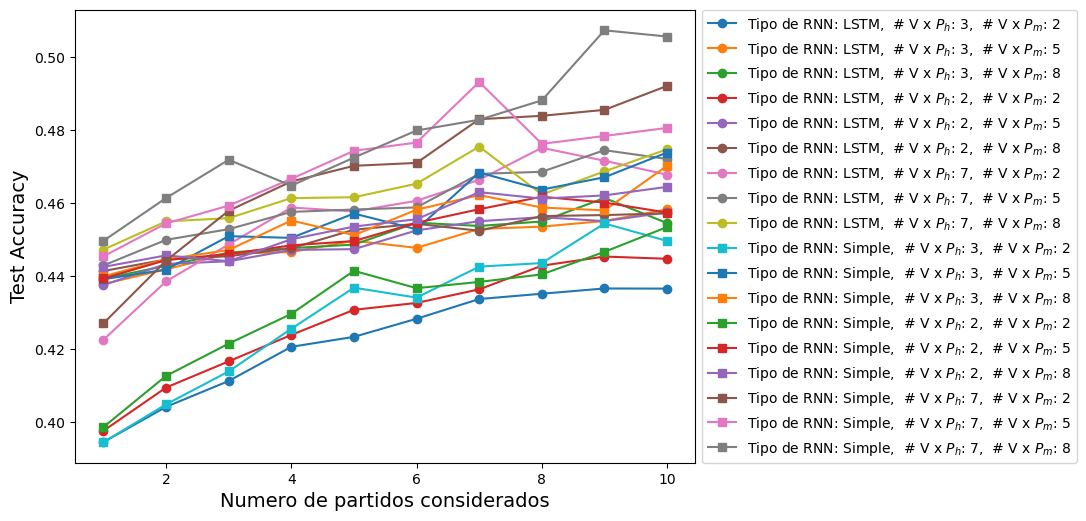

In [89]:
fffmp.plot_report_table(Report,'accuracy test','Test Accuracy',['LSTM','Simple'],[3,2,7],[2,5,8])

Finalmente, hay una última cosa que quise probar: el efecto del *batch size*. Para el entrenamiento de los 180 modelos elegí un *batch size* relativamente grande para reducir los tiempos de entrenamiento. Esperaría que reducir el mismo permitiera mejorar la precisión final del modelo, sin embargo he ledio que tamaños muy pequeños de *batch* pueden hacer que finalmente no converja al mínimo global.

Para analizar esto utilizaré 7 valores de *batch size* para los cuales entrenaré modelos con los parámetros seleccionados en el paso anterior. Aprovecharé igualmente la oportunidad para terminar de decidir que número de partidos considerar para el modelo final: $9$ o $10$.

In [120]:
Report2=pd.DataFrame()

In [121]:
#collapse-output
index=0
for n_partidos in [9,10]:
    for bsz in [16,32,128,400,512,1024,2048]:
        M_A,M_A_test=fffmp.generate_input_for_RNN(X_train,X_test,F_h_3,['Equipo_A'],n_partidos,standarize=True)
        M_B,M_B_test=fffmp.generate_input_for_RNN(X_train,X_test,F_h_3,['Equipo_B'],n_partidos,standarize=True)

        H_Features=[]
        A_train,A_test=fffmp.generate_input_for_NN(X_train,X_test,H_Features,N_Features_3,standarize=True) 

        fffmp.clean_all_models()
        time_steps=n_partidos
        predictors=len(F_h_3)
        tipo_RNN='Simple'
        recurrent_units=100
        dense_units=[500,200,80,20,10]
        dense_drop_out=0.1
        out_shape=3
        input_shape_history=(time_steps,predictors)
        input_shape_now=A_train.shape[1]
        metrics=['accuracy','AUC',F1]
        IFA=fffmp.Create_Mix_Model(tipo_RNN ,recurrent_units, dense_units,dense_drop_out, out_shape, input_shape_history,input_shape_now,metrics)

        batch_size = bsz
        epochs = 50
        validation_split=0.1
        y_train_pred,y_test_pred,Results=fffmp.Full_train_and_Report(IFA,[M_A,M_B,A_train],y_train,[M_A_test,M_B_test,A_test],y_test,batch_size,epochs,validation_split,num_classes=3,history_plot=False,confusion_matrix=False,Report_print=False)

        index=index+1
        name=str(index)
        Report2=fffmp.Append_line_to_report_table_2(Report2,Results,name,tipo_de_RNN,n_partidos,len(F_h),len(N_Features),batch_size)

Train shape: (83399, 9, 7)
Test shape: (10292, 9, 7)
Train shape: (83399, 9, 7)
Test shape: (10292, 9, 7)
Train shape: (83399, 8)
Test shape: (10292, 8)
Model: "Modelo_IFA"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 9, 7)]       0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 9, 7)]       0           []                               
                                                                                                  
 simple_rnn (SimpleRNN)         (None, 9, 100)       10700       ['input_1[0][0]']                
                                                                                                  
 simple_rnn_1 (SimpleRNN)       (No

loss train  loss test  accuracy train  accuracy test  auc train  \
187    0.441131   0.434578        0.473245        0.47216   0.666454   

     auc test  f1_score train  f1_score test  Partidos Considerados     RNN  \
187  0.664029        0.469595       0.467718                      9  Simple   

     N_Features_m  N_Features_h  Batch_size  
187             8             7          16

Train shape: (83399, 9, 7)
Test shape: (10292, 9, 7)
Train shape: (83399, 9, 7)
Test shape: (10292, 9, 7)
Train shape: (83399, 8)
Test shape: (10292, 8)
Model: "Modelo_IFA"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 9, 7)]       0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 9, 7)]       0           []                               
                                                                                                  
 simple_rnn (SimpleRNN)         (None, 9, 100)       10700       ['input_1[0][0]']                
                                                                                                  
 simple_rnn_1 (SimpleRNN)       (No

loss train  loss test  accuracy train  accuracy test  auc train  \
187    0.441131   0.434578        0.473245       0.472160   0.666454   
188    0.442311   0.435448        0.478902       0.477179   0.672710   

     auc test  f1_score train  f1_score test  Partidos Considerados     RNN  \
187  0.664029        0.469595       0.467718                      9  Simple   
188  0.669219        0.477678       0.475327                      9  Simple   

     N_Features_m  N_Features_h  Batch_size  
187             8             7          16  
188             8             7          32

Train shape: (83399, 9, 7)
Test shape: (10292, 9, 7)
Train shape: (83399, 9, 7)
Test shape: (10292, 9, 7)
Train shape: (83399, 8)
Test shape: (10292, 8)
Model: "Modelo_IFA"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 9, 7)]       0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 9, 7)]       0           []                               
                                                                                                  
 simple_rnn (SimpleRNN)         (None, 9, 100)       10700       ['input_1[0][0]']                
                                                                                                  
 simple_rnn_1 (SimpleRNN)       (No

loss train  loss test  accuracy train  accuracy test  auc train  \
187    0.441131   0.434578        0.473245       0.472160   0.666454   
188    0.442311   0.435448        0.478902       0.477179   0.672710   
189    0.446093   0.439337        0.480308       0.478325   0.672880   

     auc test  f1_score train  f1_score test  Partidos Considerados     RNN  \
187  0.664029        0.469595       0.467718                      9  Simple   
188  0.669219        0.477678       0.475327                      9  Simple   
189  0.669636        0.479657       0.477065                      9  Simple   

     N_Features_m  N_Features_h  Batch_size  
187             8             7          16  
188             8             7          32  
189             8             7         128

Train shape: (83399, 9, 7)
Test shape: (10292, 9, 7)
Train shape: (83399, 9, 7)
Test shape: (10292, 9, 7)
Train shape: (83399, 8)
Test shape: (10292, 8)
Model: "Modelo_IFA"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 9, 7)]       0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 9, 7)]       0           []                               
                                                                                                  
 simple_rnn (SimpleRNN)         (None, 9, 100)       10700       ['input_1[0][0]']                
                                                                                                  
 simple_rnn_1 (SimpleRNN)       (No

loss train  loss test  accuracy train  accuracy test  auc train  \
187    0.441131   0.434578        0.473245       0.472160   0.666454   
188    0.442311   0.435448        0.478902       0.477179   0.672710   
189    0.446093   0.439337        0.480308       0.478325   0.672880   
190    0.443027   0.436428        0.474978       0.473915   0.667663   

     auc test  f1_score train  f1_score test  Partidos Considerados     RNN  \
187  0.664029        0.469595       0.467718                      9  Simple   
188  0.669219        0.477678       0.475327                      9  Simple   
189  0.669636        0.479657       0.477065                      9  Simple   
190  0.665021        0.464835       0.462748                      9  Simple   

     N_Features_m  N_Features_h  Batch_size  
187             8             7          16  
188             8             7          32  
189             8             7         128  
190             8             7         400

Train shape: (83399, 9, 7)
Test shape: (10292, 9, 7)
Train shape: (83399, 9, 7)
Test shape: (10292, 9, 7)
Train shape: (83399, 8)
Test shape: (10292, 8)
Model: "Modelo_IFA"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 9, 7)]       0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 9, 7)]       0           []                               
                                                                                                  
 simple_rnn (SimpleRNN)         (None, 9, 100)       10700       ['input_1[0][0]']                
                                                                                                  
 simple_rnn_1 (SimpleRNN)       (No

loss train  loss test  accuracy train  accuracy test  auc train  \
187    0.441131   0.434578        0.473245       0.472160   0.666454   
188    0.442311   0.435448        0.478902       0.477179   0.672710   
189    0.446093   0.439337        0.480308       0.478325   0.672880   
190    0.443027   0.436428        0.474978       0.473915   0.667663   
191    0.456781   0.449321        0.501564       0.496869   0.694333   

     auc test  f1_score train  f1_score test  Partidos Considerados     RNN  \
187  0.664029        0.469595       0.467718                      9  Simple   
188  0.669219        0.477678       0.475327                      9  Simple   
189  0.669636        0.479657       0.477065                      9  Simple   
190  0.665021        0.464835       0.462748                      9  Simple   
191  0.688926        0.498937       0.493470                      9  Simple   

     N_Features_m  N_Features_h  Batch_size  
187             8             7          16  
188             8             7          32  
189             8             7         128  
190             8             7         400  
191             8             7         512

Train shape: (83399, 9, 7)
Test shape: (10292, 9, 7)
Train shape: (83399, 9, 7)
Test shape: (10292, 9, 7)
Train shape: (83399, 8)
Test shape: (10292, 8)
Model: "Modelo_IFA"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 9, 7)]       0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 9, 7)]       0           []                               
                                                                                                  
 simple_rnn (SimpleRNN)         (None, 9, 100)       10700       ['input_1[0][0]']                
                                                                                                  
 simple_rnn_1 (SimpleRNN)       (No

loss train  loss test  accuracy train  accuracy test  auc train  \
187    0.441131   0.434578        0.473245       0.472160   0.666454   
188    0.442311   0.435448        0.478902       0.477179   0.672710   
189    0.446093   0.439337        0.480308       0.478325   0.672880   
190    0.443027   0.436428        0.474978       0.473915   0.667663   
191    0.456781   0.449321        0.501564       0.496869   0.694333   
192    0.447441   0.440803        0.485399       0.483510   0.674612   

     auc test  f1_score train  f1_score test  Partidos Considerados     RNN  \
187  0.664029        0.469595       0.467718                      9  Simple   
188  0.669219        0.477678       0.475327                      9  Simple   
189  0.669636        0.479657       0.477065                      9  Simple   
190  0.665021        0.464835       0.462748                      9  Simple   
191  0.688926        0.498937       0.493470                      9  Simple   
192  0.671808        0.482636       0.480019                      9  Simple   

     N_Features_m  N_Features_h  Batch_size  
187             8             7          16  
188             8             7          32  
189             8             7         128  
190             8             7         400  
191             8             7         512  
192             8             7        1024

Train shape: (83399, 9, 7)
Test shape: (10292, 9, 7)
Train shape: (83399, 9, 7)
Test shape: (10292, 9, 7)
Train shape: (83399, 8)
Test shape: (10292, 8)
Model: "Modelo_IFA"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 9, 7)]       0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 9, 7)]       0           []                               
                                                                                                  
 simple_rnn (SimpleRNN)         (None, 9, 100)       10700       ['input_1[0][0]']                
                                                                                                  
 simple_rnn_1 (SimpleRNN)       (No

Epoch 18/50
37/37 [==============================] - 13s 345ms/step - loss: 1.0184 - accuracy: 0.4759 - auc: 0.6658 - f1_score: 0.4713 - val_loss: 1.0467 - val_accuracy: 0.4442 - val_auc: 0.6328 - val_f1_score: 0.4407
Epoch 19/50
37/37 [==============================] - 12s 316ms/step - loss: 1.0162 - accuracy: 0.4790 - auc: 0.6684 - f1_score: 0.4744 - val_loss: 1.0481 - val_accuracy: 0.4402 - val_auc: 0.6307 - val_f1_score: 0.4356


loss train  loss test  accuracy train  accuracy test  auc train  \
187    0.441131   0.434578        0.473245       0.472160   0.666454   
188    0.442311   0.435448        0.478902       0.477179   0.672710   
189    0.446093   0.439337        0.480308       0.478325   0.672880   
190    0.443027   0.436428        0.474978       0.473915   0.667663   
191    0.456781   0.449321        0.501564       0.496869   0.694333   
192    0.447441   0.440803        0.485399       0.483510   0.674612   
193    0.450135   0.442987        0.497422       0.493428   0.687756   

     auc test  f1_score train  f1_score test  Partidos Considerados     RNN  \
187  0.664029        0.469595       0.467718                      9  Simple   
188  0.669219        0.477678       0.475327                      9  Simple   
189  0.669636        0.479657       0.477065                      9  Simple   
190  0.665021        0.464835       0.462748                      9  Simple   
191  0.688926        0.498937       0.493470                      9  Simple   
192  0.671808        0.482636       0.480019                      9  Simple   
193  0.683027        0.493345       0.488634                      9  Simple   

     N_Features_m  N_Features_h  Batch_size  
187             8             7          16  
188             8             7          32  
189             8             7         128  
190             8             7         400  
191             8             7         512  
192             8             7        1024  
193             8             7        2048

Train shape: (83399, 10, 7)
Test shape: (10292, 10, 7)
Train shape: (83399, 10, 7)
Test shape: (10292, 10, 7)
Train shape: (83399, 8)
Test shape: (10292, 8)
Model: "Modelo_IFA"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 10, 7)]      0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 10, 7)]      0           []                               
                                                                                                  
 simple_rnn (SimpleRNN)         (None, 10, 100)      10700       ['input_1[0][0]']                
                                                                                                  
 simple_rnn_1 (SimpleRNN)      

loss train  loss test  accuracy train  accuracy test  auc train  \
187    0.441131   0.434578        0.473245       0.472160   0.666454   
188    0.442311   0.435448        0.478902       0.477179   0.672710   
189    0.446093   0.439337        0.480308       0.478325   0.672880   
190    0.443027   0.436428        0.474978       0.473915   0.667663   
191    0.456781   0.449321        0.501564       0.496869   0.694333   
192    0.447441   0.440803        0.485399       0.483510   0.674612   
193    0.450135   0.442987        0.497422       0.493428   0.687756   
194    0.448821   0.441714        0.490696       0.487371   0.682879   

     auc test  f1_score train  f1_score test  Partidos Considerados     RNN  \
187  0.664029        0.469595       0.467718                      9  Simple   
188  0.669219        0.477678       0.475327                      9  Simple   
189  0.669636        0.479657       0.477065                      9  Simple   
190  0.665021        0.464835       0.462748                      9  Simple   
191  0.688926        0.498937       0.493470                      9  Simple   
192  0.671808        0.482636       0.480019                      9  Simple   
193  0.683027        0.493345       0.488634                      9  Simple   
194  0.678741        0.487946       0.483883                     10  Simple   

     N_Features_m  N_Features_h  Batch_size  
187             8             7          16  
188             8             7          32  
189             8             7         128  
190             8             7         400  
191             8             7         512  
192             8             7        1024  
193             8             7        2048  
194             8             7          16

Train shape: (83399, 10, 7)
Test shape: (10292, 10, 7)
Train shape: (83399, 10, 7)
Test shape: (10292, 10, 7)
Train shape: (83399, 8)
Test shape: (10292, 8)
Model: "Modelo_IFA"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 10, 7)]      0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 10, 7)]      0           []                               
                                                                                                  
 simple_rnn (SimpleRNN)         (None, 10, 100)      10700       ['input_1[0][0]']                
                                                                                                  
 simple_rnn_1 (SimpleRNN)      

loss train  loss test  accuracy train  accuracy test  auc train  \
187    0.441131   0.434578        0.473245       0.472160   0.666454   
188    0.442311   0.435448        0.478902       0.477179   0.672710   
189    0.446093   0.439337        0.480308       0.478325   0.672880   
190    0.443027   0.436428        0.474978       0.473915   0.667663   
191    0.456781   0.449321        0.501564       0.496869   0.694333   
192    0.447441   0.440803        0.485399       0.483510   0.674612   
193    0.450135   0.442987        0.497422       0.493428   0.687756   
194    0.448821   0.441714        0.490696       0.487371   0.682879   
195    0.443511   0.436343        0.484538       0.480040   0.674689   

     auc test  f1_score train  f1_score test  Partidos Considerados     RNN  \
187  0.664029        0.469595       0.467718                      9  Simple   
188  0.669219        0.477678       0.475327                      9  Simple   
189  0.669636        0.479657       0.477065                      9  Simple   
190  0.665021        0.464835       0.462748                      9  Simple   
191  0.688926        0.498937       0.493470                      9  Simple   
192  0.671808        0.482636       0.480019                      9  Simple   
193  0.683027        0.493345       0.488634                      9  Simple   
194  0.678741        0.487946       0.483883                     10  Simple   
195  0.669694        0.483001       0.478206                     10  Simple   

     N_Features_m  N_Features_h  Batch_size  
187             8             7          16  
188             8             7          32  
189             8             7         128  
190             8             7         400  
191             8             7         512  
192             8             7        1024  
193             8             7        2048  
194             8             7          16  
195             8             7          32

Train shape: (83399, 10, 7)
Test shape: (10292, 10, 7)
Train shape: (83399, 10, 7)
Test shape: (10292, 10, 7)
Train shape: (83399, 8)
Test shape: (10292, 8)
Model: "Modelo_IFA"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 10, 7)]      0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 10, 7)]      0           []                               
                                                                                                  
 simple_rnn (SimpleRNN)         (None, 10, 100)      10700       ['input_1[0][0]']                
                                                                                                  
 simple_rnn_1 (SimpleRNN)      

loss train  loss test  accuracy train  accuracy test  auc train  \
187    0.441131   0.434578        0.473245       0.472160   0.666454   
188    0.442311   0.435448        0.478902       0.477179   0.672710   
189    0.446093   0.439337        0.480308       0.478325   0.672880   
190    0.443027   0.436428        0.474978       0.473915   0.667663   
191    0.456781   0.449321        0.501564       0.496869   0.694333   
192    0.447441   0.440803        0.485399       0.483510   0.674612   
193    0.450135   0.442987        0.497422       0.493428   0.687756   
194    0.448821   0.441714        0.490696       0.487371   0.682879   
195    0.443511   0.436343        0.484538       0.480040   0.674689   
196    0.459900   0.451976        0.511004       0.505062   0.700253   

     auc test  f1_score train  f1_score test  Partidos Considerados     RNN  \
187  0.664029        0.469595       0.467718                      9  Simple   
188  0.669219        0.477678       0.475327                      9  Simple   
189  0.669636        0.479657       0.477065                      9  Simple   
190  0.665021        0.464835       0.462748                      9  Simple   
191  0.688926        0.498937       0.493470                      9  Simple   
192  0.671808        0.482636       0.480019                      9  Simple   
193  0.683027        0.493345       0.488634                      9  Simple   
194  0.678741        0.487946       0.483883                     10  Simple   
195  0.669694        0.483001       0.478206                     10  Simple   
196  0.693634        0.511145       0.504673                     10  Simple   

     N_Features_m  N_Features_h  Batch_size  
187             8             7          16  
188             8             7          32  
189             8             7         128  
190             8             7         400  
191             8             7         512  
192             8             7        1024  
193             8             7        2048  
194             8             7          16  
195             8             7          32  
196             8             7         128

Train shape: (83399, 10, 7)
Test shape: (10292, 10, 7)
Train shape: (83399, 10, 7)
Test shape: (10292, 10, 7)
Train shape: (83399, 8)
Test shape: (10292, 8)
Model: "Modelo_IFA"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 10, 7)]      0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 10, 7)]      0           []                               
                                                                                                  
 simple_rnn (SimpleRNN)         (None, 10, 100)      10700       ['input_1[0][0]']                
                                                                                                  
 simple_rnn_1 (SimpleRNN)      

loss train  loss test  accuracy train  accuracy test  auc train  \
187    0.441131   0.434578        0.473245       0.472160   0.666454   
188    0.442311   0.435448        0.478902       0.477179   0.672710   
189    0.446093   0.439337        0.480308       0.478325   0.672880   
190    0.443027   0.436428        0.474978       0.473915   0.667663   
191    0.456781   0.449321        0.501564       0.496869   0.694333   
192    0.447441   0.440803        0.485399       0.483510   0.674612   
193    0.450135   0.442987        0.497422       0.493428   0.687756   
194    0.448821   0.441714        0.490696       0.487371   0.682879   
195    0.443511   0.436343        0.484538       0.480040   0.674689   
196    0.459900   0.451976        0.511004       0.505062   0.700253   
197    0.449845   0.442440        0.501510       0.497780   0.690488   

     auc test  f1_score train  f1_score test  Partidos Considerados     RNN  \
187  0.664029        0.469595       0.467718                      9  Simple   
188  0.669219        0.477678       0.475327                      9  Simple   
189  0.669636        0.479657       0.477065                      9  Simple   
190  0.665021        0.464835       0.462748                      9  Simple   
191  0.688926        0.498937       0.493470                      9  Simple   
192  0.671808        0.482636       0.480019                      9  Simple   
193  0.683027        0.493345       0.488634                      9  Simple   
194  0.678741        0.487946       0.483883                     10  Simple   
195  0.669694        0.483001       0.478206                     10  Simple   
196  0.693634        0.511145       0.504673                     10  Simple   
197  0.685359        0.490910       0.485880                     10  Simple   

     N_Features_m  N_Features_h  Batch_size  
187             8             7          16  
188             8             7          32  
189             8             7         128  
190             8             7         400  
191             8             7         512  
192             8             7        1024  
193             8             7        2048  
194             8             7          16  
195             8             7          32  
196             8             7         128  
197             8             7         400

Train shape: (83399, 10, 7)
Test shape: (10292, 10, 7)
Train shape: (83399, 10, 7)
Test shape: (10292, 10, 7)
Train shape: (83399, 8)
Test shape: (10292, 8)
Model: "Modelo_IFA"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 10, 7)]      0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 10, 7)]      0           []                               
                                                                                                  
 simple_rnn (SimpleRNN)         (None, 10, 100)      10700       ['input_1[0][0]']                
                                                                                                  
 simple_rnn_1 (SimpleRNN)      

loss train  loss test  accuracy train  accuracy test  auc train  \
187    0.441131   0.434578        0.473245       0.472160   0.666454   
188    0.442311   0.435448        0.478902       0.477179   0.672710   
189    0.446093   0.439337        0.480308       0.478325   0.672880   
190    0.443027   0.436428        0.474978       0.473915   0.667663   
191    0.456781   0.449321        0.501564       0.496869   0.694333   
192    0.447441   0.440803        0.485399       0.483510   0.674612   
193    0.450135   0.442987        0.497422       0.493428   0.687756   
194    0.448821   0.441714        0.490696       0.487371   0.682879   
195    0.443511   0.436343        0.484538       0.480040   0.674689   
196    0.459900   0.451976        0.511004       0.505062   0.700253   
197    0.449845   0.442440        0.501510       0.497780   0.690488   
198    0.450055   0.442938        0.497825       0.494075   0.686454   

     auc test  f1_score train  f1_score test  Partidos Considerados     RNN  \
187  0.664029        0.469595       0.467718                      9  Simple   
188  0.669219        0.477678       0.475327                      9  Simple   
189  0.669636        0.479657       0.477065                      9  Simple   
190  0.665021        0.464835       0.462748                      9  Simple   
191  0.688926        0.498937       0.493470                      9  Simple   
192  0.671808        0.482636       0.480019                      9  Simple   
193  0.683027        0.493345       0.488634                      9  Simple   
194  0.678741        0.487946       0.483883                     10  Simple   
195  0.669694        0.483001       0.478206                     10  Simple   
196  0.693634        0.511145       0.504673                     10  Simple   
197  0.685359        0.490910       0.485880                     10  Simple   
198  0.681993        0.493459       0.488841                     10  Simple   

     N_Features_m  N_Features_h  Batch_size  
187             8             7          16  
188             8             7          32  
189             8             7         128  
190             8             7         400  
191             8             7         512  
192             8             7        1024  
193             8             7        2048  
194             8             7          16  
195             8             7          32  
196             8             7         128  
197             8             7         400  
198             8             7         512

Train shape: (83399, 10, 7)
Test shape: (10292, 10, 7)
Train shape: (83399, 10, 7)
Test shape: (10292, 10, 7)
Train shape: (83399, 8)
Test shape: (10292, 8)
Model: "Modelo_IFA"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 10, 7)]      0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 10, 7)]      0           []                               
                                                                                                  
 simple_rnn (SimpleRNN)         (None, 10, 100)      10700       ['input_1[0][0]']                
                                                                                                  
 simple_rnn_1 (SimpleRNN)      

loss train  loss test  accuracy train  accuracy test  auc train  \
187    0.441131   0.434578        0.473245       0.472160   0.666454   
188    0.442311   0.435448        0.478902       0.477179   0.672710   
189    0.446093   0.439337        0.480308       0.478325   0.672880   
190    0.443027   0.436428        0.474978       0.473915   0.667663   
191    0.456781   0.449321        0.501564       0.496869   0.694333   
192    0.447441   0.440803        0.485399       0.483510   0.674612   
193    0.450135   0.442987        0.497422       0.493428   0.687756   
194    0.448821   0.441714        0.490696       0.487371   0.682879   
195    0.443511   0.436343        0.484538       0.480040   0.674689   
196    0.459900   0.451976        0.511004       0.505062   0.700253   
197    0.449845   0.442440        0.501510       0.497780   0.690488   
198    0.450055   0.442938        0.497825       0.494075   0.686454   
199    0.446104   0.439218        0.489334       0.486293   0.676767   

     auc test  f1_score train  f1_score test  Partidos Considerados     RNN  \
187  0.664029        0.469595       0.467718                      9  Simple   
188  0.669219        0.477678       0.475327                      9  Simple   
189  0.669636        0.479657       0.477065                      9  Simple   
190  0.665021        0.464835       0.462748                      9  Simple   
191  0.688926        0.498937       0.493470                      9  Simple   
192  0.671808        0.482636       0.480019                      9  Simple   
193  0.683027        0.493345       0.488634                      9  Simple   
194  0.678741        0.487946       0.483883                     10  Simple   
195  0.669694        0.483001       0.478206                     10  Simple   
196  0.693634        0.511145       0.504673                     10  Simple   
197  0.685359        0.490910       0.485880                     10  Simple   
198  0.681993        0.493459       0.488841                     10  Simple   
199  0.673071        0.489919       0.486513                     10  Simple   

     N_Features_m  N_Features_h  Batch_size  
187             8             7          16  
188             8             7          32  
189             8             7         128  
190             8             7         400  
191             8             7         512  
192             8             7        1024  
193             8             7        2048  
194             8             7          16  
195             8             7          32  
196             8             7         128  
197             8             7         400  
198             8             7         512  
199             8             7        1024

Train shape: (83399, 10, 7)
Test shape: (10292, 10, 7)
Train shape: (83399, 10, 7)
Test shape: (10292, 10, 7)
Train shape: (83399, 8)
Test shape: (10292, 8)
Model: "Modelo_IFA"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 10, 7)]      0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 10, 7)]      0           []                               
                                                                                                  
 simple_rnn (SimpleRNN)         (None, 10, 100)      10700       ['input_1[0][0]']                
                                                                                                  
 simple_rnn_1 (SimpleRNN)      

loss train  loss test  accuracy train  accuracy test  auc train  \
187    0.441131   0.434578        0.473245       0.472160   0.666454   
188    0.442311   0.435448        0.478902       0.477179   0.672710   
189    0.446093   0.439337        0.480308       0.478325   0.672880   
190    0.443027   0.436428        0.474978       0.473915   0.667663   
191    0.456781   0.449321        0.501564       0.496869   0.694333   
192    0.447441   0.440803        0.485399       0.483510   0.674612   
193    0.450135   0.442987        0.497422       0.493428   0.687756   
194    0.448821   0.441714        0.490696       0.487371   0.682879   
195    0.443511   0.436343        0.484538       0.480040   0.674689   
196    0.459900   0.451976        0.511004       0.505062   0.700253   
197    0.449845   0.442440        0.501510       0.497780   0.690488   
198    0.450055   0.442938        0.497825       0.494075   0.686454   
199    0.446104   0.439218        0.489334       0.486293   0.676767   
200    0.449941   0.443273        0.483142       0.481716   0.675012   

     auc test  f1_score train  f1_score test  Partidos Considerados     RNN  \
187  0.664029        0.469595       0.467718                      9  Simple   
188  0.669219        0.477678       0.475327                      9  Simple   
189  0.669636        0.479657       0.477065                      9  Simple   
190  0.665021        0.464835       0.462748                      9  Simple   
191  0.688926        0.498937       0.493470                      9  Simple   
192  0.671808        0.482636       0.480019                      9  Simple   
193  0.683027        0.493345       0.488634                      9  Simple   
194  0.678741        0.487946       0.483883                     10  Simple   
195  0.669694        0.483001       0.478206                     10  Simple   
196  0.693634        0.511145       0.504673                     10  Simple   
197  0.685359        0.490910       0.485880                     10  Simple   
198  0.681993        0.493459       0.488841                     10  Simple   
199  0.673071        0.489919       0.486513                     10  Simple   
200  0.672317        0.474202       0.471665                     10  Simple   

     N_Features_m  N_Features_h  Batch_size  
187             8             7          16  
188             8             7          32  
189             8             7         128  
190             8             7         400  
191             8             7         512  
192             8             7        1024  
193             8             7        2048  
194             8             7          16  
195             8             7          32  
196             8             7         128  
197             8             7         400  
198             8             7         512  
199             8             7        1024  
200             8             7        2048

In [166]:
#hide
Rep_file_name='Reporte2_Mix_NN_'+str(np.random.randint(100))
Report2.to_pickle(Rep_file_name)

Si bien la tendencia no es estremadamente clara, de las pruebas realizadas podemos ver que el mejor conjunto de parámetros es:
* Tipo de red recurrente: Simple
* Número de partidos a considerar: 10 
* *Features* por cada partidos del historial (para la RNN): 'play_home', 'is_cup', 'rating_diff', 'goal_diff', 'coach_continuity', 'relevance', 'is_friendly'
* *Features* del partido a modelar: 'Rating_diff', 'EqA_Local', 'is_cup', 'Equipo_A_coach_continuity', 'Equipo_B_coach_continuity', 'diff_num_partidos_diez_dias', 'diff_num_partidos_tres_semanas', 'is_friendly'
* Batch size: 128

Entrenemos entonces un último modelo con estos parámetros para analizar más en detalle su rendimiento:

Train shape: (83399, 10, 7)
Test shape: (10292, 10, 7)
Train shape: (83399, 10, 7)
Test shape: (10292, 10, 7)
Train shape: (83399, 8)
Test shape: (10292, 8)
Model: "Modelo_IFA"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 10, 7)]      0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 10, 7)]      0           []                               
                                                                                                  
 simple_rnn (SimpleRNN)         (None, 10, 100)      10700       ['input_1[0][0]']                
                                                                                                  
 simple_rnn_1 (SimpleRNN)      

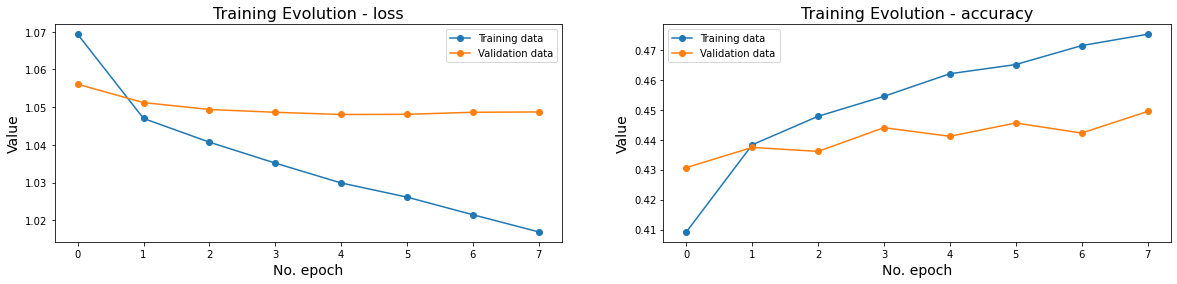

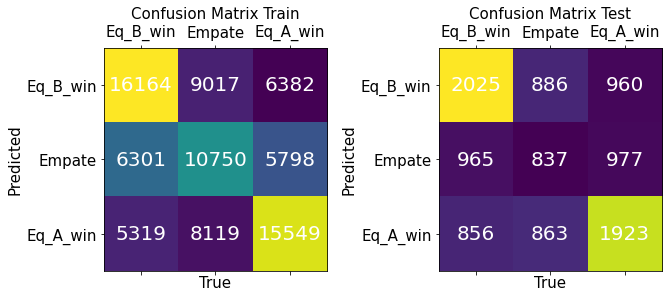

In [134]:
#collapse-hide
n_partidos=10
M_A,M_A_test=fffmp.generate_input_for_RNN(X_train,X_test,F_h_3,['Equipo_A'],n_partidos,standarize=True)
M_B,M_B_test=fffmp.generate_input_for_RNN(X_train,X_test,F_h_3,['Equipo_B'],n_partidos,standarize=True)

H_Features=[]
A_train,A_test=fffmp.generate_input_for_NN(X_train,X_test,H_Features,N_Features_3,standarize=True) 

fffmp.clean_all_models()
time_steps=n_partidos
predictors=len(F_h_3)
tipo_RNN='Simple'
recurrent_units=100
dense_units=[500,200,80,20,10]
dense_drop_out=0.1
out_shape=3
input_shape_history=(time_steps,predictors)
input_shape_now=A_train.shape[1]
metrics=['accuracy','AUC',F1]
IFA=fffmp.Create_Mix_Model(tipo_RNN ,recurrent_units, dense_units,dense_drop_out, out_shape, input_shape_history,input_shape_now,metrics)

batch_size = 128
epochs = 50
validation_split=0.1
y_train_pred,y_test_pred,Results=fffmp.Full_train_and_Report(IFA,[M_A,M_B,A_train],y_train,[M_A_test,M_B_test,A_test],y_test,batch_size,epochs,validation_split,num_classes=3,history_plot=True,confusion_matrix=True,Report_print=False)


In [136]:
#collapse-hide
pd.DataFrame(Results, index=[1,])

loss train  loss test  accuracy train  accuracy test  auc train  auc test  \
1    0.451779   0.444569        0.503722       0.499809   0.691521   0.68665   

   f1_score train  f1_score test  
1        0.500161        0.49546

In [167]:
#hide
Rep_file_name='Reporte3_Mix_NN_'+str(np.random.randint(100))
pd.DataFrame(Results, index=[1,]).to_pickle(Rep_file_name)

**Finalmente, hemos obtenido un modelo con una precisión de practicamente 0.5 (considerando la prueba realizada sobre el *dataset* de *test*). Esto es una mejora considerable en relación a un clasificador aleatorio donde la precisión esperada es de 0.33**